In [ ]:
#using Pkg
#Pkg.update()
#Pkg.add(PackageSpec(name="JWAS",rev="master"))

In [1]:
using DataFrames              # package for working with data sets
using JWAS                    # package for Bayesian regression analyses, including BayesB and BayesCπ        
#using JWAS:misc               # utility functions
using JWAS.Datasets
using Distributions       
using Plots                   # package for plotting 
using CSV
using LinearAlgebra,Statistics,Random,DelimitedFiles, DataFrames

┌ Info: Recompiling stale cache file /opt/julia/compiled/v1.1/DataFrames/AR9oZ.ji for DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /opt/julia/compiled/v1.1/JWAS/tbeXw.ji for JWAS [c9a035f4-d403-5e6b-8649-6be755bc4798]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /opt/julia/compiled/v1.1/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184


In [ ]:
#Pkg.status("JWAS")

In [2]:
function readMatBin(fileName)
    genStr = open(fileName)
    n = read(genStr,Int64)
    p = read(genStr,Int64)
    M = zeros(n,p)
    for j in 1:p
        for i in 1:n
            M[i,j] = read(genStr,Float64)
        end
    end
    close(genStr)
    return M
end
@time M = readMatBin("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.gen.bin")

 27.832538 seconds (37.65 k allocations: 10.393 GiB, 0.07% gc time)


3205×435172 Array{Float64,2}:
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  2.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 1.0  1.0  0.0  1.0  2.0  0.0  0.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0

## Genetic correlation for non-overlaping sliding window

## For ADG and TRT

In [3]:
@time rg,out = GWAS(M,"/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt", 
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/NurADG_AllTRT/MCMC_BayesB_marker_effects_Nur2ADG.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/NurADG_AllTRT/MCMC_BayesB_marker_effects_nTrtsPer180.txt",
    window_size="1 Mb", GWAS=false,sliding_window=false,genetic_correlation=true)

calculating genomic correlation...100%|█████████████████| Time: 0:20:27


BoundsError: BoundsError: attempt to access (2398×12 DataFrame
│ Row  │ trait      │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimate_cov │ std_cov     │ estimate_cor │ std_cor   │
│      │ String     │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64      │ Float64     │ Float64      │ Float64   │
├──────┼────────────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼──────────────┼─────────────┼──────────────┼───────────┤
│ 1    │ cor(t1,t2) │ 1      │ 1      │ 0         │ 1000000   │ 10204     │ 998132    │ 193    │ -7.92617e-8  │ 7.04894e-6  │ 0.0114527    │ 0.37321   │
│ 2    │ cor(t1,t2) │ 2      │ 1      │ 1000000   │ 2000000   │ 1005658   │ 1991610   │ 280    │ -2.9596e-6   │ 1.82811e-5  │ -0.0507208   │ 0.495538  │
│ 3    │ cor(t1,t2) │ 3      │ 1      │ 2000000   │ 3000000   │ 2000553   │ 2998071   │ 280    │ 6.10958e-8   │ 1.17849e-5  │ -0.000347945 │ 0.41628   │
│ 4    │ cor(t1,t2) │ 4      │ 1      │ 3000000   │ 4000000   │ 3015934   │ 3994225   │ 216    │ -9.15705e-8  │ 7.08526e-6  │ -0.00753054  │ 0.356982  │
│ 5    │ cor(t1,t2) │ 5      │ 1      │ 4000000   │ 5000000   │ 4000817   │ 4992802   │ 230    │ 3.04151e-7   │ 8.05459e-6  │ 0.0220783    │ 0.408915  │
│ 6    │ cor(t1,t2) │ 6      │ 1      │ 5000000   │ 6000000   │ 5000927   │ 5994381   │ 214    │ 7.47035e-7   │ 1.05246e-5  │ 0.00469101   │ 0.385799  │
│ 7    │ cor(t1,t2) │ 7      │ 1      │ 6000000   │ 7000000   │ 6011062   │ 6992339   │ 258    │ -8.88959e-7  │ 1.12604e-5  │ -0.00236269  │ 0.450044  │
│ 8    │ cor(t1,t2) │ 8      │ 1      │ 7000000   │ 8000000   │ 7002079   │ 7994976   │ 224    │ 2.46617e-6   │ 2.3542e-5   │ 0.039858     │ 0.447281  │
│ 9    │ cor(t1,t2) │ 9      │ 1      │ 8000000   │ 9000000   │ 8006283   │ 8996136   │ 276    │ 1.18085e-6   │ 2.31052e-5  │ 0.0320611    │ 0.439289  │
│ 10   │ cor(t1,t2) │ 10     │ 1      │ 9000000   │ 10000000  │ 9009759   │ 9995902   │ 239    │ -1.10275e-7  │ 1.22711e-5  │ -0.00496127  │ 0.428104  │
│ 11   │ cor(t1,t2) │ 11     │ 1      │ 10000000  │ 11000000  │ 10008047  │ 10992034  │ 243    │ 5.64205e-8   │ 9.16051e-6  │ 0.00644462   │ 0.429367  │
│ 12   │ cor(t1,t2) │ 12     │ 1      │ 11000000  │ 12000000  │ 11000101  │ 11999490  │ 216    │ 1.07316e-6   │ 1.61138e-5  │ 0.0238       │ 0.393811  │
│ 13   │ cor(t1,t2) │ 13     │ 1      │ 12000000  │ 13000000  │ 12003243  │ 12997223  │ 224    │ -1.72013e-6  │ 3.11917e-5  │ -0.00424135  │ 0.403414  │
│ 14   │ cor(t1,t2) │ 14     │ 1      │ 13000000  │ 14000000  │ 13002602  │ 13999491  │ 261    │ -1.37949e-7  │ 8.44525e-6  │ 0.000429375  │ 0.425791  │
│ 15   │ cor(t1,t2) │ 15     │ 1      │ 14000000  │ 15000000  │ 14002294  │ 14993669  │ 263    │ -2.05617e-7  │ 8.53044e-6  │ -0.007222    │ 0.438273  │
│ 16   │ cor(t1,t2) │ 16     │ 1      │ 15000000  │ 16000000  │ 15001004  │ 15972270  │ 194    │ -1.83879e-7  │ 1.19707e-5  │ -0.000790187 │ 0.361585  │
│ 17   │ cor(t1,t2) │ 17     │ 1      │ 16000000  │ 17000000  │ 16000593  │ 16988798  │ 198    │ 1.45547e-6   │ 1.37403e-5  │ 0.0322156    │ 0.429384  │
│ 18   │ cor(t1,t2) │ 18     │ 1      │ 17000000  │ 18000000  │ 17007778  │ 17999476  │ 199    │ 2.84339e-6   │ 2.53363e-5  │ 0.0355781    │ 0.436304  │
│ 19   │ cor(t1,t2) │ 19     │ 1      │ 18000000  │ 19000000  │ 18007380  │ 18993361  │ 147    │ -2.52192e-6  │ 1.78788e-5  │ -0.0316494   │ 0.401766  │
│ 20   │ cor(t1,t2) │ 20     │ 1      │ 19000000  │ 20000000  │ 19001152  │ 19982000  │ 211    │ -2.61089e-7  │ 7.8573e-6   │ 0.005542     │ 0.397571  │
│ 21   │ cor(t1,t2) │ 21     │ 1      │ 20000000  │ 21000000  │ 20068231  │ 20995136  │ 173    │ 9.7313e-7    │ 1.02648e-5  │ 0.0304313    │ 0.374431  │
│ 22   │ cor(t1,t2) │ 22     │ 1      │ 21000000  │ 22000000  │ 21014920  │ 21999344  │ 213    │ 4.83272e-8   │ 7.12867e-6  │ 0.0163229    │ 0.404889  │
│ 23   │ cor(t1,t2) │ 23     │ 1      │ 22000000  │ 23000000  │ 22002506  │ 22991873  │ 246    │ -1.91623e-7  │ 8.47736e-6  │ 0.0142767    │ 0.409761  │
│ 24   │ cor(t1,t2) │ 24     │ 1      │ 23000000  │ 24000000  │ 23002334  │ 23996828  │ 182    │ -1.48758e-6  │ 1.91292e-5  │ -0.0133928   │ 0.424144  │
│ 25   │ cor(t1,t2) │ 25     │ 1      │ 24000000  │ 25000000  │ 24001335  │ 24997798  │ 211    │ -1.29732e-6  │ 1.5921e-5   │ -0.0092389   │ 0.410268  │
│ 26   │ cor(t1,t2) │ 26     │ 1      │ 25000000  │ 26000000  │ 25000643  │ 25998814  │ 277    │ 2.49408e-7   │ 1.0838e-5   │ 0.00209458   │ 0.461613  │
│ 27   │ cor(t1,t2) │ 27     │ 1      │ 26000000  │ 27000000  │ 26001840  │ 26994896  │ 261    │ -9.44262e-7  │ 1.95196e-5  │ -0.0192288   │ 0.431321  │
│ 28   │ cor(t1,t2) │ 28     │ 1      │ 27000000  │ 28000000  │ 27000297  │ 27992242  │ 284    │ -7.77176e-7  │ 6.4531e-6   │ -0.0229124   │ 0.399708  │
│ 29   │ cor(t1,t2) │ 29     │ 1      │ 28000000  │ 29000000  │ 28002478  │ 28997086  │ 238    │ 5.21571e-7   │ 1.46983e-5  │ -0.0241039   │ 0.390847  │
│ 30   │ cor(t1,t2) │ 30     │ 1      │ 29000000  │ 30000000  │ 29001421  │ 29999664  │ 247    │ 7.99347e-7   │ 6.98109e-6  │ 0.0360826    │ 0.415014  │
│ 31   │ cor(t1,t2) │ 31     │ 1      │ 30000000  │ 31000000  │ 30000944  │ 30998818  │ 231    │ 1.45352e-6   │ 1.30191e-5  │ 0.0128808    │ 0.420757  │
│ 32   │ cor(t1,t2) │ 32     │ 1      │ 31000000  │ 32000000  │ 31001089  │ 31978268  │ 231    │ 2.28763e-6   │ 2.36044e-5  │ 0.0379546    │ 0.40546   │
│ 33   │ cor(t1,t2) │ 33     │ 1      │ 32000000  │ 33000000  │ 32024388  │ 32995417  │ 229    │ 4.38925e-7   │ 1.85864e-5  │ 0.0124722    │ 0.467059  │
│ 34   │ cor(t1,t2) │ 34     │ 1      │ 33000000  │ 34000000  │ 33002217  │ 33999771  │ 284    │ 1.06854e-5   │ 4.9906e-5   │ 0.121749     │ 0.489768  │
│ 35   │ cor(t1,t2) │ 35     │ 1      │ 34000000  │ 35000000  │ 34016983  │ 34987225  │ 152    │ -6.49902e-8  │ 8.57452e-6  │ 0.0065973    │ 0.342712  │
│ 36   │ cor(t1,t2) │ 36     │ 1      │ 35000000  │ 36000000  │ 35002738  │ 35989691  │ 200    │ -7.75461e-7  │ 1.12649e-5  │ 0.00140532   │ 0.391068  │
│ 37   │ cor(t1,t2) │ 37     │ 1      │ 36000000  │ 37000000  │ 36012903  │ 36999985  │ 227    │ 4.22819e-7   │ 6.68944e-6  │ 0.00572186   │ 0.375757  │
│ 38   │ cor(t1,t2) │ 38     │ 1      │ 37000000  │ 38000000  │ 37001580  │ 37998213  │ 250    │ -1.39841e-6  │ 1.27369e-5  │ -0.00575272  │ 0.436574  │
│ 39   │ cor(t1,t2) │ 39     │ 1      │ 38000000  │ 39000000  │ 38000390  │ 38993167  │ 244    │ -4.69075e-9  │ 1.85365e-5  │ -0.00957444  │ 0.398309  │
│ 40   │ cor(t1,t2) │ 40     │ 1      │ 39000000  │ 40000000  │ 39000584  │ 39991606  │ 233    │ -1.35856e-6  │ 2.18574e-5  │ -0.00588168  │ 0.435371  │
│ 41   │ cor(t1,t2) │ 41     │ 1      │ 40000000  │ 41000000  │ 40017009  │ 40997806  │ 224    │ 1.13991e-6   │ 1.87325e-5  │ 0.0283414    │ 0.471651  │
│ 42   │ cor(t1,t2) │ 42     │ 1      │ 41000000  │ 42000000  │ 41001244  │ 41995556  │ 219    │ 7.26039e-7   │ 1.92862e-5  │ 0.0193408    │ 0.44278   │
│ 43   │ cor(t1,t2) │ 43     │ 1      │ 42000000  │ 43000000  │ 42004485  │ 42997288  │ 199    │ 5.34874e-7   │ 1.5303e-5   │ 0.0299255    │ 0.410506  │
│ 44   │ cor(t1,t2) │ 44     │ 1      │ 43000000  │ 44000000  │ 43001431  │ 43999473  │ 237    │ -9.76184e-7  │ 1.63925e-5  │ 0.00651401   │ 0.440902  │
│ 45   │ cor(t1,t2) │ 45     │ 1      │ 44000000  │ 45000000  │ 44006026  │ 44994173  │ 204    │ 4.89442e-6   │ 2.94278e-5  │ 0.0691235    │ 0.439329  │
│ 46   │ cor(t1,t2) │ 46     │ 1      │ 45000000  │ 46000000  │ 45009954  │ 45999436  │ 183    │ 3.03852e-6   │ 1.98217e-5  │ 0.0302665    │ 0.459457  │
│ 47   │ cor(t1,t2) │ 47     │ 1      │ 46000000  │ 47000000  │ 46000976  │ 46995468  │ 179    │ -6.43939e-8  │ 1.1342e-5   │ -0.013516    │ 0.359163  │
│ 48   │ cor(t1,t2) │ 48     │ 1      │ 47000000  │ 48000000  │ 47006446  │ 47995992  │ 193    │ -3.98618e-7  │ 1.60638e-5  │ 0.0153903    │ 0.410814  │
│ 49   │ cor(t1,t2) │ 49     │ 1      │ 48000000  │ 49000000  │ 48000402  │ 48997742  │ 212    │ 7.77312e-7   │ 1.02288e-5  │ 0.0428653    │ 0.419076  │
│ 50   │ cor(t1,t2) │ 50     │ 1      │ 49000000  │ 50000000  │ 49000445  │ 49997984  │ 242    │ -5.35287e-7  │ 1.07985e-5  │ -0.0225255   │ 0.442737  │
│ 51   │ cor(t1,t2) │ 51     │ 1      │ 50000000  │ 51000000  │ 50004551  │ 50997988  │ 229    │ 5.75127e-7   │ 1.15063e-5  │ 0.0144196    │ 0.407727  │
│ 52   │ cor(t1,t2) │ 52     │ 1      │ 51000000  │ 52000000  │ 51001474  │ 51998674  │ 247    │ 5.52454e-7   │ 1.75075e-5  │ 0.0177772    │ 0.414363  │
│ 53   │ cor(t1,t2) │ 53     │ 1      │ 52000000  │ 53000000  │ 52000507  │ 52988384  │ 276    │ 1.17823e-6   │ 1.87525e-5  │ 0.0254624    │ 0.434779  │
│ 54   │ cor(t1,t2) │ 54     │ 1      │ 53000000  │ 54000000  │ 53000537  │ 53998155  │ 234    │ -3.59936e-6  │ 2.34204e-5  │ -0.0738118   │ 0.40582   │
│ 55   │ cor(t1,t2) │ 55     │ 1      │ 54000000  │ 55000000  │ 54000704  │ 54998449  │ 210    │ -1.50725e-6  │ 1.72144e-5  │ -0.0260191   │ 0.40028   │
│ 56   │ cor(t1,t2) │ 56     │ 1      │ 55000000  │ 56000000  │ 55000843  │ 55999195  │ 233    │ -4.2492e-8   │ 9.32314e-6  │ -0.0228772   │ 0.361698  │
│ 57   │ cor(t1,t2) │ 57     │ 1      │ 56000000  │ 57000000  │ 56003300  │ 56997558  │ 263    │ -4.68359e-7  │ 1.35625e-5  │ 0.00426809   │ 0.399139  │
│ 58   │ cor(t1,t2) │ 58     │ 1      │ 57000000  │ 58000000  │ 57002360  │ 57996588  │ 214    │ -9.90542e-7  │ 1.62743e-5  │ -0.0140433   │ 0.422657  │
│ 59   │ cor(t1,t2) │ 59     │ 1      │ 58000000  │ 59000000  │ 58007741  │ 58999705  │ 221    │ -6.10136e-7  │ 8.21205e-6  │ -0.0129008   │ 0.384078  │
│ 60   │ cor(t1,t2) │ 60     │ 1      │ 59000000  │ 60000000  │ 59002370  │ 59998801  │ 209    │ -3.90495e-7  │ 9.9641e-6   │ -0.0263543   │ 0.380121  │
│ 61   │ cor(t1,t2) │ 61     │ 1      │ 60000000  │ 61000000  │ 60006991  │ 60997004  │ 174    │ -1.89801e-7  │ 8.77957e-6  │ -0.00426102  │ 0.368101  │
│ 62   │ cor(t1,t2) │ 62     │ 1      │ 61000000  │ 62000000  │ 61000205  │ 61990491  │ 142    │ -2.50163e-7  │ 1.11642e-5  │ -0.00715898  │ 0.319891  │
│ 63   │ cor(t1,t2) │ 63     │ 1      │ 62000000  │ 63000000  │ 62007848  │ 62993816  │ 164    │ -1.76773e-7  │ 8.18233e-6  │ 0.00848038   │ 0.35107   │
│ 64   │ cor(t1,t2) │ 64     │ 1      │ 63000000  │ 64000000  │ 63000926  │ 63992807  │ 183    │ -8.48288e-7  │ 1.88082e-5  │ -0.0136963   │ 0.404157  │
│ 65   │ cor(t1,t2) │ 65     │ 1      │ 64000000  │ 65000000  │ 64000088  │ 64999142  │ 202    │ -1.68133e-6  │ 1.68038e-5  │ -0.0547941   │ 0.46739   │
│ 66   │ cor(t1,t2) │ 66     │ 1      │ 65000000  │ 66000000  │ 65001837  │ 65999375  │ 199    │ -7.89996e-8  │ 1.79778e-5  │ 0.00613875   │ 0.467812  │
│ 67   │ cor(t1,t2) │ 67     │ 1      │ 66000000  │ 67000000  │ 66002610  │ 66999558  │ 216    │ 3.88752e-7   │ 1.55398e-5  │ -0.00816766  │ 0.382564  │
│ 68   │ cor(t1,t2) │ 68     │ 1      │ 67000000  │ 68000000  │ 67001376  │ 67999059  │ 217    │ -4.26032e-7  │ 1.42973e-5  │ 0.00940482   │ 0.394129  │
│ 69   │ cor(t1,t2) │ 69     │ 1      │ 68000000  │ 69000000  │ 68002588  │ 68996339  │ 199    │ -3.55111e-7  │ 9.94619e-6  │ -0.0282175   │ 0.416396  │
│ 70   │ cor(t1,t2) │ 70     │ 1      │ 69000000  │ 70000000  │ 69003694  │ 69998202  │ 164    │ -8.56354e-7  │ 1.35195e-5  │ 0.0019043    │ 0.351433  │
│ 71   │ cor(t1,t2) │ 71     │ 1      │ 70000000  │ 71000000  │ 70001842  │ 70997605  │ 192    │ 4.32162e-7   │ 6.87075e-6  │ 0.0360648    │ 0.374103  │
│ 72   │ cor(t1,t2) │ 72     │ 1      │ 71000000  │ 72000000  │ 71000195  │ 71999425  │ 251    │ -2.56513e-8  │ 9.25725e-6  │ -0.00548258  │ 0.421006  │
│ 73   │ cor(t1,t2) │ 73     │ 1      │ 72000000  │ 73000000  │ 72002524  │ 72998025  │ 233    │ 2.04285e-6   │ 1.89998e-5  │ -0.00818063  │ 0.442223  │
│ 74   │ cor(t1,t2) │ 74     │ 1      │ 73000000  │ 74000000  │ 73006690  │ 73999102  │ 206    │ -3.19026e-7  │ 1.0789e-5   │ -0.00878171  │ 0.420081  │
│ 75   │ cor(t1,t2) │ 75     │ 1      │ 74000000  │ 75000000  │ 74008732  │ 74999519  │ 250    │ 1.92263e-6   │ 1.45618e-5  │ 0.0298228    │ 0.456505  │
│ 76   │ cor(t1,t2) │ 76     │ 1      │ 75000000  │ 76000000  │ 75002773  │ 75981624  │ 219    │ -1.29484e-6  │ 1.11258e-5  │ -0.0424432   │ 0.363441  │
│ 77   │ cor(t1,t2) │ 77     │ 1      │ 76000000  │ 77000000  │ 76123500  │ 76997251  │ 166    │ 4.1733e-7    │ 5.52717e-6  │ 0.0134211    │ 0.373774  │
│ 78   │ cor(t1,t2) │ 78     │ 1      │ 77000000  │ 78000000  │ 77001359  │ 77999996  │ 223    │ 4.25549e-7   │ 1.0987e-5   │ 0.0187094    │ 0.395831  │
│ 79   │ cor(t1,t2) │ 79     │ 1      │ 78000000  │ 79000000  │ 78005125  │ 78998462  │ 188    │ -4.56577e-8  │ 7.68312e-6  │ 0.000853179  │ 0.330329  │
│ 80   │ cor(t1,t2) │ 80     │ 1      │ 79000000  │ 80000000  │ 79004139  │ 79998526  │ 167    │ 1.02087e-6   │ 2.05566e-5  │ -0.00350462  │ 0.383257  │
│ 81   │ cor(t1,t2) │ 81     │ 1      │ 80000000  │ 81000000  │ 80015980  │ 80998979  │ 206    │ 6.39388e-7   │ 1.79183e-5  │ -0.00942908  │ 0.351146  │
│ 82   │ cor(t1,t2) │ 82     │ 1      │ 81000000  │ 82000000  │ 81001561  │ 81996397  │ 193    │ 1.49363e-7   │ 7.80794e-6  │ 0.00382238   │ 0.393324  │
│ 83   │ cor(t1,t2) │ 83     │ 1      │ 82000000  │ 83000000  │ 82000359  │ 82998024  │ 177    │ -3.13248e-7  │ 1.70367e-5  │ 0.0069494    │ 0.372107  │
│ 84   │ cor(t1,t2) │ 84     │ 1      │ 83000000  │ 84000000  │ 83001395  │ 83997119  │ 193    │ 1.36616e-6   │ 1.87903e-5  │ 0.0171281    │ 0.417656  │
│ 85   │ cor(t1,t2) │ 85     │ 1      │ 84000000  │ 85000000  │ 84003966  │ 84994820  │ 192    │ -7.05713e-7  │ 1.29031e-5  │ -0.0171216   │ 0.456728  │
│ 86   │ cor(t1,t2) │ 86     │ 1      │ 85000000  │ 86000000  │ 85000728  │ 85997978  │ 173    │ 2.38918e-7   │ 5.36753e-6  │ 0.0222929    │ 0.379361  │
│ 87   │ cor(t1,t2) │ 87     │ 1      │ 86000000  │ 87000000  │ 86005404  │ 86999929  │ 216    │ 3.08091e-7   │ 1.4339e-5   │ 0.0251419    │ 0.387078  │
│ 88   │ cor(t1,t2) │ 88     │ 1      │ 87000000  │ 88000000  │ 87006107  │ 87995279  │ 166    │ 4.02199e-7   │ 8.03679e-6  │ 0.0197306    │ 0.38293   │
│ 89   │ cor(t1,t2) │ 89     │ 1      │ 88000000  │ 89000000  │ 88002139  │ 88996286  │ 219    │ 5.98022e-7   │ 9.64495e-6  │ 0.00647419   │ 0.384241  │
│ 90   │ cor(t1,t2) │ 90     │ 1      │ 89000000  │ 90000000  │ 89001945  │ 89996424  │ 216    │ 4.13755e-7   │ 1.07224e-5  │ 0.0109145    │ 0.399819  │
│ 91   │ cor(t1,t2) │ 91     │ 1      │ 90000000  │ 91000000  │ 90000214  │ 90999222  │ 191    │ 2.83043e-7   │ 9.18665e-6  │ 0.0071003    │ 0.396337  │
│ 92   │ cor(t1,t2) │ 92     │ 1      │ 91000000  │ 92000000  │ 91005035  │ 91990612  │ 140    │ -1.0815e-7   │ 5.41394e-6  │ 0.000244405  │ 0.289999  │
│ 93   │ cor(t1,t2) │ 93     │ 1      │ 92000000  │ 93000000  │ 92001893  │ 92831114  │ 89     │ 5.51862e-7   │ 6.50021e-6  │ 0.00370475   │ 0.286439  │
│ 94   │ cor(t1,t2) │ 94     │ 1      │ 93000000  │ 94000000  │ 93059901  │ 93989762  │ 56     │ -2.05207e-7  │ 3.17942e-6  │ -0.0199339   │ 0.235762  │
│ 95   │ cor(t1,t2) │ 95     │ 1      │ 94000000  │ 95000000  │ 94002702  │ 94994646  │ 215    │ 5.62325e-7   │ 8.58769e-6  │ 0.0136571    │ 0.410551  │
│ 96   │ cor(t1,t2) │ 96     │ 1      │ 95000000  │ 96000000  │ 95000322  │ 95999221  │ 260    │ -1.98986e-6  │ 1.90045e-5  │ -0.0364089   │ 0.429942  │
│ 97   │ cor(t1,t2) │ 97     │ 1      │ 96000000  │ 97000000  │ 96001995  │ 96999587  │ 203    │ 7.34034e-8   │ 6.71663e-6  │ 0.0303112    │ 0.37474   │
│ 98   │ cor(t1,t2) │ 98     │ 1      │ 97000000  │ 98000000  │ 97003511  │ 97996706  │ 245    │ -1.13961e-6  │ 1.73723e-5  │ -0.0284397   │ 0.486435  │
│ 99   │ cor(t1,t2) │ 99     │ 1      │ 98000000  │ 99000000  │ 98000949  │ 98996195  │ 185    │ 6.55438e-7   │ 1.72399e-5  │ 0.0156434    │ 0.424976  │
│ 100  │ cor(t1,t2) │ 100    │ 1      │ 99000000  │ 100000000 │ 99008941  │ 99996469  │ 178    │ 8.5643e-7    │ 2.23443e-5  │ 0.0204719    │ 0.360106  │
│ 101  │ cor(t1,t2) │ 101    │ 1      │ 100000000 │ 101000000 │ 100008538 │ 100933638 │ 72     │ -1.44574e-7  │ 5.46926e-6  │ -0.0111686   │ 0.263777  │
│ 102  │ cor(t1,t2) │ 102    │ 1      │ 101000000 │ 102000000 │ 101008372 │ 101997865 │ 94     │ -1.39991e-6  │ 1.52374e-5  │ -0.0270523   │ 0.324978  │
│ 103  │ cor(t1,t2) │ 103    │ 1      │ 102000000 │ 103000000 │ 102000871 │ 102997193 │ 156    │ -9.00689e-7  │ 1.93854e-5  │ -0.00207357  │ 0.380736  │
│ 104  │ cor(t1,t2) │ 104    │ 1      │ 103000000 │ 104000000 │ 103015496 │ 103989409 │ 153    │ -1.94661e-6  │ 2.78721e-5  │ 0.010635     │ 0.381403  │
│ 105  │ cor(t1,t2) │ 105    │ 1      │ 104000000 │ 105000000 │ 104009778 │ 104988076 │ 141    │ 1.31945e-7   │ 7.37314e-6  │ -0.0159983   │ 0.341977  │
│ 106  │ cor(t1,t2) │ 106    │ 1      │ 105000000 │ 106000000 │ 105000079 │ 105997010 │ 136    │ -1.52148e-7  │ 5.69228e-6  │ 0.00438032   │ 0.319997  │
│ 107  │ cor(t1,t2) │ 107    │ 1      │ 106000000 │ 107000000 │ 106000150 │ 106996346 │ 177    │ 2.4824e-7    │ 8.49072e-6  │ 0.00314773   │ 0.345528  │
│ 108  │ cor(t1,t2) │ 108    │ 1      │ 107000000 │ 108000000 │ 107002273 │ 107998123 │ 120    │ -1.50915e-7  │ 7.18832e-6  │ 0.00202464   │ 0.331265  │
│ 109  │ cor(t1,t2) │ 109    │ 1      │ 108000000 │ 109000000 │ 108003187 │ 108996346 │ 141    │ -3.54851e-7  │ 6.27003e-6  │ -0.0248351   │ 0.325802  │
│ 110  │ cor(t1,t2) │ 110    │ 1      │ 109000000 │ 110000000 │ 109000599 │ 109961801 │ 140    │ 3.55027e-7   │ 5.59898e-6  │ 0.00741111   │ 0.330934  │
│ 111  │ cor(t1,t2) │ 111    │ 1      │ 110000000 │ 111000000 │ 110053220 │ 110994142 │ 179    │ 1.76152e-7   │ 9.02489e-6  │ 0.00865309   │ 0.348156  │
│ 112  │ cor(t1,t2) │ 112    │ 1      │ 111000000 │ 112000000 │ 111010212 │ 111979389 │ 158    │ 1.78912e-7   │ 8.2023e-6   │ -0.00437333  │ 0.329861  │
│ 113  │ cor(t1,t2) │ 113    │ 1      │ 112000000 │ 113000000 │ 112000233 │ 112996255 │ 166    │ 3.95728e-7   │ 1.21312e-5  │ 0.00700935   │ 0.370826  │
│ 114  │ cor(t1,t2) │ 114    │ 1      │ 113000000 │ 114000000 │ 113004134 │ 113927500 │ 128    │ 8.43588e-8   │ 4.39941e-6  │ 0.00504229   │ 0.275673  │
│ 115  │ cor(t1,t2) │ 115    │ 1      │ 114000000 │ 115000000 │ 114015704 │ 114995932 │ 115    │ 5.58423e-7   │ 8.63976e-6  │ 0.0192412    │ 0.321041  │
│ 116  │ cor(t1,t2) │ 116    │ 1      │ 115000000 │ 116000000 │ 115001730 │ 115993957 │ 92     │ 5.28443e-7   │ 1.01108e-5  │ -0.00621119  │ 0.306595  │
│ 117  │ cor(t1,t2) │ 117    │ 1      │ 116000000 │ 117000000 │ 116003388 │ 116998626 │ 171    │ 4.85881e-7   │ 9.91672e-6  │ 0.0178491    │ 0.380455  │
│ 118  │ cor(t1,t2) │ 118    │ 1      │ 117000000 │ 118000000 │ 117001841 │ 117988311 │ 182    │ 6.20782e-7   │ 1.58345e-5  │ 0.036625     │ 0.401297  │
│ 119  │ cor(t1,t2) │ 119    │ 1      │ 118000000 │ 119000000 │ 118001042 │ 118999237 │ 107    │ -2.13266e-7  │ 3.81706e-6  │ -0.00299558  │ 0.277967  │
│ 120  │ cor(t1,t2) │ 120    │ 1      │ 119000000 │ 120000000 │ 119009467 │ 119998335 │ 128    │ -5.69878e-7  │ 6.22951e-6  │ -0.0159968   │ 0.287391  │
│ 121  │ cor(t1,t2) │ 121    │ 1      │ 120000000 │ 121000000 │ 120004893 │ 120991445 │ 74     │ -4.03769e-8  │ 3.40998e-6  │ 0.00195679   │ 0.280622  │
│ 122  │ cor(t1,t2) │ 122    │ 1      │ 121000000 │ 122000000 │ 121021851 │ 121997658 │ 92     │ 6.17535e-8   │ 3.73632e-6  │ -0.0128868   │ 0.26918   │
│ 123  │ cor(t1,t2) │ 123    │ 1      │ 122000000 │ 123000000 │ 122003486 │ 122985685 │ 125    │ -1.45083e-7  │ 3.74098e-6  │ -0.0274391   │ 0.288957  │
│ 124  │ cor(t1,t2) │ 124    │ 1      │ 123000000 │ 124000000 │ 123011728 │ 123995795 │ 196    │ -6.88198e-7  │ 1.32011e-5  │ -0.0155947   │ 0.366243  │
│ 125  │ cor(t1,t2) │ 125    │ 1      │ 124000000 │ 125000000 │ 124001275 │ 124999688 │ 174    │ 7.6514e-9    │ 8.16638e-6  │ -0.00357055  │ 0.342033  │
│ 126  │ cor(t1,t2) │ 126    │ 1      │ 125000000 │ 126000000 │ 125006739 │ 125999448 │ 168    │ 4.73219e-7   │ 6.07855e-6  │ 0.0251665    │ 0.365589  │
│ 127  │ cor(t1,t2) │ 127    │ 1      │ 126000000 │ 127000000 │ 126005634 │ 126993674 │ 143    │ -8.95756e-7  │ 1.00823e-5  │ -0.00821281  │ 0.376438  │
│ 128  │ cor(t1,t2) │ 128    │ 1      │ 127000000 │ 128000000 │ 127012489 │ 127969006 │ 109    │ -3.41712e-7  │ 5.39728e-6  │ -0.0107678   │ 0.308771  │
│ 129  │ cor(t1,t2) │ 129    │ 1      │ 128000000 │ 129000000 │ 128010294 │ 128995269 │ 79     │ 1.29786e-7   │ 4.45984e-6  │ 0.019334     │ 0.241406  │
│ 130  │ cor(t1,t2) │ 130    │ 1      │ 129000000 │ 130000000 │ 129009007 │ 129994936 │ 131    │ 3.8519e-8    │ 4.02946e-6  │ 0.00939845   │ 0.271366  │
│ 131  │ cor(t1,t2) │ 131    │ 1      │ 130000000 │ 131000000 │ 130002594 │ 130996899 │ 157    │ 1.09106e-7   │ 7.61948e-6  │ -0.0206374   │ 0.370016  │
│ 132  │ cor(t1,t2) │ 132    │ 1      │ 131000000 │ 132000000 │ 131007899 │ 131997760 │ 125    │ -1.00539e-7  │ 4.64832e-6  │ 0.00879308   │ 0.312854  │
│ 133  │ cor(t1,t2) │ 133    │ 1      │ 132000000 │ 133000000 │ 132002472 │ 132946912 │ 111    │ 4.15376e-7   │ 6.95542e-6  │ 0.0282003    │ 0.297442  │
│ 134  │ cor(t1,t2) │ 134    │ 1      │ 133000000 │ 134000000 │ 133034994 │ 133989493 │ 118    │ 4.60792e-8   │ 6.77349e-6  │ 0.0261095    │ 0.285212  │
│ 135  │ cor(t1,t2) │ 135    │ 1      │ 134000000 │ 135000000 │ 134003677 │ 134998333 │ 126    │ -3.04554e-7  │ 6.41481e-6  │ -0.0211741   │ 0.330138  │
│ 136  │ cor(t1,t2) │ 136    │ 1      │ 135000000 │ 136000000 │ 135001416 │ 135997962 │ 88     │ -1.46247e-7  │ 1.85463e-6  │ -0.0192655   │ 0.264841  │
│ 137  │ cor(t1,t2) │ 137    │ 1      │ 136000000 │ 137000000 │ 136010405 │ 136831474 │ 63     │ 7.75814e-8   │ 2.72417e-6  │ 0.00667487   │ 0.220207  │
│ 138  │ cor(t1,t2) │ 138    │ 1      │ 137000000 │ 138000000 │ 137038651 │ 137987113 │ 65     │ -4.83552e-8  │ 1.30819e-6  │ -0.00785308  │ 0.206878  │
│ 139  │ cor(t1,t2) │ 139    │ 1      │ 138000000 │ 139000000 │ 138003738 │ 138997189 │ 105    │ -4.14236e-9  │ 4.30513e-6  │ -0.000848644 │ 0.272927  │
│ 140  │ cor(t1,t2) │ 140    │ 1      │ 139000000 │ 140000000 │ 139004072 │ 139999096 │ 225    │ -8.61195e-7  │ 1.23056e-5  │ -0.015718    │ 0.405999  │
│ 141  │ cor(t1,t2) │ 141    │ 1      │ 140000000 │ 141000000 │ 140001245 │ 140916301 │ 190    │ -3.85463e-7  │ 9.20255e-6  │ 0.0185895    │ 0.376226  │
│ 142  │ cor(t1,t2) │ 142    │ 1      │ 141000000 │ 142000000 │ 141032708 │ 141995728 │ 105    │ -2.5877e-7   │ 5.72542e-6  │ -0.0233289   │ 0.27696   │
│ 143  │ cor(t1,t2) │ 143    │ 1      │ 142000000 │ 143000000 │ 142015595 │ 142990603 │ 52     │ -1.92322e-7  │ 2.97942e-6  │ -0.00944723  │ 0.202583  │
│ 144  │ cor(t1,t2) │ 144    │ 1      │ 143000000 │ 144000000 │ 143005336 │ 143998612 │ 104    │ -4.10906e-8  │ 5.38548e-6  │ 2.10025e-5   │ 0.338724  │
│ 145  │ cor(t1,t2) │ 145    │ 1      │ 144000000 │ 145000000 │ 144000747 │ 144986471 │ 83     │ -3.09931e-8  │ 2.47683e-6  │ -0.014516    │ 0.269391  │
│ 146  │ cor(t1,t2) │ 146    │ 1      │ 145000000 │ 146000000 │ 145000660 │ 145984136 │ 159    │ 2.8877e-6    │ 2.0973e-5   │ 0.0554464    │ 0.390513  │
│ 147  │ cor(t1,t2) │ 147    │ 1      │ 146000000 │ 147000000 │ 146001912 │ 146997990 │ 187    │ 6.80683e-7   │ 9.30242e-6  │ 6.10719e-5   │ 0.415089  │
│ 148  │ cor(t1,t2) │ 148    │ 1      │ 147000000 │ 148000000 │ 147001436 │ 147997511 │ 211    │ -1.56067e-6  │ 1.47434e-5  │ -0.0359151   │ 0.377236  │
│ 149  │ cor(t1,t2) │ 149    │ 1      │ 148000000 │ 149000000 │ 148001218 │ 148997209 │ 201    │ 6.77587e-7   │ 6.96126e-6  │ 0.0190349    │ 0.393692  │
│ 150  │ cor(t1,t2) │ 150    │ 1      │ 149000000 │ 150000000 │ 149002313 │ 149993355 │ 176    │ -2.22835e-7  │ 6.75051e-6  │ -0.00349032  │ 0.381848  │
│ 151  │ cor(t1,t2) │ 151    │ 1      │ 150000000 │ 151000000 │ 150000496 │ 150984488 │ 162    │ -2.88028e-7  │ 8.01154e-6  │ 0.00446918   │ 0.353784  │
│ 152  │ cor(t1,t2) │ 152    │ 1      │ 151000000 │ 152000000 │ 151002114 │ 151999265 │ 173    │ 3.96296e-7   │ 8.41351e-6  │ 0.00722388   │ 0.336343  │
│ 153  │ cor(t1,t2) │ 153    │ 1      │ 152000000 │ 153000000 │ 152002944 │ 152996868 │ 163    │ 1.39023e-7   │ 3.76281e-6  │ 0.0187021    │ 0.40941   │
│ 154  │ cor(t1,t2) │ 154    │ 1      │ 153000000 │ 154000000 │ 153023518 │ 153994073 │ 127    │ 1.29815e-7   │ 4.16305e-6  │ -0.0128637   │ 0.317364  │
│ 155  │ cor(t1,t2) │ 155    │ 1      │ 154000000 │ 155000000 │ 154000579 │ 154998028 │ 96     │ -1.70811e-7  │ 2.82918e-6  │ -0.00498767  │ 0.244231  │
│ 156  │ cor(t1,t2) │ 156    │ 1      │ 155000000 │ 156000000 │ 155003614 │ 155997278 │ 146    │ 2.63393e-7   │ 7.65902e-6  │ 0.0252738    │ 0.313805  │
│ 157  │ cor(t1,t2) │ 157    │ 1      │ 156000000 │ 157000000 │ 156002318 │ 156997313 │ 155    │ 4.52956e-7   │ 6.82042e-6  │ 0.0133152    │ 0.29531   │
│ 158  │ cor(t1,t2) │ 158    │ 1      │ 157000000 │ 158000000 │ 157000218 │ 157980147 │ 148    │ 5.83711e-7   │ 2.61394e-5  │ -0.00192203  │ 0.326262  │
│ 159  │ cor(t1,t2) │ 159    │ 1      │ 158000000 │ 159000000 │ 158000129 │ 158999535 │ 179    │ -4.4951e-7   │ 6.0091e-6   │ -0.0348807   │ 0.344217  │
│ 160  │ cor(t1,t2) │ 160    │ 1      │ 159000000 │ 160000000 │ 159002671 │ 159997351 │ 179    │ -6.34398e-7  │ 8.10077e-6  │ -0.0206716   │ 0.388127  │
│ 161  │ cor(t1,t2) │ 161    │ 1      │ 160000000 │ 161000000 │ 160005633 │ 160987711 │ 137    │ 3.00344e-7   │ 8.02632e-6  │ 0.00821948   │ 0.321837  │
│ 162  │ cor(t1,t2) │ 162    │ 1      │ 161000000 │ 162000000 │ 161005018 │ 161999307 │ 223    │ -1.43968e-7  │ 7.01812e-6  │ -0.0243109   │ 0.378631  │
│ 163  │ cor(t1,t2) │ 163    │ 1      │ 162000000 │ 163000000 │ 162004596 │ 162998721 │ 193    │ 3.48926e-7   │ 1.02992e-5  │ 0.0305318    │ 0.370376  │
│ 164  │ cor(t1,t2) │ 164    │ 1      │ 163000000 │ 164000000 │ 163003130 │ 163990350 │ 183    │ -5.43306e-7  │ 6.36563e-6  │ -0.0263236   │ 0.356318  │
│ 165  │ cor(t1,t2) │ 165    │ 1      │ 164000000 │ 165000000 │ 164000402 │ 164996694 │ 207    │ -1.62741e-7  │ 7.43097e-6  │ -0.00838564  │ 0.348373  │
│ 166  │ cor(t1,t2) │ 166    │ 1      │ 165000000 │ 166000000 │ 165001760 │ 165994631 │ 142    │ -1.11787e-7  │ 7.85808e-6  │ 0.00146121   │ 0.299713  │
│ 167  │ cor(t1,t2) │ 167    │ 1      │ 166000000 │ 167000000 │ 166003026 │ 166999086 │ 196    │ -4.8107e-7   │ 8.53773e-6  │ 8.31738e-5   │ 0.361456  │
│ 168  │ cor(t1,t2) │ 168    │ 1      │ 167000000 │ 168000000 │ 167007155 │ 167999625 │ 179    │ -7.80228e-7  │ 7.5186e-6   │ -0.0238317   │ 0.384056  │
│ 169  │ cor(t1,t2) │ 169    │ 1      │ 168000000 │ 169000000 │ 168003027 │ 168994200 │ 129    │ 5.88149e-7   │ 1.10693e-5  │ -0.00873093  │ 0.347147  │
│ 170  │ cor(t1,t2) │ 170    │ 1      │ 169000000 │ 170000000 │ 169007402 │ 169765614 │ 128    │ -2.84231e-7  │ 7.25563e-6  │ 0.00626297   │ 0.315945  │
│ 171  │ cor(t1,t2) │ 171    │ 1      │ 170000000 │ 171000000 │ 170064540 │ 170989920 │ 92     │ 1.82123e-8   │ 4.08485e-6  │ 0.00170625   │ 0.292328  │
│ 172  │ cor(t1,t2) │ 172    │ 1      │ 171000000 │ 172000000 │ 171017646 │ 171995837 │ 121    │ 1.75627e-7   │ 7.43312e-6  │ 0.00108854   │ 0.305202  │
│ 173  │ cor(t1,t2) │ 173    │ 1      │ 172000000 │ 173000000 │ 172001898 │ 172993641 │ 133    │ -4.64975e-7  │ 6.97426e-6  │ -0.0104588   │ 0.299905  │
│ 174  │ cor(t1,t2) │ 174    │ 1      │ 173000000 │ 174000000 │ 173005066 │ 173999496 │ 112    │ -7.28078e-8  │ 4.96015e-6  │ 0.0101956    │ 0.291887  │
│ 175  │ cor(t1,t2) │ 175    │ 1      │ 174000000 │ 175000000 │ 174003287 │ 174992575 │ 151    │ 1.48851e-6   │ 1.25061e-5  │ 0.019186     │ 0.346438  │
│ 176  │ cor(t1,t2) │ 176    │ 1      │ 175000000 │ 176000000 │ 175061030 │ 175982916 │ 101    │ -5.2405e-7   │ 8.36212e-6  │ -0.00159683  │ 0.282795  │
│ 177  │ cor(t1,t2) │ 177    │ 1      │ 176000000 │ 177000000 │ 176006370 │ 176990911 │ 152    │ 3.25515e-7   │ 1.16904e-5  │ 0.00863634   │ 0.309342  │
│ 178  │ cor(t1,t2) │ 178    │ 1      │ 177000000 │ 178000000 │ 177004564 │ 177998577 │ 107    │ 3.69075e-7   │ 7.95783e-6  │ -0.000843091 │ 0.313161  │
│ 179  │ cor(t1,t2) │ 179    │ 1      │ 178000000 │ 179000000 │ 178002219 │ 178994918 │ 172    │ -4.75694e-7  │ 1.04009e-5  │ -0.0242667   │ 0.381946  │
│ 180  │ cor(t1,t2) │ 180    │ 1      │ 179000000 │ 180000000 │ 179003894 │ 179952056 │ 116    │ 2.1675e-7    │ 5.61315e-6  │ 0.0100741    │ 0.29307   │
│ 181  │ cor(t1,t2) │ 181    │ 1      │ 180000000 │ 181000000 │ 180005436 │ 180994825 │ 126    │ -2.21746e-7  │ 8.36473e-6  │ 0.00993449   │ 0.327325  │
│ 182  │ cor(t1,t2) │ 182    │ 1      │ 181000000 │ 182000000 │ 181002521 │ 181992079 │ 185    │ -1.3896e-8   │ 7.45515e-6  │ -0.0160581   │ 0.350224  │
│ 183  │ cor(t1,t2) │ 183    │ 1      │ 182000000 │ 183000000 │ 182003531 │ 182988561 │ 162    │ 7.76478e-8   │ 1.26298e-5  │ 0.00886031   │ 0.316326  │
│ 184  │ cor(t1,t2) │ 184    │ 1      │ 183000000 │ 184000000 │ 183001337 │ 183999749 │ 155    │ 1.54043e-8   │ 4.67104e-6  │ -0.0003685   │ 0.377046  │
│ 185  │ cor(t1,t2) │ 185    │ 1      │ 184000000 │ 185000000 │ 184002653 │ 184988663 │ 196    │ -3.01355e-7  │ 7.36316e-6  │ -0.0196109   │ 0.396915  │
│ 186  │ cor(t1,t2) │ 186    │ 1      │ 185000000 │ 186000000 │ 185012878 │ 185994661 │ 223    │ -3.99365e-7  │ 6.37331e-6  │ -0.0314299   │ 0.395064  │
│ 187  │ cor(t1,t2) │ 187    │ 1      │ 186000000 │ 187000000 │ 186000538 │ 186984304 │ 136    │ -3.38006e-7  │ 6.10308e-6  │ -0.00238028  │ 0.3472    │
│ 188  │ cor(t1,t2) │ 188    │ 1      │ 187000000 │ 188000000 │ 187010603 │ 187990879 │ 143    │ -3.46367e-7  │ 9.54637e-6  │ -0.00138425  │ 0.345851  │
│ 189  │ cor(t1,t2) │ 189    │ 1      │ 188000000 │ 189000000 │ 188010236 │ 188969445 │ 148    │ -1.08987e-6  │ 1.33977e-5  │ -0.0347321   │ 0.365061  │
│ 190  │ cor(t1,t2) │ 190    │ 1      │ 189000000 │ 190000000 │ 189004033 │ 189997166 │ 119    │ 5.88283e-8   │ 3.62115e-6  │ -0.00491907  │ 0.277079  │
│ 191  │ cor(t1,t2) │ 191    │ 1      │ 190000000 │ 191000000 │ 190001724 │ 190997581 │ 118    │ -1.32017e-7  │ 6.69642e-6  │ -0.00822784  │ 0.288981  │
│ 192  │ cor(t1,t2) │ 192    │ 1      │ 191000000 │ 192000000 │ 191000276 │ 191990219 │ 176    │ 7.28399e-7   │ 9.82912e-6  │ 0.0221583    │ 0.380892  │
│ 193  │ cor(t1,t2) │ 193    │ 1      │ 192000000 │ 193000000 │ 192008668 │ 192990195 │ 191    │ 1.11169e-6   │ 1.06167e-5  │ 0.0280864    │ 0.395602  │
│ 194  │ cor(t1,t2) │ 194    │ 1      │ 193000000 │ 194000000 │ 193001406 │ 193991916 │ 169    │ -1.27114e-7  │ 5.1662e-6   │ -0.0233059   │ 0.331568  │
│ 195  │ cor(t1,t2) │ 195    │ 1      │ 194000000 │ 195000000 │ 194000273 │ 194999558 │ 126    │ -4.76753e-7  │ 6.30537e-6  │ -0.0146523   │ 0.31835   │
│ 196  │ cor(t1,t2) │ 196    │ 1      │ 195000000 │ 196000000 │ 195003570 │ 195967590 │ 96     │ 1.5826e-7    │ 4.62209e-6  │ 0.0122067    │ 0.258928  │
│ 197  │ cor(t1,t2) │ 197    │ 1      │ 196000000 │ 197000000 │ 196001057 │ 196992955 │ 133    │ 7.46674e-8   │ 5.27729e-6  │ -0.00103591  │ 0.356701  │
│ 198  │ cor(t1,t2) │ 198    │ 1      │ 197000000 │ 198000000 │ 197002296 │ 197997386 │ 147    │ 2.60015e-7   │ 4.60987e-6  │ 0.00253239   │ 0.339826  │
│ 199  │ cor(t1,t2) │ 199    │ 1      │ 198000000 │ 199000000 │ 198001378 │ 198995725 │ 158    │ 8.68738e-7   │ 8.32216e-6  │ 0.0283352    │ 0.353806  │
│ 200  │ cor(t1,t2) │ 200    │ 1      │ 199000000 │ 200000000 │ 199003737 │ 199998859 │ 146    │ 4.98781e-8   │ 3.24778e-6  │ -0.00854667  │ 0.340776  │
│ 201  │ cor(t1,t2) │ 201    │ 1      │ 200000000 │ 201000000 │ 200029079 │ 200995082 │ 112    │ -4.1551e-7   │ 4.12778e-6  │ -0.0262263   │ 0.316417  │
│ 202  │ cor(t1,t2) │ 202    │ 1      │ 201000000 │ 202000000 │ 201000087 │ 201999318 │ 92     │ 9.48116e-8   │ 6.97674e-6  │ 0.0170187    │ 0.263256  │
│ 203  │ cor(t1,t2) │ 203    │ 1      │ 202000000 │ 203000000 │ 202008590 │ 202985244 │ 149    │ 9.7218e-8    │ 5.98539e-6  │ 0.00273728   │ 0.327155  │
│ 204  │ cor(t1,t2) │ 204    │ 1      │ 203000000 │ 204000000 │ 203002163 │ 203988743 │ 154    │ 8.42747e-7   │ 6.25285e-6  │ 0.0235726    │ 0.338574  │
│ 205  │ cor(t1,t2) │ 205    │ 1      │ 204000000 │ 205000000 │ 204035933 │ 204996226 │ 135    │ 2.4255e-7    │ 4.12135e-6  │ 0.0190859    │ 0.300435  │
│ 206  │ cor(t1,t2) │ 206    │ 1      │ 205000000 │ 206000000 │ 205000612 │ 205998758 │ 208    │ -4.50126e-7  │ 7.78213e-6  │ -0.0227985   │ 0.368826  │
│ 207  │ cor(t1,t2) │ 207    │ 1      │ 206000000 │ 207000000 │ 206000872 │ 206987960 │ 212    │ -6.55306e-8  │ 1.69152e-5  │ 0.00653865   │ 0.400748  │
│ 208  │ cor(t1,t2) │ 208    │ 1      │ 207000000 │ 208000000 │ 207000664 │ 207997671 │ 164    │ 2.03682e-7   │ 1.2358e-5   │ -0.0127992   │ 0.32442   │
│ 209  │ cor(t1,t2) │ 209    │ 1      │ 208000000 │ 209000000 │ 208005987 │ 208999734 │ 209    │ -9.41714e-8  │ 9.51848e-6  │ 0.00823752   │ 0.391677  │
│ 210  │ cor(t1,t2) │ 210    │ 1      │ 209000000 │ 210000000 │ 209004896 │ 209996034 │ 203    │ 1.49932e-7   │ 1.0754e-5   │ 0.0155634    │ 0.389402  │
│ 211  │ cor(t1,t2) │ 211    │ 1      │ 210000000 │ 211000000 │ 210000765 │ 210987509 │ 149    │ 7.68408e-7   │ 8.93591e-6  │ 0.0125951    │ 0.375806  │
│ 212  │ cor(t1,t2) │ 212    │ 1      │ 211000000 │ 212000000 │ 211001187 │ 211962978 │ 102    │ 6.24905e-7   │ 9.28294e-6  │ 0.0295778    │ 0.30948   │
│ 213  │ cor(t1,t2) │ 213    │ 1      │ 212000000 │ 213000000 │ 212001677 │ 212956614 │ 186    │ 3.70016e-7   │ 1.0634e-5   │ -0.0146705   │ 0.401399  │
│ 214  │ cor(t1,t2) │ 214    │ 1      │ 213000000 │ 214000000 │ 213006956 │ 213998621 │ 172    │ -2.42232e-8  │ 9.19793e-6  │ 0.00335193   │ 0.380062  │
│ 215  │ cor(t1,t2) │ 215    │ 1      │ 214000000 │ 215000000 │ 214002759 │ 214997475 │ 206    │ 4.19768e-7   │ 5.83377e-6  │ 0.020432     │ 0.41505   │
│ 216  │ cor(t1,t2) │ 216    │ 1      │ 215000000 │ 216000000 │ 215001239 │ 215977821 │ 147    │ 5.39873e-8   │ 5.49888e-6  │ -0.00420587  │ 0.350251  │
│ 217  │ cor(t1,t2) │ 217    │ 1      │ 216000000 │ 217000000 │ 216006860 │ 216994654 │ 179    │ -2.32741e-7  │ 5.57036e-6  │ 0.00132478   │ 0.358111  │
│ 218  │ cor(t1,t2) │ 218    │ 1      │ 217000000 │ 218000000 │ 217001075 │ 217985838 │ 189    │ -1.55226e-6  │ 2.0578e-5   │ -0.030597    │ 0.413374  │
│ 219  │ cor(t1,t2) │ 219    │ 1      │ 218000000 │ 219000000 │ 218000436 │ 218999878 │ 147    │ 2.30352e-7   │ 1.14402e-5  │ 0.010365     │ 0.379868  │
│ 220  │ cor(t1,t2) │ 220    │ 1      │ 219000000 │ 220000000 │ 219043201 │ 219976872 │ 197    │ 5.26546e-8   │ 6.42998e-6  │ 0.0219537    │ 0.389714  │
│ 221  │ cor(t1,t2) │ 221    │ 1      │ 220000000 │ 221000000 │ 220003048 │ 220999472 │ 168    │ 8.44946e-8   │ 6.1369e-6   │ 0.0132479    │ 0.378683  │
│ 222  │ cor(t1,t2) │ 222    │ 1      │ 221000000 │ 222000000 │ 221013400 │ 221999900 │ 225    │ -8.25117e-7  │ 1.2966e-5   │ -0.00435228  │ 0.388818  │
│ 223  │ cor(t1,t2) │ 223    │ 1      │ 222000000 │ 223000000 │ 222001818 │ 222993680 │ 246    │ -2.02416e-6  │ 2.20055e-5  │ -0.0177932   │ 0.423529  │
│ 224  │ cor(t1,t2) │ 224    │ 1      │ 223000000 │ 224000000 │ 223018146 │ 223998344 │ 215    │ 3.81113e-7   │ 9.5087e-6   │ 0.00612536   │ 0.423187  │
│ 225  │ cor(t1,t2) │ 225    │ 1      │ 224000000 │ 225000000 │ 224002694 │ 224999642 │ 198    │ 1.71499e-7   │ 5.69476e-6  │ 0.0171659    │ 0.35149   │
│ 226  │ cor(t1,t2) │ 226    │ 1      │ 225000000 │ 226000000 │ 225002603 │ 225998235 │ 194    │ 3.89023e-7   │ 5.33268e-6  │ 0.0288628    │ 0.366421  │
│ 227  │ cor(t1,t2) │ 227    │ 1      │ 226000000 │ 227000000 │ 226002283 │ 226997199 │ 165    │ -2.11096e-7  │ 8.30323e-6  │ 0.025675     │ 0.38341   │
│ 228  │ cor(t1,t2) │ 228    │ 1      │ 227000000 │ 228000000 │ 227017822 │ 227998370 │ 128    │ 1.64073e-8   │ 5.28499e-6  │ -0.00878208  │ 0.328824  │
│ 229  │ cor(t1,t2) │ 229    │ 1      │ 228000000 │ 229000000 │ 228030099 │ 228999076 │ 163    │ 4.79431e-7   │ 1.58996e-5  │ -0.00801581  │ 0.3744    │
│ 230  │ cor(t1,t2) │ 230    │ 1      │ 229000000 │ 230000000 │ 229000928 │ 229999238 │ 196    │ 7.38376e-7   │ 1.79947e-5  │ 0.0294987    │ 0.41559   │
│ 231  │ cor(t1,t2) │ 231    │ 1      │ 230000000 │ 231000000 │ 230003015 │ 230998382 │ 191    │ -6.21695e-7  │ 8.50399e-6  │ -0.0166885   │ 0.364611  │
│ 232  │ cor(t1,t2) │ 232    │ 1      │ 231000000 │ 232000000 │ 231002406 │ 231997177 │ 193    │ -2.50607e-7  │ 1.02771e-5  │ 0.0113967    │ 0.342695  │
│ 233  │ cor(t1,t2) │ 233    │ 1      │ 232000000 │ 233000000 │ 232002641 │ 232996335 │ 192    │ -8.08576e-8  │ 1.01231e-5  │ -0.0281824   │ 0.360658  │
│ 234  │ cor(t1,t2) │ 234    │ 1      │ 233000000 │ 234000000 │ 233012703 │ 233987267 │ 159    │ -1.75685e-8  │ 6.942e-6    │ -0.00746274  │ 0.34838   │
│ 235  │ cor(t1,t2) │ 235    │ 1      │ 234000000 │ 235000000 │ 234011249 │ 234999703 │ 197    │ 1.48454e-7   │ 7.11821e-6  │ 0.0121675    │ 0.388453  │
│ 236  │ cor(t1,t2) │ 236    │ 1      │ 235000000 │ 236000000 │ 235007443 │ 235999464 │ 168    │ 3.24511e-8   │ 6.78859e-6  │ -0.00776573  │ 0.3554    │
│ 237  │ cor(t1,t2) │ 237    │ 1      │ 236000000 │ 237000000 │ 236001433 │ 236979237 │ 183    │ 1.91436e-7   │ 6.74806e-6  │ 0.0184354    │ 0.406066  │
│ 238  │ cor(t1,t2) │ 238    │ 1      │ 237000000 │ 238000000 │ 237046657 │ 237994278 │ 188    │ -1.45724e-6  │ 1.55848e-5  │ -0.0178971   │ 0.382498  │
│ 239  │ cor(t1,t2) │ 239    │ 1      │ 238000000 │ 239000000 │ 238002756 │ 238995914 │ 213    │ -1.83777e-6  │ 1.79556e-5  │ -0.054555    │ 0.431381  │
│ 240  │ cor(t1,t2) │ 240    │ 1      │ 239000000 │ 240000000 │ 239004635 │ 239999041 │ 243    │ -3.98308e-8  │ 1.98552e-5  │ -0.0178247   │ 0.446369  │
│ 241  │ cor(t1,t2) │ 241    │ 1      │ 240000000 │ 241000000 │ 240002385 │ 240997339 │ 209    │ -4.88594e-7  │ 1.00152e-5  │ -0.00781773  │ 0.373184  │
│ 242  │ cor(t1,t2) │ 242    │ 1      │ 241000000 │ 242000000 │ 241009458 │ 241991594 │ 119    │ -1.52242e-6  │ 1.43519e-5  │ -0.0144305   │ 0.344027  │
│ 243  │ cor(t1,t2) │ 243    │ 1      │ 242000000 │ 243000000 │ 242005704 │ 242965606 │ 175    │ -1.24017e-6  │ 1.93328e-5  │ 0.00467738   │ 0.390338  │
│ 244  │ cor(t1,t2) │ 244    │ 1      │ 243000000 │ 244000000 │ 243035494 │ 243926410 │ 157    │ 2.51555e-7   │ 7.52216e-6  │ 0.0214072    │ 0.35803   │
│ 245  │ cor(t1,t2) │ 245    │ 1      │ 244000000 │ 245000000 │ 244072621 │ 244996985 │ 99     │ 9.48859e-8   │ 5.10437e-6  │ 0.0030994    │ 0.267287  │
│ 246  │ cor(t1,t2) │ 246    │ 1      │ 245000000 │ 246000000 │ 245015378 │ 245989729 │ 165    │ -3.97149e-7  │ 1.19292e-5  │ 0.00477023   │ 0.348322  │
│ 247  │ cor(t1,t2) │ 247    │ 1      │ 246000000 │ 247000000 │ 246003470 │ 246997834 │ 165    │ -4.40095e-7  │ 6.42265e-6  │ -0.00431234  │ 0.349751  │
│ 248  │ cor(t1,t2) │ 248    │ 1      │ 247000000 │ 248000000 │ 247007196 │ 247998016 │ 158    │ -3.62701e-6  │ 3.7372e-5   │ -0.0140384   │ 0.417844  │
│ 249  │ cor(t1,t2) │ 249    │ 1      │ 248000000 │ 249000000 │ 248001591 │ 248999553 │ 230    │ -7.18216e-8  │ 1.18961e-5  │ -0.0245015   │ 0.403264  │
│ 250  │ cor(t1,t2) │ 250    │ 1      │ 249000000 │ 250000000 │ 249005732 │ 249998099 │ 225    │ -4.11743e-7  │ 9.71209e-6  │ -0.00885474  │ 0.394034  │
│ 251  │ cor(t1,t2) │ 251    │ 1      │ 250000000 │ 251000000 │ 250007490 │ 250994543 │ 215    │ -2.25772e-7  │ 1.05225e-5  │ -0.0204303   │ 0.389211  │
│ 252  │ cor(t1,t2) │ 252    │ 1      │ 251000000 │ 252000000 │ 251002983 │ 251996484 │ 276    │ -2.9244e-6   │ 1.82669e-5  │ -0.0459188   │ 0.450879  │
│ 253  │ cor(t1,t2) │ 253    │ 1      │ 252000000 │ 253000000 │ 252008666 │ 252997229 │ 231    │ -1.5187e-7   │ 6.45191e-6  │ -0.0219872   │ 0.369172  │
│ 254  │ cor(t1,t2) │ 254    │ 1      │ 253000000 │ 254000000 │ 253003350 │ 253992920 │ 244    │ -3.52504e-7  │ 8.79101e-6  │ -0.0103172   │ 0.385288  │
│ 255  │ cor(t1,t2) │ 255    │ 1      │ 254000000 │ 255000000 │ 254005981 │ 254998655 │ 257    │ -5.42997e-7  │ 9.46946e-6  │ 0.0118296    │ 0.448451  │
│ 256  │ cor(t1,t2) │ 256    │ 1      │ 255000000 │ 256000000 │ 255002622 │ 255999886 │ 257    │ -5.86783e-7  │ 9.53115e-6  │ -0.018677    │ 0.398553  │
│ 257  │ cor(t1,t2) │ 257    │ 1      │ 256000000 │ 257000000 │ 256004810 │ 256993292 │ 261    │ -6.96614e-7  │ 1.94591e-5  │ -0.0275486   │ 0.414201  │
│ 258  │ cor(t1,t2) │ 258    │ 1      │ 257000000 │ 258000000 │ 257005908 │ 257981656 │ 251    │ -9.91096e-7  │ 1.28459e-5  │ -0.00828146  │ 0.415236  │
│ 259  │ cor(t1,t2) │ 259    │ 1      │ 258000000 │ 259000000 │ 258006043 │ 258998618 │ 205    │ -1.19717e-6  │ 1.82801e-5  │ 0.00859217   │ 0.415307  │
│ 260  │ cor(t1,t2) │ 260    │ 1      │ 259000000 │ 260000000 │ 259002162 │ 259996660 │ 238    │ -1.44766e-7  │ 9.09905e-6  │ 0.007818     │ 0.360913  │
│ 261  │ cor(t1,t2) │ 261    │ 1      │ 260000000 │ 261000000 │ 260000287 │ 260998364 │ 217    │ -2.48305e-7  │ 7.32951e-6  │ -0.0105722   │ 0.397019  │
│ 262  │ cor(t1,t2) │ 262    │ 1      │ 261000000 │ 262000000 │ 261001702 │ 261961317 │ 249    │ -5.21677e-7  │ 7.86618e-6  │ -0.0373876   │ 0.411911  │
│ 263  │ cor(t1,t2) │ 263    │ 1      │ 262000000 │ 263000000 │ 262012437 │ 262994287 │ 134    │ 9.42345e-8   │ 9.74165e-6  │ 0.0215529    │ 0.35055   │
│ 264  │ cor(t1,t2) │ 264    │ 1      │ 263000000 │ 264000000 │ 263003057 │ 263997507 │ 64     │ 1.07592e-6   │ 1.28408e-5  │ 0.00104761   │ 0.310147  │
│ 265  │ cor(t1,t2) │ 265    │ 1      │ 264000000 │ 265000000 │ 264011397 │ 264992347 │ 138    │ -8.95269e-7  │ 1.51894e-5  │ -0.0144904   │ 0.344643  │
│ 266  │ cor(t1,t2) │ 266    │ 1      │ 265000000 │ 266000000 │ 265001354 │ 265989600 │ 133    │ 9.5044e-7    │ 9.61749e-6  │ 0.015095     │ 0.304218  │
│ 267  │ cor(t1,t2) │ 267    │ 1      │ 266000000 │ 267000000 │ 266007499 │ 266998158 │ 196    │ -1.61373e-6  │ 1.51735e-5  │ -0.0212925   │ 0.378916  │
│ 268  │ cor(t1,t2) │ 268    │ 1      │ 267000000 │ 268000000 │ 267004702 │ 267999461 │ 222    │ 4.65628e-8   │ 1.0778e-5   │ 0.00668019   │ 0.412694  │
│ 269  │ cor(t1,t2) │ 269    │ 1      │ 268000000 │ 269000000 │ 268000680 │ 268997655 │ 214    │ 6.69968e-8   │ 9.01498e-6  │ 0.010075     │ 0.3756    │
│ 270  │ cor(t1,t2) │ 270    │ 1      │ 269000000 │ 270000000 │ 269000418 │ 269999953 │ 208    │ 4.34748e-8   │ 7.49338e-6  │ -0.0267148   │ 0.343119  │
│ 271  │ cor(t1,t2) │ 271    │ 1      │ 270000000 │ 271000000 │ 270001548 │ 270998751 │ 235    │ 1.70253e-8   │ 8.59028e-6  │ -0.00433831  │ 0.405756  │
│ 272  │ cor(t1,t2) │ 272    │ 1      │ 271000000 │ 272000000 │ 271002876 │ 271991310 │ 225    │ -6.58428e-7  │ 9.38316e-6  │ -0.00973378  │ 0.417252  │
│ 273  │ cor(t1,t2) │ 273    │ 1      │ 272000000 │ 273000000 │ 272001272 │ 272980046 │ 165    │ 5.78176e-7   │ 1.02161e-5  │ 0.0286612    │ 0.353501  │
│ 274  │ cor(t1,t2) │ 274    │ 1      │ 273000000 │ 274000000 │ 273019490 │ 273971386 │ 177    │ -2.36526e-8  │ 5.70036e-6  │ -0.0174806   │ 0.328395  │
│ 275  │ cor(t1,t2) │ 275    │ 1      │ 274000000 │ 275000000 │ 274010955 │ 274325000 │ 70     │ 4.93239e-7   │ 7.05235e-6  │ 0.0139745    │ 0.250821  │
│ 276  │ cor(t1,t2) │ 276    │ 2      │ 0         │ 1000000   │ 1420      │ 869318    │ 133    │ 5.89745e-7   │ 1.08456e-5  │ 0.0103051    │ 0.367478  │
│ 277  │ cor(t1,t2) │ 277    │ 2      │ 1000000   │ 2000000   │ 1085342   │ 1987256   │ 31     │ -4.08207e-8  │ 3.89441e-6  │ 0.00392006   │ 0.18991   │
│ 278  │ cor(t1,t2) │ 278    │ 2      │ 2000000   │ 3000000   │ 2001990   │ 2998479   │ 196    │ -5.27832e-7  │ 2.37068e-5  │ 0.00808132   │ 0.397871  │
│ 279  │ cor(t1,t2) │ 279    │ 2      │ 3000000   │ 4000000   │ 3001881   │ 3985548   │ 224    │ -7.78432e-7  │ 1.4822e-5   │ 0.00426456   │ 0.39531   │
│ 280  │ cor(t1,t2) │ 280    │ 2      │ 4000000   │ 5000000   │ 4012479   │ 4999397   │ 203    │ -2.45756e-7  │ 1.03752e-5  │ -0.00100552  │ 0.366108  │
│ 281  │ cor(t1,t2) │ 281    │ 2      │ 5000000   │ 6000000   │ 5002263   │ 5998495   │ 148    │ -2.99643e-7  │ 7.34106e-6  │ -0.00330981  │ 0.335589  │
│ 282  │ cor(t1,t2) │ 282    │ 2      │ 6000000   │ 7000000   │ 6000720   │ 6999483   │ 216    │ -2.73327e-7  │ 8.16002e-6  │ 0.00350187   │ 0.37677   │
│ 283  │ cor(t1,t2) │ 283    │ 2      │ 7000000   │ 8000000   │ 7012200   │ 7993131   │ 222    │ -1.88388e-7  │ 1.0713e-5   │ -0.0162848   │ 0.376856  │
│ 284  │ cor(t1,t2) │ 284    │ 2      │ 8000000   │ 9000000   │ 8001437   │ 8999588   │ 162    │ -4.23558e-8  │ 4.68377e-6  │ 0.00227529   │ 0.309866  │
│ 285  │ cor(t1,t2) │ 285    │ 2      │ 9000000   │ 10000000  │ 9003683   │ 9990081   │ 249    │ -4.88957e-7  │ 9.99022e-6  │ 0.00329562   │ 0.401352  │
│ 286  │ cor(t1,t2) │ 286    │ 2      │ 10000000  │ 11000000  │ 10002414  │ 10975975  │ 202    │ -1.89388e-6  │ 1.93253e-5  │ -0.0151402   │ 0.41875   │
│ 287  │ cor(t1,t2) │ 287    │ 2      │ 11000000  │ 12000000  │ 11003302  │ 11996496  │ 218    │ 3.05008e-7   │ 9.40406e-6  │ 0.0248272    │ 0.419461  │
│ 288  │ cor(t1,t2) │ 288    │ 2      │ 12000000  │ 13000000  │ 12006992  │ 12999460  │ 215    │ -1.08006e-6  │ 1.15313e-5  │ -0.0309684   │ 0.360458  │
│ 289  │ cor(t1,t2) │ 289    │ 2      │ 13000000  │ 14000000  │ 13012561  │ 13994371  │ 159    │ -6.38562e-7  │ 8.61045e-6  │ -0.0212764   │ 0.34846   │
│ 290  │ cor(t1,t2) │ 290    │ 2      │ 14000000  │ 15000000  │ 14010179  │ 14996227  │ 145    │ 2.64458e-7   │ 1.05746e-5  │ 0.0148328    │ 0.317256  │
│ 291  │ cor(t1,t2) │ 291    │ 2      │ 15000000  │ 16000000  │ 15000499  │ 15999015  │ 195    │ -2.23776e-7  │ 1.71375e-5  │ 0.00242922   │ 0.459575  │
│ 292  │ cor(t1,t2) │ 292    │ 2      │ 16000000  │ 17000000  │ 16003552  │ 16999821  │ 236    │ 2.81635e-6   │ 3.00698e-5  │ 0.0556179    │ 0.468067  │
│ 293  │ cor(t1,t2) │ 293    │ 2      │ 17000000  │ 18000000  │ 17006473  │ 17993589  │ 213    │ 4.7379e-7    │ 1.73152e-5  │ 0.0237014    │ 0.405296  │
│ 294  │ cor(t1,t2) │ 294    │ 2      │ 18000000  │ 19000000  │ 18002476  │ 18999678  │ 245    │ 2.96187e-7   │ 8.33181e-6  │ 2.15694e-5   │ 0.400442  │
│ 295  │ cor(t1,t2) │ 295    │ 2      │ 19000000  │ 20000000  │ 19002276  │ 19999202  │ 226    │ 2.61454e-7   │ 1.02708e-5  │ -0.00290397  │ 0.407315  │
│ 296  │ cor(t1,t2) │ 296    │ 2      │ 20000000  │ 21000000  │ 20003474  │ 20998357  │ 221    │ 5.816e-7     │ 1.16563e-5  │ 0.0226817    │ 0.399128  │
│ 297  │ cor(t1,t2) │ 297    │ 2      │ 21000000  │ 22000000  │ 21006698  │ 21999021  │ 239    │ -6.22245e-7  │ 1.19116e-5  │ -0.0203769   │ 0.374621  │
│ 298  │ cor(t1,t2) │ 298    │ 2      │ 22000000  │ 23000000  │ 22001883  │ 22996590  │ 226    │ -3.51095e-7  │ 8.67167e-6  │ 0.0140375    │ 0.414678  │
│ 299  │ cor(t1,t2) │ 299    │ 2      │ 23000000  │ 24000000  │ 23006617  │ 23997297  │ 243    │ -1.48654e-6  │ 2.698e-5    │ -0.0324255   │ 0.361008  │
│ 300  │ cor(t1,t2) │ 300    │ 2      │ 24000000  │ 25000000  │ 24003949  │ 24998492  │ 222    │ -8.28148e-8  │ 1.66482e-5  │ 0.0174351    │ 0.4127    │
│ 301  │ cor(t1,t2) │ 301    │ 2      │ 25000000  │ 26000000  │ 25001178  │ 25999526  │ 306    │ -1.15362e-6  │ 1.38144e-5  │ -0.0402986   │ 0.428685  │
│ 302  │ cor(t1,t2) │ 302    │ 2      │ 26000000  │ 27000000  │ 26001259  │ 26996768  │ 283    │ -6.94369e-7  │ 9.83284e-6  │ -0.0198844   │ 0.418625  │
│ 303  │ cor(t1,t2) │ 303    │ 2      │ 27000000  │ 28000000  │ 27001294  │ 27996641  │ 180    │ -1.20622e-6  │ 1.06265e-5  │ -0.0384003   │ 0.396388  │
│ 304  │ cor(t1,t2) │ 304    │ 2      │ 28000000  │ 29000000  │ 28007525  │ 28999309  │ 224    │ -1.10506e-6  │ 1.09708e-5  │ -0.0277683   │ 0.407532  │
│ 305  │ cor(t1,t2) │ 305    │ 2      │ 29000000  │ 30000000  │ 29001637  │ 29990578  │ 175    │ -6.95567e-7  │ 6.35482e-6  │ -0.0192836   │ 0.324208  │
│ 306  │ cor(t1,t2) │ 306    │ 2      │ 30000000  │ 31000000  │ 30001557  │ 30997341  │ 216    │ -5.34693e-7  │ 6.21795e-6  │ -0.0268858   │ 0.341597  │
│ 307  │ cor(t1,t2) │ 307    │ 2      │ 31000000  │ 32000000  │ 31014526  │ 31993346  │ 162    │ -5.32993e-7  │ 7.82725e-6  │ -0.0172918   │ 0.323434  │
│ 308  │ cor(t1,t2) │ 308    │ 2      │ 32000000  │ 33000000  │ 32013622  │ 32991971  │ 185    │ 2.28915e-8   │ 1.16669e-5  │ 0.0136271    │ 0.374358  │
│ 309  │ cor(t1,t2) │ 309    │ 2      │ 33000000  │ 34000000  │ 33000819  │ 33995755  │ 210    │ -3.34455e-7  │ 8.58651e-6  │ 0.0143752    │ 0.362223  │
│ 310  │ cor(t1,t2) │ 310    │ 2      │ 34000000  │ 35000000  │ 34003742  │ 34998101  │ 214    │ -4.58005e-7  │ 8.53642e-6  │ 0.0128214    │ 0.386652  │
│ 311  │ cor(t1,t2) │ 311    │ 2      │ 35000000  │ 36000000  │ 35001883  │ 35999450  │ 221    │ 2.23753e-7   │ 8.93004e-6  │ 0.0145018    │ 0.355115  │
│ 312  │ cor(t1,t2) │ 312    │ 2      │ 36000000  │ 37000000  │ 36001739  │ 36998614  │ 205    │ -1.83587e-7  │ 8.29141e-6  │ -0.00323726  │ 0.376934  │
│ 313  │ cor(t1,t2) │ 313    │ 2      │ 37000000  │ 38000000  │ 37000358  │ 37997305  │ 237    │ 2.83876e-7   │ 7.58638e-6  │ 0.0144055    │ 0.42256   │
│ 314  │ cor(t1,t2) │ 314    │ 2      │ 38000000  │ 39000000  │ 38009044  │ 38995031  │ 210    │ 1.92876e-7   │ 6.41298e-6  │ 0.0277471    │ 0.360389  │
│ 315  │ cor(t1,t2) │ 315    │ 2      │ 39000000  │ 40000000  │ 39002387  │ 39999794  │ 286    │ -9.09623e-7  │ 8.94982e-6  │ -0.0255366   │ 0.416714  │
│ 316  │ cor(t1,t2) │ 316    │ 2      │ 40000000  │ 41000000  │ 40001880  │ 40999735  │ 240    │ -1.07002e-6  │ 1.53015e-5  │ 0.00769515   │ 0.41729   │
│ 317  │ cor(t1,t2) │ 317    │ 2      │ 41000000  │ 42000000  │ 41003027  │ 41994631  │ 255    │ -1.55909e-7  │ 1.06626e-5  │ 0.0114877    │ 0.451613  │
│ 318  │ cor(t1,t2) │ 318    │ 2      │ 42000000  │ 43000000  │ 42000823  │ 42983351  │ 156    │ -6.50675e-7  │ 6.10304e-6  │ -0.0110121   │ 0.335605  │
│ 319  │ cor(t1,t2) │ 319    │ 2      │ 43000000  │ 44000000  │ 43000868  │ 43995441  │ 262    │ 2.92141e-7   │ 1.22907e-5  │ -0.00842777  │ 0.414812  │
│ 320  │ cor(t1,t2) │ 320    │ 2      │ 44000000  │ 45000000  │ 44002178  │ 44997749  │ 159    │ -1.50288e-7  │ 6.87765e-6  │ -0.0237341   │ 0.346249  │
│ 321  │ cor(t1,t2) │ 321    │ 2      │ 45000000  │ 46000000  │ 45001028  │ 45995075  │ 206    │ -4.63539e-7  │ 8.79118e-6  │ -0.0147858   │ 0.354199  │
│ 322  │ cor(t1,t2) │ 322    │ 2      │ 46000000  │ 47000000  │ 46007353  │ 46993599  │ 217    │ -1.18185e-6  │ 8.73626e-6  │ -0.0471334   │ 0.374262  │
│ 323  │ cor(t1,t2) │ 323    │ 2      │ 47000000  │ 48000000  │ 47002489  │ 47997430  │ 138    │ -4.24231e-7  │ 8.7511e-6   │ 0.000989224  │ 0.340637  │
│ 324  │ cor(t1,t2) │ 324    │ 2      │ 48000000  │ 49000000  │ 48003485  │ 48986881  │ 215    │ 9.82209e-8   │ 1.49613e-5  │ -0.0295448   │ 0.444758  │
│ 325  │ cor(t1,t2) │ 325    │ 2      │ 49000000  │ 50000000  │ 49001520  │ 49994889  │ 177    │ -9.79061e-7  │ 1.56202e-5  │ -0.0262223   │ 0.406481  │
│ 326  │ cor(t1,t2) │ 326    │ 2      │ 50000000  │ 51000000  │ 50032614  │ 50969096  │ 57     │ 7.1574e-8    │ 5.52718e-6  │ -0.0117414   │ 0.258596  │
│ 327  │ cor(t1,t2) │ 327    │ 2      │ 51000000  │ 52000000  │ 51018962  │ 51980941  │ 94     │ 3.07208e-7   │ 6.63312e-6  │ 0.0119324    │ 0.33712   │
│ 328  │ cor(t1,t2) │ 328    │ 2      │ 52000000  │ 53000000  │ 52002774  │ 52998595  │ 109    │ -6.6459e-8   │ 4.66891e-6  │ 0.0197739    │ 0.286488  │
│ 329  │ cor(t1,t2) │ 329    │ 2      │ 53000000  │ 54000000  │ 53000945  │ 53995500  │ 80     │ 1.20582e-8   │ 1.49411e-6  │ 0.000754171  │ 0.205773  │
│ 330  │ cor(t1,t2) │ 330    │ 2      │ 54000000  │ 55000000  │ 54036375  │ 54988910  │ 55     │ 5.53976e-8   │ 2.09095e-6  │ 0.015605     │ 0.217065  │
│ 331  │ cor(t1,t2) │ 331    │ 2      │ 55000000  │ 56000000  │ 55013102  │ 55987059  │ 54     │ -4.87215e-8  │ 5.06794e-6  │ -0.0114577   │ 0.246452  │
│ 332  │ cor(t1,t2) │ 332    │ 2      │ 56000000  │ 57000000  │ 56006777  │ 56969388  │ 83     │ 4.30711e-8   │ 2.97588e-6  │ 0.00523296   │ 0.266505  │
│ 333  │ cor(t1,t2) │ 333    │ 2      │ 57000000  │ 58000000  │ 57053679  │ 57964926  │ 50     │ 5.80968e-8   │ 4.08969e-6  │ -0.00487734  │ 0.228051  │
│ 334  │ cor(t1,t2) │ 334    │ 2      │ 58000000  │ 59000000  │ 58047658  │ 58973393  │ 64     │ -4.62605e-8  │ 3.33883e-6  │ -0.00546646  │ 0.249549  │
│ 335  │ cor(t1,t2) │ 335    │ 2      │ 59000000  │ 60000000  │ 59024796  │ 59990150  │ 79     │ 5.55274e-7   │ 1.04157e-5  │ 0.00819987   │ 0.258384  │
│ 336  │ cor(t1,t2) │ 336    │ 2      │ 60000000  │ 61000000  │ 60002225  │ 60988578  │ 161    │ 4.45674e-7   │ 6.68439e-6  │ -0.00618556  │ 0.369587  │
│ 337  │ cor(t1,t2) │ 337    │ 2      │ 61000000  │ 62000000  │ 61004529  │ 61986837  │ 126    │ 2.7804e-8    │ 3.97849e-6  │ 0.0136292    │ 0.322831  │
│ 338  │ cor(t1,t2) │ 338    │ 2      │ 62000000  │ 63000000  │ 62064388  │ 62969002  │ 130    │ -1.65291e-7  │ 3.71971e-6  │ -0.00402057  │ 0.330923  │
│ 339  │ cor(t1,t2) │ 339    │ 2      │ 63000000  │ 64000000  │ 63172702  │ 63899342  │ 38     │ 1.0449e-7    │ 2.48814e-6  │ 0.00781816   │ 0.17745   │
│ 340  │ cor(t1,t2) │ 340    │ 2      │ 64000000  │ 65000000  │ 64046165  │ 64876968  │ 72     │ 8.69811e-8   │ 3.39552e-6  │ 0.0181995    │ 0.234482  │
│ 341  │ cor(t1,t2) │ 341    │ 2      │ 65000000  │ 66000000  │ 65024103  │ 65994356  │ 167    │ -4.15249e-7  │ 6.53645e-6  │ 0.00309446   │ 0.331392  │
│ 342  │ cor(t1,t2) │ 342    │ 2      │ 66000000  │ 67000000  │ 66006938  │ 66999589  │ 115    │ -1.97802e-7  │ 4.18409e-6  │ -0.000837413 │ 0.315295  │
│ 343  │ cor(t1,t2) │ 343    │ 2      │ 67000000  │ 68000000  │ 67000305  │ 67819367  │ 97     │ -4.40238e-8  │ 2.95787e-6  │ -0.002586    │ 0.288272  │
│ 344  │ cor(t1,t2) │ 344    │ 2      │ 68000000  │ 69000000  │ 68053319  │ 68995337  │ 123    │ -1.45855e-7  │ 4.29658e-6  │ -0.00312975  │ 0.302085  │
│ 345  │ cor(t1,t2) │ 345    │ 2      │ 69000000  │ 70000000  │ 69001924  │ 69987545  │ 145    │ -1.0949e-6   │ 9.26109e-6  │ -0.0130757   │ 0.370285  │
│ 346  │ cor(t1,t2) │ 346    │ 2      │ 70000000  │ 71000000  │ 70015403  │ 70997486  │ 128    │ -3.10036e-8  │ 3.59308e-6  │ -0.0281436   │ 0.34704   │
│ 347  │ cor(t1,t2) │ 347    │ 2      │ 71000000  │ 72000000  │ 71006342  │ 71935181  │ 155    │ 2.96305e-8   │ 1.06101e-5  │ -0.0152573   │ 0.398092  │
│ 348  │ cor(t1,t2) │ 348    │ 2      │ 72000000  │ 73000000  │ 72072710  │ 72988672  │ 46     │ 1.23557e-7   │ 2.66016e-6  │ 5.43219e-5   │ 0.21868   │
│ 349  │ cor(t1,t2) │ 349    │ 2      │ 73000000  │ 74000000  │ 73010269  │ 73996917  │ 54     │ -8.2762e-8   │ 2.9115e-6   │ -0.00138534  │ 0.199931  │
│ 350  │ cor(t1,t2) │ 350    │ 2      │ 74000000  │ 75000000  │ 74010068  │ 74991397  │ 100    │ -2.93714e-7  │ 7.20317e-6  │ -0.00940167  │ 0.257142  │
│ 351  │ cor(t1,t2) │ 351    │ 2      │ 75000000  │ 76000000  │ 75003177  │ 75996960  │ 86     │ -2.86218e-7  │ 3.01312e-6  │ -0.0135951   │ 0.241216  │
│ 352  │ cor(t1,t2) │ 352    │ 2      │ 76000000  │ 77000000  │ 76014678  │ 76984907  │ 91     │ 4.13991e-7   │ 4.70125e-6  │ 0.0259478    │ 0.283494  │
│ 353  │ cor(t1,t2) │ 353    │ 2      │ 77000000  │ 78000000  │ 77034002  │ 77997390  │ 60     │ -5.74282e-7  │ 7.78331e-6  │ -0.0130942   │ 0.287989  │
│ 354  │ cor(t1,t2) │ 354    │ 2      │ 78000000  │ 79000000  │ 78032669  │ 78992490  │ 73     │ -3.63746e-7  │ 8.95427e-6  │ -0.0213625   │ 0.290738  │
│ 355  │ cor(t1,t2) │ 355    │ 2      │ 79000000  │ 80000000  │ 79001261  │ 79998247  │ 132    │ -2.05666e-8  │ 5.95652e-6  │ 0.0125781    │ 0.30422   │
│ 356  │ cor(t1,t2) │ 356    │ 2      │ 80000000  │ 81000000  │ 80006825  │ 80994477  │ 99     │ 9.01247e-8   │ 3.32576e-6  │ -0.00597248  │ 0.257152  │
│ 357  │ cor(t1,t2) │ 357    │ 2      │ 81000000  │ 82000000  │ 81023819  │ 81999425  │ 122    │ 7.49308e-8   │ 4.0201e-6   │ -0.0159574   │ 0.311217  │
│ 358  │ cor(t1,t2) │ 358    │ 2      │ 82000000  │ 83000000  │ 82020316  │ 82992603  │ 189    │ -8.73613e-7  │ 1.19914e-5  │ -0.0300198   │ 0.389933  │
│ 359  │ cor(t1,t2) │ 359    │ 2      │ 83000000  │ 84000000  │ 83018196  │ 83995823  │ 200    │ 1.87369e-8   │ 5.53521e-6  │ 0.00797159   │ 0.323362  │
│ 360  │ cor(t1,t2) │ 360    │ 2      │ 84000000  │ 85000000  │ 84008293  │ 84997704  │ 250    │ 1.87365e-8   │ 9.36559e-6  │ -0.00332841  │ 0.409002  │
│ 361  │ cor(t1,t2) │ 361    │ 2      │ 85000000  │ 86000000  │ 85000251  │ 85999261  │ 289    │ -1.20559e-6  │ 1.38354e-5  │ -0.043518    │ 0.407164  │
│ 362  │ cor(t1,t2) │ 362    │ 2      │ 86000000  │ 87000000  │ 86002826  │ 86998119  │ 241    │ -2.06782e-6  │ 1.57267e-5  │ -0.0406909   │ 0.447034  │
│ 363  │ cor(t1,t2) │ 363    │ 2      │ 87000000  │ 88000000  │ 87001728  │ 87999303  │ 225    │ -5.01849e-7  │ 1.00824e-5  │ -0.0513765   │ 0.39219   │
│ 364  │ cor(t1,t2) │ 364    │ 2      │ 88000000  │ 89000000  │ 88001262  │ 88998495  │ 213    │ -1.09836e-6  │ 8.80049e-6  │ -0.0445156   │ 0.419804  │
│ 365  │ cor(t1,t2) │ 365    │ 2      │ 89000000  │ 90000000  │ 89000241  │ 89999357  │ 234    │ -1.80834e-7  │ 1.59694e-5  │ -0.0031496   │ 0.388153  │
│ 366  │ cor(t1,t2) │ 366    │ 2      │ 90000000  │ 91000000  │ 90002695  │ 90998852  │ 240    │ -1.10674e-6  │ 1.68871e-5  │ -0.00402981  │ 0.428958  │
│ 367  │ cor(t1,t2) │ 367    │ 2      │ 91000000  │ 92000000  │ 91002673  │ 91997849  │ 226    │ -1.41626e-7  │ 9.2496e-6   │ -0.0375646   │ 0.388229  │
│ 368  │ cor(t1,t2) │ 368    │ 2      │ 92000000  │ 93000000  │ 92001580  │ 92998862  │ 210    │ 5.7976e-7    │ 1.1288e-5   │ 0.00168863   │ 0.433256  │
│ 369  │ cor(t1,t2) │ 369    │ 2      │ 93000000  │ 94000000  │ 93006612  │ 93998332  │ 146    │ -3.51247e-7  │ 5.33978e-6  │ -0.0107977   │ 0.335761  │
│ 370  │ cor(t1,t2) │ 370    │ 2      │ 94000000  │ 95000000  │ 94014188  │ 94999932  │ 215    │ -7.80588e-7  │ 1.17099e-5  │ -0.0386886   │ 0.38279   │
│ 371  │ cor(t1,t2) │ 371    │ 2      │ 95000000  │ 96000000  │ 95004512  │ 95999632  │ 194    │ -6.05105e-7  │ 1.47748e-5  │ -0.0201462   │ 0.398573  │
│ 372  │ cor(t1,t2) │ 372    │ 2      │ 96000000  │ 97000000  │ 96002743  │ 96996269  │ 163    │ 6.15543e-7   │ 7.80603e-6  │ 0.0082069    │ 0.353112  │
│ 373  │ cor(t1,t2) │ 373    │ 2      │ 97000000  │ 98000000  │ 97001732  │ 97995618  │ 181    │ -6.44348e-7  │ 1.21733e-5  │ -0.00927139  │ 0.38396   │
│ 374  │ cor(t1,t2) │ 374    │ 2      │ 98000000  │ 99000000  │ 98001290  │ 98997887  │ 167    │ -2.02731e-7  │ 1.73465e-5  │ -0.00424292  │ 0.394023  │
│ 375  │ cor(t1,t2) │ 375    │ 2      │ 99000000  │ 100000000 │ 99002885  │ 99999077  │ 203    │ -1.39417e-6  │ 1.26053e-5  │ -0.030576    │ 0.412527  │
│ 376  │ cor(t1,t2) │ 376    │ 2      │ 100000000 │ 101000000 │ 100001598 │ 100990857 │ 208    │ 4.34809e-7   │ 1.22596e-5  │ 0.050943     │ 0.421703  │
│ 377  │ cor(t1,t2) │ 377    │ 2      │ 101000000 │ 102000000 │ 101000616 │ 101996802 │ 204    │ 5.83173e-7   │ 1.57075e-5  │ 0.00584426   │ 0.352678  │
│ 378  │ cor(t1,t2) │ 378    │ 2      │ 102000000 │ 103000000 │ 102000568 │ 102998924 │ 214    │ 1.24357e-7   │ 7.86568e-6  │ -0.00270689  │ 0.427307  │
│ 379  │ cor(t1,t2) │ 379    │ 2      │ 103000000 │ 104000000 │ 103002992 │ 103948697 │ 212    │ 2.32862e-7   │ 8.37117e-6  │ 0.0143241    │ 0.36285   │
│ 380  │ cor(t1,t2) │ 380    │ 2      │ 104000000 │ 105000000 │ 104064504 │ 104995959 │ 196    │ -2.90127e-7  │ 7.02538e-6  │ -0.0147058   │ 0.377421  │
│ 381  │ cor(t1,t2) │ 381    │ 2      │ 105000000 │ 106000000 │ 105000048 │ 105989893 │ 201    │ -2.9202e-7   │ 1.0421e-5   │ -0.00983461  │ 0.358847  │
│ 382  │ cor(t1,t2) │ 382    │ 2      │ 106000000 │ 107000000 │ 106002909 │ 106994537 │ 221    │ -7.17546e-7  │ 8.44684e-6  │ 0.00278155   │ 0.377983  │
│ 383  │ cor(t1,t2) │ 383    │ 2      │ 107000000 │ 108000000 │ 107001372 │ 107999648 │ 225    │ -1.09479e-6  │ 9.33767e-6  │ -0.0417699   │ 0.365066  │
│ 384  │ cor(t1,t2) │ 384    │ 2      │ 108000000 │ 109000000 │ 108003265 │ 108998867 │ 218    │ -4.60401e-7  │ 1.10339e-5  │ -0.0212919   │ 0.3875    │
│ 385  │ cor(t1,t2) │ 385    │ 2      │ 109000000 │ 110000000 │ 109002239 │ 109999433 │ 174    │ 1.46578e-7   │ 6.79676e-6  │ 0.00210435   │ 0.378001  │
│ 386  │ cor(t1,t2) │ 386    │ 2      │ 110000000 │ 111000000 │ 110025798 │ 110969262 │ 168    │ -3.94127e-7  │ 9.15345e-6  │ -0.00624882  │ 0.382497  │
│ 387  │ cor(t1,t2) │ 387    │ 2      │ 111000000 │ 112000000 │ 111078402 │ 111998640 │ 143    │ -2.88668e-7  │ 7.4835e-6   │ -0.0321846   │ 0.334655  │
│ 388  │ cor(t1,t2) │ 388    │ 2      │ 112000000 │ 113000000 │ 112002628 │ 112994275 │ 223    │ -3.34371e-7  │ 1.13439e-5  │ 0.00631957   │ 0.428053  │
│ 389  │ cor(t1,t2) │ 389    │ 2      │ 113000000 │ 114000000 │ 113000803 │ 113999051 │ 209    │ -1.38818e-7  │ 8.83594e-6  │ -0.0135092   │ 0.390834  │
│ 390  │ cor(t1,t2) │ 390    │ 2      │ 114000000 │ 115000000 │ 114001748 │ 114996369 │ 198    │ 4.24828e-7   │ 1.9321e-5   │ 0.00997002   │ 0.388119  │
│ 391  │ cor(t1,t2) │ 391    │ 2      │ 115000000 │ 116000000 │ 115002760 │ 115999406 │ 216    │ -4.63427e-7  │ 7.84537e-6  │ -0.0109601   │ 0.338077  │
│ 392  │ cor(t1,t2) │ 392    │ 2      │ 116000000 │ 117000000 │ 116000379 │ 116995291 │ 269    │ 6.90723e-7   │ 9.21712e-6  │ 0.0117579    │ 0.444963  │
│ 393  │ cor(t1,t2) │ 393    │ 2      │ 117000000 │ 118000000 │ 117000589 │ 117998711 │ 256    │ 9.99737e-7   │ 1.19241e-5  │ 0.0201458    │ 0.421806  │
│ 394  │ cor(t1,t2) │ 394    │ 2      │ 118000000 │ 119000000 │ 118002281 │ 118999711 │ 219    │ 1.15758e-6   │ 1.84577e-5  │ 0.0258065    │ 0.404985  │
│ 395  │ cor(t1,t2) │ 395    │ 2      │ 119000000 │ 120000000 │ 119002930 │ 119998454 │ 230    │ 3.5048e-6    │ 3.48693e-5  │ 0.0846005    │ 0.404015  │
│ 396  │ cor(t1,t2) │ 396    │ 2      │ 120000000 │ 121000000 │ 120000220 │ 120996518 │ 247    │ 1.7245e-6    │ 1.77714e-5  │ 0.0346637    │ 0.445813  │
│ 397  │ cor(t1,t2) │ 397    │ 2      │ 121000000 │ 122000000 │ 121021366 │ 121996522 │ 192    │ 2.75066e-9   │ 8.91833e-6  │ 0.000150341  │ 0.423266  │
│ 398  │ cor(t1,t2) │ 398    │ 2      │ 122000000 │ 123000000 │ 122000482 │ 122988585 │ 236    │ 3.497e-7     │ 1.13291e-5  │ -0.00287628  │ 0.427409  │
│ 399  │ cor(t1,t2) │ 399    │ 2      │ 123000000 │ 124000000 │ 123001944 │ 123986510 │ 213    │ -4.45815e-7  │ 7.14089e-6  │ -0.0032514   │ 0.359805  │
│ 400  │ cor(t1,t2) │ 400    │ 2      │ 124000000 │ 125000000 │ 124007765 │ 124994787 │ 219    │ 9.58659e-7   │ 9.853e-6    │ 0.0471165    │ 0.434466  │
│ 401  │ cor(t1,t2) │ 401    │ 2      │ 125000000 │ 126000000 │ 125246649 │ 125999643 │ 156    │ -1.60672e-7  │ 8.07189e-6  │ 0.00588104   │ 0.331497  │
│ 402  │ cor(t1,t2) │ 402    │ 2      │ 126000000 │ 127000000 │ 126004600 │ 126995449 │ 196    │ 2.69511e-7   │ 1.8686e-5   │ -0.00684398  │ 0.364659  │
│ 403  │ cor(t1,t2) │ 403    │ 2      │ 127000000 │ 128000000 │ 127000238 │ 127999320 │ 235    │ -1.35777e-6  │ 1.57969e-5  │ -0.00222409  │ 0.400154  │
│ 404  │ cor(t1,t2) │ 404    │ 2      │ 128000000 │ 129000000 │ 128001588 │ 128999358 │ 277    │ 1.93832e-7   │ 8.89842e-6  │ 0.0322874    │ 0.406434  │
│ 405  │ cor(t1,t2) │ 405    │ 2      │ 129000000 │ 130000000 │ 129001454 │ 129997872 │ 255    │ 1.20311e-7   │ 1.27368e-5  │ -0.000478677 │ 0.39158   │
│ 406  │ cor(t1,t2) │ 406    │ 2      │ 130000000 │ 131000000 │ 130005707 │ 130990463 │ 228    │ 5.46973e-7   │ 8.54223e-6  │ 0.0226035    │ 0.421565  │
│ 407  │ cor(t1,t2) │ 407    │ 2      │ 131000000 │ 132000000 │ 131002030 │ 131991172 │ 192    │ -1.04921e-6  │ 1.48103e-5  │ -0.00292604  │ 0.38743   │
│ 408  │ cor(t1,t2) │ 408    │ 2      │ 132000000 │ 133000000 │ 132004620 │ 132982619 │ 246    │ -1.8801e-6   │ 1.59549e-5  │ -0.0181299   │ 0.407657  │
│ 409  │ cor(t1,t2) │ 409    │ 2      │ 133000000 │ 134000000 │ 133036088 │ 133983891 │ 200    │ -2.94323e-7  │ 9.03596e-6  │ -0.0274404   │ 0.376929  │
│ 410  │ cor(t1,t2) │ 410    │ 2      │ 134000000 │ 135000000 │ 134002521 │ 134999864 │ 242    │ -7.58951e-7  │ 1.87029e-5  │ 0.0116143    │ 0.425812  │
│ 411  │ cor(t1,t2) │ 411    │ 2      │ 135000000 │ 136000000 │ 135005920 │ 135998841 │ 254    │ 1.27672e-7   │ 9.61937e-6  │ 0.0113482    │ 0.439111  │
│ 412  │ cor(t1,t2) │ 412    │ 2      │ 136000000 │ 137000000 │ 136002896 │ 136993097 │ 253    │ 9.26789e-7   │ 1.29554e-5  │ 0.00212035   │ 0.431368  │
│ 413  │ cor(t1,t2) │ 413    │ 2      │ 137000000 │ 138000000 │ 137000413 │ 137999503 │ 253    │ -1.11176e-7  │ 1.42334e-5  │ 0.030867     │ 0.428071  │
│ 414  │ cor(t1,t2) │ 414    │ 2      │ 138000000 │ 139000000 │ 138004354 │ 138997891 │ 263    │ -3.99119e-7  │ 1.04438e-5  │ -0.0276422   │ 0.408728  │
│ 415  │ cor(t1,t2) │ 415    │ 2      │ 139000000 │ 140000000 │ 139000185 │ 139998786 │ 256    │ -8.03442e-7  │ 1.28657e-5  │ -0.0188677   │ 0.446779  │
│ 416  │ cor(t1,t2) │ 416    │ 2      │ 140000000 │ 141000000 │ 140002900 │ 140999901 │ 214    │ 1.77422e-8   │ 9.83963e-6  │ 0.0158508    │ 0.438099  │
│ 417  │ cor(t1,t2) │ 417    │ 2      │ 141000000 │ 142000000 │ 141004867 │ 141996830 │ 175    │ 3.72455e-8   │ 9.64982e-6  │ -0.0210352   │ 0.362588  │
│ 418  │ cor(t1,t2) │ 418    │ 2      │ 142000000 │ 143000000 │ 142003428 │ 142984354 │ 149    │ 6.92776e-7   │ 1.10901e-5  │ 0.0362414    │ 0.370136  │
│ 419  │ cor(t1,t2) │ 419    │ 2      │ 143000000 │ 144000000 │ 143000961 │ 143999489 │ 248    │ -2.2975e-6   │ 1.84023e-5  │ -0.0313786   │ 0.422221  │
│ 420  │ cor(t1,t2) │ 420    │ 2      │ 144000000 │ 145000000 │ 144002611 │ 144982683 │ 258    │ -2.04195e-7  │ 1.44695e-5  │ -0.0196787   │ 0.450075  │
│ 421  │ cor(t1,t2) │ 421    │ 2      │ 145000000 │ 146000000 │ 145004602 │ 145998586 │ 174    │ -7.66276e-7  │ 9.28184e-6  │ -0.0181009   │ 0.388142  │
│ 422  │ cor(t1,t2) │ 422    │ 2      │ 146000000 │ 147000000 │ 146001237 │ 146994948 │ 240    │ 3.48973e-6   │ 2.41939e-5  │ 0.0705561    │ 0.469288  │
│ 423  │ cor(t1,t2) │ 423    │ 2      │ 147000000 │ 148000000 │ 147002764 │ 147999694 │ 283    │ 5.71626e-7   │ 2.11388e-5  │ 0.0203319    │ 0.457387  │
│ 424  │ cor(t1,t2) │ 424    │ 2      │ 148000000 │ 149000000 │ 148002378 │ 148999160 │ 239    │ -7.39147e-7  │ 1.04501e-5  │ -0.0253675   │ 0.396483  │
│ 425  │ cor(t1,t2) │ 425    │ 2      │ 149000000 │ 150000000 │ 149000090 │ 149998604 │ 267    │ -2.44998e-6  │ 1.73823e-5  │ -0.0367958   │ 0.441969  │
│ 426  │ cor(t1,t2) │ 426    │ 2      │ 150000000 │ 151000000 │ 150000500 │ 150995892 │ 282    │ -1.33058e-6  │ 1.18704e-5  │ 0.00962567   │ 0.433929  │
│ 427  │ cor(t1,t2) │ 427    │ 2      │ 151000000 │ 152000000 │ 151000553 │ 151913489 │ 124    │ -1.73722e-7  │ 5.23613e-6  │ -0.00536889  │ 0.310244  │
│ 428  │ cor(t1,t2) │ 428    │ 3      │ 0         │ 1000000   │ 28868     │ 988609    │ 157    │ -4.84475e-7  │ 1.02359e-5  │ -0.00703958  │ 0.370876  │
│ 429  │ cor(t1,t2) │ 429    │ 3      │ 1000000   │ 2000000   │ 1007245   │ 1999315   │ 117    │ -2.26969e-8  │ 6.90656e-6  │ 0.00566767   │ 0.328629  │
│ 430  │ cor(t1,t2) │ 430    │ 3      │ 2000000   │ 3000000   │ 2002473   │ 2996059   │ 196    │ 1.06614e-6   │ 1.62901e-5  │ 0.0504121    │ 0.421099  │
│ 431  │ cor(t1,t2) │ 431    │ 3      │ 3000000   │ 4000000   │ 3001527   │ 3996633   │ 238    │ 9.23115e-7   │ 1.62566e-5  │ 0.0102731    │ 0.412905  │
│ 432  │ cor(t1,t2) │ 432    │ 3      │ 4000000   │ 5000000   │ 4003207   │ 4995089   │ 139    │ 3.7622e-7    │ 6.766e-6    │ 0.00101005   │ 0.328401  │
│ 433  │ cor(t1,t2) │ 433    │ 3      │ 5000000   │ 6000000   │ 5002140   │ 5997754   │ 282    │ -4.55147e-7  │ 1.61176e-5  │ 0.00795042   │ 0.425791  │
│ 434  │ cor(t1,t2) │ 434    │ 3      │ 6000000   │ 7000000   │ 6001861   │ 6987104   │ 129    │ 4.68395e-7   │ 1.4633e-5   │ -0.0140102   │ 0.298537  │
│ 435  │ cor(t1,t2) │ 435    │ 3      │ 7000000   │ 8000000   │ 7000600   │ 7961385   │ 125    │ 1.6233e-7    │ 1.35953e-5  │ 0.0273045    │ 0.350992  │
│ 436  │ cor(t1,t2) │ 436    │ 3      │ 8000000   │ 9000000   │ 8076384   │ 8996583   │ 158    │ -7.22986e-7  │ 2.17191e-5  │ -0.0106149   │ 0.361769  │
│ 437  │ cor(t1,t2) │ 437    │ 3      │ 9000000   │ 10000000  │ 9000187   │ 9994211   │ 232    │ -4.76324e-7  │ 1.23559e-5  │ -0.0421072   │ 0.422614  │
│ 438  │ cor(t1,t2) │ 438    │ 3      │ 10000000  │ 11000000  │ 10004557  │ 10997821  │ 197    │ 3.14617e-6   │ 2.62792e-5  │ 0.0225649    │ 0.460822  │
│ 439  │ cor(t1,t2) │ 439    │ 3      │ 11000000  │ 12000000  │ 11001814  │ 11999563  │ 265    │ 7.40134e-6   │ 3.85424e-5  │ 0.100232     │ 0.521216  │
│ 440  │ cor(t1,t2) │ 440    │ 3      │ 12000000  │ 13000000  │ 12005480  │ 12996879  │ 280    │ 8.89707e-8   │ 9.41995e-6  │ 0.00151908   │ 0.456512  │
│ 441  │ cor(t1,t2) │ 441    │ 3      │ 13000000  │ 14000000  │ 13004192  │ 13959763  │ 236    │ -5.69931e-7  │ 8.21788e-6  │ -0.047137    │ 0.408991  │
│ 442  │ cor(t1,t2) │ 442    │ 3      │ 14000000  │ 15000000  │ 14005702  │ 14993753  │ 248    │ -3.37629e-9  │ 1.01435e-5  │ -0.0213631   │ 0.414881  │
│ 443  │ cor(t1,t2) │ 443    │ 3      │ 15000000  │ 16000000  │ 15002999  │ 15991838  │ 235    │ 1.29193e-6   │ 1.54045e-5  │ 0.0173439    │ 0.412086  │
│ 444  │ cor(t1,t2) │ 444    │ 3      │ 16000000  │ 17000000  │ 16000461  │ 16991704  │ 205    │ 7.29366e-7   │ 1.16368e-5  │ 0.0279344    │ 0.362409  │
│ 445  │ cor(t1,t2) │ 445    │ 3      │ 17000000  │ 18000000  │ 17006526  │ 17999005  │ 168    │ 7.01244e-9   │ 1.47555e-5  │ 0.0219702    │ 0.347653  │
│ 446  │ cor(t1,t2) │ 446    │ 3      │ 18000000  │ 19000000  │ 18008602  │ 18999939  │ 175    │ -1.95187e-8  │ 5.37707e-6  │ -0.00646077  │ 0.361671  │
│ 447  │ cor(t1,t2) │ 447    │ 3      │ 19000000  │ 20000000  │ 19009885  │ 19986394  │ 222    │ 2.74848e-8   │ 9.50551e-6  │ -0.0205092   │ 0.387331  │
│ 448  │ cor(t1,t2) │ 448    │ 3      │ 20000000  │ 21000000  │ 20012454  │ 20989760  │ 243    │ -4.26958e-7  │ 1.80719e-5  │ 0.011235     │ 0.432121  │
│ 449  │ cor(t1,t2) │ 449    │ 3      │ 21000000  │ 22000000  │ 21001639  │ 21996174  │ 190    │ 3.53455e-7   │ 1.16124e-5  │ 0.000810475  │ 0.389034  │
│ 450  │ cor(t1,t2) │ 450    │ 3      │ 22000000  │ 23000000  │ 22000037  │ 22985475  │ 206    │ 1.56326e-6   │ 2.28138e-5  │ 0.0290587    │ 0.392356  │
│ 451  │ cor(t1,t2) │ 451    │ 3      │ 23000000  │ 24000000  │ 23003889  │ 23992988  │ 245    │ -1.36787e-7  │ 6.13466e-6  │ -0.0316459   │ 0.35702   │
│ 452  │ cor(t1,t2) │ 452    │ 3      │ 24000000  │ 25000000  │ 24001695  │ 24983555  │ 214    │ -1.86153e-6  │ 2.30998e-5  │ -0.0312033   │ 0.415413  │
│ 453  │ cor(t1,t2) │ 453    │ 3      │ 25000000  │ 26000000  │ 25001822  │ 25998487  │ 264    │ -1.21489e-6  │ 1.90028e-5  │ -0.00561058  │ 0.410451  │
│ 454  │ cor(t1,t2) │ 454    │ 3      │ 26000000  │ 27000000  │ 26003466  │ 26998689  │ 221    │ 2.06013e-6   │ 1.63683e-5  │ 0.0247257    │ 0.421259  │
│ 455  │ cor(t1,t2) │ 455    │ 3      │ 27000000  │ 28000000  │ 27002279  │ 27999660  │ 276    │ -4.48935e-7  │ 2.02464e-5  │ -0.0277599   │ 0.462102  │
│ 456  │ cor(t1,t2) │ 456    │ 3      │ 28000000  │ 29000000  │ 28009836  │ 28996380  │ 231    │ 2.95985e-7   │ 9.14796e-6  │ 0.0120697    │ 0.404512  │
│ 457  │ cor(t1,t2) │ 457    │ 3      │ 29000000  │ 30000000  │ 29000896  │ 29998112  │ 276    │ 8.72989e-7   │ 1.55882e-5  │ 0.0555425    │ 0.46054   │
│ 458  │ cor(t1,t2) │ 458    │ 3      │ 30000000  │ 31000000  │ 30000059  │ 30999216  │ 242    │ -1.14573e-6  │ 1.17762e-5  │ -0.0300602   │ 0.431079  │
│ 459  │ cor(t1,t2) │ 459    │ 3      │ 31000000  │ 32000000  │ 31002224  │ 31998911  │ 241    │ -3.7221e-7   │ 1.25613e-5  │ -0.0127253   │ 0.407575  │
│ 460  │ cor(t1,t2) │ 460    │ 3      │ 32000000  │ 33000000  │ 32003405  │ 32995581  │ 237    │ -3.90404e-7  │ 9.75088e-6  │ -0.0202017   │ 0.414195  │
│ 461  │ cor(t1,t2) │ 461    │ 3      │ 33000000  │ 34000000  │ 33001353  │ 33999597  │ 265    │ -1.90292e-7  │ 8.44239e-6  │ -0.0288775   │ 0.395001  │
│ 462  │ cor(t1,t2) │ 462    │ 3      │ 34000000  │ 35000000  │ 34006372  │ 34999889  │ 237    │ 9.13782e-8   │ 9.55832e-6  │ 0.0161417    │ 0.394363  │
│ 463  │ cor(t1,t2) │ 463    │ 3      │ 35000000  │ 36000000  │ 35002558  │ 35999759  │ 233    │ 3.35976e-7   │ 1.0826e-5   │ 0.00933656   │ 0.360895  │
│ 464  │ cor(t1,t2) │ 464    │ 3      │ 36000000  │ 37000000  │ 36005512  │ 36996446  │ 238    │ -1.73582e-7  │ 9.76784e-6  │ -0.000631053 │ 0.389589  │
│ 465  │ cor(t1,t2) │ 465    │ 3      │ 37000000  │ 38000000  │ 37005762  │ 37997101  │ 142    │ -6.735e-7    │ 9.81684e-6  │ -0.0204341   │ 0.343258  │
│ 466  │ cor(t1,t2) │ 466    │ 3      │ 38000000  │ 39000000  │ 38001523  │ 38993784  │ 151    │ 9.42419e-7   │ 1.07286e-5  │ 0.00582747   │ 0.365248  │
│ 467  │ cor(t1,t2) │ 467    │ 3      │ 39000000  │ 40000000  │ 39007053  │ 39986757  │ 54     │ -1.05814e-9  │ 1.88499e-6  │ -0.00629169  │ 0.209165  │
│ 468  │ cor(t1,t2) │ 468    │ 3      │ 40000000  │ 41000000  │ 40015767  │ 40999808  │ 44     │ 3.78154e-8   │ 1.85101e-6  │ 0.00909942   │ 0.219297  │
│ 469  │ cor(t1,t2) │ 469    │ 3      │ 41000000  │ 42000000  │ 41005738  │ 41981669  │ 67     │ 3.95484e-8   │ 4.77827e-6  │ 0.00299721   │ 0.24879   │
│ 470  │ cor(t1,t2) │ 470    │ 3      │ 42000000  │ 43000000  │ 42005780  │ 42989379  │ 91     │ -1.40673e-7  │ 4.09592e-6  │ -0.00310129  │ 0.244157  │
│ 471  │ cor(t1,t2) │ 471    │ 3      │ 43000000  │ 44000000  │ 43000478  │ 43987902  │ 89     │ -3.83382e-8  │ 4.19476e-6  │ 0.0210652    │ 0.246597  │
│ 472  │ cor(t1,t2) │ 472    │ 3      │ 44000000  │ 45000000  │ 44000093  │ 44989480  │ 117    │ -8.51154e-9  │ 6.31435e-6  │ 0.0300549    │ 0.312799  │
│ 473  │ cor(t1,t2) │ 473    │ 3      │ 45000000  │ 46000000  │ 45001539  │ 45998479  │ 170    │ -2.47107e-7  │ 6.62926e-6  │ -0.00382295  │ 0.328944  │
│ 474  │ cor(t1,t2) │ 474    │ 3      │ 46000000  │ 47000000  │ 46003398  │ 46999803  │ 201    │ -5.49044e-7  │ 9.03607e-6  │ -0.00998554  │ 0.364153  │
│ 475  │ cor(t1,t2) │ 475    │ 3      │ 47000000  │ 48000000  │ 47005350  │ 47999924  │ 236    │ -1.31605e-7  │ 9.29222e-6  │ -0.00745351  │ 0.409046  │
│ 476  │ cor(t1,t2) │ 476    │ 3      │ 48000000  │ 49000000  │ 48002501  │ 48996757  │ 216    │ -3.83035e-7  │ 6.96354e-6  │ -0.0107087   │ 0.350676  │
│ 477  │ cor(t1,t2) │ 477    │ 3      │ 49000000  │ 50000000  │ 49000352  │ 49997298  │ 237    │ 8.26518e-7   │ 1.44964e-5  │ 0.001628     │ 0.430202  │
│ 478  │ cor(t1,t2) │ 478    │ 3      │ 50000000  │ 51000000  │ 50001016  │ 50994111  │ 200    │ 2.2695e-7    │ 7.86102e-6  │ 0.0173061    │ 0.38888   │
│ 479  │ cor(t1,t2) │ 479    │ 3      │ 51000000  │ 52000000  │ 51005536  │ 51998776  │ 194    │ -3.05661e-7  │ 1.53474e-5  │ -0.0120262   │ 0.372705  │
│ 480  │ cor(t1,t2) │ 480    │ 3      │ 52000000  │ 53000000  │ 52001575  │ 52993670  │ 197    │ -1.70626e-8  │ 7.33183e-6  │ 0.00413319   │ 0.350689  │
│ 481  │ cor(t1,t2) │ 481    │ 3      │ 53000000  │ 54000000  │ 53000052  │ 53999655  │ 220    │ -4.9211e-7   │ 7.73129e-6  │ -0.0368734   │ 0.421881  │
│ 482  │ cor(t1,t2) │ 482    │ 3      │ 54000000  │ 55000000  │ 54003037  │ 54986924  │ 210    │ -7.22085e-7  │ 1.01493e-5  │ -0.00314421  │ 0.392113  │
│ 483  │ cor(t1,t2) │ 483    │ 3      │ 55000000  │ 56000000  │ 55001430  │ 55932716  │ 169    │ -1.7472e-7   │ 5.98698e-6  │ 0.00279505   │ 0.346209  │
│ 484  │ cor(t1,t2) │ 484    │ 3      │ 56000000  │ 57000000  │ 56012179  │ 56964058  │ 204    │ 7.62985e-9   │ 6.55911e-6  │ 0.0155524    │ 0.390935  │
│ 485  │ cor(t1,t2) │ 485    │ 3      │ 57000000  │ 58000000  │ 57027695  │ 57997464  │ 201    │ -1.17863e-6  │ 1.4131e-5   │ -0.00758558  │ 0.384305  │
│ 486  │ cor(t1,t2) │ 486    │ 3      │ 58000000  │ 59000000  │ 58000307  │ 58995587  │ 246    │ 1.09845e-7   │ 7.46079e-6  │ -0.0210088   │ 0.415425  │
│ 487  │ cor(t1,t2) │ 487    │ 3      │ 59000000  │ 60000000  │ 59001725  │ 59994441  │ 254    │ 3.657e-7     │ 5.17659e-6  │ 0.0189312    │ 0.375508  │
│ 488  │ cor(t1,t2) │ 488    │ 3      │ 60000000  │ 61000000  │ 60000585  │ 60995755  │ 228    │ 4.60665e-8   │ 8.10225e-6  │ 0.0126509    │ 0.3742    │
│ 489  │ cor(t1,t2) │ 489    │ 3      │ 61000000  │ 62000000  │ 61000274  │ 61998334  │ 176    │ -4.9374e-7   │ 5.92581e-6  │ -0.0314712   │ 0.335119  │
│ 490  │ cor(t1,t2) │ 490    │ 3      │ 62000000  │ 63000000  │ 62000761  │ 62999517  │ 161    │ -4.72924e-7  │ 6.66514e-6  │ -0.0260853   │ 0.342545  │
│ 491  │ cor(t1,t2) │ 491    │ 3      │ 63000000  │ 64000000  │ 63004901  │ 63999017  │ 240    │ 1.43501e-6   │ 1.13348e-5  │ 0.0441482    │ 0.367999  │
│ 492  │ cor(t1,t2) │ 492    │ 3      │ 64000000  │ 65000000  │ 64000437  │ 64999103  │ 185    │ -1.97953e-7  │ 8.80794e-6  │ -0.00800429  │ 0.353391  │
│ 493  │ cor(t1,t2) │ 493    │ 3      │ 65000000  │ 66000000  │ 65007151  │ 65985122  │ 134    │ -9.6387e-8   │ 8.79935e-6  │ -0.0118408   │ 0.324013  │
│ 494  │ cor(t1,t2) │ 494    │ 3      │ 66000000  │ 67000000  │ 66011782  │ 66982192  │ 149    │ -1.14007e-7  │ 6.23643e-6  │ -0.00106539  │ 0.33177   │
│ 495  │ cor(t1,t2) │ 495    │ 3      │ 67000000  │ 68000000  │ 67002448  │ 67924560  │ 98     │ -2.7183e-8   │ 3.88311e-6  │ 0.00694103   │ 0.239428  │
│ 496  │ cor(t1,t2) │ 496    │ 3      │ 68000000  │ 69000000  │ 68019829  │ 68998156  │ 209    │ 1.95579e-7   │ 4.72653e-6  │ 0.0265727    │ 0.381829  │
│ 497  │ cor(t1,t2) │ 497    │ 3      │ 69000000  │ 70000000  │ 69000055  │ 69972742  │ 233    │ -5.01897e-7  │ 1.11791e-5  │ 0.0128228    │ 0.348771  │
│ 498  │ cor(t1,t2) │ 498    │ 3      │ 70000000  │ 71000000  │ 70001388  │ 70997273  │ 170    │ -5.52282e-7  │ 1.71066e-5  │ 0.0024127    │ 0.373291  │
│ 499  │ cor(t1,t2) │ 499    │ 3      │ 71000000  │ 72000000  │ 71005193  │ 71999561  │ 141    │ -7.39144e-8  │ 5.23019e-6  │ -0.00366959  │ 0.334631  │
│ 500  │ cor(t1,t2) │ 500    │ 3      │ 72000000  │ 73000000  │ 72002884  │ 72984840  │ 127    │ -6.65013e-7  │ 8.20732e-6  │ -0.000513184 │ 0.329972  │
│ 501  │ cor(t1,t2) │ 501    │ 3      │ 73000000  │ 74000000  │ 73001685  │ 73992267  │ 171    │ -1.35563e-6  │ 1.40611e-5  │ -0.0426352   │ 0.364576  │
│ 502  │ cor(t1,t2) │ 502    │ 3      │ 74000000  │ 75000000  │ 74001283  │ 74985251  │ 171    │ 1.58141e-7   │ 7.64646e-6  │ -0.0144897   │ 0.352006  │
│ 503  │ cor(t1,t2) │ 503    │ 3      │ 75000000  │ 76000000  │ 75005583  │ 75999116  │ 204    │ -6.8069e-7   │ 1.11659e-5  │ 0.0282289    │ 0.400956  │
│ 504  │ cor(t1,t2) │ 504    │ 3      │ 76000000  │ 77000000  │ 76006097  │ 76998798  │ 175    │ -4.21374e-7  │ 1.21485e-5  │ 0.0404698    │ 0.360642  │
│ 505  │ cor(t1,t2) │ 505    │ 3      │ 77000000  │ 78000000  │ 77003078  │ 77981821  │ 125    │ -5.62491e-7  │ 7.25498e-6  │ -0.0235652   │ 0.327586  │
│ 506  │ cor(t1,t2) │ 506    │ 3      │ 78000000  │ 79000000  │ 78029727  │ 78991908  │ 94     │ -5.20353e-7  │ 6.81979e-6  │ -0.0114386   │ 0.282825  │
│ 507  │ cor(t1,t2) │ 507    │ 3      │ 79000000  │ 80000000  │ 79054397  │ 79993167  │ 84     │ 7.43374e-8   │ 2.6571e-6   │ 0.00508196   │ 0.257356  │
│ 508  │ cor(t1,t2) │ 508    │ 3      │ 80000000  │ 81000000  │ 80000882  │ 80982005  │ 34     │ -2.45926e-8  │ 2.92785e-6  │ 0.006        │ 0.161295  │
│ 509  │ cor(t1,t2) │ 509    │ 3      │ 81000000  │ 82000000  │ 81035819  │ 81992966  │ 141    │ -4.5007e-7   │ 6.33612e-6  │ -0.0130286   │ 0.341573  │
│ 510  │ cor(t1,t2) │ 510    │ 3      │ 82000000  │ 83000000  │ 82016599  │ 82998792  │ 130    │ -1.74705e-8  │ 7.87408e-6  │ 0.00505903   │ 0.318562  │
│ 511  │ cor(t1,t2) │ 511    │ 3      │ 83000000  │ 84000000  │ 83003796  │ 83990821  │ 135    │ -1.98313e-6  │ 1.55679e-5  │ -0.0239945   │ 0.353256  │
│ 512  │ cor(t1,t2) │ 512    │ 3      │ 84000000  │ 85000000  │ 84003648  │ 84996056  │ 166    │ -2.14817e-7  │ 9.8616e-6   │ 0.000340087  │ 0.323969  │
│ 513  │ cor(t1,t2) │ 513    │ 3      │ 85000000  │ 86000000  │ 85003412  │ 85992139  │ 194    │ -3.0243e-7   │ 9.76038e-6  │ -0.0125936   │ 0.414015  │
│ 514  │ cor(t1,t2) │ 514    │ 3      │ 86000000  │ 87000000  │ 86000360  │ 86997000  │ 205    │ 1.41948e-7   │ 1.01917e-5  │ 0.0183624    │ 0.402027  │
│ 515  │ cor(t1,t2) │ 515    │ 3      │ 87000000  │ 88000000  │ 87002363  │ 87997350  │ 191    │ 8.40541e-8   │ 8.7438e-6   │ -0.00710043  │ 0.355438  │
│ 516  │ cor(t1,t2) │ 516    │ 3      │ 88000000  │ 89000000  │ 88008569  │ 88982809  │ 164    │ 1.9777e-7    │ 7.34004e-6  │ 0.00599701   │ 0.31972   │
│ 517  │ cor(t1,t2) │ 517    │ 3      │ 89000000  │ 90000000  │ 89005540  │ 89993385  │ 175    │ -4.21173e-7  │ 8.01277e-6  │ 0.00359558   │ 0.362701  │
│ 518  │ cor(t1,t2) │ 518    │ 3      │ 90000000  │ 91000000  │ 90005499  │ 90990801  │ 229    │ 1.7346e-7    │ 1.21408e-5  │ -0.00455394  │ 0.410642  │
│ 519  │ cor(t1,t2) │ 519    │ 3      │ 91000000  │ 92000000  │ 91000075  │ 91997047  │ 221    │ -3.81896e-7  │ 8.17459e-6  │ -0.0202063   │ 0.379747  │
│ 520  │ cor(t1,t2) │ 520    │ 3      │ 92000000  │ 93000000  │ 92007407  │ 92993974  │ 186    │ 5.69926e-8   │ 1.42199e-5  │ -0.0306215   │ 0.371147  │
│ 521  │ cor(t1,t2) │ 521    │ 3      │ 93000000  │ 94000000  │ 93007283  │ 93998657  │ 190    │ -3.90081e-7  │ 7.7704e-6   │ -0.0197439   │ 0.382798  │
│ 522  │ cor(t1,t2) │ 522    │ 3      │ 94000000  │ 95000000  │ 94002162  │ 94991792  │ 194    │ -3.40802e-7  │ 8.17012e-6  │ -0.0234403   │ 0.397994  │
│ 523  │ cor(t1,t2) │ 523    │ 3      │ 95000000  │ 96000000  │ 95012364  │ 95998761  │ 192    │ -1.58208e-6  │ 1.73999e-5  │ -0.00321813  │ 0.417618  │
│ 524  │ cor(t1,t2) │ 524    │ 3      │ 96000000  │ 97000000  │ 96001973  │ 96995264  │ 171    │ -4.12823e-7  │ 7.56354e-6  │ -0.0108141   │ 0.35657   │
│ 525  │ cor(t1,t2) │ 525    │ 3      │ 97000000  │ 98000000  │ 97007094  │ 97933259  │ 166    │ -5.00904e-7  │ 6.92213e-6  │ -0.0198485   │ 0.31813   │
│ 526  │ cor(t1,t2) │ 526    │ 3      │ 98000000  │ 99000000  │ 98001598  │ 98977271  │ 154    │ 2.09521e-7   │ 8.15865e-6  │ -0.0243632   │ 0.365406  │
│ 527  │ cor(t1,t2) │ 527    │ 3      │ 99000000  │ 100000000 │ 99007714  │ 99988426  │ 115    │ -2.84398e-7  │ 7.00166e-6  │ 0.0130724    │ 0.331354  │
│ 528  │ cor(t1,t2) │ 528    │ 3      │ 100000000 │ 101000000 │ 100011046 │ 100998249 │ 158    │ 4.29332e-8   │ 8.02966e-6  │ 0.0250305    │ 0.376456  │
│ 529  │ cor(t1,t2) │ 529    │ 3      │ 101000000 │ 102000000 │ 101005910 │ 101988890 │ 176    │ -2.56316e-7  │ 7.39113e-6  │ -0.0161335   │ 0.33681   │
│ 530  │ cor(t1,t2) │ 530    │ 3      │ 102000000 │ 103000000 │ 102004555 │ 102979052 │ 185    │ 7.54085e-7   │ 9.91259e-6  │ 0.000142581  │ 0.375224  │
│ 531  │ cor(t1,t2) │ 531    │ 3      │ 103000000 │ 104000000 │ 103039803 │ 103998487 │ 251    │ 5.3325e-6    │ 2.96876e-5  │ 0.0896924    │ 0.51244   │
│ 532  │ cor(t1,t2) │ 532    │ 3      │ 104000000 │ 105000000 │ 104003625 │ 104996622 │ 177    │ 5.70968e-6   │ 2.91922e-5  │ 0.070259     │ 0.448264  │
│ 533  │ cor(t1,t2) │ 533    │ 3      │ 105000000 │ 106000000 │ 105000502 │ 105995823 │ 219    │ 6.26443e-7   │ 1.52695e-5  │ 0.00285089   │ 0.432501  │
│ 534  │ cor(t1,t2) │ 534    │ 3      │ 106000000 │ 107000000 │ 106002704 │ 106999209 │ 262    │ -4.58028e-7  │ 1.18222e-5  │ 0.00507778   │ 0.433647  │
│ 535  │ cor(t1,t2) │ 535    │ 3      │ 107000000 │ 108000000 │ 107002038 │ 107998561 │ 150    │ 4.0122e-7    │ 1.19413e-5  │ 0.00317241   │ 0.40081   │
│ 536  │ cor(t1,t2) │ 536    │ 3      │ 108000000 │ 109000000 │ 108001127 │ 108999830 │ 192    │ 5.10506e-7   │ 1.03121e-5  │ 0.00390223   │ 0.369366  │
│ 537  │ cor(t1,t2) │ 537    │ 3      │ 109000000 │ 110000000 │ 109003670 │ 109999258 │ 206    │ 1.7258e-6    │ 1.22391e-5  │ 0.0360993    │ 0.395957  │
│ 538  │ cor(t1,t2) │ 538    │ 3      │ 110000000 │ 111000000 │ 110002293 │ 110989284 │ 205    │ -3.63532e-7  │ 1.52824e-5  │ -0.0359773   │ 0.378868  │
│ 539  │ cor(t1,t2) │ 539    │ 3      │ 111000000 │ 112000000 │ 111003857 │ 111998167 │ 228    │ 1.42954e-6   │ 1.5593e-5   │ 0.0345539    │ 0.407515  │
│ 540  │ cor(t1,t2) │ 540    │ 3      │ 112000000 │ 113000000 │ 112000154 │ 112997652 │ 235    │ -4.50675e-7  │ 1.27427e-5  │ -0.0188688   │ 0.447907  │
│ 541  │ cor(t1,t2) │ 541    │ 3      │ 113000000 │ 114000000 │ 113000985 │ 113997746 │ 228    │ -2.58151e-6  │ 1.72418e-5  │ -0.0174409   │ 0.421882  │
│ 542  │ cor(t1,t2) │ 542    │ 3      │ 114000000 │ 115000000 │ 114008047 │ 114997670 │ 210    │ -9.32888e-8  │ 6.90824e-6  │ -0.00376354  │ 0.375943  │
│ 543  │ cor(t1,t2) │ 543    │ 3      │ 115000000 │ 116000000 │ 115012855 │ 115980907 │ 236    │ -1.74281e-7  │ 5.46856e-6  │ 0.000223721  │ 0.38965   │
│ 544  │ cor(t1,t2) │ 544    │ 3      │ 116000000 │ 117000000 │ 116009800 │ 116998338 │ 191    │ -5.2664e-7   │ 7.54874e-6  │ -0.0274445   │ 0.379547  │
│ 545  │ cor(t1,t2) │ 545    │ 3      │ 117000000 │ 118000000 │ 117002565 │ 117983679 │ 223    │ 2.69411e-7   │ 6.07546e-6  │ 0.00419922   │ 0.382419  │
│ 546  │ cor(t1,t2) │ 546    │ 3      │ 118000000 │ 119000000 │ 118008871 │ 118986297 │ 182    │ -3.17319e-8  │ 8.95884e-6  │ 0.0114092    │ 0.369629  │
│ 547  │ cor(t1,t2) │ 547    │ 3      │ 119000000 │ 120000000 │ 119046447 │ 119990489 │ 105    │ 4.31513e-7   │ 6.96347e-6  │ -0.00131494  │ 0.312124  │
│ 548  │ cor(t1,t2) │ 548    │ 3      │ 120000000 │ 121000000 │ 120001184 │ 120997364 │ 231    │ -5.13968e-6  │ 2.90948e-5  │ -0.0729298   │ 0.464251  │
│ 549  │ cor(t1,t2) │ 549    │ 3      │ 121000000 │ 122000000 │ 121001446 │ 121999120 │ 265    │ -4.28524e-7  │ 1.04067e-5  │ -0.0313145   │ 0.430815  │
│ 550  │ cor(t1,t2) │ 550    │ 3      │ 122000000 │ 123000000 │ 122002698 │ 122998767 │ 245    │ -8.99365e-7  │ 1.02003e-5  │ -0.00518671  │ 0.405967  │
│ 551  │ cor(t1,t2) │ 551    │ 3      │ 123000000 │ 124000000 │ 123003510 │ 123998700 │ 216    │ -6.36433e-7  │ 1.29912e-5  │ 0.00249774   │ 0.431805  │
│ 552  │ cor(t1,t2) │ 552    │ 3      │ 124000000 │ 125000000 │ 124004026 │ 124999448 │ 228    │ -4.1448e-7   │ 7.83295e-6  │ -0.0245029   │ 0.393322  │
│ 553  │ cor(t1,t2) │ 553    │ 3      │ 125000000 │ 126000000 │ 125000519 │ 125996584 │ 226    │ -5.084e-7    │ 1.10172e-5  │ -0.0454603   │ 0.38127   │
│ 554  │ cor(t1,t2) │ 554    │ 3      │ 126000000 │ 127000000 │ 126001056 │ 126999389 │ 203    │ 7.11292e-8   │ 7.58167e-6  │ 0.00781001   │ 0.381822  │
│ 555  │ cor(t1,t2) │ 555    │ 3      │ 127000000 │ 128000000 │ 127002517 │ 127998185 │ 230    │ -8.31106e-7  │ 1.71739e-5  │ 0.00482415   │ 0.416203  │
│ 556  │ cor(t1,t2) │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │ 230    │ -6.60733e-5  │ 0.000186002 │ -0.195147    │ 0.547892  │
│ 557  │ cor(t1,t2) │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │ 225    │ -8.82396e-5  │ 0.000210027 │ -0.27482     │ 0.542627  │
│ 558  │ cor(t1,t2) │ 558    │ 3      │ 130000000 │ 131000000 │ 130000414 │ 130976523 │ 187    │ -4.79975e-6  │ 3.08922e-5  │ -0.0426881   │ 0.445388  │
│ 559  │ cor(t1,t2) │ 559    │ 3      │ 131000000 │ 132000000 │ 131022107 │ 131996617 │ 240    │ 8.76848e-7   │ 1.52166e-5  │ 0.00842742   │ 0.410778  │
│ 560  │ cor(t1,t2) │ 560    │ 3      │ 132000000 │ 133000000 │ 132000962 │ 132837883 │ 124    │ -6.09208e-7  │ 8.6988e-6   │ 0.00141417   │ 0.340701  │
│ 561  │ cor(t1,t2) │ 561    │ 4      │ 0         │ 1000000   │ 27691     │ 994415    │ 121    │ 1.31546e-7   │ 1.62382e-5  │ 0.0161243    │ 0.372379  │
│ 562  │ cor(t1,t2) │ 562    │ 4      │ 1000000   │ 2000000   │ 1007411   │ 1996784   │ 73     │ 5.30739e-8   │ 4.39818e-6  │ 0.0113885    │ 0.285652  │
│ 563  │ cor(t1,t2) │ 563    │ 4      │ 2000000   │ 3000000   │ 2002107   │ 2999722   │ 222    │ -3.09048e-7  │ 1.02562e-5  │ 0.00493501   │ 0.373578  │
│ 564  │ cor(t1,t2) │ 564    │ 4      │ 3000000   │ 4000000   │ 3000583   │ 3998029   │ 277    │ 2.73527e-7   │ 9.22014e-6  │ 0.00414312   │ 0.379328  │
│ 565  │ cor(t1,t2) │ 565    │ 4      │ 4000000   │ 5000000   │ 4004185   │ 4993072   │ 291    │ -3.08785e-7  │ 1.00699e-5  │ 0.0113962    │ 0.427145  │
│ 566  │ cor(t1,t2) │ 566    │ 4      │ 5000000   │ 6000000   │ 5000886   │ 5998661   │ 290    │ 8.29599e-7   │ 9.41582e-6  │ 0.0107652    │ 0.394773  │
│ 567  │ cor(t1,t2) │ 567    │ 4      │ 6000000   │ 7000000   │ 6000203   │ 6999460   │ 241    │ 9.5756e-7    │ 2.79916e-5  │ 0.00725128   │ 0.39231   │
│ 568  │ cor(t1,t2) │ 568    │ 4      │ 7000000   │ 8000000   │ 7000962   │ 7999400   │ 259    │ 2.7716e-8    │ 1.19267e-5  │ 0.00172176   │ 0.389033  │
│ 569  │ cor(t1,t2) │ 569    │ 4      │ 8000000   │ 9000000   │ 8001550   │ 8998174   │ 231    │ -1.71013e-7  │ 8.78688e-6  │ -0.031966    │ 0.415493  │
│ 570  │ cor(t1,t2) │ 570    │ 4      │ 9000000   │ 10000000  │ 9002400   │ 9997747   │ 241    │ -1.21192e-6  │ 1.30725e-5  │ -0.0274087   │ 0.418663  │
│ 571  │ cor(t1,t2) │ 571    │ 4      │ 10000000  │ 11000000  │ 10001816  │ 10995063  │ 233    │ -2.04919e-7  │ 7.24061e-6  │ -0.0143718   │ 0.389955  │
│ 572  │ cor(t1,t2) │ 572    │ 4      │ 11000000  │ 12000000  │ 11001885  │ 11998453  │ 255    │ 8.0013e-7    │ 2.12946e-5  │ 0.00210379   │ 0.421519  │
│ 573  │ cor(t1,t2) │ 573    │ 4      │ 12000000  │ 13000000  │ 12000731  │ 12994734  │ 252    │ 9.03758e-8   │ 1.24854e-5  │ -0.0135744   │ 0.43394   │
│ 574  │ cor(t1,t2) │ 574    │ 4      │ 13000000  │ 14000000  │ 13000977  │ 13998827  │ 179    │ 4.17579e-7   │ 1.09901e-5  │ -0.00193388  │ 0.373406  │
│ 575  │ cor(t1,t2) │ 575    │ 4      │ 14000000  │ 15000000  │ 14003029  │ 14999626  │ 237    │ 7.50342e-7   │ 1.06275e-5  │ 0.00715144   │ 0.420407  │
│ 576  │ cor(t1,t2) │ 576    │ 4      │ 15000000  │ 16000000  │ 15003409  │ 15999904  │ 247    │ 3.46569e-7   │ 1.39249e-5  │ -0.00520448  │ 0.44142   │
│ 577  │ cor(t1,t2) │ 577    │ 4      │ 16000000  │ 17000000  │ 16002595  │ 16995953  │ 249    │ 2.65809e-6   │ 4.27246e-5  │ -0.0175737   │ 0.461124  │
│ 578  │ cor(t1,t2) │ 578    │ 4      │ 17000000  │ 18000000  │ 17002855  │ 17998425  │ 215    │ -2.51282e-5  │ 0.000108582 │ -0.103349    │ 0.546554  │
│ 579  │ cor(t1,t2) │ 579    │ 4      │ 18000000  │ 19000000  │ 18000592  │ 18996573  │ 227    │ 7.11528e-8   │ 1.19454e-5  │ -0.0188548   │ 0.409576  │
│ 580  │ cor(t1,t2) │ 580    │ 4      │ 19000000  │ 20000000  │ 19001591  │ 19998363  │ 241    │ -7.1833e-7   │ 9.74902e-6  │ -0.0147265   │ 0.418492  │
│ 581  │ cor(t1,t2) │ 581    │ 4      │ 20000000  │ 21000000  │ 20000716  │ 20998807  │ 261    │ -2.02233e-8  │ 2.19594e-5  │ -0.019079    │ 0.42688   │
│ 582  │ cor(t1,t2) │ 582    │ 4      │ 21000000  │ 22000000  │ 21000187  │ 21991293  │ 186    │ 2.25894e-6   │ 2.26137e-5  │ 0.0116421    │ 0.425573  │
│ 583  │ cor(t1,t2) │ 583    │ 4      │ 22000000  │ 23000000  │ 22012792  │ 22995083  │ 147    │ 2.89917e-7   │ 6.42226e-6  │ -0.0069774   │ 0.346037  │
│ 584  │ cor(t1,t2) │ 584    │ 4      │ 23000000  │ 24000000  │ 23028415  │ 23989282  │ 160    │ 2.27873e-7   │ 9.28981e-6  │ -0.00338362  │ 0.360483  │
│ 585  │ cor(t1,t2) │ 585    │ 4      │ 24000000  │ 25000000  │ 24003588  │ 24983636  │ 172    │ -8.71927e-7  │ 1.1043e-5   │ -0.00233736  │ 0.381778  │
│ 586  │ cor(t1,t2) │ 586    │ 4      │ 25000000  │ 26000000  │ 25000121  │ 25999088  │ 124    │ -1.18894e-6  │ 1.18567e-5  │ -0.0274681   │ 0.306575  │
│ 587  │ cor(t1,t2) │ 587    │ 4      │ 26000000  │ 27000000  │ 26005074  │ 26992686  │ 143    │ -9.98083e-7  │ 8.28587e-6  │ -0.0236857   │ 0.359009  │
│ 588  │ cor(t1,t2) │ 588    │ 4      │ 27000000  │ 28000000  │ 27008677  │ 27995761  │ 198    │ -4.50095e-6  │ 4.21342e-5  │ -0.0178855   │ 0.434807  │
│ 589  │ cor(t1,t2) │ 589    │ 4      │ 28000000  │ 29000000  │ 28001744  │ 28999793  │ 165    │ -1.11674e-7  │ 6.06847e-6  │ -0.0130953   │ 0.332602  │
│ 590  │ cor(t1,t2) │ 590    │ 4      │ 29000000  │ 30000000  │ 29010632  │ 29997950  │ 166    │ -2.41727e-7  │ 5.113e-6    │ -0.00141866  │ 0.37309   │
│ 591  │ cor(t1,t2) │ 591    │ 4      │ 30000000  │ 31000000  │ 30014659  │ 30999242  │ 167    │ -1.09798e-7  │ 6.52876e-6  │ 0.00847869   │ 0.332025  │
│ 592  │ cor(t1,t2) │ 592    │ 4      │ 31000000  │ 32000000  │ 31005318  │ 31999916  │ 178    │ -2.2691e-7   │ 1.16822e-5  │ -0.0224223   │ 0.383186  │
│ 593  │ cor(t1,t2) │ 593    │ 4      │ 32000000  │ 33000000  │ 32001758  │ 32998244  │ 180    │ 1.74977e-7   │ 6.15253e-6  │ 0.0133115    │ 0.366296  │
│ 594  │ cor(t1,t2) │ 594    │ 4      │ 33000000  │ 34000000  │ 33002035  │ 33996671  │ 208    │ -6.88995e-7  │ 9.41245e-6  │ -0.019184    │ 0.387651  │
│ 595  │ cor(t1,t2) │ 595    │ 4      │ 34000000  │ 35000000  │ 34006164  │ 34990490  │ 160    │ -6.43363e-8  │ 5.08192e-6  │ -0.0054849   │ 0.332846  │
│ 596  │ cor(t1,t2) │ 596    │ 4      │ 35000000  │ 36000000  │ 35001447  │ 35999152  │ 144    │ 4.77777e-7   │ 8.0242e-6   │ 0.00533499   │ 0.333396  │
│ 597  │ cor(t1,t2) │ 597    │ 4      │ 36000000  │ 37000000  │ 36007171  │ 36998738  │ 155    │ -1.31963e-7  │ 6.59186e-6  │ -0.0141097   │ 0.314186  │
│ 598  │ cor(t1,t2) │ 598    │ 4      │ 37000000  │ 38000000  │ 37001346  │ 37999608  │ 127    │ 2.38521e-7   │ 7.19684e-6  │ 0.0274488    │ 0.303122  │
│ 599  │ cor(t1,t2) │ 599    │ 4      │ 38000000  │ 39000000  │ 38003861  │ 38995425  │ 121    │ 6.52318e-8   │ 1.13577e-5  │ -7.38047e-5  │ 0.368492  │
│ 600  │ cor(t1,t2) │ 600    │ 4      │ 39000000  │ 40000000  │ 39000577  │ 39999581  │ 177    │ 1.17362e-6   │ 1.44118e-5  │ 0.0274153    │ 0.389163  │
│ 601  │ cor(t1,t2) │ 601    │ 4      │ 40000000  │ 41000000  │ 40000761  │ 40998021  │ 269    │ -4.34537e-7  │ 9.98236e-6  │ 0.000385167  │ 0.393077  │
│ 602  │ cor(t1,t2) │ 602    │ 4      │ 41000000  │ 42000000  │ 41003994  │ 41995315  │ 188    │ 1.07043e-6   │ 1.21144e-5  │ 0.00123462   │ 0.385443  │
│ 603  │ cor(t1,t2) │ 603    │ 4      │ 42000000  │ 43000000  │ 42001625  │ 42973158  │ 124    │ -3.16647e-7  │ 5.08704e-6  │ -0.0243989   │ 0.296172  │
│ 604  │ cor(t1,t2) │ 604    │ 4      │ 43000000  │ 44000000  │ 43028592  │ 43997849  │ 102    │ 3.93228e-7   │ 7.37562e-6  │ 0.0106781    │ 0.295133  │
│ 605  │ cor(t1,t2) │ 605    │ 4      │ 44000000  │ 45000000  │ 44002145  │ 44999873  │ 191    │ -4.97665e-7  │ 2.10632e-5  │ -0.0108862   │ 0.392729  │
│ 606  │ cor(t1,t2) │ 606    │ 4      │ 45000000  │ 46000000  │ 45006343  │ 45928050  │ 131    │ 1.73165e-6   │ 3.39834e-5  │ 0.0326266    │ 0.461638  │
│ 607  │ cor(t1,t2) │ 607    │ 4      │ 46000000  │ 47000000  │ 46009175  │ 46998530  │ 151    │ 4.60711e-6   │ 3.10682e-5  │ 0.0574704    │ 0.473519  │
│ 608  │ cor(t1,t2) │ 608    │ 4      │ 47000000  │ 48000000  │ 47001481  │ 47997790  │ 135    │ 7.2328e-7    │ 2.47205e-5  │ 0.00186558   │ 0.420101  │
│ 609  │ cor(t1,t2) │ 609    │ 4      │ 48000000  │ 49000000  │ 48005374  │ 48997154  │ 134    │ 6.51074e-7   │ 1.92099e-5  │ 0.00455592   │ 0.40057   │
│ 610  │ cor(t1,t2) │ 610    │ 4      │ 49000000  │ 50000000  │ 49002111  │ 49997689  │ 155    │ 1.30196e-7   │ 5.10076e-6  │ 0.00209832   │ 0.380834  │
│ 611  │ cor(t1,t2) │ 611    │ 4      │ 50000000  │ 51000000  │ 50002897  │ 50998160  │ 155    │ -1.96499e-7  │ 4.0243e-6   │ -0.0238044   │ 0.333166  │
│ 612  │ cor(t1,t2) │ 612    │ 4      │ 51000000  │ 52000000  │ 51014794  │ 51968832  │ 138    │ -1.32856e-7  │ 3.43762e-6  │ -0.0221696   │ 0.314384  │
│ 613  │ cor(t1,t2) │ 613    │ 4      │ 52000000  │ 53000000  │ 52016354  │ 52999334  │ 138    │ 1.76061e-8   │ 2.32802e-6  │ 0.0173376    │ 0.339481  │
│ 614  │ cor(t1,t2) │ 614    │ 4      │ 53000000  │ 54000000  │ 53002068  │ 53982405  │ 90     │ -2.49449e-9  │ 1.99482e-6  │ -0.0125729   │ 0.290066  │
│ 615  │ cor(t1,t2) │ 615    │ 4      │ 54000000  │ 55000000  │ 54039821  │ 54991689  │ 141    │ -1.23471e-7  │ 9.39589e-6  │ -0.00103039  │ 0.338255  │
│ 616  │ cor(t1,t2) │ 616    │ 4      │ 55000000  │ 56000000  │ 55002341  │ 55999499  │ 204    │ 2.61925e-7   │ 9.86019e-6  │ -0.00808521  │ 0.417719  │
│ 617  │ cor(t1,t2) │ 617    │ 4      │ 56000000  │ 57000000  │ 56004966  │ 56995249  │ 232    │ 3.15642e-7   │ 6.32775e-6  │ 0.0294711    │ 0.398732  │
│ 618  │ cor(t1,t2) │ 618    │ 4      │ 57000000  │ 58000000  │ 57000232  │ 57997888  │ 221    │ 2.58089e-7   │ 1.0373e-5   │ 0.0121314    │ 0.401822  │
│ 619  │ cor(t1,t2) │ 619    │ 4      │ 58000000  │ 59000000  │ 58000723  │ 58996669  │ 173    │ -6.22638e-7  │ 8.59821e-6  │ 0.00356643   │ 0.397035  │
│ 620  │ cor(t1,t2) │ 620    │ 4      │ 59000000  │ 60000000  │ 59000627  │ 59994189  │ 207    │ -1.59698e-6  │ 1.61372e-5  │ -0.0270538   │ 0.400992  │
│ 621  │ cor(t1,t2) │ 621    │ 4      │ 60000000  │ 61000000  │ 60000583  │ 60988280  │ 163    │ -2.51005e-7  │ 1.61733e-5  │ -0.038261    │ 0.388083  │
│ 622  │ cor(t1,t2) │ 622    │ 4      │ 61000000  │ 62000000  │ 61002866  │ 61993682  │ 193    │ -7.12341e-7  │ 1.13222e-5  │ -0.0257277   │ 0.420358  │
│ 623  │ cor(t1,t2) │ 623    │ 4      │ 62000000  │ 63000000  │ 62001106  │ 62999337  │ 214    │ 1.70004e-7   │ 8.58135e-6  │ 0.0123266    │ 0.382962  │
│ 624  │ cor(t1,t2) │ 624    │ 4      │ 63000000  │ 64000000  │ 63001075  │ 63995039  │ 221    │ -2.51926e-6  │ 2.21755e-5  │ -0.0235133   │ 0.399034  │
│ 625  │ cor(t1,t2) │ 625    │ 4      │ 64000000  │ 65000000  │ 64003654  │ 64996694  │ 190    │ 6.48069e-8   │ 5.97841e-6  │ 0.00570985   │ 0.362945  │
│ 626  │ cor(t1,t2) │ 626    │ 4      │ 65000000  │ 66000000  │ 65004977  │ 65980845  │ 232    │ 6.00871e-7   │ 1.12202e-5  │ -0.00118429  │ 0.375524  │
│ 627  │ cor(t1,t2) │ 627    │ 4      │ 66000000  │ 67000000  │ 66008340  │ 66967019  │ 162    │ 1.59079e-7   │ 7.1206e-6   │ 0.00246586   │ 0.34139   │
│ 628  │ cor(t1,t2) │ 628    │ 4      │ 67000000  │ 68000000  │ 67064117  │ 67994797  │ 208    │ -8.1595e-8   │ 6.69616e-6  │ -0.0176477   │ 0.383296  │
│ 629  │ cor(t1,t2) │ 629    │ 4      │ 68000000  │ 69000000  │ 68004345  │ 68983838  │ 179    │ -4.1191e-8   │ 9.48674e-6  │ -0.0309443   │ 0.420528  │
│ 630  │ cor(t1,t2) │ 630    │ 4      │ 69000000  │ 70000000  │ 69006884  │ 69991162  │ 169    │ 1.04758e-7   │ 5.92889e-6  │ -0.00446789  │ 0.36193   │
│ 631  │ cor(t1,t2) │ 631    │ 4      │ 70000000  │ 71000000  │ 70005673  │ 70997928  │ 198    │ 1.49314e-7   │ 9.08552e-6  │ 0.0185319    │ 0.377042  │
│ 632  │ cor(t1,t2) │ 632    │ 4      │ 71000000  │ 72000000  │ 71000510  │ 71999979  │ 244    │ -1.58942e-7  │ 1.28802e-5  │ 0.0201075    │ 0.426605  │
│ 633  │ cor(t1,t2) │ 633    │ 4      │ 72000000  │ 73000000  │ 72003837  │ 72997352  │ 267    │ -7.61289e-7  │ 1.0729e-5   │ -0.018552    │ 0.40264   │
│ 634  │ cor(t1,t2) │ 634    │ 4      │ 73000000  │ 74000000  │ 73000292  │ 73993762  │ 174    │ -9.57282e-8  │ 8.65187e-6  │ -0.0168982   │ 0.348316  │
│ 635  │ cor(t1,t2) │ 635    │ 4      │ 74000000  │ 75000000  │ 74002300  │ 74992884  │ 203    │ 6.78316e-7   │ 1.59265e-5  │ 0.0034695    │ 0.402921  │
│ 636  │ cor(t1,t2) │ 636    │ 4      │ 75000000  │ 76000000  │ 75001079  │ 75999885  │ 97     │ 1.20249e-7   │ 4.15121e-6  │ 0.00405118   │ 0.278613  │
│ 637  │ cor(t1,t2) │ 637    │ 4      │ 76000000  │ 77000000  │ 76038547  │ 76999110  │ 144    │ 2.53697e-7   │ 5.07512e-6  │ -0.0106797   │ 0.297576  │
│ 638  │ cor(t1,t2) │ 638    │ 4      │ 77000000  │ 78000000  │ 77003274  │ 77998869  │ 209    │ 3.91018e-7   │ 7.43504e-6  │ 0.00841871   │ 0.400581  │
│ 639  │ cor(t1,t2) │ 639    │ 4      │ 78000000  │ 79000000  │ 78004201  │ 78987036  │ 209    │ -7.14783e-7  │ 8.6449e-6   │ -0.0035264   │ 0.397789  │
│ 640  │ cor(t1,t2) │ 640    │ 4      │ 79000000  │ 80000000  │ 79003012  │ 79996444  │ 220    │ 5.83407e-7   │ 8.12303e-6  │ 0.0373457    │ 0.406644  │
│ 641  │ cor(t1,t2) │ 641    │ 4      │ 80000000  │ 81000000  │ 80001559  │ 80992426  │ 178    │ 4.06292e-7   │ 9.27391e-6  │ 0.00896823   │ 0.375477  │
│ 642  │ cor(t1,t2) │ 642    │ 4      │ 81000000  │ 82000000  │ 81003261  │ 81996876  │ 213    │ 5.38771e-7   │ 1.03897e-5  │ -0.0123917   │ 0.397533  │
│ 643  │ cor(t1,t2) │ 643    │ 4      │ 82000000  │ 83000000  │ 82006926  │ 82984925  │ 181    │ -6.65763e-8  │ 2.4446e-6   │ -0.0255193   │ 0.369082  │
│ 644  │ cor(t1,t2) │ 644    │ 4      │ 83000000  │ 84000000  │ 83024687  │ 83998919  │ 212    │ -3.48071e-7  │ 5.31197e-6  │ -0.0155196   │ 0.396346  │
│ 645  │ cor(t1,t2) │ 645    │ 4      │ 84000000  │ 85000000  │ 84000643  │ 84993977  │ 229    │ -4.91591e-7  │ 8.61027e-6  │ -0.0266573   │ 0.403827  │
│ 646  │ cor(t1,t2) │ 646    │ 4      │ 85000000  │ 86000000  │ 85000238  │ 85987161  │ 268    │ -9.60931e-7  │ 1.64988e-5  │ -0.0323026   │ 0.41501   │
│ 647  │ cor(t1,t2) │ 647    │ 4      │ 86000000  │ 87000000  │ 86005084  │ 86991254  │ 239    │ 4.62468e-7   │ 1.15519e-5  │ 0.0160182    │ 0.433187  │
│ 648  │ cor(t1,t2) │ 648    │ 4      │ 87000000  │ 88000000  │ 87001010  │ 87994867  │ 240    │ 6.38554e-7   │ 1.4918e-5   │ -0.00544542  │ 0.394082  │
│ 649  │ cor(t1,t2) │ 649    │ 4      │ 88000000  │ 89000000  │ 88000708  │ 88973114  │ 220    │ 7.07959e-7   │ 1.36479e-5  │ 0.0327023    │ 0.436826  │
│ 650  │ cor(t1,t2) │ 650    │ 4      │ 89000000  │ 90000000  │ 89088205  │ 89998284  │ 214    │ -2.36771e-7  │ 1.21359e-5  │ -0.00760196  │ 0.422702  │
│ 651  │ cor(t1,t2) │ 651    │ 4      │ 90000000  │ 91000000  │ 90001950  │ 90995247  │ 248    │ -6.1029e-8   │ 1.04301e-5  │ 0.0288647    │ 0.425304  │
│ 652  │ cor(t1,t2) │ 652    │ 4      │ 91000000  │ 92000000  │ 91003507  │ 91980413  │ 227    │ -3.19215e-7  │ 1.3407e-5   │ 0.00537907   │ 0.422944  │
│ 653  │ cor(t1,t2) │ 653    │ 4      │ 92000000  │ 93000000  │ 92005234  │ 92991619  │ 244    │ -5.0086e-7   │ 1.18472e-5  │ 0.00754624   │ 0.425207  │
│ 654  │ cor(t1,t2) │ 654    │ 4      │ 93000000  │ 94000000  │ 93000546  │ 93995045  │ 216    │ -5.97082e-8  │ 7.25374e-6  │ -0.0143426   │ 0.350195  │
│ 655  │ cor(t1,t2) │ 655    │ 4      │ 94000000  │ 95000000  │ 94002308  │ 94999948  │ 167    │ 1.61804e-7   │ 6.19494e-6  │ 0.0112227    │ 0.311576  │
│ 656  │ cor(t1,t2) │ 656    │ 4      │ 95000000  │ 96000000  │ 95000494  │ 95997593  │ 212    │ -4.43675e-7  │ 8.1494e-6   │ 0.0178662    │ 0.361139  │
│ 657  │ cor(t1,t2) │ 657    │ 4      │ 96000000  │ 97000000  │ 96001092  │ 96996272  │ 242    │ -3.22638e-7  │ 1.10051e-5  │ -0.00183585  │ 0.411071  │
│ 658  │ cor(t1,t2) │ 658    │ 4      │ 97000000  │ 98000000  │ 97001016  │ 97999480  │ 267    │ 9.2547e-8    │ 7.29374e-6  │ 0.00444483   │ 0.377189  │
│ 659  │ cor(t1,t2) │ 659    │ 4      │ 98000000  │ 99000000  │ 98002607  │ 98999075  │ 229    │ 2.74562e-7   │ 9.26257e-6  │ 0.0417482    │ 0.377148  │
│ 660  │ cor(t1,t2) │ 660    │ 4      │ 99000000  │ 100000000 │ 99002346  │ 99993326  │ 223    │ -3.83503e-7  │ 8.00069e-6  │ -0.00772329  │ 0.396996  │
│ 661  │ cor(t1,t2) │ 661    │ 4      │ 100000000 │ 101000000 │ 100002369 │ 100999731 │ 171    │ -2.64156e-7  │ 7.51032e-6  │ -0.0192297   │ 0.384207  │
│ 662  │ cor(t1,t2) │ 662    │ 4      │ 101000000 │ 102000000 │ 101001525 │ 101996784 │ 169    │ -2.75444e-7  │ 6.94533e-6  │ -0.00355406  │ 0.330677  │
│ 663  │ cor(t1,t2) │ 663    │ 4      │ 102000000 │ 103000000 │ 102003131 │ 102997480 │ 213    │ 2.34697e-7   │ 2.60458e-5  │ -0.0165692   │ 0.488886  │
│ 664  │ cor(t1,t2) │ 664    │ 4      │ 103000000 │ 104000000 │ 103001016 │ 103995836 │ 266    │ -2.11317e-6  │ 1.79073e-5  │ -0.0420688   │ 0.442579  │
│ 665  │ cor(t1,t2) │ 665    │ 4      │ 104000000 │ 105000000 │ 104002031 │ 104999857 │ 269    │ -6.7347e-7   │ 7.66181e-6  │ -0.0103229   │ 0.411683  │
│ 666  │ cor(t1,t2) │ 666    │ 4      │ 105000000 │ 106000000 │ 105002063 │ 105994814 │ 197    │ 1.5404e-7    │ 5.29904e-6  │ 0.010035     │ 0.399345  │
│ 667  │ cor(t1,t2) │ 667    │ 4      │ 106000000 │ 107000000 │ 106002452 │ 106995854 │ 176    │ -4.29366e-7  │ 7.86674e-6  │ -0.0411483   │ 0.350558  │
│ 668  │ cor(t1,t2) │ 668    │ 4      │ 107000000 │ 108000000 │ 107002287 │ 107996143 │ 179    │ -7.21984e-7  │ 1.06596e-5  │ -0.0214343   │ 0.39754   │
│ 669  │ cor(t1,t2) │ 669    │ 4      │ 108000000 │ 109000000 │ 108000319 │ 108996804 │ 226    │ -4.84805e-7  │ 9.94106e-6  │ -0.028001    │ 0.377105  │
│ 670  │ cor(t1,t2) │ 670    │ 4      │ 109000000 │ 110000000 │ 109000526 │ 109996318 │ 223    │ -4.66696e-6  │ 5.02591e-5  │ -0.0218372   │ 0.430908  │
│ 671  │ cor(t1,t2) │ 671    │ 4      │ 110000000 │ 111000000 │ 110003682 │ 110995943 │ 184    │ -6.48412e-7  │ 1.42451e-5  │ 0.00368872   │ 0.37164   │
│ 672  │ cor(t1,t2) │ 672    │ 4      │ 111000000 │ 112000000 │ 111013891 │ 111995964 │ 282    │ -3.39368e-6  │ 2.4446e-5   │ -0.0636142   │ 0.447035  │
│ 673  │ cor(t1,t2) │ 673    │ 4      │ 112000000 │ 113000000 │ 112003198 │ 112997098 │ 256    │ 1.61225e-6   │ 1.85365e-5  │ 0.0141469    │ 0.459795  │
│ 674  │ cor(t1,t2) │ 674    │ 4      │ 113000000 │ 114000000 │ 113001261 │ 113995694 │ 239    │ -9.02831e-7  │ 1.31218e-5  │ -0.0196908   │ 0.39372   │
│ 675  │ cor(t1,t2) │ 675    │ 4      │ 114000000 │ 115000000 │ 114010039 │ 114997387 │ 183    │ -5.5917e-7   │ 7.40876e-6  │ -0.0173639   │ 0.339579  │
│ 676  │ cor(t1,t2) │ 676    │ 4      │ 115000000 │ 116000000 │ 115000371 │ 115998511 │ 175    │ -1.71727e-7  │ 6.27969e-6  │ 0.00564136   │ 0.342724  │
│ 677  │ cor(t1,t2) │ 677    │ 4      │ 116000000 │ 117000000 │ 116009255 │ 116994503 │ 211    │ -5.96753e-8  │ 6.04442e-6  │ 0.0124826    │ 0.389268  │
│ 678  │ cor(t1,t2) │ 678    │ 4      │ 117000000 │ 118000000 │ 117003311 │ 117988547 │ 199    │ 1.19096e-6   │ 1.47068e-5  │ 0.0128582    │ 0.42512   │
│ 679  │ cor(t1,t2) │ 679    │ 4      │ 118000000 │ 119000000 │ 118017560 │ 118998248 │ 238    │ 6.56357e-7   │ 1.13215e-5  │ -0.000885736 │ 0.401377  │
│ 680  │ cor(t1,t2) │ 680    │ 4      │ 119000000 │ 120000000 │ 119000782 │ 119990133 │ 218    │ -6.67943e-8  │ 5.62447e-6  │ -0.00942951  │ 0.345769  │
│ 681  │ cor(t1,t2) │ 681    │ 4      │ 120000000 │ 121000000 │ 120003227 │ 120997236 │ 249    │ -9.08472e-7  │ 1.25549e-5  │ -0.00934632  │ 0.410457  │
│ 682  │ cor(t1,t2) │ 682    │ 4      │ 121000000 │ 122000000 │ 121001225 │ 121992471 │ 239    │ -9.93596e-7  │ 1.44044e-5  │ -0.0367266   │ 0.370187  │
│ 683  │ cor(t1,t2) │ 683    │ 4      │ 122000000 │ 123000000 │ 122001885 │ 122999219 │ 232    │ -3.36634e-7  │ 6.85965e-6  │ 0.0232467    │ 0.381155  │
│ 684  │ cor(t1,t2) │ 684    │ 4      │ 123000000 │ 124000000 │ 123000467 │ 123998271 │ 238    │ 1.23798e-6   │ 1.3889e-5   │ 0.0269829    │ 0.424748  │
│ 685  │ cor(t1,t2) │ 685    │ 4      │ 124000000 │ 125000000 │ 124002280 │ 124995785 │ 207    │ 6.09392e-7   │ 8.17832e-6  │ 0.0146858    │ 0.376379  │
│ 686  │ cor(t1,t2) │ 686    │ 4      │ 125000000 │ 126000000 │ 125001553 │ 125997761 │ 278    │ 1.75849e-6   │ 2.17474e-5  │ 0.0307668    │ 0.467615  │
│ 687  │ cor(t1,t2) │ 687    │ 4      │ 126000000 │ 127000000 │ 126004065 │ 126996149 │ 295    │ 4.12273e-6   │ 2.54461e-5  │ 0.0589253    │ 0.474402  │
│ 688  │ cor(t1,t2) │ 688    │ 4      │ 127000000 │ 128000000 │ 127002826 │ 127993436 │ 219    │ -4.10767e-6  │ 2.06477e-5  │ -0.07484     │ 0.435603  │
│ 689  │ cor(t1,t2) │ 689    │ 4      │ 128000000 │ 129000000 │ 128015990 │ 128996809 │ 233    │ -2.77473e-6  │ 2.68996e-5  │ -0.0259461   │ 0.487015  │
│ 690  │ cor(t1,t2) │ 690    │ 4      │ 129000000 │ 130000000 │ 129000232 │ 129997909 │ 271    │ 1.84374e-6   │ 1.87698e-5  │ 0.01139      │ 0.453509  │
│ 691  │ cor(t1,t2) │ 691    │ 4      │ 130000000 │ 131000000 │ 130003831 │ 130881004 │ 211    │ 3.36159e-7   │ 1.17247e-5  │ 0.0104534    │ 0.387547  │
│ 692  │ cor(t1,t2) │ 692    │ 5      │ 0         │ 1000000   │ 5464      │ 999958    │ 57     │ -4.49706e-7  │ 1.05532e-5  │ -0.00128051  │ 0.236934  │
│ 693  │ cor(t1,t2) │ 693    │ 5      │ 1000000   │ 2000000   │ 1002694   │ 1983809   │ 71     │ -5.16816e-7  │ 6.38318e-6  │ -0.00160371  │ 0.247013  │
│ 694  │ cor(t1,t2) │ 694    │ 5      │ 2000000   │ 3000000   │ 2051058   │ 2923148   │ 109    │ -8.58511e-7  │ 1.34318e-5  │ -0.0220399   │ 0.338077  │
│ 695  │ cor(t1,t2) │ 695    │ 5      │ 3000000   │ 4000000   │ 3193973   │ 3993061   │ 144    │ -1.06324e-6  │ 1.10067e-5  │ -0.039504    │ 0.377797  │
│ 696  │ cor(t1,t2) │ 696    │ 5      │ 4000000   │ 5000000   │ 4066031   │ 4986323   │ 183    │ 3.53678e-7   │ 1.12337e-5  │ 0.0161074    │ 0.405369  │
│ 697  │ cor(t1,t2) │ 697    │ 5      │ 5000000   │ 6000000   │ 5032757   │ 5995664   │ 193    │ -8.69733e-7  │ 1.02174e-5  │ -0.00473958  │ 0.385883  │
│ 698  │ cor(t1,t2) │ 698    │ 5      │ 6000000   │ 7000000   │ 6002613   │ 6999956   │ 170    │ -9.86181e-7  │ 7.06664e-6  │ -0.00149006  │ 0.394281  │
│ 699  │ cor(t1,t2) │ 699    │ 5      │ 7000000   │ 8000000   │ 7003116   │ 7997195   │ 179    │ 4.23033e-7   │ 6.04426e-6  │ 0.0129211    │ 0.338552  │
│ 700  │ cor(t1,t2) │ 700    │ 5      │ 8000000   │ 9000000   │ 8004360   │ 8998287   │ 223    │ -6.15689e-7  │ 8.16776e-6  │ -0.0274652   │ 0.412573  │
│ 701  │ cor(t1,t2) │ 701    │ 5      │ 9000000   │ 10000000  │ 9002088   │ 9995640   │ 184    │ -8.80356e-8  │ 6.85824e-6  │ -0.0123669   │ 0.348441  │
│ 702  │ cor(t1,t2) │ 702    │ 5      │ 10000000  │ 11000000  │ 10001303  │ 10999692  │ 246    │ 1.51152e-7   │ 1.55318e-5  │ -0.000975065 │ 0.397222  │
│ 703  │ cor(t1,t2) │ 703    │ 5      │ 11000000  │ 12000000  │ 11001667  │ 11996380  │ 235    │ -4.54135e-7  │ 9.46976e-6  │ -0.00643039  │ 0.401101  │
│ 704  │ cor(t1,t2) │ 704    │ 5      │ 12000000  │ 13000000  │ 12001289  │ 12999067  │ 256    │ -1.51856e-6  │ 1.10863e-5  │ -0.0508873   │ 0.41666   │
│ 705  │ cor(t1,t2) │ 705    │ 5      │ 13000000  │ 14000000  │ 13002115  │ 13995572  │ 211    │ 1.36464e-6   │ 1.49436e-5  │ 0.0198395    │ 0.385234  │
│ 706  │ cor(t1,t2) │ 706    │ 5      │ 14000000  │ 15000000  │ 14001306  │ 14998063  │ 259    │ 8.13011e-7   │ 1.02781e-5  │ 0.0101536    │ 0.418076  │
│ 707  │ cor(t1,t2) │ 707    │ 5      │ 15000000  │ 16000000  │ 15004193  │ 15997198  │ 216    │ -4.67958e-7  │ 7.30923e-6  │ -0.00683254  │ 0.375867  │
│ 708  │ cor(t1,t2) │ 708    │ 5      │ 16000000  │ 17000000  │ 16003709  │ 16999361  │ 170    │ 1.73136e-6   │ 1.86455e-5  │ 0.00535208   │ 0.437044  │
│ 709  │ cor(t1,t2) │ 709    │ 5      │ 17000000  │ 18000000  │ 17001893  │ 17998660  │ 199    │ -1.1515e-7   │ 1.53903e-5  │ 0.00274351   │ 0.411959  │
│ 710  │ cor(t1,t2) │ 710    │ 5      │ 18000000  │ 19000000  │ 18001026  │ 18998498  │ 247    │ -4.5284e-8   │ 9.16884e-6  │ 1.55753e-5   │ 0.441089  │
│ 711  │ cor(t1,t2) │ 711    │ 5      │ 19000000  │ 20000000  │ 19002497  │ 19997547  │ 233    │ 8.9952e-7    │ 1.57582e-5  │ -0.00698399  │ 0.417771  │
│ 712  │ cor(t1,t2) │ 712    │ 5      │ 20000000  │ 21000000  │ 20010294  │ 20950456  │ 53     │ -1.62822e-7  │ 2.38576e-6  │ -0.00714751  │ 0.233843  │
│ 713  │ cor(t1,t2) │ 713    │ 5      │ 21000000  │ 22000000  │ 21001434  │ 21987782  │ 124    │ -3.56182e-7  │ 4.94754e-6  │ -0.0107863   │ 0.335834  │
│ 714  │ cor(t1,t2) │ 714    │ 5      │ 22000000  │ 23000000  │ 22005202  │ 22924983  │ 153    │ -2.97552e-6  │ 2.90646e-5  │ -0.0175364   │ 0.432736  │
│ 715  │ cor(t1,t2) │ 715    │ 5      │ 23000000  │ 24000000  │ 23038302  │ 23997180  │ 204    │ -1.0433e-7   │ 1.36113e-5  │ -0.0189283   │ 0.438959  │
│ 716  │ cor(t1,t2) │ 716    │ 5      │ 24000000  │ 25000000  │ 24000573  │ 24993832  │ 185    │ -5.50241e-8  │ 7.93823e-6  │ 0.0044425    │ 0.383696  │
│ 717  │ cor(t1,t2) │ 717    │ 5      │ 25000000  │ 26000000  │ 25001966  │ 25996854  │ 191    │ -1.48003e-7  │ 8.5819e-6   │ -0.0180651   │ 0.36079   │
│ 718  │ cor(t1,t2) │ 718    │ 5      │ 26000000  │ 27000000  │ 26003321  │ 26975822  │ 195    │ 3.21528e-7   │ 9.62152e-6  │ 0.0291641    │ 0.362891  │
│ 719  │ cor(t1,t2) │ 719    │ 5      │ 27000000  │ 28000000  │ 27015037  │ 27999952  │ 203    │ -6.03141e-8  │ 1.30891e-5  │ 0.000293153  │ 0.402948  │
│ 720  │ cor(t1,t2) │ 720    │ 5      │ 28000000  │ 29000000  │ 28008002  │ 28952896  │ 213    │ 4.57679e-6   │ 3.53999e-5  │ 0.0392968    │ 0.444561  │
│ 721  │ cor(t1,t2) │ 721    │ 5      │ 29000000  │ 30000000  │ 29123724  │ 29990506  │ 174    │ -1.16912e-6  │ 1.53972e-5  │ -0.0100867   │ 0.411149  │
│ 722  │ cor(t1,t2) │ 722    │ 5      │ 30000000  │ 31000000  │ 30011796  │ 30996757  │ 200    │ -3.42636e-7  │ 6.50917e-6  │ -0.0320789   │ 0.362652  │
│ 723  │ cor(t1,t2) │ 723    │ 5      │ 31000000  │ 32000000  │ 31000167  │ 31997103  │ 237    │ -2.23648e-7  │ 9.04388e-6  │ 0.00240759   │ 0.414316  │
│ 724  │ cor(t1,t2) │ 724    │ 5      │ 32000000  │ 33000000  │ 32000324  │ 32999440  │ 191    │ -3.04992e-7  │ 8.97437e-6  │ -0.0261237   │ 0.381004  │
│ 725  │ cor(t1,t2) │ 725    │ 5      │ 33000000  │ 34000000  │ 33000654  │ 33999341  │ 196    │ -1.59634e-7  │ 9.18395e-6  │ -0.00583796  │ 0.425471  │
│ 726  │ cor(t1,t2) │ 726    │ 5      │ 34000000  │ 35000000  │ 34000744  │ 34994745  │ 179    │ -4.91826e-7  │ 9.78984e-6  │ -0.00631035  │ 0.377046  │
│ 727  │ cor(t1,t2) │ 727    │ 5      │ 35000000  │ 36000000  │ 35001077  │ 35998192  │ 175    │ -6.66683e-8  │ 1.32214e-5  │ -0.0157696   │ 0.357512  │
│ 728  │ cor(t1,t2) │ 728    │ 5      │ 36000000  │ 37000000  │ 36007222  │ 36998077  │ 132    │ 1.49005e-7   │ 7.72592e-6  │ 0.0117305    │ 0.316729  │
│ 729  │ cor(t1,t2) │ 729    │ 5      │ 37000000  │ 38000000  │ 37008161  │ 37992170  │ 129    │ 9.47289e-8   │ 3.02021e-6  │ 0.0042578    │ 0.287768  │
│ 730  │ cor(t1,t2) │ 730    │ 5      │ 38000000  │ 39000000  │ 38001521  │ 38976922  │ 175    │ 4.98191e-7   │ 7.72042e-6  │ 0.0135958    │ 0.34155   │
│ 731  │ cor(t1,t2) │ 731    │ 5      │ 39000000  │ 40000000  │ 39004062  │ 39996957  │ 102    │ -1.417e-7    │ 1.87352e-6  │ -0.00663276  │ 0.314542  │
│ 732  │ cor(t1,t2) │ 732    │ 5      │ 40000000  │ 41000000  │ 40001916  │ 40983535  │ 54     │ 3.16709e-7   │ 4.40153e-6  │ 0.00819807   │ 0.230905  │
│ 733  │ cor(t1,t2) │ 733    │ 5      │ 41000000  │ 42000000  │ 41023849  │ 41999309  │ 119    │ -2.61256e-6  │ 2.8684e-5   │ -0.0285304   │ 0.321549  │
│ 734  │ cor(t1,t2) │ 734    │ 5      │ 42000000  │ 43000000  │ 42020440  │ 42877139  │ 88     │ 3.04987e-8   │ 3.9965e-6   │ 0.000879083  │ 0.288257  │
│ 735  │ cor(t1,t2) │ 735    │ 5      │ 43000000  │ 44000000  │ 43015230  │ 43999847  │ 171    │ -1.67546e-7  │ 3.81369e-6  │ -0.00930954  │ 0.343749  │
│ 736  │ cor(t1,t2) │ 736    │ 5      │ 44000000  │ 45000000  │ 44002618  │ 44977257  │ 180    │ 1.3427e-7    │ 7.9027e-6   │ 0.00284885   │ 0.346872  │
│ 737  │ cor(t1,t2) │ 737    │ 5      │ 45000000  │ 46000000  │ 45009377  │ 45997657  │ 152    │ 2.33867e-7   │ 7.97332e-6  │ 0.00493002   │ 0.319086  │
│ 738  │ cor(t1,t2) │ 738    │ 5      │ 46000000  │ 47000000  │ 46008027  │ 46993961  │ 196    │ 2.30677e-7   │ 1.14123e-5  │ -0.000746357 │ 0.361499  │
│ 739  │ cor(t1,t2) │ 739    │ 5      │ 47000000  │ 48000000  │ 47004915  │ 47997173  │ 197    │ -1.27793e-6  │ 1.5381e-5   │ -0.0208601   │ 0.34911   │
│ 740  │ cor(t1,t2) │ 740    │ 5      │ 48000000  │ 49000000  │ 48002280  │ 48998769  │ 184    │ -8.72853e-8  │ 1.05066e-5  │ 0.0109631    │ 0.341516  │
│ 741  │ cor(t1,t2) │ 741    │ 5      │ 49000000  │ 50000000  │ 49003496  │ 49981227  │ 154    │ 7.90618e-9   │ 5.70493e-6  │ -0.0133669   │ 0.334203  │
│ 742  │ cor(t1,t2) │ 742    │ 5      │ 50000000  │ 51000000  │ 50007362  │ 50879263  │ 161    │ 3.70948e-7   │ 9.7452e-6   │ 0.0126571    │ 0.333522  │
│ 743  │ cor(t1,t2) │ 743    │ 5      │ 51000000  │ 52000000  │ 51044921  │ 51999725  │ 124    │ -7.1672e-7   │ 1.22633e-5  │ -0.0097106   │ 0.341847  │
│ 744  │ cor(t1,t2) │ 744    │ 5      │ 52000000  │ 53000000  │ 52010290  │ 52968179  │ 87     │ -1.73785e-7  │ 3.92008e-6  │ 0.0023922    │ 0.241129  │
│ 745  │ cor(t1,t2) │ 745    │ 5      │ 53000000  │ 54000000  │ 53022037  │ 53999897  │ 112    │ -2.52552e-8  │ 6.90712e-6  │ 0.0119711    │ 0.30603   │
│ 746  │ cor(t1,t2) │ 746    │ 5      │ 54000000  │ 55000000  │ 54008374  │ 54993078  │ 120    │ -2.16162e-7  │ 1.08262e-5  │ 0.00064523   │ 0.351541  │
│ 747  │ cor(t1,t2) │ 747    │ 5      │ 55000000  │ 56000000  │ 55003151  │ 55999504  │ 138    │ -5.76558e-8  │ 5.43483e-6  │ 0.00862888   │ 0.302719  │
│ 748  │ cor(t1,t2) │ 748    │ 5      │ 56000000  │ 57000000  │ 56010724  │ 56997987  │ 165    │ -1.06916e-8  │ 6.99916e-6  │ -0.00240315  │ 0.328266  │
│ 749  │ cor(t1,t2) │ 749    │ 5      │ 57000000  │ 58000000  │ 57001023  │ 57999432  │ 219    │ -1.1323e-8   │ 8.28414e-6  │ -0.00304614  │ 0.391937  │
│ 750  │ cor(t1,t2) │ 750    │ 5      │ 58000000  │ 59000000  │ 58001578  │ 58987988  │ 197    │ -5.72952e-7  │ 1.09616e-5  │ -0.0188101   │ 0.384945  │
│ 751  │ cor(t1,t2) │ 751    │ 5      │ 59000000  │ 60000000  │ 59000402  │ 59980512  │ 135    │ 3.42719e-7   │ 1.09075e-5  │ -0.00506808  │ 0.342819  │
│ 752  │ cor(t1,t2) │ 752    │ 5      │ 60000000  │ 61000000  │ 60058969  │ 60941677  │ 218    │ -1.22886e-6  │ 1.52781e-5  │ -0.0298801   │ 0.385791  │
│ 753  │ cor(t1,t2) │ 753    │ 5      │ 61000000  │ 62000000  │ 61107413  │ 61991026  │ 214    │ -1.0368e-6   │ 1.49751e-5  │ -0.0118644   │ 0.384333  │
│ 754  │ cor(t1,t2) │ 754    │ 5      │ 62000000  │ 63000000  │ 62006261  │ 62999146  │ 234    │ 2.21375e-7   │ 1.05419e-5  │ 0.0108438    │ 0.414642  │
│ 755  │ cor(t1,t2) │ 755    │ 5      │ 63000000  │ 64000000  │ 63054599  │ 63999657  │ 132    │ 8.78642e-7   │ 1.57109e-5  │ 0.00769388   │ 0.383861  │
│ 756  │ cor(t1,t2) │ 756    │ 5      │ 64000000  │ 65000000  │ 64006730  │ 64996554  │ 170    │ 8.17285e-8   │ 1.1805e-5   │ -0.000272166 │ 0.345136  │
│ 757  │ cor(t1,t2) │ 757    │ 5      │ 65000000  │ 66000000  │ 65000007  │ 65997447  │ 302    │ 9.41018e-8   │ 1.09819e-5  │ 0.0222685    │ 0.420644  │
│ 758  │ cor(t1,t2) │ 758    │ 5      │ 66000000  │ 67000000  │ 66000830  │ 66997593  │ 244    │ 1.24669e-6   │ 2.47439e-5  │ 0.0115992    │ 0.429114  │
│ 759  │ cor(t1,t2) │ 759    │ 5      │ 67000000  │ 68000000  │ 67003698  │ 67999593  │ 229    │ -2.21168e-6  │ 2.38386e-5  │ -0.0187575   │ 0.397627  │
│ 760  │ cor(t1,t2) │ 760    │ 5      │ 68000000  │ 69000000  │ 68008083  │ 68997896  │ 199    │ -2.99829e-7  │ 6.75904e-6  │ -0.00434741  │ 0.351156  │
│ 761  │ cor(t1,t2) │ 761    │ 5      │ 69000000  │ 70000000  │ 69006206  │ 69997517  │ 211    │ -1.25895e-6  │ 1.78078e-5  │ -0.0161684   │ 0.433598  │
│ 762  │ cor(t1,t2) │ 762    │ 5      │ 70000000  │ 71000000  │ 70006346  │ 70999169  │ 206    │ -2.19168e-6  │ 2.0743e-5   │ -0.0170115   │ 0.39766   │
│ 763  │ cor(t1,t2) │ 763    │ 5      │ 71000000  │ 72000000  │ 71008362  │ 71993514  │ 176    │ -2.23282e-6  │ 2.28618e-5  │ -0.0410305   │ 0.446104  │
│ 764  │ cor(t1,t2) │ 764    │ 5      │ 72000000  │ 73000000  │ 72002250  │ 72994204  │ 206    │ -1.45404e-7  │ 2.08647e-5  │ 0.0139913    │ 0.412674  │
│ 765  │ cor(t1,t2) │ 765    │ 5      │ 73000000  │ 74000000  │ 73002857  │ 73999216  │ 143    │ 1.68109e-7   │ 6.79327e-6  │ -0.000679943 │ 0.328622  │
│ 766  │ cor(t1,t2) │ 766    │ 5      │ 74000000  │ 75000000  │ 74010393  │ 74998241  │ 176    │ -9.47214e-7  │ 1.32916e-5  │ -0.014816    │ 0.379149  │
│ 767  │ cor(t1,t2) │ 767    │ 5      │ 75000000  │ 76000000  │ 75000259  │ 75998326  │ 148    │ 3.32294e-7   │ 6.6885e-6   │ 0.00198957   │ 0.355558  │
│ 768  │ cor(t1,t2) │ 768    │ 5      │ 76000000  │ 77000000  │ 76003264  │ 76999634  │ 186    │ -1.0629e-7   │ 5.53815e-6  │ 0.000656987  │ 0.371039  │
│ 769  │ cor(t1,t2) │ 769    │ 5      │ 77000000  │ 78000000  │ 77000223  │ 77997876  │ 268    │ 2.50938e-7   │ 5.95924e-6  │ -0.00737193  │ 0.392594  │
│ 770  │ cor(t1,t2) │ 770    │ 5      │ 78000000  │ 79000000  │ 78003390  │ 78975667  │ 180    │ 3.46664e-8   │ 8.02247e-6  │ 0.0154564    │ 0.319308  │
│ 771  │ cor(t1,t2) │ 771    │ 5      │ 79000000  │ 80000000  │ 79007679  │ 79999346  │ 216    │ -3.61963e-7  │ 7.28433e-6  │ -0.0170247   │ 0.373399  │
│ 772  │ cor(t1,t2) │ 772    │ 5      │ 80000000  │ 81000000  │ 80004447  │ 80998897  │ 229    │ -3.72911e-7  │ 6.86434e-6  │ -0.0144881   │ 0.407616  │
│ 773  │ cor(t1,t2) │ 773    │ 5      │ 81000000  │ 82000000  │ 81004643  │ 81998173  │ 222    │ 7.44653e-8   │ 5.49667e-6  │ 0.00288188   │ 0.370395  │
│ 774  │ cor(t1,t2) │ 774    │ 5      │ 82000000  │ 83000000  │ 82006738  │ 82984680  │ 173    │ -4.43214e-7  │ 6.4322e-6   │ -0.0210029   │ 0.350991  │
│ 775  │ cor(t1,t2) │ 775    │ 5      │ 83000000  │ 84000000  │ 83007678  │ 83924310  │ 182    │ -5.1444e-7   │ 1.08779e-5  │ -0.0280699   │ 0.380294  │
│ 776  │ cor(t1,t2) │ 776    │ 5      │ 84000000  │ 85000000  │ 84052735  │ 84996048  │ 218    │ -1.50851e-7  │ 1.02248e-5  │ -0.0261202   │ 0.401468  │
│ 777  │ cor(t1,t2) │ 777    │ 5      │ 85000000  │ 86000000  │ 85001640  │ 85998523  │ 192    │ 6.83837e-8   │ 5.69193e-6  │ -0.0052167   │ 0.349304  │
│ 778  │ cor(t1,t2) │ 778    │ 5      │ 86000000  │ 87000000  │ 86009966  │ 86872108  │ 194    │ -1.03191e-7  │ 7.49253e-6  │ -0.00209532  │ 0.350458  │
│ 779  │ cor(t1,t2) │ 779    │ 5      │ 87000000  │ 88000000  │ 87060268  │ 87988893  │ 167    │ 3.81179e-7   │ 5.44908e-6  │ 0.0222691    │ 0.346893  │
│ 780  │ cor(t1,t2) │ 780    │ 5      │ 88000000  │ 89000000  │ 88008270  │ 88994549  │ 193    │ -1.12246e-6  │ 1.21646e-5  │ -0.0347462   │ 0.364464  │
│ 781  │ cor(t1,t2) │ 781    │ 5      │ 89000000  │ 90000000  │ 89004418  │ 89838027  │ 162    │ -1.96877e-8  │ 5.54917e-6  │ 0.00329039   │ 0.356981  │
│ 782  │ cor(t1,t2) │ 782    │ 5      │ 90000000  │ 91000000  │ 90013977  │ 90999137  │ 229    │ 6.85194e-8   │ 6.56998e-6  │ -0.00749266  │ 0.391859  │
│ 783  │ cor(t1,t2) │ 783    │ 5      │ 91000000  │ 92000000  │ 91001049  │ 91996661  │ 185    │ -3.52268e-7  │ 6.12345e-6  │ 0.00163434   │ 0.367924  │
│ 784  │ cor(t1,t2) │ 784    │ 5      │ 92000000  │ 93000000  │ 92003902  │ 92997259  │ 130    │ 2.26303e-7   │ 4.48723e-6  │ 0.0164043    │ 0.288842  │
│ 785  │ cor(t1,t2) │ 785    │ 5      │ 93000000  │ 94000000  │ 93007872  │ 93995640  │ 174    │ -1.75533e-7  │ 9.60436e-6  │ -0.00197583  │ 0.351268  │
│ 786  │ cor(t1,t2) │ 786    │ 5      │ 94000000  │ 95000000  │ 94002819  │ 94995182  │ 203    │ 3.6636e-7    │ 7.36707e-6  │ 0.0201054    │ 0.382433  │
│ 787  │ cor(t1,t2) │ 787    │ 5      │ 95000000  │ 96000000  │ 95005622  │ 95986242  │ 185    │ 6.37089e-7   │ 1.00814e-5  │ 0.0109437    │ 0.38621   │
│ 788  │ cor(t1,t2) │ 788    │ 5      │ 96000000  │ 97000000  │ 96010082  │ 96989449  │ 181    │ -1.69956e-7  │ 6.54336e-6  │ 0.0092537    │ 0.378852  │
│ 789  │ cor(t1,t2) │ 789    │ 5      │ 97000000  │ 98000000  │ 97003872  │ 97994137  │ 152    │ 1.89159e-7   │ 6.88211e-6  │ -0.00261715  │ 0.356056  │
│ 790  │ cor(t1,t2) │ 790    │ 5      │ 98000000  │ 99000000  │ 98061367  │ 98998425  │ 209    │ -7.18804e-7  │ 1.34587e-5  │ -0.0148133   │ 0.396111  │
│ 791  │ cor(t1,t2) │ 791    │ 5      │ 99000000  │ 100000000 │ 99002953  │ 99926406  │ 184    │ -8.11739e-7  │ 1.86743e-5  │ -0.00828822  │ 0.410685  │
│ 792  │ cor(t1,t2) │ 792    │ 5      │ 100000000 │ 101000000 │ 100064063 │ 100955310 │ 196    │ -5.79356e-7  │ 1.40423e-5  │ -0.00586802  │ 0.4007    │
│ 793  │ cor(t1,t2) │ 793    │ 5      │ 101000000 │ 102000000 │ 101034865 │ 101995416 │ 241    │ -3.86714e-7  │ 1.18751e-5  │ -0.00854961  │ 0.414948  │
│ 794  │ cor(t1,t2) │ 794    │ 5      │ 102000000 │ 103000000 │ 102003878 │ 102990446 │ 264    │ -4.03345e-8  │ 4.00326e-5  │ 0.0321971    │ 0.470899  │
│ 795  │ cor(t1,t2) │ 795    │ 5      │ 103000000 │ 104000000 │ 103002119 │ 103990568 │ 224    │ 5.83225e-6   │ 3.13176e-5  │ 0.0752955    │ 0.472106  │
│ 796  │ cor(t1,t2) │ 796    │ 5      │ 104000000 │ 105000000 │ 104007937 │ 104511960 │ 97     │ 3.05165e-6   │ 2.2127e-5   │ 0.0530697    │ 0.413387  │
│ 797  │ cor(t1,t2) │ 797    │ 6      │ 0         │ 1000000   │ 5617      │ 945088    │ 122    │ 2.29625e-7   │ 3.32529e-6  │ 0.0160243    │ 0.322038  │
│ 798  │ cor(t1,t2) │ 798    │ 6      │ 1000000   │ 2000000   │ 1235037   │ 1997795   │ 100    │ -3.36184e-8  │ 7.49278e-6  │ -0.00109486  │ 0.300302  │
│ 799  │ cor(t1,t2) │ 799    │ 6      │ 2000000   │ 3000000   │ 2002563   │ 2999538   │ 247    │ 1.37415e-6   │ 2.23485e-5  │ 0.0162366    │ 0.404845  │
│ 800  │ cor(t1,t2) │ 800    │ 6      │ 3000000   │ 4000000   │ 3000136   │ 3998114   │ 283    │ -4.70795e-6  │ 3.9308e-5   │ -0.0268947   │ 0.452128  │
│ 801  │ cor(t1,t2) │ 801    │ 6      │ 4000000   │ 5000000   │ 4004938   │ 4998954   │ 209    │ -1.89587e-6  │ 1.55081e-5  │ -0.0383683   │ 0.415395  │
│ 802  │ cor(t1,t2) │ 802    │ 6      │ 5000000   │ 6000000   │ 5006887   │ 5998640   │ 272    │ -2.20245e-6  │ 3.33384e-5  │ -0.0306219   │ 0.459828  │
│ 803  │ cor(t1,t2) │ 803    │ 6      │ 6000000   │ 7000000   │ 6004854   │ 6995932   │ 221    │ -7.82898e-7  │ 1.10105e-5  │ -0.00824835  │ 0.429104  │
│ 804  │ cor(t1,t2) │ 804    │ 6      │ 7000000   │ 8000000   │ 7006809   │ 7991406   │ 83     │ -8.64873e-7  │ 1.20234e-5  │ -0.00170174  │ 0.290007  │
│ 805  │ cor(t1,t2) │ 805    │ 6      │ 8000000   │ 9000000   │ 8019205   │ 8992477   │ 224    │ -6.59747e-7  │ 1.51762e-5  │ -0.0130224   │ 0.415005  │
│ 806  │ cor(t1,t2) │ 806    │ 6      │ 9000000   │ 10000000  │ 9032624   │ 9997578   │ 172    │ -3.49681e-7  │ 7.29362e-6  │ -0.0129119   │ 0.362504  │
│ 807  │ cor(t1,t2) │ 807    │ 6      │ 10000000  │ 11000000  │ 10000307  │ 10997020  │ 206    │ 2.44743e-9   │ 5.96985e-6  │ -0.00889009  │ 0.370659  │
│ 808  │ cor(t1,t2) │ 808    │ 6      │ 11000000  │ 12000000  │ 11002381  │ 11996440  │ 231    │ -3.52856e-7  │ 1.00854e-5  │ 0.0038728    │ 0.401544  │
│ 809  │ cor(t1,t2) │ 809    │ 6      │ 12000000  │ 13000000  │ 12000842  │ 12996787  │ 234    │ -6.85905e-7  │ 1.12043e-5  │ 0.000257676  │ 0.413767  │
│ 810  │ cor(t1,t2) │ 810    │ 6      │ 13000000  │ 14000000  │ 13000752  │ 13998714  │ 189    │ -6.44561e-8  │ 8.43897e-6  │ -0.0104425   │ 0.358511  │
│ 811  │ cor(t1,t2) │ 811    │ 6      │ 14000000  │ 15000000  │ 14004420  │ 14998202  │ 212    │ 1.61354e-7   │ 8.42167e-6  │ 0.0302401    │ 0.397371  │
│ 812  │ cor(t1,t2) │ 812    │ 6      │ 15000000  │ 16000000  │ 15000303  │ 15977371  │ 175    │ -1.17889e-6  │ 1.23713e-5  │ -0.0122001   │ 0.391131  │
│ 813  │ cor(t1,t2) │ 813    │ 6      │ 16000000  │ 17000000  │ 16022825  │ 16998279  │ 244    │ -5.40694e-7  │ 8.3195e-6   │ -0.0131376   │ 0.381539  │
│ 814  │ cor(t1,t2) │ 814    │ 6      │ 17000000  │ 18000000  │ 17001146  │ 17803618  │ 176    │ 7.64694e-8   │ 6.25572e-6  │ -0.00740875  │ 0.328669  │
│ 815  │ cor(t1,t2) │ 815    │ 6      │ 18000000  │ 19000000  │ 18035430  │ 18991146  │ 128    │ 3.10164e-7   │ 1.16016e-5  │ 0.00151869   │ 0.330274  │
│ 816  │ cor(t1,t2) │ 816    │ 6      │ 19000000  │ 20000000  │ 19006965  │ 19999946  │ 235    │ 4.83368e-7   │ 1.05145e-5  │ 0.00668867   │ 0.406541  │
│ 817  │ cor(t1,t2) │ 817    │ 6      │ 20000000  │ 21000000  │ 20002651  │ 20956433  │ 240    │ -4.26373e-7  │ 1.03246e-5  │ -0.0153455   │ 0.413029  │
│ 818  │ cor(t1,t2) │ 818    │ 6      │ 21000000  │ 22000000  │ 21110339  │ 21999671  │ 253    │ 2.84421e-7   │ 1.06342e-5  │ 0.00475967   │ 0.412602  │
│ 819  │ cor(t1,t2) │ 819    │ 6      │ 22000000  │ 23000000  │ 22001444  │ 22999725  │ 177    │ -9.51818e-7  │ 9.55828e-6  │ -0.0200823   │ 0.34842   │
│ 820  │ cor(t1,t2) │ 820    │ 6      │ 23000000  │ 24000000  │ 23119642  │ 23957671  │ 195    │ -2.13195e-7  │ 1.00734e-5  │ 0.00883312   │ 0.363946  │
│ 821  │ cor(t1,t2) │ 821    │ 6      │ 24000000  │ 25000000  │ 24125483  │ 24998378  │ 193    │ -4.05493e-7  │ 8.43956e-6  │ -0.0150716   │ 0.350825  │
│ 822  │ cor(t1,t2) │ 822    │ 6      │ 25000000  │ 26000000  │ 25001451  │ 25998715  │ 241    │ 2.62637e-7   │ 1.05586e-5  │ 0.0276204    │ 0.383397  │
│ 823  │ cor(t1,t2) │ 823    │ 6      │ 26000000  │ 27000000  │ 26001357  │ 26998337  │ 212    │ -3.52091e-7  │ 1.51235e-5  │ -0.0183656   │ 0.380192  │
│ 824  │ cor(t1,t2) │ 824    │ 6      │ 27000000  │ 28000000  │ 27005433  │ 27999076  │ 80     │ -4.44489e-7  │ 7.00944e-6  │ -0.0180971   │ 0.265589  │
│ 825  │ cor(t1,t2) │ 825    │ 6      │ 28000000  │ 29000000  │ 28034661  │ 28999369  │ 157    │ 5.28851e-7   │ 1.46115e-5  │ 0.0350481    │ 0.379354  │
│ 826  │ cor(t1,t2) │ 826    │ 6      │ 29000000  │ 30000000  │ 29002258  │ 29999972  │ 161    │ 7.51327e-8   │ 6.01984e-6  │ 0.0020603    │ 0.347681  │
│ 827  │ cor(t1,t2) │ 827    │ 6      │ 30000000  │ 31000000  │ 30007247  │ 30999284  │ 175    │ -4.98711e-7  │ 1.20935e-5  │ -0.0235191   │ 0.377188  │
│ 828  │ cor(t1,t2) │ 828    │ 6      │ 31000000  │ 32000000  │ 31001556  │ 31998541  │ 105    │ 3.69277e-8   │ 4.36744e-6  │ -0.00449996  │ 0.283462  │
│ 829  │ cor(t1,t2) │ 829    │ 6      │ 32000000  │ 33000000  │ 32003286  │ 32982427  │ 188    │ -6.99361e-7  │ 8.20257e-6  │ -0.0148304   │ 0.347186  │
│ 830  │ cor(t1,t2) │ 830    │ 6      │ 33000000  │ 34000000  │ 33021386  │ 33999933  │ 210    │ -1.31602e-6  │ 2.21377e-5  │ -0.0201317   │ 0.423627  │
│ 831  │ cor(t1,t2) │ 831    │ 6      │ 34000000  │ 35000000  │ 34006354  │ 34996123  │ 108    │ -1.07937e-7  │ 3.91162e-6  │ -0.0198118   │ 0.277888  │
│ 832  │ cor(t1,t2) │ 832    │ 6      │ 35000000  │ 36000000  │ 35000125  │ 35997826  │ 155    │ -8.53453e-7  │ 1.37487e-5  │ 0.00454589   │ 0.313324  │
│ 833  │ cor(t1,t2) │ 833    │ 6      │ 36000000  │ 37000000  │ 36003436  │ 36998770  │ 132    │ -8.41908e-7  │ 1.4965e-5   │ -0.00635598  │ 0.365052  │
│ 834  │ cor(t1,t2) │ 834    │ 6      │ 37000000  │ 38000000  │ 37014791  │ 37983160  │ 92     │ -3.23028e-7  │ 7.48761e-6  │ 0.0110747    │ 0.245508  │
│ 835  │ cor(t1,t2) │ 835    │ 6      │ 38000000  │ 39000000  │ 38053245  │ 38998476  │ 142    │ 6.4317e-7    │ 8.12892e-6  │ 0.0151179    │ 0.332318  │
│ 836  │ cor(t1,t2) │ 836    │ 6      │ 39000000  │ 40000000  │ 39000452  │ 39998633  │ 200    │ -5.99057e-7  │ 1.04644e-5  │ -0.000217981 │ 0.390188  │
│ 837  │ cor(t1,t2) │ 837    │ 6      │ 40000000  │ 41000000  │ 40000532  │ 40994989  │ 232    │ 1.61705e-7   │ 6.58887e-6  │ 0.0105213    │ 0.395179  │
│ 838  │ cor(t1,t2) │ 838    │ 6      │ 41000000  │ 42000000  │ 41001533  │ 41999273  │ 250    │ 7.73987e-7   │ 1.41143e-5  │ 0.0140277    │ 0.397664  │
│ 839  │ cor(t1,t2) │ 839    │ 6      │ 42000000  │ 43000000  │ 42002178  │ 42998265  │ 261    │ 5.26102e-10  │ 8.98808e-6  │ -0.00654054  │ 0.396971  │
│ 840  │ cor(t1,t2) │ 840    │ 6      │ 43000000  │ 44000000  │ 43004961  │ 43981578  │ 183    │ -7.26557e-7  │ 1.30245e-5  │ -0.0357967   │ 0.344407  │
│ 841  │ cor(t1,t2) │ 841    │ 6      │ 44000000  │ 45000000  │ 44007794  │ 44999321  │ 214    │ 2.81275e-8   │ 7.00345e-6  │ -0.00156646  │ 0.404457  │
│ 842  │ cor(t1,t2) │ 842    │ 6      │ 45000000  │ 46000000  │ 45003290  │ 45999881  │ 219    │ 8.1384e-7    │ 9.27563e-6  │ 0.0313011    │ 0.4328    │
│ 843  │ cor(t1,t2) │ 843    │ 6      │ 46000000  │ 47000000  │ 46001718  │ 46999974  │ 204    │ -7.8607e-7   │ 1.19475e-5  │ 0.00802905   │ 0.352937  │
│ 844  │ cor(t1,t2) │ 844    │ 6      │ 47000000  │ 48000000  │ 47001652  │ 47999899  │ 239    │ -6.19495e-7  │ 1.05369e-5  │ 0.00640505   │ 0.39379   │
│ 845  │ cor(t1,t2) │ 845    │ 6      │ 48000000  │ 49000000  │ 48004334  │ 48997629  │ 211    │ 6.82869e-7   │ 1.07094e-5  │ 0.0229671    │ 0.419982  │
│ 846  │ cor(t1,t2) │ 846    │ 6      │ 49000000  │ 50000000  │ 49001879  │ 49993934  │ 181    │ -3.01066e-7  │ 5.90561e-6  │ -0.00716154  │ 0.356288  │
│ 847  │ cor(t1,t2) │ 847    │ 6      │ 50000000  │ 51000000  │ 50003545  │ 50998567  │ 177    │ -2.85149e-7  │ 1.02129e-5  │ 0.021792     │ 0.384562  │
│ 848  │ cor(t1,t2) │ 848    │ 6      │ 51000000  │ 52000000  │ 51002477  │ 51992940  │ 142    │ 3.01069e-7   │ 6.00736e-6  │ 0.0281401    │ 0.319041  │
│ 849  │ cor(t1,t2) │ 849    │ 6      │ 52000000  │ 53000000  │ 52001086  │ 52997239  │ 138    │ -2.41004e-7  │ 7.11945e-6  │ 0.00224616   │ 0.342032  │
│ 850  │ cor(t1,t2) │ 850    │ 6      │ 53000000  │ 54000000  │ 53001644  │ 53986822  │ 211    │ -7.06989e-8  │ 8.13599e-6  │ 0.00747925   │ 0.398768  │
│ 851  │ cor(t1,t2) │ 851    │ 6      │ 54000000  │ 55000000  │ 54018783  │ 54998234  │ 169    │ -2.84001e-8  │ 1.07819e-5  │ -0.00104138  │ 0.390765  │
│ 852  │ cor(t1,t2) │ 852    │ 6      │ 55000000  │ 56000000  │ 55001449  │ 55999294  │ 169    │ -5.38869e-7  │ 9.60052e-6  │ -0.0424669   │ 0.369012  │
│ 853  │ cor(t1,t2) │ 853    │ 6      │ 56000000  │ 57000000  │ 56001938  │ 56995852  │ 119    │ 2.31343e-7   │ 7.2783e-6   │ -0.0208511   │ 0.318664  │
│ 854  │ cor(t1,t2) │ 854    │ 6      │ 57000000  │ 58000000  │ 57030669  │ 57996861  │ 86     │ -3.32713e-7  │ 6.0385e-6   │ -0.00658935  │ 0.266848  │
│ 855  │ cor(t1,t2) │ 855    │ 6      │ 58000000  │ 59000000  │ 58002692  │ 58989410  │ 156    │ -6.37757e-7  │ 9.31027e-6  │ -0.0352354   │ 0.375982  │
│ 856  │ cor(t1,t2) │ 856    │ 6      │ 59000000  │ 60000000  │ 59008180  │ 59989157  │ 139    │ 1.53663e-7   │ 9.09319e-6  │ -0.011491    │ 0.300951  │
│ 857  │ cor(t1,t2) │ 857    │ 6      │ 60000000  │ 61000000  │ 60018305  │ 60998166  │ 218    │ -7.979e-7    │ 1.54474e-5  │ 0.000810877  │ 0.403942  │
│ 858  │ cor(t1,t2) │ 858    │ 6      │ 61000000  │ 62000000  │ 61001947  │ 61450238  │ 71     │ -2.71091e-7  │ 6.17766e-6  │ -0.00524568  │ 0.247819  │
│ 859  │ cor(t1,t2) │ 859    │ 6      │ 62000000  │ 63000000  │ 62017962  │ 62993091  │ 149    │ 4.06844e-7   │ 1.32577e-5  │ 0.00919775   │ 0.355652  │
│ 860  │ cor(t1,t2) │ 860    │ 6      │ 63000000  │ 64000000  │ 63001354  │ 63987700  │ 122    │ 1.04043e-7   │ 7.10175e-6  │ 0.00330819   │ 0.294072  │
│ 861  │ cor(t1,t2) │ 861    │ 6      │ 64000000  │ 65000000  │ 64009586  │ 64999828  │ 187    │ 1.99306e-7   │ 9.93604e-6  │ 0.00988364   │ 0.393708  │
│ 862  │ cor(t1,t2) │ 862    │ 6      │ 65000000  │ 66000000  │ 65004525  │ 65999097  │ 231    │ 1.10819e-7   │ 1.16689e-5  │ 0.00648189   │ 0.431469  │
│ 863  │ cor(t1,t2) │ 863    │ 6      │ 66000000  │ 67000000  │ 66003236  │ 66987107  │ 243    │ -3.14225e-6  │ 2.82292e-5  │ -0.0462783   │ 0.488635  │
│ 864  │ cor(t1,t2) │ 864    │ 6      │ 67000000  │ 68000000  │ 67008777  │ 67983431  │ 174    │ 4.16295e-7   │ 2.75774e-5  │ 0.0165328    │ 0.525886  │
│ 865  │ cor(t1,t2) │ 865    │ 6      │ 68000000  │ 69000000  │ 68006113  │ 68999679  │ 191    │ -1.55403e-6  │ 2.67867e-5  │ -0.0113343   │ 0.461455  │
│ 866  │ cor(t1,t2) │ 866    │ 6      │ 69000000  │ 70000000  │ 69010272  │ 69996437  │ 174    │ -1.27233e-7  │ 7.88847e-6  │ -0.00537476  │ 0.375044  │
│ 867  │ cor(t1,t2) │ 867    │ 6      │ 70000000  │ 71000000  │ 70000335  │ 70999043  │ 250    │ -5.24616e-7  │ 1.39054e-5  │ -0.00676051  │ 0.472908  │
│ 868  │ cor(t1,t2) │ 868    │ 6      │ 71000000  │ 72000000  │ 71001289  │ 71993130  │ 283    │ -4.54998e-7  │ 1.51053e-5  │ 0.031029     │ 0.444601  │
│ 869  │ cor(t1,t2) │ 869    │ 6      │ 72000000  │ 73000000  │ 72000305  │ 72999532  │ 183    │ -1.17457e-7  │ 1.13584e-5  │ -0.039001    │ 0.369717  │
│ 870  │ cor(t1,t2) │ 870    │ 6      │ 73000000  │ 74000000  │ 73003014  │ 73996865  │ 252    │ 1.88381e-6   │ 1.45448e-5  │ 0.0395452    │ 0.438527  │
│ 871  │ cor(t1,t2) │ 871    │ 6      │ 74000000  │ 75000000  │ 74015961  │ 74987457  │ 229    │ -3.63727e-7  │ 1.33475e-5  │ 0.0221901    │ 0.385265  │
│ 872  │ cor(t1,t2) │ 872    │ 6      │ 75000000  │ 76000000  │ 75000620  │ 75998821  │ 222    │ 6.15743e-7   │ 1.25e-5     │ 0.00249258   │ 0.403142  │
│ 873  │ cor(t1,t2) │ 873    │ 6      │ 76000000  │ 77000000  │ 76010373  │ 76996113  │ 269    │ 1.83044e-7   │ 1.02991e-5  │ 0.0177228    │ 0.400552  │
│ 874  │ cor(t1,t2) │ 874    │ 6      │ 77000000  │ 78000000  │ 77003280  │ 77994120  │ 215    │ 9.51291e-7   │ 1.77998e-5  │ 0.0424972    │ 0.418291  │
│ 875  │ cor(t1,t2) │ 875    │ 6      │ 78000000  │ 79000000  │ 78000385  │ 78999521  │ 271    │ 4.00554e-7   │ 1.68204e-5  │ 0.0210026    │ 0.431019  │
│ 876  │ cor(t1,t2) │ 876    │ 6      │ 79000000  │ 80000000  │ 79001177  │ 79984257  │ 214    │ 3.40889e-9   │ 1.49379e-5  │ -0.0372458   │ 0.426997  │
│ 877  │ cor(t1,t2) │ 877    │ 6      │ 80000000  │ 81000000  │ 80013070  │ 80998399  │ 254    │ 1.13124e-7   │ 1.93352e-5  │ 0.0254607    │ 0.437121  │
│ 878  │ cor(t1,t2) │ 878    │ 6      │ 81000000  │ 82000000  │ 81000734  │ 81998261  │ 206    │ -1.1746e-6   │ 1.53622e-5  │ -0.021596    │ 0.413498  │
│ 879  │ cor(t1,t2) │ 879    │ 6      │ 82000000  │ 83000000  │ 82002369  │ 82999598  │ 260    │ 2.14293e-7   │ 1.43516e-5  │ 0.00164568   │ 0.450836  │
│ 880  │ cor(t1,t2) │ 880    │ 6      │ 83000000  │ 84000000  │ 83006198  │ 83995868  │ 230    │ 8.48182e-7   │ 1.19424e-5  │ 0.0137367    │ 0.431333  │
│ 881  │ cor(t1,t2) │ 881    │ 6      │ 84000000  │ 85000000  │ 84012010  │ 84999474  │ 231    │ -3.6691e-7   │ 1.19605e-5  │ -0.0116415   │ 0.424613  │
│ 882  │ cor(t1,t2) │ 882    │ 6      │ 85000000  │ 86000000  │ 85001910  │ 85997279  │ 197    │ 8.64619e-7   │ 8.86971e-6  │ 0.0316862    │ 0.397152  │
│ 883  │ cor(t1,t2) │ 883    │ 6      │ 86000000  │ 87000000  │ 86000851  │ 86902731  │ 219    │ -1.96856e-6  │ 2.04093e-5  │ 0.0173429    │ 0.413772  │
│ 884  │ cor(t1,t2) │ 884    │ 6      │ 87000000  │ 88000000  │ 87000831  │ 87998848  │ 227    │ 6.69012e-8   │ 6.80113e-6  │ 0.00660122   │ 0.38983   │
│ 885  │ cor(t1,t2) │ 885    │ 6      │ 88000000  │ 89000000  │ 88002592  │ 88999682  │ 227    │ -6.49145e-9  │ 1.45831e-5  │ 0.00636906   │ 0.445366  │
│ 886  │ cor(t1,t2) │ 886    │ 6      │ 89000000  │ 90000000  │ 89003779  │ 89992968  │ 253    │ -4.33201e-7  │ 1.37247e-5  │ -0.0125675   │ 0.453752  │
│ 887  │ cor(t1,t2) │ 887    │ 6      │ 90000000  │ 91000000  │ 90000787  │ 90991232  │ 207    │ 8.58867e-8   │ 1.21543e-5  │ -0.0195822   │ 0.420551  │
│ 888  │ cor(t1,t2) │ 888    │ 6      │ 91000000  │ 92000000  │ 91000972  │ 91975187  │ 52     │ 3.23868e-7   │ 2.79518e-6  │ 0.0296773    │ 0.259169  │
│ 889  │ cor(t1,t2) │ 889    │ 6      │ 92000000  │ 93000000  │ 92000699  │ 92991147  │ 102    │ 2.61857e-7   │ 9.3223e-6   │ -0.00584052  │ 0.295521  │
│ 890  │ cor(t1,t2) │ 890    │ 6      │ 93000000  │ 94000000  │ 93003431  │ 93994971  │ 134    │ 2.61646e-7   │ 1.23436e-5  │ -0.0233218   │ 0.338768  │
│ 891  │ cor(t1,t2) │ 891    │ 6      │ 94000000  │ 95000000  │ 94011223  │ 94976822  │ 211    │ 2.18979e-6   │ 3.01547e-5  │ 0.0397288    │ 0.44525   │
│ 892  │ cor(t1,t2) │ 892    │ 6      │ 95000000  │ 96000000  │ 95057209  │ 95998206  │ 89     │ 3.8144e-6    │ 4.3694e-5   │ 0.0523115    │ 0.431969  │
│ 893  │ cor(t1,t2) │ 893    │ 6      │ 96000000  │ 97000000  │ 96002562  │ 96996882  │ 185    │ -7.63779e-7  │ 2.7788e-5   │ -0.0333957   │ 0.439462  │
│ 894  │ cor(t1,t2) │ 894    │ 6      │ 97000000  │ 98000000  │ 97010339  │ 97998157  │ 240    │ -1.41367e-6  │ 1.60712e-5  │ -0.0456759   │ 0.448759  │
│ 895  │ cor(t1,t2) │ 895    │ 6      │ 98000000  │ 99000000  │ 98002771  │ 98999093  │ 188    │ -1.40796e-6  │ 9.94954e-6  │ -0.0444303   │ 0.403643  │
│ 896  │ cor(t1,t2) │ 896    │ 6      │ 99000000  │ 100000000 │ 99001060  │ 99997769  │ 227    │ -1.04319e-6  │ 1.6305e-5   │ -0.0266503   │ 0.411965  │
│ 897  │ cor(t1,t2) │ 897    │ 6      │ 100000000 │ 101000000 │ 100004962 │ 100999255 │ 217    │ 8.09896e-8   │ 1.01964e-5  │ -0.0141241   │ 0.410392  │
│ 898  │ cor(t1,t2) │ 898    │ 6      │ 101000000 │ 102000000 │ 101000917 │ 101991612 │ 164    │ -6.91381e-7  │ 7.5818e-6   │ -0.00692802  │ 0.364564  │
│ 899  │ cor(t1,t2) │ 899    │ 6      │ 102000000 │ 103000000 │ 102001293 │ 102997308 │ 211    │ 2.47525e-7   │ 6.59025e-6  │ 0.00653117   │ 0.385282  │
│ 900  │ cor(t1,t2) │ 900    │ 6      │ 103000000 │ 104000000 │ 103004299 │ 103992729 │ 167    │ 4.28865e-7   │ 7.02561e-6  │ 0.00794799   │ 0.325339  │
│ 901  │ cor(t1,t2) │ 901    │ 6      │ 104000000 │ 105000000 │ 104007200 │ 104999127 │ 134    │ 2.86711e-7   │ 4.0055e-6   │ -0.00231098  │ 0.31801   │
│ 902  │ cor(t1,t2) │ 902    │ 6      │ 105000000 │ 106000000 │ 105002366 │ 105876978 │ 129    │ -1.13051e-7  │ 1.38917e-5  │ 0.00885695   │ 0.326152  │
│ 903  │ cor(t1,t2) │ 903    │ 6      │ 106000000 │ 107000000 │ 106028395 │ 106980724 │ 36     │ -8.95122e-8  │ 3.47147e-6  │ -0.00444455  │ 0.177949  │
│ 904  │ cor(t1,t2) │ 904    │ 6      │ 107000000 │ 108000000 │ 107067495 │ 107988318 │ 122    │ -7.29732e-8  │ 6.24583e-6  │ -0.00490616  │ 0.325663  │
│ 905  │ cor(t1,t2) │ 905    │ 6      │ 108000000 │ 109000000 │ 108000897 │ 108995164 │ 199    │ -2.63022e-7  │ 1.1027e-5   │ -0.025258    │ 0.394073  │
│ 906  │ cor(t1,t2) │ 906    │ 6      │ 109000000 │ 110000000 │ 109023299 │ 109980773 │ 141    │ -7.18966e-8  │ 5.19164e-6  │ 0.018253     │ 0.320341  │
│ 907  │ cor(t1,t2) │ 907    │ 6      │ 110000000 │ 111000000 │ 110004102 │ 110985111 │ 127    │ 7.273e-7     │ 7.66792e-6  │ 0.0115193    │ 0.351802  │
│ 908  │ cor(t1,t2) │ 908    │ 6      │ 111000000 │ 112000000 │ 111005596 │ 111996298 │ 192    │ -5.7058e-7   │ 9.32404e-6  │ 0.0052899    │ 0.350115  │
│ 909  │ cor(t1,t2) │ 909    │ 6      │ 112000000 │ 113000000 │ 112007928 │ 112995811 │ 226    │ -5.54783e-7  │ 6.69838e-6  │ -0.0430706   │ 0.396166  │
│ 910  │ cor(t1,t2) │ 910    │ 6      │ 113000000 │ 114000000 │ 113001832 │ 113998059 │ 118    │ 4.87099e-7   │ 4.99116e-6  │ 0.0295544    │ 0.314886  │
│ 911  │ cor(t1,t2) │ 911    │ 6      │ 114000000 │ 115000000 │ 114002123 │ 114995636 │ 142    │ 8.64648e-7   │ 1.17931e-5  │ 0.0095301    │ 0.404564  │
│ 912  │ cor(t1,t2) │ 912    │ 6      │ 115000000 │ 116000000 │ 115002198 │ 115999711 │ 162    │ 6.48228e-8   │ 7.93068e-6  │ -0.00919238  │ 0.338634  │
│ 913  │ cor(t1,t2) │ 913    │ 6      │ 116000000 │ 117000000 │ 116003927 │ 116937732 │ 153    │ 6.72637e-7   │ 6.7222e-6   │ 0.0169265    │ 0.370663  │
│ 914  │ cor(t1,t2) │ 914    │ 6      │ 117000000 │ 118000000 │ 117025506 │ 117994728 │ 90     │ 3.98851e-7   │ 6.56921e-6  │ 0.00608167   │ 0.255176  │
│ 915  │ cor(t1,t2) │ 915    │ 6      │ 118000000 │ 119000000 │ 118016270 │ 118990157 │ 185    │ 9.27886e-7   │ 1.24698e-5  │ 0.00104895   │ 0.397     │
│ 916  │ cor(t1,t2) │ 916    │ 6      │ 119000000 │ 120000000 │ 119000489 │ 119996184 │ 221    │ -1.07579e-7  │ 7.54274e-6  │ -0.0178361   │ 0.402569  │
│ 917  │ cor(t1,t2) │ 917    │ 6      │ 120000000 │ 121000000 │ 120002571 │ 120999865 │ 240    │ -3.08588e-7  │ 9.11479e-6  │ -0.0122489   │ 0.398466  │
│ 918  │ cor(t1,t2) │ 918    │ 6      │ 121000000 │ 122000000 │ 121005974 │ 121830145 │ 211    │ 3.6993e-7    │ 1.49895e-5  │ 0.0105386    │ 0.367672  │
│ 919  │ cor(t1,t2) │ 919    │ 6      │ 122000000 │ 123000000 │ 122295410 │ 122999125 │ 139    │ -1.21173e-7  │ 7.55621e-6  │ -0.00673996  │ 0.327107  │
│ 920  │ cor(t1,t2) │ 920    │ 6      │ 123000000 │ 124000000 │ 123003461 │ 123996985 │ 216    │ 1.76052e-7   │ 9.46136e-6  │ -0.00167885  │ 0.402767  │
│ 921  │ cor(t1,t2) │ 921    │ 6      │ 124000000 │ 125000000 │ 124006081 │ 124996553 │ 173    │ 1.83541e-7   │ 8.55575e-6  │ 0.0147153    │ 0.364103  │
│ 922  │ cor(t1,t2) │ 922    │ 6      │ 125000000 │ 126000000 │ 125002684 │ 125997565 │ 217    │ -3.44174e-7  │ 6.48046e-6  │ -0.0300851   │ 0.368996  │
│ 923  │ cor(t1,t2) │ 923    │ 6      │ 126000000 │ 127000000 │ 126011940 │ 126993224 │ 162    │ 6.15596e-7   │ 8.63643e-6  │ -0.0017538   │ 0.336689  │
│ 924  │ cor(t1,t2) │ 924    │ 6      │ 127000000 │ 128000000 │ 127004148 │ 127995645 │ 89     │ -1.6121e-7   │ 5.08434e-6  │ -0.00854985  │ 0.283823  │
│ 925  │ cor(t1,t2) │ 925    │ 6      │ 128000000 │ 129000000 │ 128003734 │ 128998532 │ 175    │ 4.98663e-7   │ 9.66416e-6  │ 0.00021932   │ 0.392652  │
│ 926  │ cor(t1,t2) │ 926    │ 6      │ 129000000 │ 130000000 │ 129001285 │ 129990928 │ 202    │ -8.87888e-7  │ 9.43033e-6  │ -0.0302845   │ 0.331977  │
│ 927  │ cor(t1,t2) │ 927    │ 6      │ 130000000 │ 131000000 │ 130002995 │ 130994450 │ 179    │ -7.58639e-8  │ 1.0421e-5   │ -0.00033089  │ 0.3425    │
│ 928  │ cor(t1,t2) │ 928    │ 6      │ 131000000 │ 132000000 │ 131001348 │ 131994799 │ 224    │ 3.20013e-7   │ 8.9255e-6   │ -0.000730185 │ 0.361656  │
│ 929  │ cor(t1,t2) │ 929    │ 6      │ 132000000 │ 133000000 │ 132002947 │ 132999380 │ 207    │ 1.78376e-7   │ 8.61513e-6  │ 0.0157729    │ 0.417655  │
│ 930  │ cor(t1,t2) │ 930    │ 6      │ 133000000 │ 134000000 │ 133012779 │ 133998191 │ 186    │ 1.07046e-7   │ 6.69735e-6  │ -0.0224463   │ 0.354349  │
│ 931  │ cor(t1,t2) │ 931    │ 6      │ 134000000 │ 135000000 │ 134002906 │ 134988109 │ 198    │ -1.18314e-6  │ 8.97723e-6  │ -0.0492701   │ 0.351183  │
│ 932  │ cor(t1,t2) │ 932    │ 6      │ 135000000 │ 136000000 │ 135001414 │ 135998609 │ 238    │ -3.99549e-7  │ 1.00959e-5  │ 0.0149141    │ 0.394327  │
│ 933  │ cor(t1,t2) │ 933    │ 6      │ 136000000 │ 137000000 │ 136000533 │ 136999743 │ 234    │ 5.60066e-7   │ 1.15497e-5  │ 0.00945834   │ 0.396394  │
│ 934  │ cor(t1,t2) │ 934    │ 6      │ 137000000 │ 138000000 │ 137003240 │ 137996946 │ 176    │ -1.88758e-7  │ 6.29394e-6  │ -0.0147648   │ 0.34001   │
│ 935  │ cor(t1,t2) │ 935    │ 6      │ 138000000 │ 139000000 │ 138009042 │ 138997377 │ 147    │ -2.64242e-7  │ 5.60247e-6  │ -0.00447165  │ 0.307461  │
│ 936  │ cor(t1,t2) │ 936    │ 6      │ 139000000 │ 140000000 │ 139078982 │ 139996247 │ 129    │ -1.58075e-7  │ 8.42208e-6  │ -0.00414482  │ 0.287952  │
│ 937  │ cor(t1,t2) │ 937    │ 6      │ 140000000 │ 141000000 │ 140003127 │ 140991350 │ 155    │ -4.78077e-8  │ 8.35631e-6  │ -0.00664556  │ 0.360481  │
│ 938  │ cor(t1,t2) │ 938    │ 6      │ 141000000 │ 142000000 │ 141001519 │ 141999302 │ 186    │ 5.88036e-7   │ 9.67784e-6  │ 0.00495525   │ 0.37214   │
│ 939  │ cor(t1,t2) │ 939    │ 6      │ 142000000 │ 143000000 │ 142000861 │ 142997731 │ 184    │ -3.80884e-7  │ 9.1601e-6   │ -0.00926013  │ 0.363728  │
│ 940  │ cor(t1,t2) │ 940    │ 6      │ 143000000 │ 144000000 │ 143005148 │ 143879284 │ 177    │ 3.72651e-7   │ 7.89727e-6  │ 0.0214866    │ 0.36918   │
│ 941  │ cor(t1,t2) │ 941    │ 6      │ 144000000 │ 145000000 │ 144029142 │ 144983058 │ 104    │ 1.50003e-7   │ 7.86453e-6  │ -0.000934009 │ 0.318685  │
│ 942  │ cor(t1,t2) │ 942    │ 6      │ 145000000 │ 146000000 │ 145001024 │ 145998528 │ 160    │ 1.52021e-6   │ 1.89728e-5  │ 0.0286517    │ 0.355908  │
│ 943  │ cor(t1,t2) │ 943    │ 6      │ 146000000 │ 147000000 │ 146001490 │ 146997249 │ 194    │ 4.58846e-7   │ 1.12977e-5  │ 0.0466285    │ 0.364051  │
│ 944  │ cor(t1,t2) │ 944    │ 6      │ 147000000 │ 148000000 │ 147000268 │ 147995891 │ 181    │ -5.99297e-8  │ 6.9082e-6   │ 0.0138397    │ 0.345997  │
│ 945  │ cor(t1,t2) │ 945    │ 6      │ 148000000 │ 149000000 │ 148004247 │ 148999157 │ 220    │ -1.46411e-8  │ 1.09611e-5  │ -0.00634018  │ 0.426534  │
│ 946  │ cor(t1,t2) │ 946    │ 6      │ 149000000 │ 150000000 │ 149001148 │ 149984023 │ 212    │ 3.43214e-7   │ 1.28312e-5  │ 0.0110677    │ 0.404066  │
│ 947  │ cor(t1,t2) │ 947    │ 6      │ 150000000 │ 151000000 │ 150032914 │ 150998203 │ 233    │ 7.58857e-7   │ 1.48017e-5  │ 0.0160922    │ 0.38763   │
│ 948  │ cor(t1,t2) │ 948    │ 6      │ 151000000 │ 152000000 │ 151001470 │ 151994661 │ 172    │ 3.3687e-7    │ 7.56178e-6  │ 0.0293839    │ 0.346252  │
│ 949  │ cor(t1,t2) │ 949    │ 6      │ 152000000 │ 153000000 │ 152000131 │ 152998317 │ 204    │ -5.51415e-7  │ 1.33659e-5  │ -0.0080054   │ 0.353031  │
│ 950  │ cor(t1,t2) │ 950    │ 6      │ 153000000 │ 154000000 │ 153001762 │ 153999285 │ 276    │ 1.48053e-6   │ 1.67378e-5  │ 0.0286656    │ 0.429928  │
│ 951  │ cor(t1,t2) │ 951    │ 6      │ 154000000 │ 155000000 │ 154003539 │ 154998189 │ 264    │ -9.80374e-7  │ 3.64407e-5  │ 0.0424949    │ 0.458703  │
│ 952  │ cor(t1,t2) │ 952    │ 6      │ 155000000 │ 156000000 │ 155002417 │ 155999302 │ 241    │ 2.33884e-6   │ 1.96668e-5  │ 0.0416084    │ 0.439533  │
│ 953  │ cor(t1,t2) │ 953    │ 6      │ 156000000 │ 157000000 │ 156001546 │ 156997362 │ 181    │ 7.48121e-7   │ 1.0021e-5   │ 0.00747629   │ 0.355349  │
│ 954  │ cor(t1,t2) │ 954    │ 6      │ 157000000 │ 158000000 │ 157010367 │ 157991553 │ 159    │ -5.33351e-7  │ 1.01194e-5  │ -0.0212838   │ 0.336199  │
│ 955  │ cor(t1,t2) │ 955    │ 6      │ 158000000 │ 159000000 │ 158000143 │ 158992820 │ 215    │ -6.58613e-7  │ 1.15681e-5  │ -0.00315565  │ 0.392296  │
│ 956  │ cor(t1,t2) │ 956    │ 6      │ 159000000 │ 160000000 │ 159010586 │ 159998797 │ 151    │ -1.20759e-6  │ 1.71691e-5  │ -0.0156658   │ 0.344957  │
│ 957  │ cor(t1,t2) │ 957    │ 6      │ 160000000 │ 161000000 │ 160000786 │ 160988111 │ 183    │ -6.64362e-8  │ 4.2958e-6   │ -0.0130296   │ 0.353222  │
│ 958  │ cor(t1,t2) │ 958    │ 6      │ 161000000 │ 162000000 │ 161028491 │ 161880542 │ 120    │ -7.57398e-7  │ 1.25015e-5  │ -0.0069169   │ 0.338809  │
│ 959  │ cor(t1,t2) │ 959    │ 6      │ 162000000 │ 163000000 │ 162053645 │ 162935527 │ 190    │ -8.60565e-9  │ 8.82044e-6  │ 0.0399221    │ 0.380236  │
│ 960  │ cor(t1,t2) │ 960    │ 6      │ 163000000 │ 164000000 │ 163014315 │ 163999013 │ 229    │ -2.95276e-7  │ 1.66379e-5  │ -0.00652055  │ 0.403461  │
│ 961  │ cor(t1,t2) │ 961    │ 6      │ 164000000 │ 165000000 │ 164001404 │ 164993693 │ 143    │ -4.05895e-7  │ 1.30231e-5  │ 0.0154683    │ 0.371698  │
│ 962  │ cor(t1,t2) │ 962    │ 6      │ 165000000 │ 166000000 │ 165000002 │ 165997868 │ 198    │ -2.24217e-7  │ 6.20357e-6  │ 0.0042685    │ 0.372113  │
│ 963  │ cor(t1,t2) │ 963    │ 6      │ 166000000 │ 167000000 │ 166002527 │ 166991801 │ 224    │ -3.02758e-7  │ 1.09298e-5  │ -0.000966706 │ 0.436106  │
│ 964  │ cor(t1,t2) │ 964    │ 6      │ 167000000 │ 168000000 │ 167000574 │ 167996655 │ 202    │ -2.2713e-7   │ 1.38606e-5  │ 0.0139763    │ 0.379082  │
│ 965  │ cor(t1,t2) │ 965    │ 6      │ 168000000 │ 169000000 │ 168002831 │ 168935232 │ 185    │ -1.11228e-6  │ 1.29935e-5  │ -0.0266114   │ 0.379684  │
│ 966  │ cor(t1,t2) │ 966    │ 6      │ 169000000 │ 170000000 │ 169084556 │ 169991113 │ 182    │ 4.85564e-7   │ 8.10403e-6  │ 0.00225789   │ 0.367769  │
│ 967  │ cor(t1,t2) │ 967    │ 6      │ 170000000 │ 171000000 │ 170004534 │ 170789746 │ 123    │ -4.04395e-7  │ 7.82272e-6  │ -0.0157654   │ 0.300933  │
│ 968  │ cor(t1,t2) │ 968    │ 7      │ 0         │ 1000000   │ 5525      │ 999254    │ 94     │ -3.30523e-8  │ 5.1982e-6   │ -0.0213151   │ 0.287726  │
│ 969  │ cor(t1,t2) │ 969    │ 7      │ 1000000   │ 2000000   │ 1006444   │ 1999960   │ 146    │ 3.9431e-7    │ 1.15849e-5  │ 0.0111186    │ 0.327327  │
│ 970  │ cor(t1,t2) │ 970    │ 7      │ 2000000   │ 3000000   │ 2000772   │ 2995872   │ 236    │ 8.21282e-8   │ 1.20291e-5  │ -0.00677486  │ 0.419381  │
│ 971  │ cor(t1,t2) │ 971    │ 7      │ 3000000   │ 4000000   │ 3001119   │ 3994603   │ 220    │ -1.01556e-6  │ 1.15351e-5  │ -0.0368335   │ 0.381218  │
│ 972  │ cor(t1,t2) │ 972    │ 7      │ 4000000   │ 5000000   │ 4002464   │ 4999309   │ 209    │ 1.24042e-6   │ 1.29693e-5  │ 0.0309642    │ 0.401747  │
│ 973  │ cor(t1,t2) │ 973    │ 7      │ 5000000   │ 6000000   │ 5000936   │ 5990741   │ 265    │ 9.01242e-7   │ 1.67167e-5  │ 0.0201741    │ 0.388317  │
│ 974  │ cor(t1,t2) │ 974    │ 7      │ 6000000   │ 7000000   │ 6005602   │ 6988259   │ 259    │ -1.31971e-6  │ 1.07828e-5  │ -0.0182088   │ 0.394839  │
│ 975  │ cor(t1,t2) │ 975    │ 7      │ 7000000   │ 8000000   │ 7004353   │ 7990990   │ 205    │ -1.14506e-6  │ 1.77015e-5  │ 0.0129208    │ 0.407329  │
│ 976  │ cor(t1,t2) │ 976    │ 7      │ 8000000   │ 9000000   │ 8004153   │ 8998941   │ 191    │ -1.73207e-7  │ 1.9809e-5   │ -0.0183141   │ 0.4167    │
│ 977  │ cor(t1,t2) │ 977    │ 7      │ 9000000   │ 10000000  │ 9001952   │ 9999146   │ 187    │ -6.79453e-7  │ 1.79678e-5  │ 0.00158429   │ 0.379103  │
│ 978  │ cor(t1,t2) │ 978    │ 7      │ 10000000  │ 11000000  │ 10003001  │ 10996197  │ 235    │ -3.03621e-6  │ 2.34062e-5  │ -0.0330123   │ 0.392182  │
│ 979  │ cor(t1,t2) │ 979    │ 7      │ 11000000  │ 12000000  │ 11003222  │ 11989354  │ 199    │ 7.3305e-7    │ 1.92135e-5  │ -0.0153224   │ 0.417477  │
│ 980  │ cor(t1,t2) │ 980    │ 7      │ 12000000  │ 13000000  │ 12008520  │ 12999951  │ 220    │ -1.75608e-7  │ 1.1166e-5   │ 0.00884731   │ 0.387278  │
│ 981  │ cor(t1,t2) │ 981    │ 7      │ 13000000  │ 14000000  │ 13002660  │ 13998175  │ 192    │ -5.09925e-7  │ 1.40903e-5  │ -0.0143095   │ 0.388749  │
│ 982  │ cor(t1,t2) │ 982    │ 7      │ 14000000  │ 15000000  │ 14000259  │ 14996585  │ 207    │ 2.91455e-7   │ 1.02261e-5  │ 0.0268536    │ 0.34754   │
│ 983  │ cor(t1,t2) │ 983    │ 7      │ 15000000  │ 16000000  │ 15004764  │ 15985084  │ 246    │ -9.10006e-7  │ 1.84127e-5  │ -0.00401545  │ 0.470243  │
│ 984  │ cor(t1,t2) │ 984    │ 7      │ 16000000  │ 17000000  │ 16003704  │ 16998532  │ 243    │ -1.01443e-6  │ 1.43178e-5  │ -0.0244977   │ 0.422865  │
│ 985  │ cor(t1,t2) │ 985    │ 7      │ 17000000  │ 18000000  │ 17002783  │ 17979755  │ 267    │ -8.59859e-6  │ 4.29604e-5  │ -0.0416732   │ 0.526728  │
│ 986  │ cor(t1,t2) │ 986    │ 7      │ 18000000  │ 19000000  │ 18000280  │ 18996576  │ 193    │ 1.52783e-6   │ 1.90806e-5  │ 0.0464096    │ 0.446507  │
│ 987  │ cor(t1,t2) │ 987    │ 7      │ 19000000  │ 20000000  │ 19005336  │ 19998274  │ 254    │ -1.51271e-6  │ 2.93539e-5  │ -0.00515852  │ 0.439153  │
│ 988  │ cor(t1,t2) │ 988    │ 7      │ 20000000  │ 21000000  │ 20001975  │ 20995550  │ 217    │ -7.82306e-6  │ 7.70603e-5  │ -0.00692297  │ 0.413545  │
│ 989  │ cor(t1,t2) │ 989    │ 7      │ 21000000  │ 22000000  │ 21001509  │ 21991079  │ 179    │ -3.79891e-6  │ 4.7521e-5   │ -0.0106513   │ 0.418701  │
│ 990  │ cor(t1,t2) │ 990    │ 7      │ 22000000  │ 23000000  │ 22003711  │ 22970603  │ 188    │ -0.000317979 │ 0.000458269 │ -0.438941    │ 0.548335  │
│ 991  │ cor(t1,t2) │ 991    │ 7      │ 23000000  │ 24000000  │ 23001142  │ 23999710  │ 243    │ -0.00052577  │ 0.000521735 │ -0.632726    │ 0.509708  │
│ 992  │ cor(t1,t2) │ 992    │ 7      │ 24000000  │ 25000000  │ 24003441  │ 24993022  │ 142    │ -7.74729e-5  │ 0.000226816 │ -0.163564    │ 0.541689  │
│ 993  │ cor(t1,t2) │ 993    │ 7      │ 25000000  │ 26000000  │ 25001072  │ 25997123  │ 259    │ -3.83671e-6  │ 3.47694e-5  │ -0.0277185   │ 0.424916  │
│ 994  │ cor(t1,t2) │ 994    │ 7      │ 26000000  │ 27000000  │ 26007598  │ 26997638  │ 265    │ -4.54748e-6  │ 4.41074e-5  │ -0.0202457   │ 0.459435  │
│ 995  │ cor(t1,t2) │ 995    │ 7      │ 27000000  │ 28000000  │ 27000204  │ 27997745  │ 230    │ -4.56432e-6  │ 3.19047e-5  │ -0.0435301   │ 0.46509   │
│ 996  │ cor(t1,t2) │ 996    │ 7      │ 28000000  │ 29000000  │ 28000991  │ 28999976  │ 234    │ 1.3905e-7    │ 3.40476e-5  │ -0.0413174   │ 0.461705  │
│ 997  │ cor(t1,t2) │ 997    │ 7      │ 29000000  │ 30000000  │ 29001223  │ 29997805  │ 291    │ 3.99494e-7   │ 1.82977e-5  │ -0.0133141   │ 0.458466  │
│ 998  │ cor(t1,t2) │ 998    │ 7      │ 30000000  │ 31000000  │ 30000596  │ 30998307  │ 262    │ 1.05083e-7   │ 1.77002e-5  │ 0.0083703    │ 0.445898  │
│ 999  │ cor(t1,t2) │ 999    │ 7      │ 31000000  │ 32000000  │ 31003408  │ 31996106  │ 236    │ -2.05828e-7  │ 1.01878e-5  │ 0.0152559    │ 0.431263  │
│ 1000 │ cor(t1,t2) │ 1000   │ 7      │ 32000000  │ 33000000  │ 32001514  │ 32998973  │ 252    │ -1.26832e-6  │ 1.47937e-5  │ -0.0232374   │ 0.434394  │
│ 1001 │ cor(t1,t2) │ 1001   │ 7      │ 33000000  │ 34000000  │ 33005211  │ 33894594  │ 226    │ -1.85503e-6  │ 2.27086e-5  │ -0.00613222  │ 0.412263  │
│ 1002 │ cor(t1,t2) │ 1002   │ 7      │ 34000000  │ 35000000  │ 34087306  │ 34998791  │ 258    │ 1.46128e-6   │ 2.27227e-5  │ 0.0307065    │ 0.47315   │
│ 1003 │ cor(t1,t2) │ 1003   │ 7      │ 35000000  │ 36000000  │ 35002703  │ 35999908  │ 268    │ -1.50587e-6  │ 1.93225e-5  │ -0.0325407   │ 0.444976  │
│ 1004 │ cor(t1,t2) │ 1004   │ 7      │ 36000000  │ 37000000  │ 36005167  │ 36992566  │ 247    │ 5.78331e-8   │ 1.06592e-5  │ 0.00982626   │ 0.388924  │
│ 1005 │ cor(t1,t2) │ 1005   │ 7      │ 37000000  │ 38000000  │ 37014607  │ 37997693  │ 202    │ -5.13598e-7  │ 7.18652e-6  │ -0.00302455  │ 0.391263  │
│ 1006 │ cor(t1,t2) │ 1006   │ 7      │ 38000000  │ 39000000  │ 38001363  │ 38998747  │ 242    │ 1.03972e-6   │ 8.27085e-6  │ 0.0276867    │ 0.421569  │
│ 1007 │ cor(t1,t2) │ 1007   │ 7      │ 39000000  │ 40000000  │ 39001990  │ 39991914  │ 168    │ -3.03546e-6  │ 2.23777e-5  │ -0.0359068   │ 0.346517  │
│ 1008 │ cor(t1,t2) │ 1008   │ 7      │ 40000000  │ 41000000  │ 40003757  │ 40999948  │ 197    │ 8.77353e-8   │ 1.09216e-5  │ -0.0138904   │ 0.406117  │
│ 1009 │ cor(t1,t2) │ 1009   │ 7      │ 41000000  │ 42000000  │ 41003627  │ 41986320  │ 194    │ -3.18642e-7  │ 1.14573e-5  │ -0.000920429 │ 0.411682  │
│ 1010 │ cor(t1,t2) │ 1010   │ 7      │ 42000000  │ 43000000  │ 42002747  │ 42987987  │ 193    │ 5.66355e-7   │ 9.77516e-6  │ 0.00842508   │ 0.383049  │
│ 1011 │ cor(t1,t2) │ 1011   │ 7      │ 43000000  │ 44000000  │ 43002291  │ 43998322  │ 237    │ -8.07943e-7  │ 1.57605e-5  │ -0.00330282  │ 0.435631  │
│ 1012 │ cor(t1,t2) │ 1012   │ 7      │ 44000000  │ 45000000  │ 44006459  │ 44986763  │ 220    │ -7.25259e-7  │ 9.92886e-6  │ -0.0276459   │ 0.407368  │
│ 1013 │ cor(t1,t2) │ 1013   │ 7      │ 45000000  │ 46000000  │ 45006606  │ 45993155  │ 258    │ 4.89538e-8   │ 1.10268e-5  │ -0.00580613  │ 0.377279  │
│ 1014 │ cor(t1,t2) │ 1014   │ 7      │ 46000000  │ 47000000  │ 46001468  │ 46998696  │ 254    │ -1.33881e-6  │ 1.20125e-5  │ -0.00434332  │ 0.442766  │
│ 1015 │ cor(t1,t2) │ 1015   │ 7      │ 47000000  │ 48000000  │ 47000575  │ 47998980  │ 198    │ -2.37182e-7  │ 8.42755e-6  │ -0.0108506   │ 0.394957  │
│ 1016 │ cor(t1,t2) │ 1016   │ 7      │ 48000000  │ 49000000  │ 48002486  │ 48992096  │ 256    │ -5.02505e-7  │ 1.62113e-5  │ 0.0056955    │ 0.430106  │
│ 1017 │ cor(t1,t2) │ 1017   │ 7      │ 49000000  │ 50000000  │ 49001175  │ 49998683  │ 285    │ -1.25718e-6  │ 1.34592e-5  │ 0.0132917    │ 0.426633  │
│ 1018 │ cor(t1,t2) │ 1018   │ 7      │ 50000000  │ 51000000  │ 50001617  │ 50996708  │ 251    │ -5.19312e-6  │ 2.62253e-5  │ -0.0660233   │ 0.505663  │
│ 1019 │ cor(t1,t2) │ 1019   │ 7      │ 51000000  │ 52000000  │ 51000085  │ 51999459  │ 270    │ -5.46216e-7  │ 1.55829e-5  │ 0.00787597   │ 0.464777  │
│ 1020 │ cor(t1,t2) │ 1020   │ 7      │ 52000000  │ 53000000  │ 52002198  │ 52999923  │ 214    │ 1.48591e-9   │ 1.09015e-5  │ 0.00861333   │ 0.422031  │
│ 1021 │ cor(t1,t2) │ 1021   │ 7      │ 53000000  │ 54000000  │ 53003943  │ 53989775  │ 177    │ -8.722e-7    │ 1.62636e-5  │ -0.00755964  │ 0.399643  │
│ 1022 │ cor(t1,t2) │ 1022   │ 7      │ 54000000  │ 55000000  │ 54000823  │ 54996866  │ 131    │ 2.37353e-7   │ 4.67548e-6  │ 0.00637149   │ 0.284137  │
│ 1023 │ cor(t1,t2) │ 1023   │ 7      │ 55000000  │ 56000000  │ 55010418  │ 55819943  │ 103    │ 2.83351e-7   │ 5.14106e-6  │ 0.0128248    │ 0.315737  │
│ 1024 │ cor(t1,t2) │ 1024   │ 7      │ 56000000  │ 57000000  │ 56057666  │ 56993586  │ 101    │ 1.24006e-7   │ 5.28116e-6  │ 0.0154528    │ 0.271247  │
│ 1025 │ cor(t1,t2) │ 1025   │ 7      │ 57000000  │ 58000000  │ 57022789  │ 57985363  │ 190    │ -6.85268e-8  │ 7.4754e-6   │ -0.004861    │ 0.393057  │
│ 1026 │ cor(t1,t2) │ 1026   │ 7      │ 58000000  │ 59000000  │ 58001099  │ 58993482  │ 121    │ 2.54769e-7   │ 6.02577e-6  │ 0.0174703    │ 0.309137  │
│ 1027 │ cor(t1,t2) │ 1027   │ 7      │ 59000000  │ 60000000  │ 59016945  │ 59999790  │ 130    │ -3.82837e-7  │ 1.49171e-5  │ 0.000285078  │ 0.280122  │
│ 1028 │ cor(t1,t2) │ 1028   │ 7      │ 60000000  │ 61000000  │ 60023465  │ 60997484  │ 98     │ -3.52358e-7  │ 9.12734e-6  │ -0.018296    │ 0.325965  │
│ 1029 │ cor(t1,t2) │ 1029   │ 7      │ 61000000  │ 62000000  │ 61017207  │ 61993981  │ 151    │ 1.05344e-6   │ 9.11504e-6  │ 0.0195573    │ 0.340797  │
│ 1030 │ cor(t1,t2) │ 1030   │ 7      │ 62000000  │ 63000000  │ 62009185  │ 62998889  │ 120    │ 1.0268e-6    │ 1.02512e-5  │ 0.00951785   │ 0.356099  │
│ 1031 │ cor(t1,t2) │ 1031   │ 7      │ 63000000  │ 64000000  │ 63008670  │ 63999225  │ 194    │ -9.57917e-8  │ 8.41604e-6  │ 0.0101103    │ 0.369109  │
│ 1032 │ cor(t1,t2) │ 1032   │ 7      │ 64000000  │ 65000000  │ 64003225  │ 64991158  │ 179    │ -9.87415e-8  │ 1.04199e-5  │ 0.013079     │ 0.398837  │
│ 1033 │ cor(t1,t2) │ 1033   │ 7      │ 65000000  │ 66000000  │ 65004912  │ 65999783  │ 220    │ 8.70131e-7   │ 1.69856e-5  │ 0.0121638    │ 0.428511  │
│ 1034 │ cor(t1,t2) │ 1034   │ 7      │ 66000000  │ 67000000  │ 66005079  │ 66987155  │ 147    │ -9.23984e-7  │ 1.32477e-5  │ -0.0194057   │ 0.367748  │
│ 1035 │ cor(t1,t2) │ 1035   │ 7      │ 67000000  │ 68000000  │ 67000053  │ 67993785  │ 159    │ 3.88432e-6   │ 2.88945e-5  │ 0.0206098    │ 0.452014  │
│ 1036 │ cor(t1,t2) │ 1036   │ 7      │ 68000000  │ 69000000  │ 68000910  │ 68976218  │ 139    │ 6.90297e-7   │ 1.3012e-5   │ 0.0280457    │ 0.365234  │
│ 1037 │ cor(t1,t2) │ 1037   │ 7      │ 69000000  │ 70000000  │ 69013011  │ 69998926  │ 132    │ -5.80226e-7  │ 9.99618e-6  │ -0.0128085   │ 0.35884   │
│ 1038 │ cor(t1,t2) │ 1038   │ 7      │ 70000000  │ 71000000  │ 70000432  │ 70998261  │ 157    │ -3.74549e-7  │ 1.28593e-5  │ 0.0514905    │ 0.392921  │
│ 1039 │ cor(t1,t2) │ 1039   │ 7      │ 71000000  │ 72000000  │ 71008434  │ 71994312  │ 131    │ -3.63714e-7  │ 5.22627e-6  │ -0.0384718   │ 0.318708  │
│ 1040 │ cor(t1,t2) │ 1040   │ 7      │ 72000000  │ 73000000  │ 72001035  │ 72981596  │ 107    │ -4.70019e-7  │ 6.63006e-6  │ -0.0236909   │ 0.280268  │
│ 1041 │ cor(t1,t2) │ 1041   │ 7      │ 73000000  │ 74000000  │ 73002153  │ 73999704  │ 183    │ 6.73754e-8   │ 8.26408e-6  │ 0.0247391    │ 0.393789  │
│ 1042 │ cor(t1,t2) │ 1042   │ 7      │ 74000000  │ 75000000  │ 74004222  │ 74993155  │ 185    │ 2.2008e-7    │ 9.39497e-6  │ 0.0167077    │ 0.355591  │
│ 1043 │ cor(t1,t2) │ 1043   │ 7      │ 75000000  │ 76000000  │ 75003441  │ 75997346  │ 130    │ 7.70218e-7   │ 8.50161e-6  │ 0.00394255   │ 0.310036  │
│ 1044 │ cor(t1,t2) │ 1044   │ 7      │ 76000000  │ 77000000  │ 76000645  │ 76932626  │ 178    │ -7.97362e-7  │ 1.04209e-5  │ -0.0200059   │ 0.356593  │
│ 1045 │ cor(t1,t2) │ 1045   │ 7      │ 77000000  │ 78000000  │ 77172406  │ 77977423  │ 92     │ 8.28825e-8   │ 5.32288e-6  │ 0.00829625   │ 0.268232  │
│ 1046 │ cor(t1,t2) │ 1046   │ 7      │ 78000000  │ 79000000  │ 78017663  │ 78996160  │ 132    │ -2.66345e-8  │ 6.97741e-6  │ -0.00985843  │ 0.310325  │
│ 1047 │ cor(t1,t2) │ 1047   │ 7      │ 79000000  │ 80000000  │ 79006060  │ 79998208  │ 83     │ 1.30712e-8   │ 1.3904e-6   │ -0.0223193   │ 0.248347  │
│ 1048 │ cor(t1,t2) │ 1048   │ 7      │ 80000000  │ 81000000  │ 80006072  │ 80980092  │ 140    │ 2.88892e-7   │ 6.66219e-6  │ 0.00540759   │ 0.334514  │
│ 1049 │ cor(t1,t2) │ 1049   │ 7      │ 81000000  │ 82000000  │ 81017824  │ 81999432  │ 208    │ 1.08805e-7   │ 6.38493e-6  │ -0.0239885   │ 0.354713  │
│ 1050 │ cor(t1,t2) │ 1050   │ 7      │ 82000000  │ 83000000  │ 82003699  │ 82934139  │ 179    │ -2.54038e-7  │ 1.08298e-5  │ 0.00511559   │ 0.361791  │
│ 1051 │ cor(t1,t2) │ 1051   │ 7      │ 83000000  │ 84000000  │ 83056998  │ 83998615  │ 190    │ 2.2809e-7    │ 1.0901e-5   │ 0.00165878   │ 0.387963  │
│ 1052 │ cor(t1,t2) │ 1052   │ 7      │ 84000000  │ 85000000  │ 84002432  │ 84999260  │ 208    │ 2.94072e-6   │ 1.78766e-5  │ 0.0548102    │ 0.461005  │
│ 1053 │ cor(t1,t2) │ 1053   │ 7      │ 85000000  │ 86000000  │ 85002499  │ 85996849  │ 221    │ 9.86078e-8   │ 8.97033e-6  │ 0.00548573   │ 0.407458  │
│ 1054 │ cor(t1,t2) │ 1054   │ 7      │ 86000000  │ 87000000  │ 86000701  │ 86997788  │ 263    │ 5.61194e-7   │ 1.75436e-5  │ 0.00585914   │ 0.488073  │
│ 1055 │ cor(t1,t2) │ 1055   │ 7      │ 87000000  │ 88000000  │ 87003720  │ 87935821  │ 249    │ -6.68709e-7  │ 6.31435e-6  │ -0.0372697   │ 0.400738  │
│ 1056 │ cor(t1,t2) │ 1056   │ 7      │ 88000000  │ 89000000  │ 88017033  │ 88995313  │ 225    │ -6.63897e-7  │ 1.61806e-5  │ -0.0144893   │ 0.411218  │
│ 1057 │ cor(t1,t2) │ 1057   │ 7      │ 89000000  │ 90000000  │ 89005643  │ 89999875  │ 214    │ 6.95885e-7   │ 9.76802e-6  │ 0.0317665    │ 0.422595  │
│ 1058 │ cor(t1,t2) │ 1058   │ 7      │ 90000000  │ 91000000  │ 90006547  │ 90997809  │ 155    │ -1.39082e-7  │ 4.09905e-6  │ -0.00877424  │ 0.340079  │
│ 1059 │ cor(t1,t2) │ 1059   │ 7      │ 91000000  │ 92000000  │ 91004014  │ 91997133  │ 233    │ 2.21225e-7   │ 5.46576e-6  │ -0.00212109  │ 0.37275   │
│ 1060 │ cor(t1,t2) │ 1060   │ 7      │ 92000000  │ 93000000  │ 92001227  │ 92992472  │ 246    │ 5.49402e-7   │ 1.12475e-5  │ 0.0227337    │ 0.381721  │
│ 1061 │ cor(t1,t2) │ 1061   │ 7      │ 93000000  │ 94000000  │ 93000355  │ 93980818  │ 228    │ -3.47289e-8  │ 9.54982e-6  │ 0.00171753   │ 0.425426  │
│ 1062 │ cor(t1,t2) │ 1062   │ 7      │ 94000000  │ 95000000  │ 94005381  │ 94997328  │ 139    │ 5.34057e-8   │ 5.99981e-6  │ 0.0165476    │ 0.318164  │
│ 1063 │ cor(t1,t2) │ 1063   │ 7      │ 95000000  │ 96000000  │ 95003365  │ 95999110  │ 172    │ -1.91469e-6  │ 1.55788e-5  │ -0.033688    │ 0.364783  │
│ 1064 │ cor(t1,t2) │ 1064   │ 7      │ 96000000  │ 97000000  │ 96002107  │ 96999998  │ 169    │ -4.6115e-7   │ 1.13958e-5  │ -0.00707493  │ 0.368157  │
│ 1065 │ cor(t1,t2) │ 1065   │ 7      │ 97000000  │ 98000000  │ 97020636  │ 97988976  │ 175    │ 3.06767e-7   │ 8.7088e-6   │ 0.0330505    │ 0.377688  │
│ 1066 │ cor(t1,t2) │ 1066   │ 7      │ 98000000  │ 99000000  │ 98001868  │ 98994813  │ 165    │ 7.86948e-8   │ 6.42015e-6  │ 0.00433511   │ 0.33542   │
│ 1067 │ cor(t1,t2) │ 1067   │ 7      │ 99000000  │ 100000000 │ 99015944  │ 99997199  │ 207    │ -8.67262e-7  │ 1.2197e-5   │ 0.0102003    │ 0.38842   │
│ 1068 │ cor(t1,t2) │ 1068   │ 7      │ 100000000 │ 101000000 │ 100003085 │ 100998371 │ 185    │ -4.28476e-7  │ 9.12164e-6  │ -0.0329857   │ 0.404159  │
│ 1069 │ cor(t1,t2) │ 1069   │ 7      │ 101000000 │ 102000000 │ 101000409 │ 101997489 │ 234    │ -4.00808e-7  │ 8.90116e-6  │ 0.000425141  │ 0.411056  │
│ 1070 │ cor(t1,t2) │ 1070   │ 7      │ 102000000 │ 103000000 │ 102032915 │ 102999253 │ 191    │ 5.46522e-8   │ 5.74827e-6  │ -0.00545585  │ 0.351035  │
│ 1071 │ cor(t1,t2) │ 1071   │ 7      │ 103000000 │ 104000000 │ 103003730 │ 103979734 │ 154    │ -9.37806e-8  │ 6.24208e-6  │ -0.0163792   │ 0.358971  │
│ 1072 │ cor(t1,t2) │ 1072   │ 7      │ 104000000 │ 105000000 │ 104010472 │ 104992883 │ 228    │ -1.09232e-8  │ 5.01694e-6  │ 0.00691355   │ 0.341851  │
│ 1073 │ cor(t1,t2) │ 1073   │ 7      │ 105000000 │ 106000000 │ 105017008 │ 105998175 │ 196    │ -5.86726e-7  │ 8.03099e-6  │ -0.0288546   │ 0.384619  │
│ 1074 │ cor(t1,t2) │ 1074   │ 7      │ 106000000 │ 107000000 │ 106008255 │ 106994711 │ 181    │ 5.76047e-7   │ 1.26975e-5  │ 0.0255704    │ 0.365118  │
│ 1075 │ cor(t1,t2) │ 1075   │ 7      │ 107000000 │ 108000000 │ 107003414 │ 107993502 │ 211    │ 2.23942e-6   │ 1.93221e-5  │ 0.0390916    │ 0.364457  │
│ 1076 │ cor(t1,t2) │ 1076   │ 7      │ 108000000 │ 109000000 │ 108003545 │ 108996302 │ 199    │ 6.21018e-7   │ 1.33013e-5  │ 0.00945747   │ 0.393176  │
│ 1077 │ cor(t1,t2) │ 1077   │ 7      │ 109000000 │ 110000000 │ 109001736 │ 109976377 │ 219    │ -6.26267e-9  │ 1.48278e-5  │ -0.019939    │ 0.404139  │
│ 1078 │ cor(t1,t2) │ 1078   │ 7      │ 110000000 │ 111000000 │ 110006808 │ 110993875 │ 209    │ -1.38908e-6  │ 1.37979e-5  │ -0.0300128   │ 0.387667  │
│ 1079 │ cor(t1,t2) │ 1079   │ 7      │ 111000000 │ 112000000 │ 111007443 │ 111999958 │ 235    │ -2.15679e-7  │ 6.46348e-6  │ -0.0161568   │ 0.37259   │
│ 1080 │ cor(t1,t2) │ 1080   │ 7      │ 112000000 │ 113000000 │ 112003882 │ 112999052 │ 209    │ -1.54582e-6  │ 1.41681e-5  │ -0.0226766   │ 0.406463  │
│ 1081 │ cor(t1,t2) │ 1081   │ 7      │ 113000000 │ 114000000 │ 113002015 │ 113999709 │ 226    │ -3.83543e-7  │ 2.1409e-5   │ -0.00694637  │ 0.427825  │
│ 1082 │ cor(t1,t2) │ 1082   │ 7      │ 114000000 │ 115000000 │ 114002077 │ 114999265 │ 194    │ -5.0465e-7   │ 1.34685e-5  │ -0.00820758  │ 0.368331  │
│ 1083 │ cor(t1,t2) │ 1083   │ 7      │ 115000000 │ 116000000 │ 115001346 │ 115997084 │ 216    │ 1.10308e-6   │ 1.10766e-5  │ 0.0166897    │ 0.396642  │
│ 1084 │ cor(t1,t2) │ 1084   │ 7      │ 116000000 │ 117000000 │ 116000136 │ 116996697 │ 264    │ -2.27107e-6  │ 3.08372e-5  │ -0.0188087   │ 0.412469  │
│ 1085 │ cor(t1,t2) │ 1085   │ 7      │ 117000000 │ 118000000 │ 117000432 │ 117999329 │ 215    │ -5.92597e-7  │ 1.20223e-5  │ -0.0146242   │ 0.382085  │
│ 1086 │ cor(t1,t2) │ 1086   │ 7      │ 118000000 │ 119000000 │ 118002343 │ 118995300 │ 218    │ 1.76241e-6   │ 1.9981e-5   │ 0.0179118    │ 0.398842  │
│ 1087 │ cor(t1,t2) │ 1087   │ 7      │ 119000000 │ 120000000 │ 119008795 │ 119998518 │ 189    │ 1.56779e-6   │ 1.67607e-5  │ 0.00874736   │ 0.398356  │
│ 1088 │ cor(t1,t2) │ 1088   │ 7      │ 120000000 │ 121000000 │ 120001397 │ 120979499 │ 203    │ -1.37841e-7  │ 1.18093e-5  │ 0.00502525   │ 0.38281   │
│ 1089 │ cor(t1,t2) │ 1089   │ 7      │ 121000000 │ 122000000 │ 121001006 │ 121791035 │ 167    │ -1.81812e-8  │ 9.84397e-6  │ 0.00683762   │ 0.366543  │
│ 1090 │ cor(t1,t2) │ 1090   │ 8      │ 0         │ 1000000   │ 80233     │ 998304    │ 92     │ -3.79998e-7  │ 4.43988e-6  │ -0.0271606   │ 0.283422  │
│ 1091 │ cor(t1,t2) │ 1091   │ 8      │ 1000000   │ 2000000   │ 1005267   │ 1997315   │ 247    │ 1.66848e-6   │ 1.34196e-5  │ 0.0290606    │ 0.387368  │
│ 1092 │ cor(t1,t2) │ 1092   │ 8      │ 2000000   │ 3000000   │ 2002063   │ 2996467   │ 159    │ 3.10872e-6   │ 2.09265e-5  │ 0.0494433    │ 0.366338  │
│ 1093 │ cor(t1,t2) │ 1093   │ 8      │ 3000000   │ 4000000   │ 3002328   │ 3999807   │ 191    │ 3.2186e-6    │ 2.29598e-5  │ 0.0574809    │ 0.420534  │
│ 1094 │ cor(t1,t2) │ 1094   │ 8      │ 4000000   │ 5000000   │ 4002508   │ 4992908   │ 182    │ 3.17183e-7   │ 1.64851e-5  │ -0.0236727   │ 0.399255  │
│ 1095 │ cor(t1,t2) │ 1095   │ 8      │ 5000000   │ 6000000   │ 5005169   │ 5988226   │ 180    │ 4.18301e-7   │ 8.63149e-6  │ 0.0119429    │ 0.345692  │
│ 1096 │ cor(t1,t2) │ 1096   │ 8      │ 6000000   │ 7000000   │ 6000883   │ 6999129   │ 209    │ -3.05533e-7  │ 9.08261e-6  │ -0.0188666   │ 0.402513  │
│ 1097 │ cor(t1,t2) │ 1097   │ 8      │ 7000000   │ 8000000   │ 7003810   │ 7982448   │ 243    │ 9.31033e-8   │ 9.26619e-6  │ -0.0223866   │ 0.434372  │
│ 1098 │ cor(t1,t2) │ 1098   │ 8      │ 8000000   │ 9000000   │ 8003511   │ 8994563   │ 243    │ -1.45193e-6  │ 2.40808e-5  │ -0.0327135   │ 0.399391  │
│ 1099 │ cor(t1,t2) │ 1099   │ 8      │ 9000000   │ 10000000  │ 9003113   │ 9994305   │ 243    │ 2.54394e-7   │ 9.66145e-6  │ 0.00338472   │ 0.41533   │
│ 1100 │ cor(t1,t2) │ 1100   │ 8      │ 10000000  │ 11000000  │ 10001638  │ 10996186  │ 227    │ -5.7731e-7   │ 1.16449e-5  │ -0.0213312   │ 0.399286  │
│ 1101 │ cor(t1,t2) │ 1101   │ 8      │ 11000000  │ 12000000  │ 11001859  │ 11995518  │ 281    │ 2.27289e-6   │ 2.42719e-5  │ 0.0135285    │ 0.454313  │
│ 1102 │ cor(t1,t2) │ 1102   │ 8      │ 12000000  │ 13000000  │ 12003401  │ 12815222  │ 215    │ 3.23187e-7   │ 1.08246e-5  │ -0.0016354   │ 0.387675  │
│ 1103 │ cor(t1,t2) │ 1103   │ 8      │ 13000000  │ 14000000  │ 13043014  │ 13997222  │ 187    │ 2.48722e-6   │ 1.88576e-5  │ 0.0424395    │ 0.376631  │
│ 1104 │ cor(t1,t2) │ 1104   │ 8      │ 14000000  │ 15000000  │ 14000387  │ 14996010  │ 234    │ 2.02562e-6   │ 2.27824e-5  │ 0.0122979    │ 0.453952  │
│ 1105 │ cor(t1,t2) │ 1105   │ 8      │ 15000000  │ 16000000  │ 15001504  │ 15998941  │ 274    │ 6.75915e-7   │ 1.35348e-5  │ -0.0101236   │ 0.41699   │
│ 1106 │ cor(t1,t2) │ 1106   │ 8      │ 16000000  │ 17000000  │ 16009853  │ 16999617  │ 274    │ 8.77146e-7   │ 8.37993e-6  │ 0.0458965    │ 0.418307  │
│ 1107 │ cor(t1,t2) │ 1107   │ 8      │ 17000000  │ 18000000  │ 17001930  │ 17998827  │ 249    │ 6.09236e-7   │ 1.2899e-5   │ 0.0189007    │ 0.394896  │
│ 1108 │ cor(t1,t2) │ 1108   │ 8      │ 18000000  │ 19000000  │ 18002033  │ 18998044  │ 269    │ -3.51331e-7  │ 1.4455e-5   │ 0.00161183   │ 0.473266  │
│ 1109 │ cor(t1,t2) │ 1109   │ 8      │ 19000000  │ 20000000  │ 19000245  │ 19996073  │ 250    │ 5.876e-7     │ 1.01753e-5  │ 0.0186015    │ 0.394018  │
│ 1110 │ cor(t1,t2) │ 1110   │ 8      │ 20000000  │ 21000000  │ 20000311  │ 20992605  │ 247    │ -4.65681e-7  │ 8.54724e-6  │ 0.0145828    │ 0.369447  │
│ 1111 │ cor(t1,t2) │ 1111   │ 8      │ 21000000  │ 22000000  │ 21000271  │ 21995872  │ 197    │ -2.10378e-7  │ 5.69896e-6  │ -0.0323714   │ 0.387966  │
│ 1112 │ cor(t1,t2) │ 1112   │ 8      │ 22000000  │ 23000000  │ 22000126  │ 22997278  │ 215    │ 2.38984e-8   │ 1.14662e-5  │ -0.0204924   │ 0.403347  │
│ 1113 │ cor(t1,t2) │ 1113   │ 8      │ 23000000  │ 24000000  │ 23001877  │ 23997865  │ 212    │ 8.53169e-7   │ 1.01644e-5  │ 0.0180965    │ 0.389063  │
│ 1114 │ cor(t1,t2) │ 1114   │ 8      │ 24000000  │ 25000000  │ 24008886  │ 24992573  │ 160    │ 3.86928e-7   │ 1.04384e-5  │ 0.00764788   │ 0.338717  │
│ 1115 │ cor(t1,t2) │ 1115   │ 8      │ 25000000  │ 26000000  │ 25006258  │ 25998293  │ 178    │ 4.70088e-7   │ 6.89683e-6  │ 0.00889429   │ 0.359251  │
│ 1116 │ cor(t1,t2) │ 1116   │ 8      │ 26000000  │ 27000000  │ 26003622  │ 26994819  │ 182    │ 8.20424e-8   │ 1.20625e-5  │ -0.00424063  │ 0.363567  │
│ 1117 │ cor(t1,t2) │ 1117   │ 8      │ 27000000  │ 28000000  │ 27018514  │ 27999820  │ 207    │ 5.56595e-7   │ 1.55168e-5  │ 0.00766087   │ 0.418866  │
│ 1118 │ cor(t1,t2) │ 1118   │ 8      │ 28000000  │ 29000000  │ 28003225  │ 28999930  │ 224    │ -2.02376e-6  │ 2.04229e-5  │ 0.00131322   │ 0.376812  │
│ 1119 │ cor(t1,t2) │ 1119   │ 8      │ 29000000  │ 30000000  │ 29001693  │ 29996164  │ 276    │ 1.0475e-6    │ 1.34256e-5  │ -0.00579003  │ 0.457865  │
│ 1120 │ cor(t1,t2) │ 1120   │ 8      │ 30000000  │ 31000000  │ 30000607  │ 30996535  │ 254    │ -4.90356e-7  │ 1.06913e-5  │ 0.00267038   │ 0.436108  │
│ 1121 │ cor(t1,t2) │ 1121   │ 8      │ 31000000  │ 32000000  │ 31006994  │ 31995066  │ 209    │ -2.04609e-8  │ 1.08571e-5  │ -0.0217924   │ 0.393298  │
│ 1122 │ cor(t1,t2) │ 1122   │ 8      │ 32000000  │ 33000000  │ 32000065  │ 32989418  │ 259    │ 2.37638e-7   │ 7.36342e-6  │ -0.00945689  │ 0.415137  │
│ 1123 │ cor(t1,t2) │ 1123   │ 8      │ 33000000  │ 34000000  │ 33001959  │ 33994137  │ 230    │ 5.45822e-7   │ 7.33711e-6  │ 0.0158595    │ 0.42488   │
│ 1124 │ cor(t1,t2) │ 1124   │ 8      │ 34000000  │ 35000000  │ 34002159  │ 34998881  │ 205    │ 5.46165e-7   │ 8.12993e-6  │ 0.0194961    │ 0.352863  │
│ 1125 │ cor(t1,t2) │ 1125   │ 8      │ 35000000  │ 36000000  │ 35006256  │ 35996593  │ 201    │ 1.16735e-6   │ 1.66825e-5  │ 0.0218652    │ 0.409823  │
│ 1126 │ cor(t1,t2) │ 1126   │ 8      │ 36000000  │ 37000000  │ 36003171  │ 36996067  │ 186    │ -9.18717e-8  │ 6.65253e-6  │ -0.0116461   │ 0.330579  │
│ 1127 │ cor(t1,t2) │ 1127   │ 8      │ 37000000  │ 38000000  │ 37006995  │ 37997272  │ 149    │ -4.10443e-7  │ 5.61742e-6  │ -0.0208121   │ 0.351214  │
│ 1128 │ cor(t1,t2) │ 1128   │ 8      │ 38000000  │ 39000000  │ 38000661  │ 38997849  │ 184    │ -7.45443e-7  │ 1.46822e-5  │ -0.0133161   │ 0.351373  │
│ 1129 │ cor(t1,t2) │ 1129   │ 8      │ 39000000  │ 40000000  │ 39001357  │ 39998603  │ 197    │ -1.54771e-7  │ 8.49257e-6  │ -0.00517533  │ 0.362606  │
│ 1130 │ cor(t1,t2) │ 1130   │ 8      │ 40000000  │ 41000000  │ 40001725  │ 40982260  │ 188    │ 5.08526e-7   │ 1.04871e-5  │ 0.00651942   │ 0.353533  │
│ 1131 │ cor(t1,t2) │ 1131   │ 8      │ 41000000  │ 42000000  │ 41002026  │ 41993555  │ 103    │ 8.75206e-7   │ 1.1792e-5   │ 0.0113277    │ 0.333782  │
│ 1132 │ cor(t1,t2) │ 1132   │ 8      │ 42000000  │ 43000000  │ 42000254  │ 42997025  │ 54     │ 8.6104e-8    │ 1.04204e-6  │ 0.0300818    │ 0.237146  │
│ 1133 │ cor(t1,t2) │ 1133   │ 8      │ 43000000  │ 44000000  │ 43009230  │ 43990712  │ 58     │ 5.03616e-8   │ 2.38666e-6  │ 0.00105378   │ 0.237186  │
│ 1134 │ cor(t1,t2) │ 1134   │ 8      │ 44000000  │ 45000000  │ 44011647  │ 44999262  │ 72     │ -6.78565e-9  │ 1.86857e-6  │ 0.00180864   │ 0.221469  │
│ 1135 │ cor(t1,t2) │ 1135   │ 8      │ 45000000  │ 46000000  │ 45007874  │ 45929489  │ 104    │ -1.94811e-7  │ 3.41361e-6  │ 0.0136857    │ 0.252666  │
│ 1136 │ cor(t1,t2) │ 1136   │ 8      │ 46000000  │ 47000000  │ 46027782  │ 46956410  │ 33     │ -3.73232e-8  │ 7.42162e-7  │ -0.00688977  │ 0.161482  │
│ 1137 │ cor(t1,t2) │ 1137   │ 8      │ 47000000  │ 48000000  │ 47008946  │ 47999603  │ 103    │ -7.84951e-8  │ 3.27932e-6  │ -0.0167152   │ 0.29171   │
│ 1138 │ cor(t1,t2) │ 1138   │ 8      │ 48000000  │ 49000000  │ 48005002  │ 48997434  │ 150    │ 3.80136e-7   │ 6.22495e-6  │ 0.00899319   │ 0.345416  │
│ 1139 │ cor(t1,t2) │ 1139   │ 8      │ 49000000  │ 50000000  │ 49012738  │ 49999639  │ 100    │ -5.69602e-7  │ 1.17586e-5  │ -0.0203526   │ 0.27359   │
│ 1140 │ cor(t1,t2) │ 1140   │ 8      │ 50000000  │ 51000000  │ 50003781  │ 50993744  │ 78     │ -2.28513e-7  │ 2.42302e-6  │ -0.0112992   │ 0.259501  │
│ 1141 │ cor(t1,t2) │ 1141   │ 8      │ 51000000  │ 52000000  │ 51005181  │ 51995449  │ 109    │ -1.62125e-7  │ 4.45199e-6  │ -0.00270222  │ 0.354899  │
│ 1142 │ cor(t1,t2) │ 1142   │ 8      │ 52000000  │ 53000000  │ 52000820  │ 52999441  │ 108    │ -7.28364e-7  │ 1.00152e-5  │ -0.00610744  │ 0.321469  │
│ 1143 │ cor(t1,t2) │ 1143   │ 8      │ 53000000  │ 54000000  │ 53010223  │ 53914431  │ 123    │ -8.74164e-7  │ 1.3465e-5   │ 0.00619161   │ 0.375779  │
│ 1144 │ cor(t1,t2) │ 1144   │ 8      │ 54000000  │ 55000000  │ 54022635  │ 54999775  │ 89     │ -3.82249e-7  │ 9.6266e-6   │ -0.0175817   │ 0.29112   │
│ 1145 │ cor(t1,t2) │ 1145   │ 8      │ 55000000  │ 56000000  │ 55009764  │ 55974535  │ 158    │ -6.82171e-7  │ 5.71595e-6  │ -0.0151959   │ 0.31275   │
│ 1146 │ cor(t1,t2) │ 1146   │ 8      │ 56000000  │ 57000000  │ 56016732  │ 56985717  │ 80     │ -3.19975e-7  │ 2.88422e-6  │ -0.0233424   │ 0.263459  │
│ 1147 │ cor(t1,t2) │ 1147   │ 8      │ 57000000  │ 58000000  │ 57007857  │ 57995052  │ 104    │ 7.66579e-8   │ 2.64431e-6  │ 0.00554022   │ 0.277767  │
│ 1148 │ cor(t1,t2) │ 1148   │ 8      │ 58000000  │ 59000000  │ 58013592  │ 58990728  │ 101    │ 3.94811e-8   │ 7.57069e-6  │ 0.00801554   │ 0.318767  │
│ 1149 │ cor(t1,t2) │ 1149   │ 8      │ 59000000  │ 60000000  │ 59005319  │ 59995149  │ 133    │ 6.83383e-8   │ 5.30023e-6  │ 0.00140654   │ 0.303496  │
│ 1150 │ cor(t1,t2) │ 1150   │ 8      │ 60000000  │ 61000000  │ 60000617  │ 60985604  │ 123    │ 9.34934e-9   │ 5.41545e-6  │ 0.0336219    │ 0.316575  │
│ 1151 │ cor(t1,t2) │ 1151   │ 8      │ 61000000  │ 62000000  │ 61001692  │ 61987434  │ 114    │ -2.88685e-8  │ 5.08499e-6  │ 0.000850079  │ 0.295846  │
│ 1152 │ cor(t1,t2) │ 1152   │ 8      │ 62000000  │ 63000000  │ 62010570  │ 62997093  │ 122    │ -4.39772e-7  │ 4.14849e-6  │ -0.0144715   │ 0.280457  │
│ 1153 │ cor(t1,t2) │ 1153   │ 8      │ 63000000  │ 64000000  │ 63005341  │ 63995691  │ 173    │ -1.59068e-7  │ 5.94494e-6  │ -0.0128644   │ 0.360007  │
│ 1154 │ cor(t1,t2) │ 1154   │ 8      │ 64000000  │ 65000000  │ 64001882  │ 64997911  │ 183    │ 2.69913e-7   │ 8.01092e-6  │ 0.0217562    │ 0.382395  │
│ 1155 │ cor(t1,t2) │ 1155   │ 8      │ 65000000  │ 66000000  │ 65002821  │ 65989539  │ 199    │ -1.90621e-7  │ 5.74503e-6  │ 0.00695132   │ 0.392372  │
│ 1156 │ cor(t1,t2) │ 1156   │ 8      │ 66000000  │ 67000000  │ 66010794  │ 66998663  │ 86     │ 5.70085e-8   │ 4.78778e-6  │ -0.00968818  │ 0.269491  │
│ 1157 │ cor(t1,t2) │ 1157   │ 8      │ 67000000  │ 68000000  │ 67003909  │ 67999869  │ 149    │ 6.58599e-8   │ 4.02532e-6  │ 0.00365069   │ 0.326238  │
│ 1158 │ cor(t1,t2) │ 1158   │ 8      │ 68000000  │ 69000000  │ 68001033  │ 68998573  │ 144    │ -1.06857e-6  │ 1.1688e-5   │ -0.0189895   │ 0.340723  │
│ 1159 │ cor(t1,t2) │ 1159   │ 8      │ 69000000  │ 70000000  │ 69000999  │ 69988491  │ 184    │ -1.48867e-6  │ 1.20676e-5  │ -0.047165    │ 0.418907  │
│ 1160 │ cor(t1,t2) │ 1160   │ 8      │ 70000000  │ 71000000  │ 70009084  │ 70998959  │ 193    │ -7.68209e-7  │ 9.88221e-6  │ -0.0160635   │ 0.371886  │
│ 1161 │ cor(t1,t2) │ 1161   │ 8      │ 71000000  │ 72000000  │ 71002215  │ 71999108  │ 246    │ -9.78673e-8  │ 6.30681e-6  │ 0.00967613   │ 0.426626  │
│ 1162 │ cor(t1,t2) │ 1162   │ 8      │ 72000000  │ 73000000  │ 72000801  │ 72997258  │ 255    │ 7.93369e-7   │ 1.03244e-5  │ 0.0263181    │ 0.441242  │
│ 1163 │ cor(t1,t2) │ 1163   │ 8      │ 73000000  │ 74000000  │ 73000889  │ 73986542  │ 210    │ -3.65143e-7  │ 7.89397e-6  │ -0.0269273   │ 0.388544  │
│ 1164 │ cor(t1,t2) │ 1164   │ 8      │ 74000000  │ 75000000  │ 74016052  │ 74999275  │ 229    │ -3.9367e-6   │ 3.17216e-5  │ -0.0116707   │ 0.464343  │
│ 1165 │ cor(t1,t2) │ 1165   │ 8      │ 75000000  │ 76000000  │ 75011684  │ 75995137  │ 164    │ -8.24301e-6  │ 5.01494e-5  │ -0.0690925   │ 0.45068   │
│ 1166 │ cor(t1,t2) │ 1166   │ 8      │ 76000000  │ 77000000  │ 76002028  │ 76996247  │ 227    │ -1.8916e-6   │ 1.74747e-5  │ -0.0224941   │ 0.436472  │
│ 1167 │ cor(t1,t2) │ 1167   │ 8      │ 77000000  │ 78000000  │ 77002839  │ 77998224  │ 213    │ -1.52462e-6  │ 2.17835e-5  │ -0.015501    │ 0.422432  │
│ 1168 │ cor(t1,t2) │ 1168   │ 8      │ 78000000  │ 79000000  │ 78000395  │ 78998951  │ 183    │ -7.29286e-7  │ 1.17614e-5  │ -0.0135531   │ 0.362977  │
│ 1169 │ cor(t1,t2) │ 1169   │ 8      │ 79000000  │ 80000000  │ 79002684  │ 79996809  │ 209    │ -5.04909e-7  │ 8.57333e-6  │ -0.00652044  │ 0.382273  │
│ 1170 │ cor(t1,t2) │ 1170   │ 8      │ 80000000  │ 81000000  │ 80000311  │ 80995030  │ 204    │ -8.92503e-7  │ 1.03346e-5  │ -0.0357382   │ 0.402666  │
│ 1171 │ cor(t1,t2) │ 1171   │ 8      │ 81000000  │ 82000000  │ 81004850  │ 81999744  │ 171    │ -5.08202e-7  │ 7.40539e-6  │ -0.0359493   │ 0.325088  │
│ 1172 │ cor(t1,t2) │ 1172   │ 8      │ 82000000  │ 83000000  │ 82005379  │ 82982149  │ 153    │ -4.37193e-7  │ 1.01595e-5  │ -0.00950458  │ 0.339789  │
│ 1173 │ cor(t1,t2) │ 1173   │ 8      │ 83000000  │ 84000000  │ 83004968  │ 83999291  │ 159    │ -4.61956e-7  │ 9.57715e-6  │ -0.0271897   │ 0.355361  │
│ 1174 │ cor(t1,t2) │ 1174   │ 8      │ 84000000  │ 85000000  │ 84009681  │ 84998298  │ 200    │ -4.42664e-7  │ 7.76854e-6  │ -0.0250732   │ 0.398896  │
│ 1175 │ cor(t1,t2) │ 1175   │ 8      │ 85000000  │ 86000000  │ 85000919  │ 85996686  │ 182    │ -3.30388e-6  │ 2.71342e-5  │ -0.0311189   │ 0.413792  │
│ 1176 │ cor(t1,t2) │ 1176   │ 8      │ 86000000  │ 87000000  │ 86001621  │ 86999541  │ 261    │ -4.43375e-6  │ 2.31134e-5  │ -0.0726013   │ 0.456537  │
│ 1177 │ cor(t1,t2) │ 1177   │ 8      │ 87000000  │ 88000000  │ 87002058  │ 87999483  │ 245    │ 1.44306e-7   │ 1.06204e-5  │ 0.000145499  │ 0.371122  │
│ 1178 │ cor(t1,t2) │ 1178   │ 8      │ 88000000  │ 89000000  │ 88003699  │ 88994716  │ 171    │ 1.30305e-6   │ 1.65825e-5  │ 0.0135832    │ 0.370214  │
│ 1179 │ cor(t1,t2) │ 1179   │ 8      │ 89000000  │ 90000000  │ 89008083  │ 89991311  │ 171    │ 1.06113e-6   │ 1.77695e-5  │ 0.011943     │ 0.372375  │
│ 1180 │ cor(t1,t2) │ 1180   │ 8      │ 90000000  │ 91000000  │ 90005047  │ 90970592  │ 181    │ 4.6845e-7    │ 1.39472e-5  │ 0.00650295   │ 0.411735  │
│ 1181 │ cor(t1,t2) │ 1181   │ 8      │ 91000000  │ 92000000  │ 91002978  │ 91999517  │ 156    │ -5.38165e-8  │ 2.05182e-5  │ 0.0150907    │ 0.404582  │
│ 1182 │ cor(t1,t2) │ 1182   │ 8      │ 92000000  │ 93000000  │ 92003359  │ 92997323  │ 208    │ 3.6118e-6    │ 2.20909e-5  │ 0.0616535    │ 0.426549  │
│ 1183 │ cor(t1,t2) │ 1183   │ 8      │ 93000000  │ 94000000  │ 93000042  │ 93962546  │ 145    │ -6.61793e-7  │ 2.42293e-5  │ 0.0112358    │ 0.375657  │
│ 1184 │ cor(t1,t2) │ 1184   │ 8      │ 94000000  │ 95000000  │ 94013567  │ 94999452  │ 150    │ -1.15182e-6  │ 1.53404e-5  │ -0.00502399  │ 0.371473  │
│ 1185 │ cor(t1,t2) │ 1185   │ 8      │ 95000000  │ 96000000  │ 95003776  │ 95998381  │ 175    │ 4.02408e-8   │ 7.374e-6    │ -0.00018956  │ 0.357047  │
│ 1186 │ cor(t1,t2) │ 1186   │ 8      │ 96000000  │ 97000000  │ 96001032  │ 96994212  │ 229    │ -7.45412e-7  │ 8.90507e-6  │ -0.00212817  │ 0.424924  │
│ 1187 │ cor(t1,t2) │ 1187   │ 8      │ 97000000  │ 98000000  │ 97005357  │ 97996950  │ 187    │ -4.36653e-7  │ 8.54446e-6  │ -0.00319059  │ 0.379623  │
│ 1188 │ cor(t1,t2) │ 1188   │ 8      │ 98000000  │ 99000000  │ 98000122  │ 98996606  │ 140    │ 8.55477e-7   │ 1.18017e-5  │ 0.0284434    │ 0.354024  │
│ 1189 │ cor(t1,t2) │ 1189   │ 8      │ 99000000  │ 100000000 │ 99000318  │ 99995528  │ 211    │ 6.92066e-7   │ 1.23367e-5  │ 0.000466534  │ 0.423812  │
│ 1190 │ cor(t1,t2) │ 1190   │ 8      │ 100000000 │ 101000000 │ 100000924 │ 100991708 │ 216    │ 5.48198e-7   │ 9.58566e-6  │ 0.00300288   │ 0.373656  │
│ 1191 │ cor(t1,t2) │ 1191   │ 8      │ 101000000 │ 102000000 │ 101009629 │ 101993032 │ 219    │ -7.56951e-8  │ 5.603e-6    │ -0.00129045  │ 0.377315  │
│ 1192 │ cor(t1,t2) │ 1192   │ 8      │ 102000000 │ 103000000 │ 102000637 │ 102999435 │ 195    │ -4.74813e-7  │ 8.21923e-6  │ -0.0240821   │ 0.33916   │
│ 1193 │ cor(t1,t2) │ 1193   │ 8      │ 103000000 │ 104000000 │ 103001148 │ 103996644 │ 220    │ -5.50033e-7  │ 8.65986e-6  │ -0.0285926   │ 0.388846  │
│ 1194 │ cor(t1,t2) │ 1194   │ 8      │ 104000000 │ 105000000 │ 104000801 │ 104996962 │ 194    │ 2.16941e-7   │ 6.22903e-6  │ 0.0154516    │ 0.376605  │
│ 1195 │ cor(t1,t2) │ 1195   │ 8      │ 105000000 │ 106000000 │ 105000579 │ 105999224 │ 212    │ 6.60883e-7   │ 1.24677e-5  │ 0.0171985    │ 0.43876   │
│ 1196 │ cor(t1,t2) │ 1196   │ 8      │ 106000000 │ 107000000 │ 106003794 │ 106999327 │ 136    │ -7.12817e-7  │ 1.38672e-5  │ -0.00368628  │ 0.327547  │
│ 1197 │ cor(t1,t2) │ 1197   │ 8      │ 107000000 │ 108000000 │ 107000937 │ 107985326 │ 63     │ -1.60796e-7  │ 4.00464e-6  │ -0.00365014  │ 0.215111  │
│ 1198 │ cor(t1,t2) │ 1198   │ 8      │ 108000000 │ 109000000 │ 108006431 │ 108998507 │ 174    │ -6.84197e-7  │ 8.90458e-6  │ 0.0112353    │ 0.350689  │
│ 1199 │ cor(t1,t2) │ 1199   │ 8      │ 109000000 │ 110000000 │ 109002244 │ 109995324 │ 208    │ -6.77521e-7  │ 6.84255e-6  │ -0.0209588   │ 0.370447  │
│ 1200 │ cor(t1,t2) │ 1200   │ 8      │ 110000000 │ 111000000 │ 110003560 │ 110996520 │ 175    │ 4.27312e-7   │ 4.46955e-6  │ 0.0446198    │ 0.343649  │
│ 1201 │ cor(t1,t2) │ 1201   │ 8      │ 111000000 │ 112000000 │ 111000702 │ 111985497 │ 197    │ 1.88103e-6   │ 1.87671e-5  │ 0.0369285    │ 0.434147  │
│ 1202 │ cor(t1,t2) │ 1202   │ 8      │ 112000000 │ 113000000 │ 112005632 │ 112991309 │ 165    │ 1.45863e-8   │ 6.35142e-6  │ -0.0146891   │ 0.283996  │
│ 1203 │ cor(t1,t2) │ 1203   │ 8      │ 113000000 │ 114000000 │ 113013443 │ 113999998 │ 161    │ -3.05895e-7  │ 4.56112e-6  │ -0.0229797   │ 0.30883   │
│ 1204 │ cor(t1,t2) │ 1204   │ 8      │ 114000000 │ 115000000 │ 114002106 │ 114986964 │ 111    │ -3.92754e-7  │ 7.02658e-6  │ -0.000142507 │ 0.315341  │
│ 1205 │ cor(t1,t2) │ 1205   │ 8      │ 115000000 │ 116000000 │ 115002625 │ 115995581 │ 156    │ -6.6569e-7   │ 7.90248e-6  │ -0.0306499   │ 0.35965   │
│ 1206 │ cor(t1,t2) │ 1206   │ 8      │ 116000000 │ 117000000 │ 116000633 │ 116999307 │ 212    │ -1.31262e-6  │ 1.18517e-5  │ -0.0449218   │ 0.384284  │
│ 1207 │ cor(t1,t2) │ 1207   │ 8      │ 117000000 │ 118000000 │ 117001923 │ 117993437 │ 212    │ -6.19058e-7  │ 6.71808e-6  │ -0.00972357  │ 0.349936  │
│ 1208 │ cor(t1,t2) │ 1208   │ 8      │ 118000000 │ 119000000 │ 118015075 │ 118987283 │ 194    │ -2.23873e-6  │ 1.99451e-5  │ -0.0197764   │ 0.423601  │
│ 1209 │ cor(t1,t2) │ 1209   │ 8      │ 119000000 │ 120000000 │ 119019419 │ 119998373 │ 159    │ 2.0081e-7    │ 9.17895e-6  │ -0.0343947   │ 0.385773  │
│ 1210 │ cor(t1,t2) │ 1210   │ 8      │ 120000000 │ 121000000 │ 120002228 │ 120996281 │ 231    │ 9.11021e-7   │ 1.41666e-5  │ 0.035346     │ 0.4392    │
│ 1211 │ cor(t1,t2) │ 1211   │ 8      │ 121000000 │ 122000000 │ 121004321 │ 121940439 │ 201    │ -1.97749e-7  │ 8.99647e-6  │ -0.00388873  │ 0.397373  │
│ 1212 │ cor(t1,t2) │ 1212   │ 8      │ 122000000 │ 123000000 │ 122021104 │ 122996257 │ 117    │ 4.59389e-7   │ 6.85655e-6  │ 0.0386188    │ 0.342885  │
│ 1213 │ cor(t1,t2) │ 1213   │ 8      │ 123000000 │ 124000000 │ 123000153 │ 123999102 │ 196    │ -6.26683e-7  │ 1.09274e-5  │ -0.0231918   │ 0.383136  │
│ 1214 │ cor(t1,t2) │ 1214   │ 8      │ 124000000 │ 125000000 │ 124008610 │ 124991605 │ 236    │ 6.85174e-8   │ 1.16776e-5  │ 0.00605915   │ 0.409509  │
│ 1215 │ cor(t1,t2) │ 1215   │ 8      │ 125000000 │ 126000000 │ 125001558 │ 125999733 │ 212    │ -5.15199e-8  │ 9.302e-6    │ 0.0187243    │ 0.402799  │
│ 1216 │ cor(t1,t2) │ 1216   │ 8      │ 126000000 │ 127000000 │ 126001921 │ 126998421 │ 220    │ 3.24407e-7   │ 1.18005e-5  │ 0.0292474    │ 0.42905   │
│ 1217 │ cor(t1,t2) │ 1217   │ 8      │ 127000000 │ 128000000 │ 127000766 │ 127993152 │ 211    │ 3.96104e-7   │ 9.05835e-6  │ -0.000648955 │ 0.379603  │
│ 1218 │ cor(t1,t2) │ 1218   │ 8      │ 128000000 │ 129000000 │ 128001103 │ 128998337 │ 195    │ 1.37756e-7   │ 6.32918e-6  │ -0.000802801 │ 0.353625  │
│ 1219 │ cor(t1,t2) │ 1219   │ 8      │ 129000000 │ 130000000 │ 129000359 │ 129999587 │ 236    │ -9.30092e-7  │ 1.05607e-5  │ -0.00837268  │ 0.404317  │
│ 1220 │ cor(t1,t2) │ 1220   │ 8      │ 130000000 │ 131000000 │ 130001772 │ 130854052 │ 150    │ -5.40525e-7  │ 1.32936e-5  │ -0.0094597   │ 0.324683  │
│ 1221 │ cor(t1,t2) │ 1221   │ 8      │ 131000000 │ 132000000 │ 131003752 │ 131999439 │ 262    │ -1.41663e-7  │ 4.15058e-5  │ 0.0272716    │ 0.446521  │
│ 1222 │ cor(t1,t2) │ 1222   │ 8      │ 132000000 │ 133000000 │ 132008266 │ 132996052 │ 278    │ -3.18306e-7  │ 1.88092e-5  │ 0.00455992   │ 0.476746  │
│ 1223 │ cor(t1,t2) │ 1223   │ 8      │ 133000000 │ 134000000 │ 133005049 │ 133999293 │ 272    │ -9.02303e-6  │ 4.06628e-5  │ -0.0968229   │ 0.512113  │
│ 1224 │ cor(t1,t2) │ 1224   │ 8      │ 134000000 │ 135000000 │ 134001251 │ 134996704 │ 243    │ 7.45189e-7   │ 1.08929e-5  │ 0.0055221    │ 0.390997  │
│ 1225 │ cor(t1,t2) │ 1225   │ 8      │ 135000000 │ 136000000 │ 135003045 │ 135995736 │ 283    │ -9.20486e-7  │ 1.37173e-5  │ -0.00893844  │ 0.39901   │
│ 1226 │ cor(t1,t2) │ 1226   │ 8      │ 136000000 │ 137000000 │ 136000761 │ 136997320 │ 297    │ -7.82547e-7  │ 1.41208e-5  │ -0.0209274   │ 0.447225  │
│ 1227 │ cor(t1,t2) │ 1227   │ 8      │ 137000000 │ 138000000 │ 137001623 │ 137997531 │ 225    │ -9.64884e-8  │ 7.67403e-6  │ -0.00772787  │ 0.390073  │
│ 1228 │ cor(t1,t2) │ 1228   │ 8      │ 138000000 │ 139000000 │ 138000902 │ 138943693 │ 276    │ -4.09288e-7  │ 8.68124e-6  │ -0.0431758   │ 0.47489   │
│ 1229 │ cor(t1,t2) │ 1229   │ 9      │ 0         │ 1000000   │ 42279     │ 994046    │ 255    │ 3.59579e-7   │ 1.21333e-5  │ -0.00429063  │ 0.464719  │
│ 1230 │ cor(t1,t2) │ 1230   │ 9      │ 1000000   │ 2000000   │ 1002718   │ 1998281   │ 160    │ -1.28448e-7  │ 6.83325e-6  │ -0.000858344 │ 0.311641  │
│ 1231 │ cor(t1,t2) │ 1231   │ 9      │ 2000000   │ 3000000   │ 2001714   │ 2998476   │ 259    │ 5.13292e-7   │ 9.11915e-6  │ 0.000799388  │ 0.422753  │
│ 1232 │ cor(t1,t2) │ 1232   │ 9      │ 3000000   │ 4000000   │ 3005863   │ 3800634   │ 131    │ 1.9963e-7    │ 7.07409e-6  │ -0.00121873  │ 0.345629  │
│ 1233 │ cor(t1,t2) │ 1233   │ 9      │ 4000000   │ 5000000   │ 4041245   │ 4912307   │ 121    │ -3.94774e-7  │ 4.07957e-6  │ -0.00114567  │ 0.286429  │
│ 1234 │ cor(t1,t2) │ 1234   │ 9      │ 5000000   │ 6000000   │ 5019909   │ 5997466   │ 228    │ -1.04807e-6  │ 1.01671e-5  │ -0.0195357   │ 0.392969  │
│ 1235 │ cor(t1,t2) │ 1235   │ 9      │ 6000000   │ 7000000   │ 6001171   │ 6998992   │ 264    │ -4.87512e-6  │ 3.28954e-5  │ -0.0856628   │ 0.475828  │
│ 1236 │ cor(t1,t2) │ 1236   │ 9      │ 7000000   │ 8000000   │ 7001898   │ 7997565   │ 216    │ -4.66381e-7  │ 9.5856e-6   │ -0.0255209   │ 0.411116  │
│ 1237 │ cor(t1,t2) │ 1237   │ 9      │ 8000000   │ 9000000   │ 8003885   │ 8997965   │ 222    │ -3.0142e-6   │ 1.93308e-5  │ -0.0612547   │ 0.390333  │
│ 1238 │ cor(t1,t2) │ 1238   │ 9      │ 9000000   │ 10000000  │ 9000641   │ 9954551   │ 220    │ -5.71906e-7  │ 1.0272e-5   │ -0.0191594   │ 0.40645   │
│ 1239 │ cor(t1,t2) │ 1239   │ 9      │ 10000000  │ 11000000  │ 10022102  │ 10999166  │ 245    │ 3.61521e-7   │ 9.62124e-6  │ 0.0300189    │ 0.37761   │
│ 1240 │ cor(t1,t2) │ 1240   │ 9      │ 11000000  │ 12000000  │ 11004124  │ 11997512  │ 226    │ -4.15827e-7  │ 8.48595e-6  │ -0.0163784   │ 0.403984  │
│ 1241 │ cor(t1,t2) │ 1241   │ 9      │ 12000000  │ 13000000  │ 12000199  │ 12998175  │ 241    │ -2.7735e-7   │ 8.76848e-6  │ 0.00132058   │ 0.412373  │
│ 1242 │ cor(t1,t2) │ 1242   │ 9      │ 13000000  │ 14000000  │ 13001616  │ 13993343  │ 238    │ -4.31054e-7  │ 1.16024e-5  │ -0.0392794   │ 0.433646  │
│ 1243 │ cor(t1,t2) │ 1243   │ 9      │ 14000000  │ 15000000  │ 14002914  │ 14998227  │ 228    │ -3.74566e-6  │ 2.9105e-5   │ -0.0315973   │ 0.409665  │
│ 1244 │ cor(t1,t2) │ 1244   │ 9      │ 15000000  │ 16000000  │ 15005226  │ 15999083  │ 267    │ 2.01067e-7   │ 1.36315e-5  │ 0.0292915    │ 0.428776  │
│ 1245 │ cor(t1,t2) │ 1245   │ 9      │ 16000000  │ 17000000  │ 16000738  │ 16998670  │ 272    │ -5.88889e-7  │ 9.57109e-6  │ -0.00476529  │ 0.405425  │
│ 1246 │ cor(t1,t2) │ 1246   │ 9      │ 17000000  │ 18000000  │ 17003236  │ 17996542  │ 263    │ -1.30976e-7  │ 1.52205e-5  │ -0.0148883   │ 0.449881  │
│ 1247 │ cor(t1,t2) │ 1247   │ 9      │ 18000000  │ 19000000  │ 18002311  │ 18997798  │ 228    │ -6.81481e-7  │ 1.2934e-5   │ -0.0089069   │ 0.402918  │
│ 1248 │ cor(t1,t2) │ 1248   │ 9      │ 19000000  │ 20000000  │ 19000705  │ 19997651  │ 212    │ -8.00885e-7  │ 1.00138e-5  │ -0.0185786   │ 0.400517  │
│ 1249 │ cor(t1,t2) │ 1249   │ 9      │ 20000000  │ 21000000  │ 20001064  │ 20997916  │ 255    │ -1.34272e-6  │ 1.28134e-5  │ -0.00235293  │ 0.412547  │
│ 1250 │ cor(t1,t2) │ 1250   │ 9      │ 21000000  │ 22000000  │ 21002022  │ 21993278  │ 247    │ 5.40167e-8   │ 1.08448e-5  │ 0.00865856   │ 0.393515  │
│ 1251 │ cor(t1,t2) │ 1251   │ 9      │ 22000000  │ 23000000  │ 22001833  │ 22996082  │ 269    │ -1.41337e-7  │ 1.10696e-5  │ 0.000243123  │ 0.418771  │
│ 1252 │ cor(t1,t2) │ 1252   │ 9      │ 23000000  │ 24000000  │ 23015572  │ 23998130  │ 244    │ 3.02137e-8   │ 1.1968e-5   │ 0.0101178    │ 0.416819  │
│ 1253 │ cor(t1,t2) │ 1253   │ 9      │ 24000000  │ 25000000  │ 24004093  │ 24994001  │ 284    │ 1.20046e-6   │ 1.84144e-5  │ 0.019893     │ 0.443306  │
│ 1254 │ cor(t1,t2) │ 1254   │ 9      │ 25000000  │ 26000000  │ 25000259  │ 25998536  │ 304    │ -1.78938e-7  │ 1.60013e-5  │ 0.017131     │ 0.429555  │
│ 1255 │ cor(t1,t2) │ 1255   │ 9      │ 26000000  │ 27000000  │ 26002283  │ 26997617  │ 235    │ -8.12924e-7  │ 8.91129e-6  │ -0.00199629  │ 0.404087  │
│ 1256 │ cor(t1,t2) │ 1256   │ 9      │ 27000000  │ 28000000  │ 27001161  │ 27997577  │ 201    │ 4.99479e-7   │ 1.1511e-5   │ 0.0174523    │ 0.382938  │
│ 1257 │ cor(t1,t2) │ 1257   │ 9      │ 28000000  │ 29000000  │ 28002255  │ 28997584  │ 206    │ 5.12423e-7   │ 1.23961e-5  │ 0.00282094   │ 0.399208  │
│ 1258 │ cor(t1,t2) │ 1258   │ 9      │ 29000000  │ 30000000  │ 29001236  │ 29997197  │ 179    │ 1.89699e-6   │ 1.74001e-5  │ 0.049694     │ 0.423206  │
│ 1259 │ cor(t1,t2) │ 1259   │ 9      │ 30000000  │ 31000000  │ 30000389  │ 30998948  │ 154    │ 1.52955e-6   │ 2.21013e-5  │ 0.0147008    │ 0.370163  │
│ 1260 │ cor(t1,t2) │ 1260   │ 9      │ 31000000  │ 32000000  │ 31000998  │ 31998179  │ 203    │ 1.52909e-6   │ 1.62777e-5  │ 0.0392078    │ 0.40694   │
│ 1261 │ cor(t1,t2) │ 1261   │ 9      │ 32000000  │ 33000000  │ 32003783  │ 32998067  │ 162    │ -9.98482e-7  │ 7.94434e-6  │ -0.039197    │ 0.375898  │
│ 1262 │ cor(t1,t2) │ 1262   │ 9      │ 33000000  │ 34000000  │ 33003512  │ 33995675  │ 180    │ -2.49829e-7  │ 6.45899e-6  │ -0.0227931   │ 0.361209  │
│ 1263 │ cor(t1,t2) │ 1263   │ 9      │ 34000000  │ 35000000  │ 34000802  │ 34988112  │ 211    │ 1.95097e-7   │ 1.09858e-5  │ 0.0152955    │ 0.382632  │
│ 1264 │ cor(t1,t2) │ 1264   │ 9      │ 35000000  │ 36000000  │ 35004365  │ 35999719  │ 179    │ 8.29982e-7   │ 7.93276e-6  │ 0.0370309    │ 0.348683  │
│ 1265 │ cor(t1,t2) │ 1265   │ 9      │ 36000000  │ 37000000  │ 36000763  │ 36998327  │ 188    │ -4.07171e-7  │ 7.03378e-6  │ -0.0121575   │ 0.380684  │
│ 1266 │ cor(t1,t2) │ 1266   │ 9      │ 37000000  │ 38000000  │ 37007599  │ 37999243  │ 212    │ 1.6674e-8    │ 8.66156e-6  │ -0.00686562  │ 0.389459  │
│ 1267 │ cor(t1,t2) │ 1267   │ 9      │ 38000000  │ 39000000  │ 38000328  │ 38997534  │ 228    │ -6.94548e-7  │ 7.30185e-6  │ -0.0160954   │ 0.39046   │
│ 1268 │ cor(t1,t2) │ 1268   │ 9      │ 39000000  │ 40000000  │ 39001318  │ 39998534  │ 165    │ 3.82366e-7   │ 1.02584e-5  │ 0.0154415    │ 0.33898   │
│ 1269 │ cor(t1,t2) │ 1269   │ 9      │ 40000000  │ 41000000  │ 40000657  │ 40992793  │ 249    │ 2.70162e-7   │ 1.8077e-5   │ -0.00476706  │ 0.38291   │
│ 1270 │ cor(t1,t2) │ 1270   │ 9      │ 41000000  │ 42000000  │ 41001092  │ 41998615  │ 166    │ -1.65666e-7  │ 8.03994e-6  │ -0.00336174  │ 0.358107  │
│ 1271 │ cor(t1,t2) │ 1271   │ 9      │ 42000000  │ 43000000  │ 42000446  │ 42999019  │ 205    │ 4.56062e-7   │ 7.37912e-6  │ 0.00678145   │ 0.381856  │
│ 1272 │ cor(t1,t2) │ 1272   │ 9      │ 43000000  │ 44000000  │ 43005954  │ 43998414  │ 226    │ 4.99697e-8   │ 7.92066e-6  │ 0.0196821    │ 0.36654   │
│ 1273 │ cor(t1,t2) │ 1273   │ 9      │ 44000000  │ 45000000  │ 44002488  │ 44960898  │ 186    │ -1.01654e-6  │ 1.37743e-5  │ -0.00191676  │ 0.377927  │
│ 1274 │ cor(t1,t2) │ 1274   │ 9      │ 45000000  │ 46000000  │ 45014421  │ 45991310  │ 190    │ -5.78718e-8  │ 1.8386e-5   │ 0.0204014    │ 0.361055  │
│ 1275 │ cor(t1,t2) │ 1275   │ 9      │ 46000000  │ 47000000  │ 46021257  │ 46997330  │ 195    │ -6.36164e-7  │ 7.25414e-6  │ -0.0246068   │ 0.361526  │
│ 1276 │ cor(t1,t2) │ 1276   │ 9      │ 47000000  │ 48000000  │ 47002079  │ 47992499  │ 157    │ -1.45883e-7  │ 1.00175e-5  │ 0.0115462    │ 0.351015  │
│ 1277 │ cor(t1,t2) │ 1277   │ 9      │ 48000000  │ 49000000  │ 48010280  │ 48990007  │ 200    │ 1.64917e-7   │ 1.25347e-5  │ 0.0376986    │ 0.416081  │
│ 1278 │ cor(t1,t2) │ 1278   │ 9      │ 49000000  │ 50000000  │ 49009733  │ 49997149  │ 213    │ -7.35681e-7  │ 1.29486e-5  │ 0.0171987    │ 0.427219  │
│ 1279 │ cor(t1,t2) │ 1279   │ 9      │ 50000000  │ 51000000  │ 50018017  │ 50997171  │ 141    │ -1.50999e-6  │ 1.73227e-5  │ -0.0362597   │ 0.33951   │
│ 1280 │ cor(t1,t2) │ 1280   │ 9      │ 51000000  │ 52000000  │ 51003256  │ 51999003  │ 131    │ -1.77007e-8  │ 5.62345e-6  │ -0.0087846   │ 0.332576  │
│ 1281 │ cor(t1,t2) │ 1281   │ 9      │ 52000000  │ 53000000  │ 52003814  │ 52994064  │ 116    │ -3.9283e-7   │ 9.88872e-6  │ -0.00366572  │ 0.302984  │
│ 1282 │ cor(t1,t2) │ 1282   │ 9      │ 53000000  │ 54000000  │ 53010138  │ 53993676  │ 148    │ -3.7743e-7   │ 7.37698e-6  │ -0.0159273   │ 0.333849  │
│ 1283 │ cor(t1,t2) │ 1283   │ 9      │ 54000000  │ 55000000  │ 54018630  │ 54996747  │ 157    │ -4.67198e-9  │ 8.18265e-6  │ -0.0081742   │ 0.346024  │
│ 1284 │ cor(t1,t2) │ 1284   │ 9      │ 55000000  │ 56000000  │ 55000216  │ 55997883  │ 228    │ -2.42397e-7  │ 8.27915e-6  │ 0.00166747   │ 0.388071  │
│ 1285 │ cor(t1,t2) │ 1285   │ 9      │ 56000000  │ 57000000  │ 56015537  │ 56998575  │ 214    │ -4.4352e-7   │ 1.07406e-5  │ -0.00184946  │ 0.419572  │
│ 1286 │ cor(t1,t2) │ 1286   │ 9      │ 57000000  │ 58000000  │ 57001883  │ 57992186  │ 215    │ 3.13251e-7   │ 1.47268e-5  │ 0.0102994    │ 0.365865  │
│ 1287 │ cor(t1,t2) │ 1287   │ 9      │ 58000000  │ 59000000  │ 58000081  │ 58994013  │ 242    │ 4.93131e-8   │ 1.59006e-5  │ 0.0196822    │ 0.427803  │
│ 1288 │ cor(t1,t2) │ 1288   │ 9      │ 59000000  │ 60000000  │ 59003035  │ 59999654  │ 263    │ 6.3854e-7    │ 8.53907e-6  │ -0.00772594  │ 0.383745  │
│ 1289 │ cor(t1,t2) │ 1289   │ 9      │ 60000000  │ 61000000  │ 60001318  │ 60999036  │ 256    │ 3.92055e-6   │ 3.1784e-5   │ 0.0541741    │ 0.430204  │
│ 1290 │ cor(t1,t2) │ 1290   │ 9      │ 61000000  │ 62000000  │ 61002388  │ 61933999  │ 172    │ -3.01784e-7  │ 1.13056e-5  │ 0.00204275   │ 0.344274  │
│ 1291 │ cor(t1,t2) │ 1291   │ 9      │ 62000000  │ 63000000  │ 62007331  │ 62999916  │ 133    │ -3.33021e-7  │ 1.04718e-5  │ -0.0180391   │ 0.342912  │
│ 1292 │ cor(t1,t2) │ 1292   │ 9      │ 63000000  │ 64000000  │ 63007875  │ 63997503  │ 98     │ -5.04268e-8  │ 5.12186e-6  │ -0.00719596  │ 0.272429  │
│ 1293 │ cor(t1,t2) │ 1293   │ 9      │ 64000000  │ 65000000  │ 64000934  │ 64998071  │ 248    │ -5.52653e-7  │ 8.93692e-6  │ -0.0102308   │ 0.395036  │
│ 1294 │ cor(t1,t2) │ 1294   │ 9      │ 65000000  │ 66000000  │ 65003469  │ 65999371  │ 201    │ 4.97259e-7   │ 1.24268e-5  │ 0.0171901    │ 0.387457  │
│ 1295 │ cor(t1,t2) │ 1295   │ 9      │ 66000000  │ 67000000  │ 66004378  │ 66994338  │ 180    │ -3.15342e-7  │ 1.22566e-5  │ 0.00331135   │ 0.371875  │
│ 1296 │ cor(t1,t2) │ 1296   │ 9      │ 67000000  │ 68000000  │ 67020035  │ 67999761  │ 214    │ 2.99986e-7   │ 1.04116e-5  │ 0.00970748   │ 0.395263  │
│ 1297 │ cor(t1,t2) │ 1297   │ 9      │ 68000000  │ 69000000  │ 68001607  │ 68994672  │ 164    │ 5.87684e-7   │ 9.99178e-6  │ 0.0301325    │ 0.383587  │
│ 1298 │ cor(t1,t2) │ 1298   │ 9      │ 69000000  │ 70000000  │ 69000120  │ 69999326  │ 205    │ 2.69302e-6   │ 1.78666e-5  │ 0.0423533    │ 0.419435  │
│ 1299 │ cor(t1,t2) │ 1299   │ 9      │ 70000000  │ 71000000  │ 70004754  │ 70999233  │ 220    │ 1.8975e-6    │ 2.22684e-5  │ 0.0333114    │ 0.474105  │
│ 1300 │ cor(t1,t2) │ 1300   │ 9      │ 71000000  │ 72000000  │ 71001828  │ 71999660  │ 225    │ 2.56144e-5   │ 8.22406e-5  │ 0.176199     │ 0.575577  │
│ 1301 │ cor(t1,t2) │ 1301   │ 9      │ 72000000  │ 73000000  │ 72007457  │ 72998506  │ 165    │ 3.40945e-6   │ 2.56479e-5  │ 0.00613719   │ 0.407795  │
│ 1302 │ cor(t1,t2) │ 1302   │ 9      │ 73000000  │ 74000000  │ 73000517  │ 73998248  │ 150    │ 2.74508e-7   │ 9.90876e-6  │ 0.0159955    │ 0.345266  │
│ 1303 │ cor(t1,t2) │ 1303   │ 9      │ 74000000  │ 75000000  │ 74002419  │ 74999120  │ 141    │ 1.11922e-6   │ 1.64851e-5  │ 0.014767     │ 0.327697  │
│ 1304 │ cor(t1,t2) │ 1304   │ 9      │ 75000000  │ 76000000  │ 75000208  │ 75988228  │ 215    │ -1.78212e-7  │ 1.20679e-5  │ -0.00797494  │ 0.431981  │
│ 1305 │ cor(t1,t2) │ 1305   │ 9      │ 76000000  │ 77000000  │ 76003229  │ 76986728  │ 136    │ -8.79278e-7  │ 6.85215e-6  │ -0.0201217   │ 0.343136  │
│ 1306 │ cor(t1,t2) │ 1306   │ 9      │ 77000000  │ 78000000  │ 77001263  │ 77960135  │ 181    │ 8.58539e-7   │ 1.54451e-5  │ 0.015568     │ 0.426239  │
│ 1307 │ cor(t1,t2) │ 1307   │ 9      │ 78000000  │ 79000000  │ 78066081  │ 78999228  │ 190    │ 9.47341e-7   │ 1.3684e-5   │ 0.0143843    │ 0.389669  │
│ 1308 │ cor(t1,t2) │ 1308   │ 9      │ 79000000  │ 80000000  │ 79006317  │ 79993757  │ 215    │ 5.6086e-7    │ 9.94907e-6  │ 0.0197872    │ 0.386621  │
│ 1309 │ cor(t1,t2) │ 1309   │ 9      │ 80000000  │ 81000000  │ 80007910  │ 80996316  │ 184    │ -1.83679e-7  │ 7.36759e-6  │ -0.0392776   │ 0.362552  │
│ 1310 │ cor(t1,t2) │ 1310   │ 9      │ 81000000  │ 82000000  │ 81002355  │ 81999295  │ 177    │ 2.1711e-7    │ 1.21651e-5  │ 0.00309553   │ 0.393631  │
│ 1311 │ cor(t1,t2) │ 1311   │ 9      │ 82000000  │ 83000000  │ 82005042  │ 82992384  │ 204    │ -1.81616e-8  │ 8.96124e-6  │ 0.0101603    │ 0.365742  │
│ 1312 │ cor(t1,t2) │ 1312   │ 9      │ 83000000  │ 84000000  │ 83008269  │ 83998854  │ 166    │ -2.53489e-6  │ 1.78583e-5  │ -0.0136165   │ 0.39676   │
│ 1313 │ cor(t1,t2) │ 1313   │ 9      │ 84000000  │ 85000000  │ 84001988  │ 84995225  │ 195    │ -3.47773e-6  │ 4.57441e-5  │ -0.00254083  │ 0.464356  │
│ 1314 │ cor(t1,t2) │ 1314   │ 9      │ 85000000  │ 86000000  │ 85007060  │ 85957538  │ 213    │ -5.92216e-6  │ 3.43426e-5  │ -0.0718735   │ 0.515742  │
│ 1315 │ cor(t1,t2) │ 1315   │ 9      │ 86000000  │ 87000000  │ 86011098  │ 86994798  │ 232    │ -8.24616e-6  │ 4.82639e-5  │ -0.0414819   │ 0.50666   │
│ 1316 │ cor(t1,t2) │ 1316   │ 9      │ 87000000  │ 88000000  │ 87008098  │ 87997468  │ 180    │ 1.72423e-6   │ 1.54909e-5  │ 0.0409967    │ 0.428105  │
│ 1317 │ cor(t1,t2) │ 1317   │ 9      │ 88000000  │ 89000000  │ 88002562  │ 88997505  │ 207    │ -3.85822e-6  │ 4.8972e-5   │ 0.0181697    │ 0.440171  │
│ 1318 │ cor(t1,t2) │ 1318   │ 9      │ 89000000  │ 90000000  │ 89004411  │ 89997932  │ 202    │ 4.08079e-8   │ 1.66609e-5  │ -0.00597274  │ 0.441644  │
│ 1319 │ cor(t1,t2) │ 1319   │ 9      │ 90000000  │ 91000000  │ 90000954  │ 90998982  │ 255    │ -6.29497e-7  │ 2.419e-5    │ 0.0199578    │ 0.454815  │
│ 1320 │ cor(t1,t2) │ 1320   │ 9      │ 91000000  │ 92000000  │ 91001182  │ 91999338  │ 219    │ 6.56324e-7   │ 1.35817e-5  │ 0.0222686    │ 0.442589  │
│ 1321 │ cor(t1,t2) │ 1321   │ 9      │ 92000000  │ 93000000  │ 92001698  │ 92992411  │ 72     │ -6.69379e-7  │ 1.08239e-5  │ -0.000876566 │ 0.272209  │
│ 1322 │ cor(t1,t2) │ 1322   │ 9      │ 93000000  │ 94000000  │ 93002531  │ 93993421  │ 136    │ 1.03766e-6   │ 1.35066e-5  │ -0.00308293  │ 0.340805  │
│ 1323 │ cor(t1,t2) │ 1323   │ 9      │ 94000000  │ 95000000  │ 94020208  │ 94994586  │ 71     │ -2.41836e-7  │ 4.1356e-6   │ -0.00736646  │ 0.239204  │
│ 1324 │ cor(t1,t2) │ 1324   │ 9      │ 95000000  │ 96000000  │ 95033326  │ 95995203  │ 103    │ 1.39854e-7   │ 9.35353e-6  │ 0.0064428    │ 0.292405  │
│ 1325 │ cor(t1,t2) │ 1325   │ 9      │ 96000000  │ 97000000  │ 96003299  │ 96964397  │ 161    │ -6.48302e-8  │ 1.21961e-5  │ -0.00282456  │ 0.318611  │
│ 1326 │ cor(t1,t2) │ 1326   │ 9      │ 97000000  │ 98000000  │ 97000187  │ 97997391  │ 123    │ -1.08119e-7  │ 6.39953e-6  │ 0.00482852   │ 0.292301  │
│ 1327 │ cor(t1,t2) │ 1327   │ 9      │ 98000000  │ 99000000  │ 98021152  │ 98970143  │ 82     │ 2.79527e-7   │ 1.59558e-5  │ -0.00604263  │ 0.309328  │
│ 1328 │ cor(t1,t2) │ 1328   │ 9      │ 99000000  │ 100000000 │ 99003841  │ 99999702  │ 59     │ -7.48723e-9  │ 8.84643e-6  │ 0.0104444    │ 0.265191  │
│ 1329 │ cor(t1,t2) │ 1329   │ 9      │ 100000000 │ 101000000 │ 100003425 │ 100997988 │ 118    │ 7.29397e-7   │ 1.42006e-5  │ 0.0373846    │ 0.387005  │
│ 1330 │ cor(t1,t2) │ 1330   │ 9      │ 101000000 │ 102000000 │ 101001091 │ 101999783 │ 115    │ 7.18477e-7   │ 9.35418e-6  │ 0.0269928    │ 0.344718  │
│ 1331 │ cor(t1,t2) │ 1331   │ 9      │ 102000000 │ 103000000 │ 102002550 │ 102997097 │ 158    │ -2.33972e-7  │ 7.13439e-6  │ -0.0120469   │ 0.312955  │
│ 1332 │ cor(t1,t2) │ 1332   │ 9      │ 103000000 │ 104000000 │ 103000703 │ 103996802 │ 159    │ -1.94388e-7  │ 1.11923e-5  │ 0.00622649   │ 0.352203  │
│ 1333 │ cor(t1,t2) │ 1333   │ 9      │ 104000000 │ 105000000 │ 104001157 │ 104986788 │ 158    │ -1.44666e-7  │ 6.23624e-6  │ 0.00358239   │ 0.32079   │
│ 1334 │ cor(t1,t2) │ 1334   │ 9      │ 105000000 │ 106000000 │ 105002398 │ 105990390 │ 201    │ -6.76363e-7  │ 1.33882e-5  │ 0.0172019    │ 0.384611  │
│ 1335 │ cor(t1,t2) │ 1335   │ 9      │ 106000000 │ 107000000 │ 106003716 │ 106934964 │ 200    │ -2.26339e-7  │ 7.28524e-6  │ -0.0159748   │ 0.371902  │
│ 1336 │ cor(t1,t2) │ 1336   │ 9      │ 107000000 │ 108000000 │ 107032509 │ 107997097 │ 222    │ -3.58817e-8  │ 9.09862e-6  │ 0.00161119   │ 0.408463  │
│ 1337 │ cor(t1,t2) │ 1337   │ 9      │ 108000000 │ 109000000 │ 108000430 │ 108997767 │ 174    │ -7.03725e-7  │ 1.4835e-5   │ -0.0163515   │ 0.408943  │
│ 1338 │ cor(t1,t2) │ 1338   │ 9      │ 109000000 │ 110000000 │ 109006614 │ 109998027 │ 216    │ 2.86549e-7   │ 9.41357e-6  │ 0.00231204   │ 0.385227  │
│ 1339 │ cor(t1,t2) │ 1339   │ 9      │ 110000000 │ 111000000 │ 110000472 │ 110992792 │ 206    │ -7.51923e-7  │ 1.25747e-5  │ -0.0239874   │ 0.339085  │
│ 1340 │ cor(t1,t2) │ 1340   │ 9      │ 111000000 │ 112000000 │ 111000814 │ 111992173 │ 188    │ -1.56583e-7  │ 6.16627e-6  │ 0.00705349   │ 0.328919  │
│ 1341 │ cor(t1,t2) │ 1341   │ 9      │ 112000000 │ 113000000 │ 112005473 │ 112997608 │ 174    │ -5.10891e-7  │ 7.43082e-6  │ -0.00681533  │ 0.380491  │
│ 1342 │ cor(t1,t2) │ 1342   │ 9      │ 113000000 │ 114000000 │ 113000142 │ 113999878 │ 149    │ -4.226e-7    │ 6.37149e-6  │ -0.00945271  │ 0.359455  │
│ 1343 │ cor(t1,t2) │ 1343   │ 9      │ 114000000 │ 115000000 │ 114006674 │ 114946341 │ 114    │ -1.5157e-7   │ 6.89144e-6  │ -0.021193    │ 0.309648  │
│ 1344 │ cor(t1,t2) │ 1344   │ 9      │ 115000000 │ 116000000 │ 115001746 │ 115995877 │ 124    │ -3.94104e-7  │ 7.91368e-6  │ 0.0168209    │ 0.28605   │
│ 1345 │ cor(t1,t2) │ 1345   │ 9      │ 116000000 │ 117000000 │ 116004781 │ 116997561 │ 169    │ -1.22251e-6  │ 1.40848e-5  │ -0.00565102  │ 0.389589  │
│ 1346 │ cor(t1,t2) │ 1346   │ 9      │ 117000000 │ 118000000 │ 117000628 │ 117984788 │ 188    │ -1.17123e-7  │ 7.01514e-6  │ 0.0105289    │ 0.370152  │
│ 1347 │ cor(t1,t2) │ 1347   │ 9      │ 118000000 │ 119000000 │ 118024678 │ 118996094 │ 135    │ 5.65403e-8   │ 5.49236e-6  │ -0.027071    │ 0.334213  │
│ 1348 │ cor(t1,t2) │ 1348   │ 9      │ 119000000 │ 120000000 │ 119000691 │ 119994601 │ 152    │ -4.32563e-7  │ 1.02877e-5  │ -0.00869111  │ 0.381869  │
│ 1349 │ cor(t1,t2) │ 1349   │ 9      │ 120000000 │ 121000000 │ 120001416 │ 120995072 │ 178    │ -6.0216e-7   │ 1.13718e-5  │ -0.0176618   │ 0.418243  │
│ 1350 │ cor(t1,t2) │ 1350   │ 9      │ 121000000 │ 122000000 │ 121012904 │ 121992523 │ 145    │ 2.48159e-7   │ 8.41133e-6  │ 0.00755303   │ 0.330077  │
│ 1351 │ cor(t1,t2) │ 1351   │ 9      │ 122000000 │ 123000000 │ 122000183 │ 122988639 │ 172    │ -4.32873e-7  │ 1.12491e-5  │ -0.0228635   │ 0.328602  │
│ 1352 │ cor(t1,t2) │ 1352   │ 9      │ 123000000 │ 124000000 │ 123001818 │ 123999702 │ 248    │ -2.37702e-6  │ 2.13578e-5  │ -0.0480434   │ 0.413867  │
│ 1353 │ cor(t1,t2) │ 1353   │ 9      │ 124000000 │ 125000000 │ 124010697 │ 124991294 │ 215    │ 4.78451e-6   │ 3.99599e-5  │ 0.0200677    │ 0.483205  │
│ 1354 │ cor(t1,t2) │ 1354   │ 9      │ 125000000 │ 126000000 │ 125005311 │ 125993313 │ 241    │ -1.12977e-6  │ 1.20891e-5  │ -0.006539    │ 0.368002  │
│ 1355 │ cor(t1,t2) │ 1355   │ 9      │ 126000000 │ 127000000 │ 126000423 │ 126999164 │ 249    │ -7.81371e-7  │ 1.38105e-5  │ 0.00858631   │ 0.404259  │
│ 1356 │ cor(t1,t2) │ 1356   │ 9      │ 127000000 │ 128000000 │ 127010830 │ 127999769 │ 193    │ -1.88037e-6  │ 1.22751e-5  │ -0.0516025   │ 0.436055  │
│ 1357 │ cor(t1,t2) │ 1357   │ 9      │ 128000000 │ 129000000 │ 128001989 │ 128999372 │ 226    │ -8.14305e-7  │ 1.11327e-5  │ -0.00664095  │ 0.421161  │
│ 1358 │ cor(t1,t2) │ 1358   │ 9      │ 129000000 │ 130000000 │ 129012278 │ 129998963 │ 263    │ -4.98909e-7  │ 1.29326e-5  │ 0.00330135   │ 0.41582   │
│ 1359 │ cor(t1,t2) │ 1359   │ 9      │ 130000000 │ 131000000 │ 130005999 │ 130982218 │ 253    │ -2.41975e-6  │ 2.63696e-5  │ -0.0148556   │ 0.457116  │
│ 1360 │ cor(t1,t2) │ 1360   │ 9      │ 131000000 │ 132000000 │ 131001569 │ 131975063 │ 242    │ -5.35546e-7  │ 8.87776e-6  │ -0.0140891   │ 0.419947  │
│ 1361 │ cor(t1,t2) │ 1361   │ 9      │ 132000000 │ 133000000 │ 132029193 │ 132998192 │ 248    │ -8.42391e-8  │ 8.16776e-6  │ 0.00878722   │ 0.410662  │
│ 1362 │ cor(t1,t2) │ 1362   │ 9      │ 133000000 │ 134000000 │ 133003177 │ 133999287 │ 222    │ 1.88127e-6   │ 1.86939e-5  │ 0.00976873   │ 0.444318  │
│ 1363 │ cor(t1,t2) │ 1363   │ 9      │ 134000000 │ 135000000 │ 134002433 │ 134999851 │ 215    │ -5.47213e-8  │ 1.21825e-5  │ -0.00668657  │ 0.423219  │
│ 1364 │ cor(t1,t2) │ 1364   │ 9      │ 135000000 │ 136000000 │ 135002727 │ 135997392 │ 202    │ 1.08128e-6   │ 1.29433e-5  │ 0.0265838    │ 0.394426  │
│ 1365 │ cor(t1,t2) │ 1365   │ 9      │ 136000000 │ 137000000 │ 136002936 │ 136996049 │ 159    │ -1.57199e-7  │ 4.6532e-6   │ 0.0154726    │ 0.320277  │
│ 1366 │ cor(t1,t2) │ 1366   │ 9      │ 137000000 │ 138000000 │ 137002017 │ 137996923 │ 255    │ -8.72749e-7  │ 1.41929e-5  │ -0.0126699   │ 0.409636  │
│ 1367 │ cor(t1,t2) │ 1367   │ 9      │ 138000000 │ 139000000 │ 138001843 │ 138998103 │ 280    │ 2.99664e-6   │ 2.88473e-5  │ 0.0426636    │ 0.463248  │
│ 1368 │ cor(t1,t2) │ 1368   │ 9      │ 139000000 │ 140000000 │ 139001457 │ 139480094 │ 114    │ -3.54667e-7  │ 6.6996e-6   │ -0.00837873  │ 0.26715   │
│ 1369 │ cor(t1,t2) │ 1369   │ 10     │ 0         │ 1000000   │ 168761    │ 998239    │ 216    │ -3.20544e-7  │ 5.89754e-6  │ -0.01776     │ 0.377034  │
│ 1370 │ cor(t1,t2) │ 1370   │ 10     │ 1000000   │ 2000000   │ 1001021   │ 1998337   │ 268    │ 5.68012e-7   │ 1.06671e-5  │ 0.00833576   │ 0.422062  │
│ 1371 │ cor(t1,t2) │ 1371   │ 10     │ 2000000   │ 3000000   │ 2000609   │ 2996701   │ 185    │ 5.87813e-7   │ 1.13754e-5  │ 0.0181552    │ 0.344041  │
│ 1372 │ cor(t1,t2) │ 1372   │ 10     │ 3000000   │ 4000000   │ 3000281   │ 3999351   │ 251    │ 2.40761e-7   │ 1.03813e-5  │ 0.00333807   │ 0.418546  │
│ 1373 │ cor(t1,t2) │ 1373   │ 10     │ 4000000   │ 5000000   │ 4003053   │ 4996597   │ 159    │ 4.55954e-7   │ 1.14075e-5  │ 0.0140592    │ 0.323535  │
│ 1374 │ cor(t1,t2) │ 1374   │ 10     │ 5000000   │ 6000000   │ 5008611   │ 5997111   │ 249    │ -4.19085e-6  │ 3.1515e-5   │ -0.0417698   │ 0.4017    │
│ 1375 │ cor(t1,t2) │ 1375   │ 10     │ 6000000   │ 7000000   │ 6000857   │ 6996554   │ 254    │ -6.60442e-7  │ 2.15504e-5  │ 0.0130099    │ 0.429913  │
│ 1376 │ cor(t1,t2) │ 1376   │ 10     │ 7000000   │ 8000000   │ 7001294   │ 7998178   │ 257    │ 4.08614e-6   │ 3.48428e-5  │ 0.0276748    │ 0.433587  │
│ 1377 │ cor(t1,t2) │ 1377   │ 10     │ 8000000   │ 9000000   │ 8000238   │ 8999313   │ 272    │ -7.19692e-7  │ 1.47745e-5  │ 0.0202227    │ 0.431549  │
│ 1378 │ cor(t1,t2) │ 1378   │ 10     │ 9000000   │ 10000000  │ 9003124   │ 9998051   │ 290    │ -2.57609e-6  │ 1.70234e-5  │ -0.0151458   │ 0.453569  │
│ 1379 │ cor(t1,t2) │ 1379   │ 10     │ 10000000  │ 11000000  │ 10000677  │ 10998944  │ 209    │ -2.65817e-7  │ 8.24557e-6  │ -0.000154161 │ 0.367858  │
│ 1380 │ cor(t1,t2) │ 1380   │ 10     │ 11000000  │ 12000000  │ 11004581  │ 11998795  │ 290    │ -1.45708e-6  │ 2.16542e-5  │ -0.0235429   │ 0.415396  │
│ 1381 │ cor(t1,t2) │ 1381   │ 10     │ 12000000  │ 13000000  │ 12001141  │ 12996034  │ 264    │ 7.34063e-7   │ 1.72836e-5  │ 0.0214704    │ 0.418046  │
│ 1382 │ cor(t1,t2) │ 1382   │ 10     │ 13000000  │ 14000000  │ 13000306  │ 13998342  │ 209    │ 4.87796e-7   │ 1.91566e-5  │ 0.0151607    │ 0.416349  │
│ 1383 │ cor(t1,t2) │ 1383   │ 10     │ 14000000  │ 15000000  │ 14026569  │ 14996779  │ 206    │ 4.42964e-7   │ 9.67433e-6  │ -0.00832025  │ 0.36344   │
│ 1384 │ cor(t1,t2) │ 1384   │ 10     │ 15000000  │ 16000000  │ 15000580  │ 15999931  │ 251    │ 7.55612e-7   │ 1.47145e-5  │ 0.0408328    │ 0.397278  │
│ 1385 │ cor(t1,t2) │ 1385   │ 10     │ 16000000  │ 17000000  │ 16005966  │ 16998009  │ 221    │ 7.03778e-7   │ 1.03931e-5  │ 0.0168338    │ 0.394735  │
│ 1386 │ cor(t1,t2) │ 1386   │ 10     │ 17000000  │ 18000000  │ 17000037  │ 17977608  │ 224    │ 9.86194e-8   │ 8.6062e-6   │ 0.0159733    │ 0.379153  │
│ 1387 │ cor(t1,t2) │ 1387   │ 10     │ 18000000  │ 19000000  │ 18012398  │ 18988777  │ 232    │ -1.63626e-7  │ 9.9444e-6   │ 0.0122137    │ 0.385072  │
│ 1388 │ cor(t1,t2) │ 1388   │ 10     │ 19000000  │ 20000000  │ 19006397  │ 19992830  │ 127    │ 8.99077e-9   │ 8.49733e-6  │ -0.00259532  │ 0.348803  │
│ 1389 │ cor(t1,t2) │ 1389   │ 10     │ 20000000  │ 21000000  │ 20001357  │ 20992572  │ 206    │ 6.96602e-7   │ 1.26149e-5  │ -0.0114516   │ 0.382573  │
│ 1390 │ cor(t1,t2) │ 1390   │ 10     │ 21000000  │ 22000000  │ 21010664  │ 21999389  │ 192    │ -3.92858e-7  │ 8.04788e-6  │ 0.00234165   │ 0.355673  │
│ 1391 │ cor(t1,t2) │ 1391   │ 10     │ 22000000  │ 23000000  │ 22001649  │ 22995215  │ 175    │ -8.15754e-7  │ 9.34225e-6  │ -0.0141163   │ 0.38238   │
│ 1392 │ cor(t1,t2) │ 1392   │ 10     │ 23000000  │ 24000000  │ 23000257  │ 23998429  │ 196    │ 8.92023e-8   │ 9.17734e-6  │ 0.0387565    │ 0.343986  │
│ 1393 │ cor(t1,t2) │ 1393   │ 10     │ 24000000  │ 25000000  │ 24001388  │ 24954723  │ 173    │ 9.18182e-7   │ 1.21757e-5  │ 0.0201635    │ 0.349174  │
│ 1394 │ cor(t1,t2) │ 1394   │ 10     │ 25000000  │ 26000000  │ 25051832  │ 25999771  │ 163    │ -2.12289e-7  │ 9.97504e-6  │ -0.0248086   │ 0.343551  │
│ 1395 │ cor(t1,t2) │ 1395   │ 10     │ 26000000  │ 27000000  │ 26004430  │ 26999239  │ 241    │ 1.76652e-7   │ 8.85111e-6  │ -0.00668954  │ 0.38948   │
│ 1396 │ cor(t1,t2) │ 1396   │ 10     │ 27000000  │ 28000000  │ 27009150  │ 27998066  │ 269    │ -6.21463e-7  │ 1.10506e-5  │ -0.0164325   │ 0.434911  │
│ 1397 │ cor(t1,t2) │ 1397   │ 10     │ 28000000  │ 29000000  │ 28000532  │ 28999742  │ 187    │ 2.56893e-8   │ 5.91469e-6  │ 0.00312839   │ 0.401349  │
│ 1398 │ cor(t1,t2) │ 1398   │ 10     │ 29000000  │ 30000000  │ 29001466  │ 29999920  │ 208    │ 1.23501e-7   │ 5.90981e-6  │ -0.0159552   │ 0.39699   │
│ 1399 │ cor(t1,t2) │ 1399   │ 10     │ 30000000  │ 31000000  │ 30001562  │ 30997480  │ 262    │ 4.7326e-7    │ 7.83602e-6  │ 0.0529183    │ 0.410075  │
│ 1400 │ cor(t1,t2) │ 1400   │ 10     │ 31000000  │ 32000000  │ 31007401  │ 31986275  │ 201    │ 8.45743e-7   │ 1.14321e-5  │ -0.00318794  │ 0.394099  │
│ 1401 │ cor(t1,t2) │ 1401   │ 10     │ 32000000  │ 33000000  │ 32026753  │ 32992615  │ 189    │ 7.81864e-7   │ 1.14822e-5  │ 0.00601982   │ 0.399021  │
│ 1402 │ cor(t1,t2) │ 1402   │ 10     │ 33000000  │ 34000000  │ 33002080  │ 33994117  │ 251    │ -1.40262e-7  │ 1.55494e-5  │ -0.00520265  │ 0.435657  │
│ 1403 │ cor(t1,t2) │ 1403   │ 10     │ 34000000  │ 35000000  │ 34006816  │ 34999513  │ 190    │ -1.10329e-6  │ 1.19161e-5  │ -0.0240706   │ 0.383934  │
│ 1404 │ cor(t1,t2) │ 1404   │ 10     │ 35000000  │ 36000000  │ 35002296  │ 35986289  │ 136    │ -1.25784e-7  │ 7.51301e-6  │ -0.00813314  │ 0.310722  │
│ 1405 │ cor(t1,t2) │ 1405   │ 10     │ 36000000  │ 37000000  │ 36007416  │ 36989602  │ 153    │ -4.64156e-7  │ 7.77549e-6  │ -0.0162908   │ 0.336595  │
│ 1406 │ cor(t1,t2) │ 1406   │ 10     │ 37000000  │ 38000000  │ 37006878  │ 37985314  │ 178    │ 4.12461e-7   │ 8.26036e-6  │ 0.0111637    │ 0.352248  │
│ 1407 │ cor(t1,t2) │ 1407   │ 10     │ 38000000  │ 39000000  │ 38037640  │ 38993251  │ 206    │ -3.99033e-7  │ 1.01366e-5  │ -0.0490164   │ 0.376946  │
│ 1408 │ cor(t1,t2) │ 1408   │ 10     │ 39000000  │ 40000000  │ 39003462  │ 39992625  │ 227    │ -5.45882e-8  │ 7.68792e-6  │ -0.00213049  │ 0.396722  │
│ 1409 │ cor(t1,t2) │ 1409   │ 10     │ 40000000  │ 41000000  │ 40000791  │ 40999605  │ 254    │ -5.22766e-7  │ 8.42373e-6  │ -0.0361283   │ 0.406822  │
│ 1410 │ cor(t1,t2) │ 1410   │ 10     │ 41000000  │ 42000000  │ 41003708  │ 41997951  │ 215    │ -6.26991e-7  │ 1.19825e-5  │ 0.00376511   │ 0.376101  │
│ 1411 │ cor(t1,t2) │ 1411   │ 10     │ 42000000  │ 43000000  │ 42021072  │ 42991004  │ 202    │ -4.32535e-7  │ 9.35253e-6  │ -0.0230867   │ 0.364023  │
│ 1412 │ cor(t1,t2) │ 1412   │ 10     │ 43000000  │ 44000000  │ 43010618  │ 43997605  │ 260    │ -2.65596e-6  │ 2.71125e-5  │ -0.0279414   │ 0.44018   │
│ 1413 │ cor(t1,t2) │ 1413   │ 10     │ 44000000  │ 45000000  │ 44002230  │ 44991759  │ 246    │ -3.22168e-7  │ 8.21037e-6  │ 0.0177487    │ 0.396529  │
│ 1414 │ cor(t1,t2) │ 1414   │ 10     │ 45000000  │ 46000000  │ 45001616  │ 45999491  │ 259    │ -9.74155e-7  │ 1.47026e-5  │ -0.0137718   │ 0.420297  │
│ 1415 │ cor(t1,t2) │ 1415   │ 10     │ 46000000  │ 47000000  │ 46003211  │ 46997126  │ 231    │ -3.28547e-7  │ 1.33935e-5  │ -0.00853043  │ 0.438011  │
│ 1416 │ cor(t1,t2) │ 1416   │ 10     │ 47000000  │ 48000000  │ 47003394  │ 47999509  │ 276    │ -1.88957e-6  │ 1.89552e-5  │ -0.0618687   │ 0.437681  │
│ 1417 │ cor(t1,t2) │ 1417   │ 10     │ 48000000  │ 49000000  │ 48001571  │ 48998044  │ 171    │ 2.19256e-7   │ 6.96922e-6  │ 0.0260918    │ 0.352574  │
│ 1418 │ cor(t1,t2) │ 1418   │ 10     │ 49000000  │ 50000000  │ 49001308  │ 49998920  │ 241    │ -3.40125e-7  │ 1.34204e-5  │ 0.0044222    │ 0.412296  │
│ 1419 │ cor(t1,t2) │ 1419   │ 10     │ 50000000  │ 51000000  │ 50002842  │ 50996733  │ 241    │ 5.58319e-7   │ 1.51946e-5  │ 0.0145255    │ 0.400546  │
│ 1420 │ cor(t1,t2) │ 1420   │ 10     │ 51000000  │ 52000000  │ 51000236  │ 51999323  │ 248    │ 2.41829e-6   │ 2.01558e-5  │ 0.0542697    │ 0.416037  │
│ 1421 │ cor(t1,t2) │ 1421   │ 10     │ 52000000  │ 53000000  │ 52005271  │ 52998231  │ 213    │ -6.37273e-8  │ 1.40424e-5  │ 0.0242259    │ 0.436107  │
│ 1422 │ cor(t1,t2) │ 1422   │ 10     │ 53000000  │ 54000000  │ 53001759  │ 53996652  │ 231    │ 3.42222e-7   │ 1.38545e-5  │ 0.0380716    │ 0.423866  │
│ 1423 │ cor(t1,t2) │ 1423   │ 10     │ 54000000  │ 55000000  │ 54003286  │ 54992513  │ 263    │ -1.49556e-6  │ 2.0586e-5   │ -0.0236559   │ 0.456308  │
│ 1424 │ cor(t1,t2) │ 1424   │ 10     │ 55000000  │ 56000000  │ 55002916  │ 55998817  │ 193    │ -4.70919e-7  │ 8.97143e-6  │ 0.0107992    │ 0.402889  │
│ 1425 │ cor(t1,t2) │ 1425   │ 10     │ 56000000  │ 57000000  │ 56007735  │ 56998136  │ 263    │ -2.08068e-8  │ 9.68976e-6  │ 0.00563708   │ 0.378533  │
│ 1426 │ cor(t1,t2) │ 1426   │ 10     │ 57000000  │ 58000000  │ 57000582  │ 57998402  │ 244    │ -2.12983e-7  │ 1.05875e-5  │ -0.00423567  │ 0.418841  │
│ 1427 │ cor(t1,t2) │ 1427   │ 10     │ 58000000  │ 59000000  │ 58000026  │ 58998462  │ 216    │ -2.43941e-6  │ 1.86803e-5  │ -0.00918159  │ 0.430925  │
│ 1428 │ cor(t1,t2) │ 1428   │ 10     │ 59000000  │ 60000000  │ 59006362  │ 59999679  │ 261    │ -4.1115e-7   │ 9.86214e-6  │ 0.0141051    │ 0.402034  │
│ 1429 │ cor(t1,t2) │ 1429   │ 10     │ 60000000  │ 61000000  │ 60003552  │ 60999298  │ 279    │ 1.02481e-7   │ 8.70947e-6  │ 0.0159729    │ 0.411075  │
│ 1430 │ cor(t1,t2) │ 1430   │ 10     │ 61000000  │ 62000000  │ 61002828  │ 61997554  │ 229    │ 6.034e-8     │ 1.29029e-5  │ 0.00721575   │ 0.417157  │
│ 1431 │ cor(t1,t2) │ 1431   │ 10     │ 62000000  │ 63000000  │ 62003873  │ 62999619  │ 210    │ 4.78722e-7   │ 7.76217e-6  │ -0.00338478  │ 0.396749  │
│ 1432 │ cor(t1,t2) │ 1432   │ 10     │ 63000000  │ 64000000  │ 63000776  │ 63999113  │ 209    │ 2.20641e-7   │ 1.89921e-5  │ 0.00365308   │ 0.424735  │
│ 1433 │ cor(t1,t2) │ 1433   │ 10     │ 64000000  │ 65000000  │ 64001935  │ 64994211  │ 246    │ 1.54534e-7   │ 1.44845e-5  │ -0.00336695  │ 0.421694  │
│ 1434 │ cor(t1,t2) │ 1434   │ 10     │ 65000000  │ 66000000  │ 65008063  │ 65992839  │ 193    │ 7.31315e-7   │ 1.70423e-5  │ 0.0141418    │ 0.393967  │
│ 1435 │ cor(t1,t2) │ 1435   │ 10     │ 66000000  │ 67000000  │ 66001638  │ 66995986  │ 247    │ 2.78507e-7   │ 9.6012e-6   │ 0.00979129   │ 0.410957  │
│ 1436 │ cor(t1,t2) │ 1436   │ 10     │ 67000000  │ 68000000  │ 67000332  │ 67999635  │ 250    │ 2.6118e-7    │ 1.11641e-5  │ 0.000854176  │ 0.41737   │
│ 1437 │ cor(t1,t2) │ 1437   │ 10     │ 68000000  │ 69000000  │ 68000536  │ 68992040  │ 220    │ 2.0861e-7    │ 9.29229e-6  │ 0.0118911    │ 0.405883  │
│ 1438 │ cor(t1,t2) │ 1438   │ 10     │ 69000000  │ 70000000  │ 69004556  │ 69358131  │ 61     │ -3.50784e-7  │ 8.31928e-6  │ -0.0100782   │ 0.267779  │
│ 1439 │ cor(t1,t2) │ 1439   │ 11     │ 0         │ 1000000   │ 1120      │ 994695    │ 110    │ 1.03913e-7   │ 2.23313e-6  │ -0.00149751  │ 0.260177  │
│ 1440 │ cor(t1,t2) │ 1440   │ 11     │ 1000000   │ 2000000   │ 1004053   │ 1994195   │ 157    │ -3.53918e-7  │ 7.84127e-6  │ -0.00703295  │ 0.319143  │
│ 1441 │ cor(t1,t2) │ 1441   │ 11     │ 2000000   │ 3000000   │ 2001289   │ 2995603   │ 217    │ 7.2559e-8    │ 9.1233e-6   │ -0.00240303  │ 0.371263  │
│ 1442 │ cor(t1,t2) │ 1442   │ 11     │ 3000000   │ 4000000   │ 3001510   │ 3999891   │ 208    │ -2.15108e-6  │ 2.38527e-5  │ -0.0345374   │ 0.42033   │
│ 1443 │ cor(t1,t2) │ 1443   │ 11     │ 4000000   │ 5000000   │ 4005778   │ 4997011   │ 214    │ -2.98991e-6  │ 4.13894e-5  │ 0.0100853    │ 0.398515  │
│ 1444 │ cor(t1,t2) │ 1444   │ 11     │ 5000000   │ 6000000   │ 5000468   │ 5998023   │ 214    │ -4.57345e-7  │ 6.14068e-6  │ -0.034613    │ 0.428547  │
│ 1445 │ cor(t1,t2) │ 1445   │ 11     │ 6000000   │ 7000000   │ 6007631   │ 6997888   │ 210    │ -9.7035e-7   │ 1.5723e-5   │ -0.00529204  │ 0.407102  │
│ 1446 │ cor(t1,t2) │ 1446   │ 11     │ 7000000   │ 8000000   │ 7001005   │ 7997420   │ 250    │ -1.03681e-6  │ 1.18294e-5  │ -0.0415731   │ 0.392438  │
│ 1447 │ cor(t1,t2) │ 1447   │ 11     │ 8000000   │ 9000000   │ 8001218   │ 8997478   │ 222    │ -4.01328e-7  │ 5.58854e-6  │ -0.0256525   │ 0.413733  │
│ 1448 │ cor(t1,t2) │ 1448   │ 11     │ 9000000   │ 10000000  │ 9002820   │ 9997784   │ 219    │ -2.10952e-8  │ 1.02558e-5  │ 0.0158333    │ 0.356217  │
│ 1449 │ cor(t1,t2) │ 1449   │ 11     │ 10000000  │ 11000000  │ 10001014  │ 10997846  │ 242    │ 1.65726e-7   │ 9.18213e-6  │ -0.00114425  │ 0.375408  │
│ 1450 │ cor(t1,t2) │ 1450   │ 11     │ 11000000  │ 12000000  │ 11001723  │ 11992693  │ 215    │ -1.9453e-7   │ 5.5851e-6   │ 0.00902552   │ 0.388748  │
│ 1451 │ cor(t1,t2) │ 1451   │ 11     │ 12000000  │ 13000000  │ 12008972  │ 12996406  │ 238    │ 5.76087e-7   │ 1.23225e-5  │ 0.0127211    │ 0.397033  │
│ 1452 │ cor(t1,t2) │ 1452   │ 11     │ 13000000  │ 14000000  │ 13011748  │ 13993989  │ 211    │ -3.08305e-7  │ 1.00063e-5  │ 0.00772535   │ 0.367229  │
│ 1453 │ cor(t1,t2) │ 1453   │ 11     │ 14000000  │ 15000000  │ 14009075  │ 14996877  │ 157    │ 9.91322e-8   │ 6.92233e-6  │ 0.00384036   │ 0.319911  │
│ 1454 │ cor(t1,t2) │ 1454   │ 11     │ 15000000  │ 16000000  │ 15000250  │ 15998769  │ 189    │ -3.17689e-7  │ 1.358e-5    │ 0.00776325   │ 0.407511  │
│ 1455 │ cor(t1,t2) │ 1455   │ 11     │ 16000000  │ 17000000  │ 16000869  │ 16999399  │ 207    │ -7.06421e-7  │ 9.70424e-6  │ -0.0319387   │ 0.395068  │
│ 1456 │ cor(t1,t2) │ 1456   │ 11     │ 17000000  │ 18000000  │ 17003684  │ 17992589  │ 78     │ -7.69017e-7  │ 1.08311e-5  │ -0.00951906  │ 0.259924  │
│ 1457 │ cor(t1,t2) │ 1457   │ 11     │ 18000000  │ 19000000  │ 18002296  │ 18995925  │ 199    │ 5.18853e-7   │ 9.3382e-6   │ 0.00893889   │ 0.402526  │
│ 1458 │ cor(t1,t2) │ 1458   │ 11     │ 19000000  │ 20000000  │ 19001678  │ 19987013  │ 152    │ -4.88591e-7  │ 1.22936e-5  │ -0.00850568  │ 0.380826  │
│ 1459 │ cor(t1,t2) │ 1459   │ 11     │ 20000000  │ 21000000  │ 20015049  │ 20998438  │ 240    │ 1.13397e-7   │ 9.18184e-6  │ 0.0117953    │ 0.38374   │
│ 1460 │ cor(t1,t2) │ 1460   │ 11     │ 21000000  │ 22000000  │ 21002337  │ 21995476  │ 199    │ 3.75969e-7   │ 7.92893e-6  │ 0.0317544    │ 0.407691  │
│ 1461 │ cor(t1,t2) │ 1461   │ 11     │ 22000000  │ 23000000  │ 22003212  │ 22997599  │ 240    │ -1.41097e-6  │ 1.64827e-5  │ -0.0236714   │ 0.395422  │
│ 1462 │ cor(t1,t2) │ 1462   │ 11     │ 23000000  │ 24000000  │ 23001541  │ 23997546  │ 253    │ -1.67847e-6  │ 1.4688e-5   │ -0.0275348   │ 0.415941  │
│ 1463 │ cor(t1,t2) │ 1463   │ 11     │ 24000000  │ 25000000  │ 24006118  │ 24998435  │ 279    │ 4.64686e-8   │ 9.71293e-6  │ 0.0217556    │ 0.423865  │
│ 1464 │ cor(t1,t2) │ 1464   │ 11     │ 25000000  │ 26000000  │ 25001041  │ 25993045  │ 195    │ 8.07359e-8   │ 1.05564e-5  │ 0.00464597   │ 0.35128   │
│ 1465 │ cor(t1,t2) │ 1465   │ 11     │ 26000000  │ 27000000  │ 26016976  │ 26987955  │ 248    │ -1.27609e-6  │ 1.08908e-5  │ -0.0210309   │ 0.385378  │
│ 1466 │ cor(t1,t2) │ 1466   │ 11     │ 27000000  │ 28000000  │ 27003658  │ 27998400  │ 242    │ 8.80199e-8   │ 1.09569e-5  │ -0.0166973   │ 0.357373  │
│ 1467 │ cor(t1,t2) │ 1467   │ 11     │ 28000000  │ 29000000  │ 28001468  │ 28999035  │ 166    │ -8.21851e-7  │ 9.98983e-6  │ -0.00248279  │ 0.349893  │
│ 1468 │ cor(t1,t2) │ 1468   │ 11     │ 29000000  │ 30000000  │ 29018624  │ 29992496  │ 134    │ -3.40163e-7  │ 8.31436e-6  │ 0.0161855    │ 0.317144  │
│ 1469 │ cor(t1,t2) │ 1469   │ 11     │ 30000000  │ 31000000  │ 30027952  │ 30991985  │ 161    │ -5.87826e-7  │ 1.39461e-5  │ -0.00506227  │ 0.358238  │
│ 1470 │ cor(t1,t2) │ 1470   │ 11     │ 31000000  │ 32000000  │ 31000622  │ 31988265  │ 130    │ 2.55409e-7   │ 3.88072e-6  │ 0.0075436    │ 0.300121  │
│ 1471 │ cor(t1,t2) │ 1471   │ 11     │ 32000000  │ 33000000  │ 32003675  │ 32881712  │ 138    │ -1.08725e-6  │ 1.32231e-5  │ -0.00788927  │ 0.35792   │
│ 1472 │ cor(t1,t2) │ 1472   │ 11     │ 33000000  │ 34000000  │ 33006629  │ 33998639  │ 166    │ -2.94134e-7  │ 5.2499e-6   │ 0.00179222   │ 0.310517  │
│ 1473 │ cor(t1,t2) │ 1473   │ 11     │ 34000000  │ 35000000  │ 34001761  │ 34981008  │ 112    │ -4.88314e-7  │ 1.03151e-5  │ -0.000630391 │ 0.337107  │
│ 1474 │ cor(t1,t2) │ 1474   │ 11     │ 35000000  │ 36000000  │ 35002876  │ 35979365  │ 94     │ -3.77091e-7  │ 7.02809e-6  │ 0.00394393   │ 0.312226  │
│ 1475 │ cor(t1,t2) │ 1475   │ 11     │ 36000000  │ 37000000  │ 36030832  │ 36999538  │ 94     │ -6.14222e-8  │ 7.40796e-6  │ 0.00668244   │ 0.276795  │
│ 1476 │ cor(t1,t2) │ 1476   │ 11     │ 37000000  │ 38000000  │ 37010226  │ 37981771  │ 149    │ -4.54765e-8  │ 5.99753e-6  │ 0.00433886   │ 0.335111  │
│ 1477 │ cor(t1,t2) │ 1477   │ 11     │ 38000000  │ 39000000  │ 38004701  │ 38997006  │ 189    │ -2.71504e-7  │ 1.55075e-5  │ 0.00881167   │ 0.364613  │
│ 1478 │ cor(t1,t2) │ 1478   │ 11     │ 39000000  │ 40000000  │ 39004167  │ 39996016  │ 190    │ 3.4983e-7    │ 9.93631e-6  │ 0.0100066    │ 0.362644  │
│ 1479 │ cor(t1,t2) │ 1479   │ 11     │ 40000000  │ 41000000  │ 40009974  │ 40995311  │ 132    │ -2.63833e-7  │ 8.34738e-6  │ -0.0124384   │ 0.335075  │
│ 1480 │ cor(t1,t2) │ 1480   │ 11     │ 41000000  │ 42000000  │ 41014426  │ 41998950  │ 154    │ 8.86858e-7   │ 9.68958e-6  │ 0.0159978    │ 0.352135  │
│ 1481 │ cor(t1,t2) │ 1481   │ 11     │ 42000000  │ 43000000  │ 42003924  │ 42998516  │ 137    │ 3.12556e-8   │ 6.54513e-6  │ 0.0250384    │ 0.311184  │
│ 1482 │ cor(t1,t2) │ 1482   │ 11     │ 43000000  │ 44000000  │ 43017508  │ 43998244  │ 155    │ -1.10726e-7  │ 6.9921e-6   │ 0.00326549   │ 0.301975  │
│ 1483 │ cor(t1,t2) │ 1483   │ 11     │ 44000000  │ 45000000  │ 44005756  │ 44998836  │ 247    │ 2.02096e-6   │ 1.7976e-5   │ 0.0316829    │ 0.43053   │
│ 1484 │ cor(t1,t2) │ 1484   │ 11     │ 45000000  │ 46000000  │ 45008723  │ 45998617  │ 127    │ -1.01247e-6  │ 1.26357e-5  │ 0.00281627   │ 0.336412  │
│ 1485 │ cor(t1,t2) │ 1485   │ 11     │ 46000000  │ 47000000  │ 46003055  │ 46997068  │ 222    │ 4.61871e-7   │ 1.02831e-5  │ 0.0139013    │ 0.367932  │
│ 1486 │ cor(t1,t2) │ 1486   │ 11     │ 47000000  │ 48000000  │ 47001271  │ 47997707  │ 243    │ 8.3168e-7    │ 1.02084e-5  │ 0.0205799    │ 0.388697  │
│ 1487 │ cor(t1,t2) │ 1487   │ 11     │ 48000000  │ 49000000  │ 48017285  │ 48997952  │ 180    │ 1.24722e-7   │ 1.40824e-5  │ 0.0096213    │ 0.411282  │
│ 1488 │ cor(t1,t2) │ 1488   │ 11     │ 49000000  │ 50000000  │ 49004506  │ 49995668  │ 169    │ 8.41301e-7   │ 1.14546e-5  │ 0.0224788    │ 0.383081  │
│ 1489 │ cor(t1,t2) │ 1489   │ 11     │ 50000000  │ 51000000  │ 50002168  │ 50994652  │ 182    │ 6.81585e-7   │ 1.05418e-5  │ -0.000497639 │ 0.382425  │
│ 1490 │ cor(t1,t2) │ 1490   │ 11     │ 51000000  │ 52000000  │ 51000783  │ 51997126  │ 223    │ -1.03265e-6  │ 1.42157e-5  │ -0.0212387   │ 0.379044  │
│ 1491 │ cor(t1,t2) │ 1491   │ 11     │ 52000000  │ 53000000  │ 52000487  │ 52999467  │ 210    │ -9.37613e-7  │ 1.43034e-5  │ -0.0204373   │ 0.379757  │
│ 1492 │ cor(t1,t2) │ 1492   │ 11     │ 53000000  │ 54000000  │ 53002442  │ 53995214  │ 176    │ -6.19095e-7  │ 1.0422e-5   │ -0.0338412   │ 0.326042  │
│ 1493 │ cor(t1,t2) │ 1493   │ 11     │ 54000000  │ 55000000  │ 54055713  │ 54992368  │ 135    │ -3.66441e-7  │ 6.76178e-6  │ 0.000793306  │ 0.31177   │
│ 1494 │ cor(t1,t2) │ 1494   │ 11     │ 55000000  │ 56000000  │ 55008303  │ 55992408  │ 114    │ -7.64963e-7  │ 1.21055e-5  │ -0.0173672   │ 0.346579  │
│ 1495 │ cor(t1,t2) │ 1495   │ 11     │ 56000000  │ 57000000  │ 56002518  │ 56999849  │ 120    │ -8.43543e-8  │ 5.52905e-6  │ 0.00914791   │ 0.319223  │
│ 1496 │ cor(t1,t2) │ 1496   │ 11     │ 57000000  │ 58000000  │ 57001562  │ 57998723  │ 145    │ -2.54785e-6  │ 3.8992e-5   │ -0.00700782  │ 0.359889  │
│ 1497 │ cor(t1,t2) │ 1497   │ 11     │ 58000000  │ 59000000  │ 58001695  │ 58983069  │ 204    │ -7.42911e-7  │ 1.24351e-5  │ -0.000428227 │ 0.412014  │
│ 1498 │ cor(t1,t2) │ 1498   │ 11     │ 59000000  │ 60000000  │ 59000091  │ 59996394  │ 154    │ 1.84188e-7   │ 1.90063e-5  │ -0.0447313   │ 0.314677  │
│ 1499 │ cor(t1,t2) │ 1499   │ 11     │ 60000000  │ 61000000  │ 60007249  │ 60999334  │ 202    │ -4.65625e-7  │ 1.09076e-5  │ -0.0160805   │ 0.455108  │
│ 1500 │ cor(t1,t2) │ 1500   │ 11     │ 61000000  │ 62000000  │ 61002195  │ 61993162  │ 242    │ 1.55485e-7   │ 1.48715e-5  │ 0.00383332   │ 0.432426  │
│ 1501 │ cor(t1,t2) │ 1501   │ 11     │ 62000000  │ 63000000  │ 62003503  │ 62999512  │ 272    │ -1.1245e-7   │ 9.29726e-6  │ -0.00783721  │ 0.422717  │
│ 1502 │ cor(t1,t2) │ 1502   │ 11     │ 63000000  │ 64000000  │ 63010760  │ 63994069  │ 175    │ -9.0691e-7   │ 1.0113e-5   │ -0.02303     │ 0.381981  │
│ 1503 │ cor(t1,t2) │ 1503   │ 11     │ 64000000  │ 65000000  │ 64004560  │ 64991862  │ 103    │ 1.3848e-7    │ 1.17176e-5  │ 0.0108996    │ 0.298427  │
│ 1504 │ cor(t1,t2) │ 1504   │ 11     │ 65000000  │ 66000000  │ 65007560  │ 65992889  │ 260    │ 3.47264e-8   │ 7.8778e-6   │ 0.000320999  │ 0.373664  │
│ 1505 │ cor(t1,t2) │ 1505   │ 11     │ 66000000  │ 67000000  │ 66001158  │ 66995856  │ 254    │ 1.37791e-6   │ 1.83749e-5  │ 0.0067092    │ 0.425229  │
│ 1506 │ cor(t1,t2) │ 1506   │ 11     │ 67000000  │ 68000000  │ 67001214  │ 67999676  │ 244    │ -4.38465e-7  │ 1.62185e-5  │ 0.0184382    │ 0.421644  │
│ 1507 │ cor(t1,t2) │ 1507   │ 11     │ 68000000  │ 69000000  │ 68002275  │ 68994666  │ 213    │ -2.10031e-7  │ 7.12615e-6  │ -0.0133991   │ 0.36079   │
│ 1508 │ cor(t1,t2) │ 1508   │ 11     │ 69000000  │ 70000000  │ 69004070  │ 69997665  │ 214    │ -8.73907e-8  │ 8.79317e-6  │ -0.00173505  │ 0.385619  │
│ 1509 │ cor(t1,t2) │ 1509   │ 11     │ 70000000  │ 71000000  │ 70000786  │ 70998776  │ 279    │ 3.32001e-7   │ 7.61423e-6  │ 0.0209014    │ 0.418608  │
│ 1510 │ cor(t1,t2) │ 1510   │ 11     │ 71000000  │ 72000000  │ 71000992  │ 71995416  │ 231    │ 9.51149e-8   │ 6.33507e-6  │ -0.00797057  │ 0.359747  │
│ 1511 │ cor(t1,t2) │ 1511   │ 11     │ 72000000  │ 73000000  │ 72000796  │ 72998064  │ 245    │ 1.12722e-7   │ 1.38175e-5  │ 0.02647      │ 0.459697  │
│ 1512 │ cor(t1,t2) │ 1512   │ 11     │ 73000000  │ 74000000  │ 73004835  │ 73993401  │ 240    │ 6.83066e-7   │ 2.19623e-5  │ 0.00943688   │ 0.438219  │
│ 1513 │ cor(t1,t2) │ 1513   │ 11     │ 74000000  │ 75000000  │ 74000057  │ 74999586  │ 271    │ -1.06596e-7  │ 7.6014e-6   │ -0.00955378  │ 0.407868  │
│ 1514 │ cor(t1,t2) │ 1514   │ 11     │ 75000000  │ 76000000  │ 75000503  │ 75998918  │ 248    │ -2.18553e-7  │ 7.98919e-6  │ 0.0048195    │ 0.415893  │
│ 1515 │ cor(t1,t2) │ 1515   │ 11     │ 76000000  │ 77000000  │ 76001870  │ 76995102  │ 188    │ 1.72777e-7   │ 4.99722e-6  │ 0.0156738    │ 0.378378  │
│ 1516 │ cor(t1,t2) │ 1516   │ 11     │ 77000000  │ 78000000  │ 77000749  │ 77992952  │ 228    │ -4.80067e-7  │ 1.05999e-5  │ 0.00228821   │ 0.366055  │
│ 1517 │ cor(t1,t2) │ 1517   │ 11     │ 78000000  │ 79000000  │ 78002475  │ 78996684  │ 138    │ 6.75559e-8   │ 6.89002e-6  │ 0.00895476   │ 0.310986  │
│ 1518 │ cor(t1,t2) │ 1518   │ 11     │ 79000000  │ 80000000  │ 79005160  │ 79123998  │ 11     │ 2.80824e-8   │ 5.85087e-7  │ 0.002        │ 0.0775114 │
│ 1519 │ cor(t1,t2) │ 1519   │ 12     │ 0         │ 1000000   │ 26544     │ 982454    │ 181    │ 3.06264e-7   │ 4.93909e-6  │ 0.0104758    │ 0.365274  │
│ 1520 │ cor(t1,t2) │ 1520   │ 12     │ 1000000   │ 2000000   │ 1054083   │ 1999386   │ 184    │ 9.16949e-7   │ 9.74284e-6  │ 0.0184114    │ 0.367148  │
│ 1521 │ cor(t1,t2) │ 1521   │ 12     │ 2000000   │ 3000000   │ 2005645   │ 2997712   │ 213    │ 6.88666e-7   │ 1.50866e-5  │ 0.0179978    │ 0.412163  │
│ 1522 │ cor(t1,t2) │ 1522   │ 12     │ 3000000   │ 4000000   │ 3000825   │ 3998905   │ 173    │ -8.29905e-7  │ 1.22309e-5  │ -0.0284529   │ 0.39549   │
│ 1523 │ cor(t1,t2) │ 1523   │ 12     │ 4000000   │ 5000000   │ 4000815   │ 4996379   │ 242    │ -1.53811e-6  │ 1.72582e-5  │ 0.0060042    │ 0.398995  │
│ 1524 │ cor(t1,t2) │ 1524   │ 12     │ 5000000   │ 6000000   │ 5001388   │ 5995747   │ 178    │ 3.84272e-7   │ 6.99773e-6  │ 0.0256383    │ 0.35528   │
│ 1525 │ cor(t1,t2) │ 1525   │ 12     │ 6000000   │ 7000000   │ 6004868   │ 6998493   │ 222    │ -8.99228e-7  │ 1.69996e-5  │ 0.00866495   │ 0.403671  │
│ 1526 │ cor(t1,t2) │ 1526   │ 12     │ 7000000   │ 8000000   │ 7006069   │ 7982108   │ 270    │ 3.1547e-7    │ 1.24519e-5  │ -0.00848138  │ 0.41926   │
│ 1527 │ cor(t1,t2) │ 1527   │ 12     │ 8000000   │ 9000000   │ 8012809   │ 8997541   │ 250    │ -1.87192e-6  │ 1.5838e-5   │ -0.0594047   │ 0.415307  │
│ 1528 │ cor(t1,t2) │ 1528   │ 12     │ 9000000   │ 10000000  │ 9001175   │ 9997294   │ 263    │ -4.13081e-7  │ 1.24212e-5  │ -0.0184431   │ 0.428565  │
│ 1529 │ cor(t1,t2) │ 1529   │ 12     │ 10000000  │ 11000000  │ 10005769  │ 10994771  │ 255    │ 3.52968e-7   │ 2.11771e-5  │ 0.00227309   │ 0.461111  │
│ 1530 │ cor(t1,t2) │ 1530   │ 12     │ 11000000  │ 12000000  │ 11001264  │ 11993411  │ 247    │ 5.12703e-7   │ 1.44342e-5  │ -0.00888776  │ 0.385371  │
│ 1531 │ cor(t1,t2) │ 1531   │ 12     │ 12000000  │ 13000000  │ 12000020  │ 12986787  │ 189    │ 9.4961e-7    │ 1.14773e-5  │ -0.00809896  │ 0.389502  │
│ 1532 │ cor(t1,t2) │ 1532   │ 12     │ 13000000  │ 14000000  │ 13008602  │ 13982775  │ 259    │ 2.16876e-7   │ 9.77643e-6  │ -0.004026    │ 0.390407  │
│ 1533 │ cor(t1,t2) │ 1533   │ 12     │ 14000000  │ 15000000  │ 14004791  │ 14999460  │ 153    │ 1.39044e-6   │ 1.30184e-5  │ 0.0286127    │ 0.412696  │
│ 1534 │ cor(t1,t2) │ 1534   │ 12     │ 15000000  │ 16000000  │ 15004647  │ 15993017  │ 220    │ -1.08618e-6  │ 1.77615e-5  │ 0.02526      │ 0.380428  │
│ 1535 │ cor(t1,t2) │ 1535   │ 12     │ 16000000  │ 17000000  │ 16000187  │ 16999844  │ 217    │ 4.39416e-8   │ 9.9122e-6   │ 0.0132387    │ 0.409433  │
│ 1536 │ cor(t1,t2) │ 1536   │ 12     │ 17000000  │ 18000000  │ 17002863  │ 17995907  │ 222    │ -5.4017e-6   │ 2.9757e-5   │ -0.0562164   │ 0.445638  │
│ 1537 │ cor(t1,t2) │ 1537   │ 12     │ 18000000  │ 19000000  │ 18001496  │ 18998267  │ 266    │ 1.78922e-6   │ 2.22505e-5  │ 0.0240176    │ 0.463525  │
│ 1538 │ cor(t1,t2) │ 1538   │ 12     │ 19000000  │ 20000000  │ 19000407  │ 19872507  │ 170    │ -7.5223e-7   │ 9.14205e-6  │ -0.0264936   │ 0.341769  │
│ 1539 │ cor(t1,t2) │ 1539   │ 12     │ 20000000  │ 21000000  │ 20024452  │ 20977547  │ 152    │ -1.98186e-7  │ 7.08773e-6  │ 0.00616464   │ 0.331531  │
│ 1540 │ cor(t1,t2) │ 1540   │ 12     │ 21000000  │ 22000000  │ 21006253  │ 21996928  │ 198    │ -5.48094e-7  │ 9.70677e-6  │ 0.00115058   │ 0.380457  │
│ 1541 │ cor(t1,t2) │ 1541   │ 12     │ 22000000  │ 23000000  │ 22002109  │ 22999837  │ 123    │ 1.11774e-6   │ 1.40074e-5  │ 0.0377372    │ 0.342275  │
│ 1542 │ cor(t1,t2) │ 1542   │ 12     │ 23000000  │ 24000000  │ 23002390  │ 23998745  │ 167    │ 1.17745e-6   │ 1.26986e-5  │ 0.0362595    │ 0.376887  │
│ 1543 │ cor(t1,t2) │ 1543   │ 12     │ 24000000  │ 25000000  │ 24004187  │ 24999455  │ 231    │ -9.29053e-7  │ 1.63637e-5  │ 0.00178071   │ 0.433418  │
│ 1544 │ cor(t1,t2) │ 1544   │ 12     │ 25000000  │ 26000000  │ 25003594  │ 25998088  │ 220    │ -1.19838e-7  │ 1.04458e-5  │ 0.0190941    │ 0.376753  │
│ 1545 │ cor(t1,t2) │ 1545   │ 12     │ 26000000  │ 27000000  │ 26003111  │ 26998030  │ 228    │ -2.92449e-7  │ 1.01702e-5  │ -0.00973544  │ 0.393752  │
│ 1546 │ cor(t1,t2) │ 1546   │ 12     │ 27000000  │ 28000000  │ 27003028  │ 27996678  │ 209    │ 2.24632e-7   │ 9.45827e-6  │ -0.00826962  │ 0.386118  │
│ 1547 │ cor(t1,t2) │ 1547   │ 12     │ 28000000  │ 29000000  │ 28000451  │ 28998086  │ 172    │ -1.29683e-7  │ 6.45633e-6  │ -0.00386285  │ 0.365742  │
│ 1548 │ cor(t1,t2) │ 1548   │ 12     │ 29000000  │ 30000000  │ 29023076  │ 29997112  │ 96     │ -3.97945e-7  │ 7.52263e-6  │ -0.0115423   │ 0.292339  │
│ 1549 │ cor(t1,t2) │ 1549   │ 12     │ 30000000  │ 31000000  │ 30003136  │ 30993421  │ 171    │ 5.54139e-8   │ 7.21088e-6  │ 0.0164853    │ 0.339658  │
│ 1550 │ cor(t1,t2) │ 1550   │ 12     │ 31000000  │ 32000000  │ 31004962  │ 31995513  │ 215    │ -5.92302e-7  │ 9.49983e-6  │ -0.019338    │ 0.423145  │
│ 1551 │ cor(t1,t2) │ 1551   │ 12     │ 32000000  │ 33000000  │ 32000629  │ 32998605  │ 224    │ -2.40514e-7  │ 6.09194e-6  │ -0.00883518  │ 0.371645  │
│ 1552 │ cor(t1,t2) │ 1552   │ 12     │ 33000000  │ 34000000  │ 33001559  │ 33999741  │ 224    │ -5.08889e-7  │ 9.87454e-6  │ 0.00278299   │ 0.34627   │
│ 1553 │ cor(t1,t2) │ 1553   │ 12     │ 34000000  │ 35000000  │ 34003193  │ 34998176  │ 238    │ 8.3654e-7    │ 1.12667e-5  │ 0.00849193   │ 0.444899  │
│ 1554 │ cor(t1,t2) │ 1554   │ 12     │ 35000000  │ 36000000  │ 35017720  │ 35999309  │ 177    │ -4.63572e-7  │ 1.16164e-5  │ -0.0331272   │ 0.372197  │
│ 1555 │ cor(t1,t2) │ 1555   │ 12     │ 36000000  │ 37000000  │ 36011870  │ 36999953  │ 188    │ -3.46101e-7  │ 1.2822e-5   │ 0.0173006    │ 0.34278   │
│ 1556 │ cor(t1,t2) │ 1556   │ 12     │ 37000000  │ 38000000  │ 37002706  │ 37997411  │ 145    │ -3.78607e-7  │ 9.25416e-6  │ -0.00456279  │ 0.355223  │
│ 1557 │ cor(t1,t2) │ 1557   │ 12     │ 38000000  │ 39000000  │ 38000462  │ 38997596  │ 233    │ -6.30642e-7  │ 9.41514e-6  │ -0.0413072   │ 0.402839  │
│ 1558 │ cor(t1,t2) │ 1558   │ 12     │ 39000000  │ 40000000  │ 39008834  │ 39997367  │ 179    │ 2.69031e-7   │ 1.09445e-5  │ -0.00511757  │ 0.350924  │
│ 1559 │ cor(t1,t2) │ 1559   │ 12     │ 40000000  │ 41000000  │ 40000835  │ 40995926  │ 269    │ 7.1167e-7    │ 2.43652e-5  │ 0.0164959    │ 0.463351  │
│ 1560 │ cor(t1,t2) │ 1560   │ 12     │ 41000000  │ 42000000  │ 41001232  │ 41950202  │ 230    │ -9.37921e-7  │ 1.54314e-5  │ -0.00697465  │ 0.423066  │
│ 1561 │ cor(t1,t2) │ 1561   │ 12     │ 42000000  │ 43000000  │ 42033475  │ 42991827  │ 227    │ 4.65497e-7   │ 1.76255e-5  │ -0.00376322  │ 0.385053  │
│ 1562 │ cor(t1,t2) │ 1562   │ 12     │ 43000000  │ 44000000  │ 43011071  │ 43999717  │ 196    │ 1.35845e-7   │ 1.10497e-5  │ 0.0109037    │ 0.374527  │
│ 1563 │ cor(t1,t2) │ 1563   │ 12     │ 44000000  │ 45000000  │ 44001579  │ 44992193  │ 277    │ 7.18995e-8   │ 8.18851e-6  │ 0.00651147   │ 0.406109  │
│ 1564 │ cor(t1,t2) │ 1564   │ 12     │ 45000000  │ 46000000  │ 45002695  │ 45996395  │ 213    │ -1.41503e-7  │ 6.38587e-6  │ 0.0064314    │ 0.343735  │
│ 1565 │ cor(t1,t2) │ 1565   │ 12     │ 46000000  │ 47000000  │ 46000592  │ 46993421  │ 256    │ -1.90167e-7  │ 1.06663e-5  │ -0.0121504   │ 0.448944  │
│ 1566 │ cor(t1,t2) │ 1566   │ 12     │ 47000000  │ 48000000  │ 47024669  │ 47982083  │ 176    │ 1.54654e-7   │ 1.35196e-5  │ -0.0186735   │ 0.39148   │
│ 1567 │ cor(t1,t2) │ 1567   │ 12     │ 48000000  │ 49000000  │ 48003845  │ 48998732  │ 196    │ -2.64422e-7  │ 1.12841e-5  │ 0.0221112    │ 0.408806  │
│ 1568 │ cor(t1,t2) │ 1568   │ 12     │ 49000000  │ 50000000  │ 49000593  │ 49985332  │ 140    │ -1.2121e-6   │ 1.46317e-5  │ 0.00895926   │ 0.345351  │
│ 1569 │ cor(t1,t2) │ 1569   │ 12     │ 50000000  │ 51000000  │ 50001815  │ 50999769  │ 251    │ -8.22025e-7  │ 1.47811e-5  │ -0.0172895   │ 0.433501  │
│ 1570 │ cor(t1,t2) │ 1570   │ 12     │ 51000000  │ 52000000  │ 51002627  │ 51997436  │ 197    │ 9.35563e-8   │ 7.38706e-6  │ -0.000276447 │ 0.373459  │
│ 1571 │ cor(t1,t2) │ 1571   │ 12     │ 52000000  │ 53000000  │ 52009939  │ 52997996  │ 216    │ -6.06052e-7  │ 1.02579e-5  │ -0.0104059   │ 0.423499  │
│ 1572 │ cor(t1,t2) │ 1572   │ 12     │ 53000000  │ 54000000  │ 53001251  │ 53995960  │ 261    │ 8.8707e-9    │ 9.77986e-6  │ 0.00881243   │ 0.436696  │
│ 1573 │ cor(t1,t2) │ 1573   │ 12     │ 54000000  │ 55000000  │ 54004044  │ 54998709  │ 226    │ 7.18616e-7   │ 1.09202e-5  │ 0.0312829    │ 0.411621  │
│ 1574 │ cor(t1,t2) │ 1574   │ 12     │ 55000000  │ 56000000  │ 55000050  │ 55998317  │ 200    │ -7.45782e-8  │ 6.35617e-6  │ -0.00884207  │ 0.34384   │
│ 1575 │ cor(t1,t2) │ 1575   │ 12     │ 56000000  │ 57000000  │ 56001397  │ 56989198  │ 251    │ -2.7216e-7   │ 9.47835e-6  │ 0.0018982    │ 0.380577  │
│ 1576 │ cor(t1,t2) │ 1576   │ 12     │ 57000000  │ 58000000  │ 57001278  │ 57996214  │ 282    │ 1.97846e-6   │ 4.22958e-5  │ 0.0272375    │ 0.499359  │
│ 1577 │ cor(t1,t2) │ 1577   │ 12     │ 58000000  │ 59000000  │ 58000054  │ 58995430  │ 199    │ 1.641e-6     │ 2.2137e-5   │ 0.0364548    │ 0.384983  │
│ 1578 │ cor(t1,t2) │ 1578   │ 12     │ 59000000  │ 60000000  │ 59000386  │ 59999582  │ 228    │ -1.88029e-7  │ 9.11014e-6  │ 0.0157396    │ 0.390779  │
│ 1579 │ cor(t1,t2) │ 1579   │ 12     │ 60000000  │ 61000000  │ 60002324  │ 60999657  │ 143    │ 1.70976e-7   │ 8.81938e-6  │ -0.0130197   │ 0.336767  │
│ 1580 │ cor(t1,t2) │ 1580   │ 12     │ 61000000  │ 62000000  │ 61002000  │ 61548390  │ 30     │ -2.19867e-7  │ 4.10553e-6  │ -0.00600755  │ 0.1483    │
│ 1581 │ cor(t1,t2) │ 1581   │ 13     │ 0         │ 1000000   │ 235656    │ 999137    │ 164    │ -1.48352e-7  │ 8.7142e-6   │ -0.00171476  │ 0.362585  │
│ 1582 │ cor(t1,t2) │ 1582   │ 13     │ 1000000   │ 2000000   │ 1000279   │ 1991523   │ 207    │ 2.06133e-7   │ 9.44575e-6  │ 0.0200137    │ 0.429806  │
│ 1583 │ cor(t1,t2) │ 1583   │ 13     │ 2000000   │ 3000000   │ 2021069   │ 2991963   │ 212    │ 1.43014e-7   │ 1.03586e-5  │ 0.0404255    │ 0.357369  │
│ 1584 │ cor(t1,t2) │ 1584   │ 13     │ 3000000   │ 4000000   │ 3003702   │ 3996499   │ 240    │ 3.01136e-6   │ 2.45708e-5  │ 0.000944397  │ 0.466341  │
│ 1585 │ cor(t1,t2) │ 1585   │ 13     │ 4000000   │ 5000000   │ 4002562   │ 4999515   │ 205    │ 3.92844e-7   │ 1.10846e-5  │ -0.00412225  │ 0.404389  │
│ 1586 │ cor(t1,t2) │ 1586   │ 13     │ 5000000   │ 6000000   │ 5003476   │ 5994494   │ 202    │ 1.85479e-7   │ 8.46689e-6  │ -0.00518562  │ 0.402679  │
│ 1587 │ cor(t1,t2) │ 1587   │ 13     │ 6000000   │ 7000000   │ 6000488   │ 6999595   │ 219    │ -8.40027e-7  │ 1.26064e-5  │ -0.00458123  │ 0.358502  │
│ 1588 │ cor(t1,t2) │ 1588   │ 13     │ 7000000   │ 8000000   │ 7001076   │ 7988873   │ 201    │ -6.50597e-8  │ 9.99499e-6  │ -0.0172767   │ 0.36233   │
│ 1589 │ cor(t1,t2) │ 1589   │ 13     │ 8000000   │ 9000000   │ 8013058   │ 8995547   │ 220    │ 1.63358e-6   │ 2.05317e-5  │ 0.00853583   │ 0.398179  │
│ 1590 │ cor(t1,t2) │ 1590   │ 13     │ 9000000   │ 10000000  │ 9003326   │ 9999921   │ 254    │ -1.24959e-7  │ 7.73536e-6  │ -0.0315821   │ 0.395793  │
│ 1591 │ cor(t1,t2) │ 1591   │ 13     │ 10000000  │ 11000000  │ 10003121  │ 10999616  │ 255    │ -2.08926e-6  │ 2.30015e-5  │ -0.0095776   │ 0.441657  │
│ 1592 │ cor(t1,t2) │ 1592   │ 13     │ 11000000  │ 12000000  │ 11001967  │ 11997551  │ 250    │ 6.55461e-7   │ 1.1262e-5   │ 0.0367419    │ 0.40547   │
│ 1593 │ cor(t1,t2) │ 1593   │ 13     │ 12000000  │ 13000000  │ 12002261  │ 12991793  │ 252    │ 3.58319e-6   │ 3.1916e-5   │ 0.0557231    │ 0.458467  │
│ 1594 │ cor(t1,t2) │ 1594   │ 13     │ 13000000  │ 14000000  │ 13000934  │ 13999230  │ 233    │ -4.18251e-7  │ 2.07327e-5  │ 0.00286456   │ 0.437946  │
│ 1595 │ cor(t1,t2) │ 1595   │ 13     │ 14000000  │ 15000000  │ 14000314  │ 14992413  │ 219    │ -2.35394e-6  │ 2.45553e-5  │ -0.00547117  │ 0.421592  │
│ 1596 │ cor(t1,t2) │ 1596   │ 13     │ 15000000  │ 16000000  │ 15014599  │ 15993930  │ 267    │ -5.54813e-7  │ 1.01067e-5  │ -0.0246734   │ 0.41281   │
│ 1597 │ cor(t1,t2) │ 1597   │ 13     │ 16000000  │ 17000000  │ 16000656  │ 16999600  │ 233    │ 7.68131e-7   │ 1.62222e-5  │ 0.0216013    │ 0.472614  │
│ 1598 │ cor(t1,t2) │ 1598   │ 13     │ 17000000  │ 18000000  │ 17002355  │ 17999537  │ 228    │ 2.5778e-7    │ 1.37364e-5  │ -0.00779058  │ 0.396417  │
│ 1599 │ cor(t1,t2) │ 1599   │ 13     │ 18000000  │ 19000000  │ 18006278  │ 18999933  │ 184    │ 8.62491e-9   │ 6.36343e-6  │ 0.0042922    │ 0.356352  │
│ 1600 │ cor(t1,t2) │ 1600   │ 13     │ 19000000  │ 20000000  │ 19006981  │ 19992160  │ 196    │ -4.73737e-7  │ 9.08167e-6  │ -0.017876    │ 0.376428  │
│ 1601 │ cor(t1,t2) │ 1601   │ 13     │ 20000000  │ 21000000  │ 20001244  │ 20999217  │ 224    │ -6.06414e-8  │ 5.41267e-6  │ -0.0187735   │ 0.371444  │
│ 1602 │ cor(t1,t2) │ 1602   │ 13     │ 21000000  │ 22000000  │ 21004582  │ 21994628  │ 179    │ -1.12381e-6  │ 1.20343e-5  │ -0.0201488   │ 0.360026  │
│ 1603 │ cor(t1,t2) │ 1603   │ 13     │ 22000000  │ 23000000  │ 22000422  │ 22992518  │ 221    │ -8.25943e-7  │ 1.51768e-5  │ -0.0261936   │ 0.396683  │
│ 1604 │ cor(t1,t2) │ 1604   │ 13     │ 23000000  │ 24000000  │ 23008237  │ 23997082  │ 261    │ -8.86205e-7  │ 1.91163e-5  │ -0.0180368   │ 0.420718  │
│ 1605 │ cor(t1,t2) │ 1605   │ 13     │ 24000000  │ 25000000  │ 24000724  │ 24999439  │ 221    │ -6.50784e-7  │ 1.10515e-5  │ -0.0108016   │ 0.391532  │
│ 1606 │ cor(t1,t2) │ 1606   │ 13     │ 25000000  │ 26000000  │ 25003126  │ 25999180  │ 263    │ 7.24461e-7   │ 1.25834e-5  │ 0.0197536    │ 0.427836  │
│ 1607 │ cor(t1,t2) │ 1607   │ 13     │ 26000000  │ 27000000  │ 26007656  │ 26998308  │ 248    │ -5.64493e-7  │ 1.08044e-5  │ -0.0182782   │ 0.392527  │
│ 1608 │ cor(t1,t2) │ 1608   │ 13     │ 27000000  │ 28000000  │ 27001607  │ 27990503  │ 224    │ 2.00159e-7   │ 9.40277e-6  │ 0.0393397    │ 0.421413  │
│ 1609 │ cor(t1,t2) │ 1609   │ 13     │ 28000000  │ 29000000  │ 28001643  │ 28995961  │ 256    │ 1.88393e-7   │ 1.48237e-5  │ 0.0226504    │ 0.414082  │
│ 1610 │ cor(t1,t2) │ 1610   │ 13     │ 29000000  │ 30000000  │ 29003720  │ 29991280  │ 265    │ -1.9567e-7   │ 1.04378e-5  │ 0.00402363   │ 0.411746  │
│ 1611 │ cor(t1,t2) │ 1611   │ 13     │ 30000000  │ 31000000  │ 30068506  │ 30958102  │ 148    │ -1.94215e-6  │ 2.06022e-5  │ -0.0398762   │ 0.334163  │
│ 1612 │ cor(t1,t2) │ 1612   │ 13     │ 31000000  │ 32000000  │ 31012378  │ 31995446  │ 223    │ -2.49377e-6  │ 1.81953e-5  │ -0.0298805   │ 0.402605  │
│ 1613 │ cor(t1,t2) │ 1613   │ 13     │ 32000000  │ 33000000  │ 32010962  │ 32997950  │ 211    │ -1.02562e-6  │ 1.10784e-5  │ -0.0300291   │ 0.4327    │
│ 1614 │ cor(t1,t2) │ 1614   │ 13     │ 33000000  │ 34000000  │ 33003550  │ 33989109  │ 202    │ 2.36639e-7   │ 9.20147e-6  │ -0.0134146   │ 0.372887  │
│ 1615 │ cor(t1,t2) │ 1615   │ 13     │ 34000000  │ 35000000  │ 34004251  │ 34999535  │ 208    │ 3.26977e-7   │ 8.35273e-6  │ 0.00513965   │ 0.403383  │
│ 1616 │ cor(t1,t2) │ 1616   │ 13     │ 35000000  │ 36000000  │ 35004781  │ 35998368  │ 221    │ -3.8732e-8   │ 1.0405e-5   │ -0.00331645  │ 0.450975  │
│ 1617 │ cor(t1,t2) │ 1617   │ 13     │ 36000000  │ 37000000  │ 36007489  │ 36996375  │ 181    │ -4.85365e-7  │ 1.30821e-5  │ 0.0199695    │ 0.355702  │
│ 1618 │ cor(t1,t2) │ 1618   │ 13     │ 37000000  │ 38000000  │ 37000117  │ 37996587  │ 158    │ 4.82405e-7   │ 2.26139e-5  │ -0.0183387   │ 0.394026  │
│ 1619 │ cor(t1,t2) │ 1619   │ 13     │ 38000000  │ 39000000  │ 38001217  │ 38984457  │ 168    │ -3.51097e-7  │ 1.2167e-5   │ -0.0135866   │ 0.3972    │
│ 1620 │ cor(t1,t2) │ 1620   │ 13     │ 39000000  │ 40000000  │ 39037669  │ 39981632  │ 118    │ 1.38999e-6   │ 1.70911e-5  │ 0.0253104    │ 0.353851  │
│ 1621 │ cor(t1,t2) │ 1621   │ 13     │ 40000000  │ 41000000  │ 40011682  │ 40999691  │ 156    │ -4.83494e-7  │ 1.09468e-5  │ -0.0315334   │ 0.317714  │
│ 1622 │ cor(t1,t2) │ 1622   │ 13     │ 41000000  │ 42000000  │ 41001528  │ 41990513  │ 217    │ 3.2278e-6    │ 2.11623e-5  │ 0.0678153    │ 0.423287  │
│ 1623 │ cor(t1,t2) │ 1623   │ 13     │ 42000000  │ 43000000  │ 42000608  │ 42994944  │ 206    │ 1.73516e-6   │ 1.51265e-5  │ 0.033285     │ 0.425836  │
│ 1624 │ cor(t1,t2) │ 1624   │ 13     │ 43000000  │ 44000000  │ 43000453  │ 43997741  │ 164    │ 3.25118e-6   │ 3.24982e-5  │ 0.0050953    │ 0.398568  │
│ 1625 │ cor(t1,t2) │ 1625   │ 13     │ 44000000  │ 45000000  │ 44002946  │ 44997535  │ 213    │ 4.76439e-6   │ 2.70792e-5  │ 0.0362607    │ 0.447759  │
│ 1626 │ cor(t1,t2) │ 1626   │ 13     │ 45000000  │ 46000000  │ 45001580  │ 45997291  │ 247    │ 9.58151e-8   │ 9.97542e-6  │ -0.00594583  │ 0.446548  │
│ 1627 │ cor(t1,t2) │ 1627   │ 13     │ 46000000  │ 47000000  │ 46002824  │ 46996155  │ 234    │ 9.7827e-7    │ 1.05116e-5  │ 0.0256122    │ 0.407378  │
│ 1628 │ cor(t1,t2) │ 1628   │ 13     │ 47000000  │ 48000000  │ 47001646  │ 47997581  │ 228    │ 5.51877e-7   │ 1.37981e-5  │ -0.00156952  │ 0.414741  │
│ 1629 │ cor(t1,t2) │ 1629   │ 13     │ 48000000  │ 49000000  │ 48000316  │ 48997442  │ 245    │ -5.49323e-7  │ 1.3542e-5   │ 0.0115425    │ 0.428522  │
│ 1630 │ cor(t1,t2) │ 1630   │ 13     │ 49000000  │ 50000000  │ 49004461  │ 49993340  │ 211    │ 8.62263e-7   │ 1.05759e-5  │ 0.0289517    │ 0.332793  │
│ 1631 │ cor(t1,t2) │ 1631   │ 13     │ 50000000  │ 51000000  │ 50004552  │ 50998542  │ 229    │ 8.81069e-7   │ 1.84755e-5  │ 0.0317507    │ 0.429292  │
│ 1632 │ cor(t1,t2) │ 1632   │ 13     │ 51000000  │ 52000000  │ 51002730  │ 51999050  │ 233    │ -9.28042e-7  │ 1.51826e-5  │ -0.0188271   │ 0.429232  │
│ 1633 │ cor(t1,t2) │ 1633   │ 13     │ 52000000  │ 53000000  │ 52008461  │ 52997382  │ 246    │ -3.26992e-7  │ 6.92366e-6  │ -0.0317283   │ 0.401485  │
│ 1634 │ cor(t1,t2) │ 1634   │ 13     │ 53000000  │ 54000000  │ 53001612  │ 53994927  │ 305    │ 6.4205e-7    │ 1.23625e-5  │ 0.00577652   │ 0.414922  │
│ 1635 │ cor(t1,t2) │ 1635   │ 13     │ 54000000  │ 55000000  │ 54011001  │ 54999320  │ 237    │ -6.00864e-7  │ 8.89169e-6  │ -0.0238281   │ 0.400684  │
│ 1636 │ cor(t1,t2) │ 1636   │ 13     │ 55000000  │ 56000000  │ 55002845  │ 55999252  │ 241    │ -1.01216e-6  │ 1.02828e-5  │ -0.0176097   │ 0.429695  │
│ 1637 │ cor(t1,t2) │ 1637   │ 13     │ 56000000  │ 57000000  │ 56003654  │ 56998388  │ 162    │ 2.76439e-7   │ 9.34062e-6  │ 0.00528639   │ 0.358726  │
│ 1638 │ cor(t1,t2) │ 1638   │ 13     │ 57000000  │ 58000000  │ 57004735  │ 57998818  │ 227    │ 6.82473e-7   │ 8.9028e-6   │ 0.00780067   │ 0.419154  │
│ 1639 │ cor(t1,t2) │ 1639   │ 13     │ 58000000  │ 59000000  │ 58006608  │ 58997844  │ 226    │ 2.90328e-7   │ 1.37091e-5  │ -0.0101136   │ 0.395963  │
│ 1640 │ cor(t1,t2) │ 1640   │ 13     │ 59000000  │ 60000000  │ 59000633  │ 59999369  │ 229    │ 2.46528e-7   │ 5.74177e-6  │ 0.0152438    │ 0.389295  │
│ 1641 │ cor(t1,t2) │ 1641   │ 13     │ 60000000  │ 61000000  │ 60002688  │ 60997664  │ 216    │ -7.16316e-7  │ 1.03186e-5  │ -0.0300613   │ 0.412949  │
│ 1642 │ cor(t1,t2) │ 1642   │ 13     │ 61000000  │ 62000000  │ 61007899  │ 61997713  │ 235    │ -1.47945e-7  │ 1.22628e-5  │ -0.0167375   │ 0.414645  │
│ 1643 │ cor(t1,t2) │ 1643   │ 13     │ 62000000  │ 63000000  │ 62000186  │ 62991534  │ 220    │ -1.62745e-6  │ 1.36351e-5  │ -0.0167282   │ 0.400229  │
│ 1644 │ cor(t1,t2) │ 1644   │ 13     │ 63000000  │ 64000000  │ 63004485  │ 63994715  │ 190    │ -2.95506e-7  │ 8.29805e-6  │ -0.0395947   │ 0.38717   │
│ 1645 │ cor(t1,t2) │ 1645   │ 13     │ 64000000  │ 65000000  │ 64002972  │ 64999497  │ 250    │ -1.92016e-6  │ 1.84298e-5  │ -0.022672    │ 0.399363  │
│ 1646 │ cor(t1,t2) │ 1646   │ 13     │ 65000000  │ 66000000  │ 65000613  │ 65999782  │ 193    │ -2.77093e-7  │ 9.33338e-6  │ 0.019332     │ 0.370087  │
│ 1647 │ cor(t1,t2) │ 1647   │ 13     │ 66000000  │ 67000000  │ 66001059  │ 66999309  │ 248    │ -3.30049e-6  │ 2.29863e-5  │ -0.0770926   │ 0.461418  │
│ 1648 │ cor(t1,t2) │ 1648   │ 13     │ 67000000  │ 68000000  │ 67002032  │ 67999278  │ 225    │ -1.02211e-6  │ 1.23049e-5  │ -0.0151684   │ 0.409043  │
│ 1649 │ cor(t1,t2) │ 1649   │ 13     │ 68000000  │ 69000000  │ 68007567  │ 68998306  │ 194    │ -5.18902e-7  │ 1.04475e-5  │ -0.0161369   │ 0.405269  │
│ 1650 │ cor(t1,t2) │ 1650   │ 13     │ 69000000  │ 70000000  │ 69001328  │ 69996439  │ 199    │ 2.11747e-7   │ 1.07946e-5  │ 0.0364221    │ 0.385017  │
│ 1651 │ cor(t1,t2) │ 1651   │ 13     │ 70000000  │ 71000000  │ 70001503  │ 70998813  │ 222    │ -1.53312e-6  │ 1.92049e-5  │ 0.0047545    │ 0.441511  │
│ 1652 │ cor(t1,t2) │ 1652   │ 13     │ 71000000  │ 72000000  │ 71003282  │ 71994971  │ 175    │ -7.92433e-9  │ 1.21914e-5  │ 0.00778793   │ 0.399259  │
│ 1653 │ cor(t1,t2) │ 1653   │ 13     │ 72000000  │ 73000000  │ 72001702  │ 72881009  │ 162    │ -7.46459e-7  │ 7.25571e-6  │ -0.0322492   │ 0.361096  │
│ 1654 │ cor(t1,t2) │ 1654   │ 13     │ 73000000  │ 74000000  │ 73002024  │ 73999923  │ 223    │ -5.59108e-7  │ 9.00337e-6  │ -0.030315    │ 0.386443  │
│ 1655 │ cor(t1,t2) │ 1655   │ 13     │ 74000000  │ 75000000  │ 74006963  │ 74999566  │ 194    │ -9.75947e-8  │ 6.15871e-6  │ -0.0165125   │ 0.37031   │
│ 1656 │ cor(t1,t2) │ 1656   │ 13     │ 75000000  │ 76000000  │ 75008071  │ 75999905  │ 215    │ -3.99687e-7  │ 8.15045e-6  │ -0.0234589   │ 0.384168  │
│ 1657 │ cor(t1,t2) │ 1657   │ 13     │ 76000000  │ 77000000  │ 76006529  │ 76981838  │ 191    │ 7.20136e-7   │ 1.17848e-5  │ 0.00502595   │ 0.385155  │
│ 1658 │ cor(t1,t2) │ 1658   │ 13     │ 77000000  │ 78000000  │ 77027782  │ 77998072  │ 132    │ -6.24557e-7  │ 8.66207e-6  │ -0.00412642  │ 0.298542  │
│ 1659 │ cor(t1,t2) │ 1659   │ 13     │ 78000000  │ 79000000  │ 78009133  │ 78989380  │ 143    │ -1.37635e-7  │ 1.05102e-5  │ -0.0263774   │ 0.351138  │
│ 1660 │ cor(t1,t2) │ 1660   │ 13     │ 79000000  │ 80000000  │ 79004645  │ 79996222  │ 171    │ 5.76663e-8   │ 9.04878e-6  │ 0.0113461    │ 0.381943  │
│ 1661 │ cor(t1,t2) │ 1661   │ 13     │ 80000000  │ 81000000  │ 80000384  │ 80998155  │ 245    │ -2.80091e-7  │ 1.22081e-5  │ -0.0348163   │ 0.452439  │
│ 1662 │ cor(t1,t2) │ 1662   │ 13     │ 81000000  │ 82000000  │ 81006231  │ 81978170  │ 216    │ 6.07623e-7   │ 1.53478e-5  │ -0.0354628   │ 0.401903  │
│ 1663 │ cor(t1,t2) │ 1663   │ 13     │ 82000000  │ 83000000  │ 82002045  │ 82998466  │ 180    │ -3.56884e-7  │ 9.85686e-6  │ 0.00401609   │ 0.411037  │
│ 1664 │ cor(t1,t2) │ 1664   │ 13     │ 83000000  │ 84000000  │ 83003064  │ 83999657  │ 208    │ -1.75436e-6  │ 1.92023e-5  │ -0.0494097   │ 0.43214   │
│ 1665 │ cor(t1,t2) │ 1665   │ 13     │ 84000000  │ 85000000  │ 84001572  │ 84998690  │ 184    │ -1.1756e-6   │ 8.94545e-6  │ -0.012205    │ 0.390721  │
│ 1666 │ cor(t1,t2) │ 1666   │ 13     │ 85000000  │ 86000000  │ 85002191  │ 85993930  │ 143    │ -1.12178e-6  │ 1.20161e-5  │ -0.0204074   │ 0.359992  │
│ 1667 │ cor(t1,t2) │ 1667   │ 13     │ 86000000  │ 87000000  │ 86021176  │ 86992936  │ 101    │ -7.84474e-7  │ 9.28818e-6  │ 0.00147221   │ 0.340144  │
│ 1668 │ cor(t1,t2) │ 1668   │ 13     │ 87000000  │ 88000000  │ 87001041  │ 87996300  │ 147    │ -1.9822e-6   │ 2.1916e-5   │ -0.0195125   │ 0.438332  │
│ 1669 │ cor(t1,t2) │ 1669   │ 13     │ 88000000  │ 89000000  │ 88002698  │ 88999545  │ 187    │ -1.77914e-6  │ 1.83558e-5  │ -0.0408561   │ 0.443314  │
│ 1670 │ cor(t1,t2) │ 1670   │ 13     │ 89000000  │ 90000000  │ 89003006  │ 89999002  │ 182    │ -2.30176e-6  │ 1.90609e-5  │ -0.0174447   │ 0.396028  │
│ 1671 │ cor(t1,t2) │ 1671   │ 13     │ 90000000  │ 91000000  │ 90004525  │ 90998549  │ 176    │ -1.04917e-6  │ 8.66046e-6  │ -0.0346127   │ 0.335552  │
│ 1672 │ cor(t1,t2) │ 1672   │ 13     │ 91000000  │ 92000000  │ 91001101  │ 91847476  │ 175    │ 8.15708e-7   │ 1.86621e-5  │ 0.0186965    │ 0.41007   │
│ 1673 │ cor(t1,t2) │ 1673   │ 13     │ 92000000  │ 93000000  │ 92001449  │ 92997132  │ 137    │ -2.41672e-7  │ 5.43243e-6  │ 0.00101759   │ 0.340433  │
│ 1674 │ cor(t1,t2) │ 1674   │ 13     │ 93000000  │ 94000000  │ 93004647  │ 93996604  │ 171    │ 1.54284e-7   │ 5.40158e-6  │ -0.0132688   │ 0.36228   │
│ 1675 │ cor(t1,t2) │ 1675   │ 13     │ 94000000  │ 95000000  │ 94000375  │ 94997891  │ 220    │ -8.11813e-7  │ 1.73248e-5  │ -0.0063106   │ 0.42219   │
│ 1676 │ cor(t1,t2) │ 1676   │ 13     │ 95000000  │ 96000000  │ 95004568  │ 95997995  │ 204    │ -3.27664e-7  │ 7.55781e-6  │ -0.034894    │ 0.384319  │
│ 1677 │ cor(t1,t2) │ 1677   │ 13     │ 96000000  │ 97000000  │ 96003121  │ 96996214  │ 171    │ 1.06397e-6   │ 1.03873e-5  │ 0.0245961    │ 0.368774  │
│ 1678 │ cor(t1,t2) │ 1678   │ 13     │ 97000000  │ 98000000  │ 97000012  │ 97977517  │ 133    │ -6.11762e-7  │ 1.25829e-5  │ -0.0286502   │ 0.321279  │
│ 1679 │ cor(t1,t2) │ 1679   │ 13     │ 98000000  │ 99000000  │ 98029965  │ 98996971  │ 128    │ -2.5216e-7   │ 6.59459e-6  │ 0.00384867   │ 0.337096  │
│ 1680 │ cor(t1,t2) │ 1680   │ 13     │ 99000000  │ 100000000 │ 99003132  │ 99987231  │ 201    │ -3.68097e-7  │ 1.04342e-5  │ -0.0128583   │ 0.390514  │
│ 1681 │ cor(t1,t2) │ 1681   │ 13     │ 100000000 │ 101000000 │ 100000258 │ 100998658 │ 190    │ -1.34785e-7  │ 1.57405e-5  │ -0.0120453   │ 0.409501  │
│ 1682 │ cor(t1,t2) │ 1682   │ 13     │ 101000000 │ 102000000 │ 101003406 │ 101761507 │ 114    │ 4.09492e-7   │ 8.52983e-6  │ 0.00187197   │ 0.332506  │
│ 1683 │ cor(t1,t2) │ 1683   │ 13     │ 102000000 │ 103000000 │ 102036077 │ 102999761 │ 98     │ 2.71849e-7   │ 6.50279e-6  │ 0.0156635    │ 0.29599   │
│ 1684 │ cor(t1,t2) │ 1684   │ 13     │ 103000000 │ 104000000 │ 103003465 │ 103998872 │ 146    │ 2.50476e-7   │ 8.15779e-6  │ 0.00362621   │ 0.327506  │
│ 1685 │ cor(t1,t2) │ 1685   │ 13     │ 104000000 │ 105000000 │ 104005094 │ 104998721 │ 141    │ 4.7072e-7    │ 7.354e-6    │ 0.0366894    │ 0.387588  │
│ 1686 │ cor(t1,t2) │ 1686   │ 13     │ 105000000 │ 106000000 │ 105004316 │ 105992519 │ 157    │ 1.59158e-6   │ 1.66442e-5  │ 0.00458079   │ 0.38654   │
│ 1687 │ cor(t1,t2) │ 1687   │ 13     │ 106000000 │ 107000000 │ 106003005 │ 106998121 │ 195    │ 4.59596e-7   │ 1.0248e-5   │ 0.00203824   │ 0.390329  │
│ 1688 │ cor(t1,t2) │ 1688   │ 13     │ 107000000 │ 108000000 │ 107001901 │ 107998214 │ 167    │ -6.52176e-7  │ 1.17819e-5  │ -0.012585    │ 0.374139  │
│ 1689 │ cor(t1,t2) │ 1689   │ 13     │ 108000000 │ 109000000 │ 108005792 │ 108987820 │ 172    │ 1.7638e-8    │ 5.73087e-6  │ -0.00683916  │ 0.329289  │
│ 1690 │ cor(t1,t2) │ 1690   │ 13     │ 109000000 │ 110000000 │ 109004918 │ 109999581 │ 175    │ 2.23787e-7   │ 8.0461e-6   │ -0.0110053   │ 0.347886  │
│ 1691 │ cor(t1,t2) │ 1691   │ 13     │ 110000000 │ 111000000 │ 110004684 │ 110992757 │ 105    │ -1.00222e-8  │ 3.1524e-6   │ -0.00351639  │ 0.279867  │
│ 1692 │ cor(t1,t2) │ 1692   │ 13     │ 111000000 │ 112000000 │ 111016981 │ 111987619 │ 65     │ 7.21212e-8   │ 2.25963e-6  │ 0.00252668   │ 0.214933  │
│ 1693 │ cor(t1,t2) │ 1693   │ 13     │ 112000000 │ 113000000 │ 112009543 │ 112997040 │ 155    │ 2.20443e-6   │ 1.45971e-5  │ 0.0368798    │ 0.393921  │
│ 1694 │ cor(t1,t2) │ 1694   │ 13     │ 113000000 │ 114000000 │ 113002671 │ 113958591 │ 155    │ -3.52933e-7  │ 6.31112e-6  │ -0.000414159 │ 0.327976  │
│ 1695 │ cor(t1,t2) │ 1695   │ 13     │ 114000000 │ 115000000 │ 114012911 │ 114995678 │ 91     │ -3.75016e-9  │ 2.7787e-6   │ -0.00545217  │ 0.233588  │
│ 1696 │ cor(t1,t2) │ 1696   │ 13     │ 115000000 │ 116000000 │ 115003047 │ 115999390 │ 131    │ -8.59584e-7  │ 7.589e-6    │ -0.0259077   │ 0.323441  │
│ 1697 │ cor(t1,t2) │ 1697   │ 13     │ 116000000 │ 117000000 │ 116004113 │ 116998765 │ 176    │ -4.78398e-7  │ 1.04328e-5  │ -0.0148296   │ 0.388928  │
│ 1698 │ cor(t1,t2) │ 1698   │ 13     │ 117000000 │ 118000000 │ 117002471 │ 117997731 │ 135    │ 1.5961e-7    │ 3.22591e-6  │ 0.00961826   │ 0.265166  │
│ 1699 │ cor(t1,t2) │ 1699   │ 13     │ 118000000 │ 119000000 │ 118000231 │ 118994964 │ 129    │ 3.23656e-7   │ 6.01214e-6  │ 0.0227227    │ 0.342797  │
│ 1700 │ cor(t1,t2) │ 1700   │ 13     │ 119000000 │ 120000000 │ 119007346 │ 119998107 │ 75     │ -2.24079e-7  │ 5.39404e-6  │ -0.00726153  │ 0.278323  │
│ 1701 │ cor(t1,t2) │ 1701   │ 13     │ 120000000 │ 121000000 │ 120001924 │ 120996826 │ 95     │ -2.55367e-7  │ 8.07124e-6  │ 0.023025     │ 0.321822  │
│ 1702 │ cor(t1,t2) │ 1702   │ 13     │ 121000000 │ 122000000 │ 121002297 │ 121987959 │ 133    │ -1.70196e-6  │ 2.07977e-5  │ -0.00529835  │ 0.386321  │
│ 1703 │ cor(t1,t2) │ 1703   │ 13     │ 122000000 │ 123000000 │ 122004591 │ 122986053 │ 149    │ -9.32399e-7  │ 1.28183e-5  │ -0.0387932   │ 0.391695  │
│ 1704 │ cor(t1,t2) │ 1704   │ 13     │ 123000000 │ 124000000 │ 123003797 │ 123990332 │ 132    │ -3.27835e-7  │ 7.32453e-6  │ 0.00100959   │ 0.325659  │
│ 1705 │ cor(t1,t2) │ 1705   │ 13     │ 124000000 │ 125000000 │ 124002274 │ 124998812 │ 139    │ 2.75636e-7   │ 8.28525e-6  │ 0.0131038    │ 0.337647  │
│ 1706 │ cor(t1,t2) │ 1706   │ 13     │ 125000000 │ 126000000 │ 125011811 │ 125997975 │ 112    │ 1.29909e-6   │ 1.11071e-5  │ 0.0332185    │ 0.351701  │
│ 1707 │ cor(t1,t2) │ 1707   │ 13     │ 126000000 │ 127000000 │ 126009393 │ 126974611 │ 117    │ -6.18238e-7  │ 9.09094e-6  │ 0.00557671   │ 0.294115  │
│ 1708 │ cor(t1,t2) │ 1708   │ 13     │ 127000000 │ 128000000 │ 127019001 │ 127997778 │ 121    │ 6.27237e-8   │ 8.50505e-6  │ 0.0147825    │ 0.313473  │
│ 1709 │ cor(t1,t2) │ 1709   │ 13     │ 128000000 │ 129000000 │ 128000534 │ 128999318 │ 148    │ 5.51336e-7   │ 7.32104e-6  │ 0.0114205    │ 0.314468  │
│ 1710 │ cor(t1,t2) │ 1710   │ 13     │ 129000000 │ 130000000 │ 129003666 │ 129999806 │ 140    │ 4.32837e-7   │ 1.1439e-5   │ 0.0121096    │ 0.360208  │
│ 1711 │ cor(t1,t2) │ 1711   │ 13     │ 130000000 │ 131000000 │ 130002556 │ 130991380 │ 135    │ -3.71307e-7  │ 8.53323e-6  │ -0.0151186   │ 0.298906  │
│ 1712 │ cor(t1,t2) │ 1712   │ 13     │ 131000000 │ 132000000 │ 131000061 │ 131988999 │ 198    │ 2.44244e-7   │ 6.39108e-6  │ 0.0111232    │ 0.372042  │
│ 1713 │ cor(t1,t2) │ 1713   │ 13     │ 132000000 │ 133000000 │ 132005093 │ 132993378 │ 135    │ 1.80315e-7   │ 8.47435e-6  │ -0.00174656  │ 0.339625  │
│ 1714 │ cor(t1,t2) │ 1714   │ 13     │ 133000000 │ 134000000 │ 133001712 │ 133994314 │ 111    │ -3.20227e-7  │ 6.93031e-6  │ -0.00995424  │ 0.259075  │
│ 1715 │ cor(t1,t2) │ 1715   │ 13     │ 134000000 │ 135000000 │ 134002539 │ 134997816 │ 156    │ -7.01353e-7  │ 1.10484e-5  │ 0.00307842   │ 0.379209  │
│ 1716 │ cor(t1,t2) │ 1716   │ 13     │ 135000000 │ 136000000 │ 135045318 │ 135997483 │ 167    │ -3.9842e-7   │ 1.42115e-5  │ -0.000678051 │ 0.376746  │
│ 1717 │ cor(t1,t2) │ 1717   │ 13     │ 136000000 │ 137000000 │ 136015147 │ 136996866 │ 153    │ -8.60176e-7  │ 1.29896e-5  │ -0.0130536   │ 0.366225  │
│ 1718 │ cor(t1,t2) │ 1718   │ 13     │ 137000000 │ 138000000 │ 137000925 │ 137994487 │ 152    │ -5.48035e-7  │ 8.16035e-6  │ -0.0329211   │ 0.379093  │
│ 1719 │ cor(t1,t2) │ 1719   │ 13     │ 138000000 │ 139000000 │ 138004532 │ 138946732 │ 156    │ 3.08034e-7   │ 9.7389e-6   │ -0.00549828  │ 0.37392   │
│ 1720 │ cor(t1,t2) │ 1720   │ 13     │ 139000000 │ 140000000 │ 139129585 │ 139990545 │ 68     │ -2.45326e-7  │ 4.59315e-6  │ -0.0029898   │ 0.250996  │
│ 1721 │ cor(t1,t2) │ 1721   │ 13     │ 140000000 │ 141000000 │ 140000799 │ 140996259 │ 150    │ 3.53965e-7   │ 7.0852e-6   │ 0.00680748   │ 0.352514  │
│ 1722 │ cor(t1,t2) │ 1722   │ 13     │ 141000000 │ 142000000 │ 141009542 │ 141977918 │ 163    │ -1.6634e-7   │ 6.92746e-6  │ -0.0150401   │ 0.38592   │
│ 1723 │ cor(t1,t2) │ 1723   │ 13     │ 142000000 │ 143000000 │ 142000878 │ 142998665 │ 145    │ 9.90086e-7   │ 8.495e-6    │ 0.0229714    │ 0.39009   │
│ 1724 │ cor(t1,t2) │ 1724   │ 13     │ 143000000 │ 144000000 │ 143005864 │ 143988152 │ 108    │ 2.55547e-7   │ 5.24707e-6  │ 0.0128666    │ 0.304614  │
│ 1725 │ cor(t1,t2) │ 1725   │ 13     │ 144000000 │ 145000000 │ 144002335 │ 144984105 │ 171    │ 2.70489e-7   │ 7.80141e-6  │ 0.0141715    │ 0.390337  │
│ 1726 │ cor(t1,t2) │ 1726   │ 13     │ 145000000 │ 146000000 │ 145036458 │ 145995493 │ 138    │ -1.63439e-7  │ 5.8141e-6   │ -0.00102908  │ 0.294284  │
│ 1727 │ cor(t1,t2) │ 1727   │ 13     │ 146000000 │ 147000000 │ 146001388 │ 146999624 │ 132    │ -4.27557e-8  │ 4.74997e-6  │ -0.00874338  │ 0.318001  │
│ 1728 │ cor(t1,t2) │ 1728   │ 13     │ 147000000 │ 148000000 │ 147001436 │ 147996319 │ 219    │ -1.45544e-6  │ 2.06609e-5  │ -0.0164754   │ 0.391654  │
│ 1729 │ cor(t1,t2) │ 1729   │ 13     │ 148000000 │ 149000000 │ 148000070 │ 148998193 │ 248    │ -4.98325e-7  │ 7.74423e-6  │ -0.00262188  │ 0.409025  │
│ 1730 │ cor(t1,t2) │ 1730   │ 13     │ 149000000 │ 150000000 │ 149000874 │ 149933541 │ 134    │ 8.12962e-8   │ 7.65535e-6  │ -0.00203502  │ 0.333526  │
│ 1731 │ cor(t1,t2) │ 1731   │ 13     │ 150000000 │ 151000000 │ 150107858 │ 150888759 │ 159    │ -7.86485e-8  │ 8.15444e-6  │ 0.0212092    │ 0.355915  │
│ 1732 │ cor(t1,t2) │ 1732   │ 13     │ 151000000 │ 152000000 │ 151030326 │ 151999588 │ 232    │ 4.05793e-8   │ 9.08613e-6  │ -0.00381225  │ 0.425985  │
│ 1733 │ cor(t1,t2) │ 1733   │ 13     │ 152000000 │ 153000000 │ 152005693 │ 152995149 │ 229    │ -4.15632e-7  │ 1.37894e-5  │ 0.00852534   │ 0.417134  │
│ 1734 │ cor(t1,t2) │ 1734   │ 13     │ 153000000 │ 154000000 │ 153004508 │ 153999763 │ 184    │ -5.41125e-7  │ 1.04148e-5  │ -0.00589688  │ 0.381705  │
│ 1735 │ cor(t1,t2) │ 1735   │ 13     │ 154000000 │ 155000000 │ 154012540 │ 154989249 │ 162    │ -1.15593e-6  │ 8.19672e-6  │ -0.0689667   │ 0.364018  │
│ 1736 │ cor(t1,t2) │ 1736   │ 13     │ 155000000 │ 156000000 │ 155002186 │ 155997441 │ 148    │ 2.42244e-7   │ 6.76891e-6  │ 0.0201516    │ 0.362606  │
│ 1737 │ cor(t1,t2) │ 1737   │ 13     │ 156000000 │ 157000000 │ 156001968 │ 156986020 │ 211    │ -1.56324e-6  │ 1.20957e-5  │ -0.0436935   │ 0.371837  │
│ 1738 │ cor(t1,t2) │ 1738   │ 13     │ 157000000 │ 158000000 │ 157000161 │ 157996816 │ 216    │ -9.29708e-7  │ 1.08453e-5  │ -0.0121275   │ 0.45366   │
│ 1739 │ cor(t1,t2) │ 1739   │ 13     │ 158000000 │ 159000000 │ 158008097 │ 158997555 │ 178    │ 1.12241e-6   │ 1.47002e-5  │ 0.0335813    │ 0.412172  │
│ 1740 │ cor(t1,t2) │ 1740   │ 13     │ 159000000 │ 160000000 │ 159008015 │ 159991709 │ 176    │ -7.91531e-7  │ 1.19137e-5  │ -0.00736371  │ 0.409174  │
│ 1741 │ cor(t1,t2) │ 1741   │ 13     │ 160000000 │ 161000000 │ 160000295 │ 160994835 │ 133    │ -9.42762e-7  │ 1.06629e-5  │ -0.0258787   │ 0.357519  │
│ 1742 │ cor(t1,t2) │ 1742   │ 13     │ 161000000 │ 162000000 │ 161004973 │ 161876595 │ 30     │ -9.68807e-8  │ 2.32832e-6  │ 0.000426898  │ 0.126977  │
│ 1743 │ cor(t1,t2) │ 1743   │ 13     │ 162000000 │ 163000000 │ 162030642 │ 162994256 │ 123    │ -3.29237e-7  │ 6.86778e-6  │ -0.025996    │ 0.320769  │
│ 1744 │ cor(t1,t2) │ 1744   │ 13     │ 163000000 │ 164000000 │ 163014718 │ 163992518 │ 152    │ -6.04301e-7  │ 1.35762e-5  │ -0.00735451  │ 0.348935  │
│ 1745 │ cor(t1,t2) │ 1745   │ 13     │ 164000000 │ 165000000 │ 164004407 │ 164986838 │ 148    │ -1.17827e-6  │ 1.04253e-5  │ -0.040788    │ 0.390451  │
│ 1746 │ cor(t1,t2) │ 1746   │ 13     │ 165000000 │ 166000000 │ 165001598 │ 165999470 │ 197    │ 2.04367e-7   │ 1.52564e-5  │ 0.0027476    │ 0.393674  │
│ 1747 │ cor(t1,t2) │ 1747   │ 13     │ 166000000 │ 167000000 │ 166006748 │ 166993495 │ 183    │ -6.05693e-7  │ 1.41216e-5  │ 0.000191186  │ 0.389207  │
│ 1748 │ cor(t1,t2) │ 1748   │ 13     │ 167000000 │ 168000000 │ 167001728 │ 167999811 │ 147    │ -1.83961e-7  │ 5.28412e-6  │ -0.019545    │ 0.337223  │
│ 1749 │ cor(t1,t2) │ 1749   │ 13     │ 168000000 │ 169000000 │ 168003909 │ 168999234 │ 136    │ -6.6127e-7   │ 7.83138e-6  │ -0.00986414  │ 0.333687  │
│ 1750 │ cor(t1,t2) │ 1750   │ 13     │ 169000000 │ 170000000 │ 169014194 │ 169996104 │ 151    │ -7.50016e-7  │ 1.22246e-5  │ -0.00103665  │ 0.319167  │
│ 1751 │ cor(t1,t2) │ 1751   │ 13     │ 170000000 │ 171000000 │ 170004199 │ 170750911 │ 79     │ -2.0582e-7   │ 5.94758e-6  │ -0.00341317  │ 0.252637  │
│ 1752 │ cor(t1,t2) │ 1752   │ 13     │ 171000000 │ 172000000 │ 171028146 │ 171783517 │ 93     │ -7.29307e-7  │ 7.69967e-6  │ -0.0239552   │ 0.249812  │
│ 1753 │ cor(t1,t2) │ 1753   │ 13     │ 172000000 │ 173000000 │ 172384378 │ 172971008 │ 92     │ -6.18899e-7  │ 7.51905e-6  │ -0.00352184  │ 0.315967  │
│ 1754 │ cor(t1,t2) │ 1754   │ 13     │ 173000000 │ 174000000 │ 173072227 │ 173999571 │ 128    │ -1.84095e-7  │ 5.87451e-6  │ -0.00700745  │ 0.321358  │
│ 1755 │ cor(t1,t2) │ 1755   │ 13     │ 174000000 │ 175000000 │ 174003090 │ 174974862 │ 158    │ -1.81742e-6  │ 1.37513e-5  │ -0.0325539   │ 0.350065  │
│ 1756 │ cor(t1,t2) │ 1756   │ 13     │ 175000000 │ 176000000 │ 175036405 │ 175998055 │ 198    │ -1.55108e-6  │ 1.34617e-5  │ -0.0482174   │ 0.39995   │
│ 1757 │ cor(t1,t2) │ 1757   │ 13     │ 176000000 │ 177000000 │ 176010578 │ 176951393 │ 207    │ 7.0999e-8    │ 6.57078e-6  │ 0.00356296   │ 0.380269  │
│ 1758 │ cor(t1,t2) │ 1758   │ 13     │ 177000000 │ 178000000 │ 177023550 │ 177988506 │ 204    │ -2.90406e-7  │ 6.90995e-6  │ -0.00421195  │ 0.371627  │
│ 1759 │ cor(t1,t2) │ 1759   │ 13     │ 178000000 │ 179000000 │ 178001286 │ 178995658 │ 210    │ 1.05151e-7   │ 9.2513e-6   │ -0.0100473   │ 0.376458  │
│ 1760 │ cor(t1,t2) │ 1760   │ 13     │ 179000000 │ 180000000 │ 179003533 │ 179999152 │ 248    │ 1.74376e-7   │ 8.80588e-6  │ -0.00895267  │ 0.414864  │
│ 1761 │ cor(t1,t2) │ 1761   │ 13     │ 180000000 │ 181000000 │ 180002565 │ 180999700 │ 234    │ 1.01172e-6   │ 1.0577e-5   │ 0.0366339    │ 0.40901   │
│ 1762 │ cor(t1,t2) │ 1762   │ 13     │ 181000000 │ 182000000 │ 181005040 │ 181998553 │ 154    │ 1.22674e-6   │ 1.56283e-5  │ 0.0428464    │ 0.428003  │
│ 1763 │ cor(t1,t2) │ 1763   │ 13     │ 182000000 │ 183000000 │ 182000829 │ 182999875 │ 206    │ 7.92906e-7   │ 1.33275e-5  │ -0.00712564  │ 0.381159  │
│ 1764 │ cor(t1,t2) │ 1764   │ 13     │ 183000000 │ 184000000 │ 183009136 │ 183996587 │ 127    │ -2.79947e-7  │ 3.20388e-6  │ -0.0213491   │ 0.328662  │
│ 1765 │ cor(t1,t2) │ 1765   │ 13     │ 184000000 │ 185000000 │ 184010006 │ 184988161 │ 189    │ 3.29811e-7   │ 8.06399e-6  │ 0.0226661    │ 0.369522  │
│ 1766 │ cor(t1,t2) │ 1766   │ 13     │ 185000000 │ 186000000 │ 185009989 │ 185996326 │ 177    │ 1.19715e-7   │ 6.08455e-6  │ 0.00386851   │ 0.352773  │
│ 1767 │ cor(t1,t2) │ 1767   │ 13     │ 186000000 │ 187000000 │ 186000036 │ 186999756 │ 142    │ 4.94221e-7   │ 8.93279e-6  │ 0.012502     │ 0.33065   │
│ 1768 │ cor(t1,t2) │ 1768   │ 13     │ 187000000 │ 188000000 │ 187003391 │ 187993435 │ 199    │ 4.13032e-8   │ 7.46557e-6  │ -0.0122894   │ 0.377776  │
│ 1769 │ cor(t1,t2) │ 1769   │ 13     │ 188000000 │ 189000000 │ 188002315 │ 188935304 │ 143    │ -5.60312e-7  │ 1.44824e-5  │ -0.00254161  │ 0.359725  │
│ 1770 │ cor(t1,t2) │ 1770   │ 13     │ 189000000 │ 190000000 │ 189009406 │ 189996490 │ 205    │ -1.15057e-6  │ 9.00117e-6  │ -0.0315785   │ 0.408191  │
│ 1771 │ cor(t1,t2) │ 1771   │ 13     │ 190000000 │ 191000000 │ 190004332 │ 190999021 │ 204    │ -1.36947e-6  │ 1.61292e-5  │ -0.0449239   │ 0.397601  │
│ 1772 │ cor(t1,t2) │ 1772   │ 13     │ 191000000 │ 192000000 │ 191004986 │ 191999660 │ 207    │ -2.05955e-6  │ 1.8774e-5   │ -0.0232214   │ 0.377976  │
│ 1773 │ cor(t1,t2) │ 1773   │ 13     │ 192000000 │ 193000000 │ 192003047 │ 192997488 │ 235    │ -1.05917e-6  │ 1.86482e-5  │ 0.00770515   │ 0.401778  │
│ 1774 │ cor(t1,t2) │ 1774   │ 13     │ 193000000 │ 194000000 │ 193001007 │ 193992812 │ 194    │ 3.00301e-7   │ 6.93087e-6  │ -0.00420962  │ 0.352283  │
│ 1775 │ cor(t1,t2) │ 1775   │ 13     │ 194000000 │ 195000000 │ 194003329 │ 194993757 │ 138    │ 2.65394e-7   │ 9.29524e-6  │ 0.00232946   │ 0.354545  │
│ 1776 │ cor(t1,t2) │ 1776   │ 13     │ 195000000 │ 196000000 │ 195010145 │ 195968225 │ 140    │ 8.53813e-7   │ 8.21258e-6  │ 0.0237749    │ 0.348899  │
│ 1777 │ cor(t1,t2) │ 1777   │ 13     │ 196000000 │ 197000000 │ 196052038 │ 196986379 │ 193    │ 3.69659e-7   │ 7.08116e-6  │ 0.00424773   │ 0.384683  │
│ 1778 │ cor(t1,t2) │ 1778   │ 13     │ 197000000 │ 198000000 │ 197048116 │ 197999145 │ 234    │ 4.2608e-8    │ 1.58119e-5  │ 0.000993004  │ 0.411871  │
│ 1779 │ cor(t1,t2) │ 1779   │ 13     │ 198000000 │ 199000000 │ 198000357 │ 198998586 │ 159    │ -3.09961e-9  │ 7.37238e-6  │ 0.0195329    │ 0.313115  │
│ 1780 │ cor(t1,t2) │ 1780   │ 13     │ 199000000 │ 200000000 │ 199000571 │ 199985960 │ 137    │ 1.09955e-6   │ 8.90659e-6  │ 0.0131044    │ 0.330523  │
│ 1781 │ cor(t1,t2) │ 1781   │ 13     │ 200000000 │ 201000000 │ 200015227 │ 200992556 │ 207    │ 1.11944e-8   │ 8.67435e-6  │ 0.00722106   │ 0.385066  │
│ 1782 │ cor(t1,t2) │ 1782   │ 13     │ 201000000 │ 202000000 │ 201000388 │ 201999102 │ 243    │ 1.99543e-6   │ 1.63863e-5  │ 0.0277642    │ 0.416637  │
│ 1783 │ cor(t1,t2) │ 1783   │ 13     │ 202000000 │ 203000000 │ 202002946 │ 202997469 │ 186    │ 4.56006e-7   │ 6.32883e-6  │ 0.0118232    │ 0.370389  │
│ 1784 │ cor(t1,t2) │ 1784   │ 13     │ 203000000 │ 204000000 │ 203001704 │ 203997549 │ 168    │ -2.12762e-7  │ 7.39476e-6  │ 0.000947826  │ 0.34614   │
│ 1785 │ cor(t1,t2) │ 1785   │ 13     │ 204000000 │ 205000000 │ 204001448 │ 204998164 │ 203    │ 2.12332e-7   │ 6.38113e-6  │ 0.00231694   │ 0.363045  │
│ 1786 │ cor(t1,t2) │ 1786   │ 13     │ 205000000 │ 206000000 │ 205004172 │ 205988867 │ 205    │ 5.64664e-8   │ 1.29378e-5  │ 0.0200107    │ 0.381506  │
│ 1787 │ cor(t1,t2) │ 1787   │ 13     │ 206000000 │ 207000000 │ 206000510 │ 206900945 │ 75     │ 5.95732e-8   │ 7.89042e-6  │ -0.00612218  │ 0.204101  │
│ 1788 │ cor(t1,t2) │ 1788   │ 13     │ 207000000 │ 208000000 │ 207025418 │ 207992628 │ 170    │ -7.89998e-7  │ 9.3022e-6   │ -0.0194272   │ 0.359838  │
│ 1789 │ cor(t1,t2) │ 1789   │ 13     │ 208000000 │ 209000000 │ 208005762 │ 208289987 │ 53     │ -4.05034e-7  │ 6.41627e-6  │ -0.00938253  │ 0.24135   │
│ 1790 │ cor(t1,t2) │ 1790   │ 14     │ 0         │ 1000000   │ 11088     │ 995159    │ 233    │ -1.43205e-6  │ 1.52384e-5  │ -0.000507439 │ 0.400219  │
│ 1791 │ cor(t1,t2) │ 1791   │ 14     │ 1000000   │ 2000000   │ 1002911   │ 1995407   │ 199    │ 4.16027e-7   │ 1.17303e-5  │ -0.00475796  │ 0.360712  │
│ 1792 │ cor(t1,t2) │ 1792   │ 14     │ 2000000   │ 3000000   │ 2002014   │ 2994973   │ 190    │ 4.1532e-7    │ 2.09342e-5  │ -0.00487177  │ 0.370528  │
│ 1793 │ cor(t1,t2) │ 1793   │ 14     │ 3000000   │ 4000000   │ 3003355   │ 3999910   │ 105    │ 2.10819e-7   │ 7.62403e-6  │ -0.00170653  │ 0.319134  │
│ 1794 │ cor(t1,t2) │ 1794   │ 14     │ 4000000   │ 5000000   │ 4014029   │ 4998137   │ 206    │ 2.52352e-7   │ 9.02831e-6  │ 0.0111483    │ 0.357336  │
│ 1795 │ cor(t1,t2) │ 1795   │ 14     │ 5000000   │ 6000000   │ 5000978   │ 5889257   │ 187    │ -3.07467e-7  │ 1.47683e-5  │ 0.00621065   │ 0.362349  │
│ 1796 │ cor(t1,t2) │ 1796   │ 14     │ 6000000   │ 7000000   │ 6014643   │ 6996902   │ 209    │ -2.86421e-7  │ 1.01908e-5  │ 0.0125491    │ 0.419747  │
│ 1797 │ cor(t1,t2) │ 1797   │ 14     │ 7000000   │ 8000000   │ 7001829   │ 7998693   │ 237    │ -4.91491e-7  │ 9.30398e-6  │ -0.00503121  │ 0.405387  │
│ 1798 │ cor(t1,t2) │ 1798   │ 14     │ 8000000   │ 9000000   │ 8001609   │ 8994023   │ 208    │ -1.12097e-6  │ 1.87822e-5  │ -0.0219326   │ 0.391683  │
│ 1799 │ cor(t1,t2) │ 1799   │ 14     │ 9000000   │ 10000000  │ 9004188   │ 9996775   │ 284    │ -6.7314e-7   │ 2.25031e-5  │ -0.0139722   │ 0.393987  │
│ 1800 │ cor(t1,t2) │ 1800   │ 14     │ 10000000  │ 11000000  │ 10001094  │ 10984477  │ 258    │ 8.89233e-8   │ 9.25678e-6  │ 0.0171893    │ 0.400431  │
│ 1801 │ cor(t1,t2) │ 1801   │ 14     │ 11000000  │ 12000000  │ 11024678  │ 11996853  │ 253    │ 2.69484e-7   │ 1.01792e-5  │ 0.00456275   │ 0.387523  │
│ 1802 │ cor(t1,t2) │ 1802   │ 14     │ 12000000  │ 13000000  │ 12006796  │ 12998431  │ 240    │ 5.3193e-7    │ 9.34539e-6  │ 0.0187549    │ 0.376569  │
│ 1803 │ cor(t1,t2) │ 1803   │ 14     │ 13000000  │ 14000000  │ 13001454  │ 13994109  │ 245    │ 8.8231e-8    │ 1.01837e-5  │ 0.0036466    │ 0.386771  │
│ 1804 │ cor(t1,t2) │ 1804   │ 14     │ 14000000  │ 15000000  │ 14002604  │ 14998750  │ 227    │ 2.78905e-6   │ 2.36184e-5  │ 0.0628543    │ 0.486396  │
│ 1805 │ cor(t1,t2) │ 1805   │ 14     │ 15000000  │ 16000000  │ 15010065  │ 15993512  │ 192    │ 5.22238e-6   │ 2.5469e-5   │ 0.099467     │ 0.467166  │
│ 1806 │ cor(t1,t2) │ 1806   │ 14     │ 16000000  │ 17000000  │ 16001978  │ 16996500  │ 221    │ -5.79747e-7  │ 1.99228e-5  │ 0.00131657   │ 0.415233  │
│ 1807 │ cor(t1,t2) │ 1807   │ 14     │ 17000000  │ 18000000  │ 17000319  │ 17997381  │ 221    │ 1.93155e-6   │ 2.44048e-5  │ 0.0121395    │ 0.393264  │
│ 1808 │ cor(t1,t2) │ 1808   │ 14     │ 18000000  │ 19000000  │ 18000496  │ 18999757  │ 236    │ 1.05434e-6   │ 1.4703e-5   │ 0.0332605    │ 0.414176  │
│ 1809 │ cor(t1,t2) │ 1809   │ 14     │ 19000000  │ 20000000  │ 19002350  │ 19994871  │ 195    │ -3.03628e-7  │ 2.20912e-5  │ 0.0176023    │ 0.406695  │
│ 1810 │ cor(t1,t2) │ 1810   │ 14     │ 20000000  │ 21000000  │ 20001647  │ 20994152  │ 240    │ -1.08604e-6  │ 1.30326e-5  │ -0.00864941  │ 0.429325  │
│ 1811 │ cor(t1,t2) │ 1811   │ 14     │ 21000000  │ 22000000  │ 21002406  │ 21998093  │ 220    │ -3.24397e-6  │ 2.66106e-5  │ -0.02796     │ 0.39907   │
│ 1812 │ cor(t1,t2) │ 1812   │ 14     │ 22000000  │ 23000000  │ 22000774  │ 22985750  │ 180    │ 3.10162e-7   │ 1.95818e-5  │ 0.0057958    │ 0.385322  │
│ 1813 │ cor(t1,t2) │ 1813   │ 14     │ 23000000  │ 24000000  │ 23001988  │ 23996549  │ 246    │ -6.41861e-5  │ 0.000162209 │ -0.228613    │ 0.566468  │
│ 1814 │ cor(t1,t2) │ 1814   │ 14     │ 24000000  │ 25000000  │ 24000282  │ 24997921  │ 258    │ 1.73128e-6   │ 2.29875e-5  │ 0.0314923    │ 0.434811  │
│ 1815 │ cor(t1,t2) │ 1815   │ 14     │ 25000000  │ 26000000  │ 25000729  │ 25989860  │ 257    │ 3.06168e-7   │ 1.92978e-5  │ 0.0171615    │ 0.458408  │
│ 1816 │ cor(t1,t2) │ 1816   │ 14     │ 26000000  │ 27000000  │ 26000790  │ 26988155  │ 224    │ -3.09964e-6  │ 1.96088e-5  │ -0.0671291   │ 0.390389  │
│ 1817 │ cor(t1,t2) │ 1817   │ 14     │ 27000000  │ 28000000  │ 27000438  │ 27992389  │ 175    │ 1.16625e-7   │ 7.72001e-6  │ 0.00356766   │ 0.372529  │
│ 1818 │ cor(t1,t2) │ 1818   │ 14     │ 28000000  │ 29000000  │ 28007583  │ 28989519  │ 183    │ 1.70327e-7   │ 6.41022e-6  │ -0.000365597 │ 0.35382   │
│ 1819 │ cor(t1,t2) │ 1819   │ 14     │ 29000000  │ 30000000  │ 29001692  │ 29997165  │ 187    │ 2.81627e-7   │ 1.20863e-5  │ 0.00193116   │ 0.414153  │
│ 1820 │ cor(t1,t2) │ 1820   │ 14     │ 30000000  │ 31000000  │ 30007051  │ 30997622  │ 171    │ -4.3044e-8   │ 4.66962e-6  │ -0.00504893  │ 0.349097  │
│ 1821 │ cor(t1,t2) │ 1821   │ 14     │ 31000000  │ 32000000  │ 31001096  │ 31997905  │ 191    │ 2.59358e-9   │ 1.22115e-5  │ -0.000518863 │ 0.379495  │
│ 1822 │ cor(t1,t2) │ 1822   │ 14     │ 32000000  │ 33000000  │ 32001432  │ 32999542  │ 199    │ -4.69917e-7  │ 1.43523e-5  │ 0.00671527   │ 0.390092  │
│ 1823 │ cor(t1,t2) │ 1823   │ 14     │ 33000000  │ 34000000  │ 33005424  │ 33999981  │ 205    │ -3.45891e-7  │ 7.34616e-6  │ -0.02581     │ 0.379881  │
│ 1824 │ cor(t1,t2) │ 1824   │ 14     │ 34000000  │ 35000000  │ 34009454  │ 34998680  │ 202    │ -4.66195e-7  │ 9.63125e-6  │ 0.00274217   │ 0.406704  │
│ 1825 │ cor(t1,t2) │ 1825   │ 14     │ 35000000  │ 36000000  │ 35000445  │ 35999529  │ 239    │ -1.90121e-6  │ 1.36863e-5  │ -0.0228959   │ 0.431248  │
│ 1826 │ cor(t1,t2) │ 1826   │ 14     │ 36000000  │ 37000000  │ 36008678  │ 36989843  │ 207    │ -1.98269e-6  │ 2.52568e-5  │ -0.0410108   │ 0.410931  │
│ 1827 │ cor(t1,t2) │ 1827   │ 14     │ 37000000  │ 38000000  │ 37002918  │ 37998853  │ 211    │ -2.91647e-6  │ 1.53682e-5  │ -0.0796075   │ 0.452977  │
│ 1828 │ cor(t1,t2) │ 1828   │ 14     │ 38000000  │ 39000000  │ 38016878  │ 38985697  │ 222    │ -1.07998e-6  │ 1.72083e-5  │ -0.043571    │ 0.451742  │
│ 1829 │ cor(t1,t2) │ 1829   │ 14     │ 39000000  │ 40000000  │ 39001669  │ 39998746  │ 189    │ 7.15414e-7   │ 3.32931e-5  │ -0.0110252   │ 0.462226  │
│ 1830 │ cor(t1,t2) │ 1830   │ 14     │ 40000000  │ 41000000  │ 40003077  │ 40995716  │ 193    │ -6.88651e-7  │ 1.26752e-5  │ 0.0158495    │ 0.426229  │
│ 1831 │ cor(t1,t2) │ 1831   │ 14     │ 41000000  │ 42000000  │ 41002054  │ 41995960  │ 248    │ 1.07447e-7   │ 1.20869e-5  │ 0.0047018    │ 0.431133  │
│ 1832 │ cor(t1,t2) │ 1832   │ 14     │ 42000000  │ 43000000  │ 42000735  │ 42998467  │ 247    │ -7.0825e-7   │ 1.54436e-5  │ -0.010938    │ 0.41626   │
│ 1833 │ cor(t1,t2) │ 1833   │ 14     │ 43000000  │ 44000000  │ 43000400  │ 43996993  │ 255    │ -3.69786e-6  │ 3.01399e-5  │ -0.042453    │ 0.453912  │
│ 1834 │ cor(t1,t2) │ 1834   │ 14     │ 44000000  │ 45000000  │ 44001184  │ 44992256  │ 235    │ -1.52224e-7  │ 1.64606e-5  │ -0.0158581   │ 0.448727  │
│ 1835 │ cor(t1,t2) │ 1835   │ 14     │ 45000000  │ 46000000  │ 45001414  │ 45878779  │ 176    │ -2.05355e-6  │ 2.68373e-5  │ -0.022955    │ 0.393177  │
│ 1836 │ cor(t1,t2) │ 1836   │ 14     │ 46000000  │ 47000000  │ 46022297  │ 46998737  │ 213    │ -3.1064e-6   │ 2.53451e-5  │ -0.03036     │ 0.4851    │
│ 1837 │ cor(t1,t2) │ 1837   │ 14     │ 47000000  │ 48000000  │ 47005710  │ 47999414  │ 228    │ -9.3566e-6   │ 5.25774e-5  │ -0.0708593   │ 0.518478  │
│ 1838 │ cor(t1,t2) │ 1838   │ 14     │ 48000000  │ 49000000  │ 48005641  │ 48998602  │ 174    │ -4.35792e-6  │ 3.03698e-5  │ -0.0377659   │ 0.441151  │
│ 1839 │ cor(t1,t2) │ 1839   │ 14     │ 49000000  │ 50000000  │ 49012254  │ 49983551  │ 220    │ -3.6589e-6   │ 2.42873e-5  │ -0.0525906   │ 0.461061  │
│ 1840 │ cor(t1,t2) │ 1840   │ 14     │ 50000000  │ 51000000  │ 50014625  │ 50988184  │ 107    │ -7.72991e-7  │ 1.2865e-5   │ -0.00931367  │ 0.305383  │
│ 1841 │ cor(t1,t2) │ 1841   │ 14     │ 51000000  │ 52000000  │ 51002925  │ 51999578  │ 146    │ -2.94304e-6  │ 2.54694e-5  │ -0.0334927   │ 0.390226  │
│ 1842 │ cor(t1,t2) │ 1842   │ 14     │ 52000000  │ 53000000  │ 52002744  │ 52999897  │ 140    │ -2.16639e-6  │ 2.80907e-5  │ -0.0276777   │ 0.388848  │
│ 1843 │ cor(t1,t2) │ 1843   │ 14     │ 53000000  │ 54000000  │ 53002224  │ 53999287  │ 173    │ -4.05008e-6  │ 2.50628e-5  │ -0.0603156   │ 0.408071  │
│ 1844 │ cor(t1,t2) │ 1844   │ 14     │ 54000000  │ 55000000  │ 54006810  │ 54993594  │ 264    │ -5.82374e-6  │ 3.79518e-5  │ -0.0482514   │ 0.506645  │
│ 1845 │ cor(t1,t2) │ 1845   │ 14     │ 55000000  │ 56000000  │ 55009586  │ 55999131  │ 226    │ -3.66438e-6  │ 2.85872e-5  │ -0.0533004   │ 0.441292  │
│ 1846 │ cor(t1,t2) │ 1846   │ 14     │ 56000000  │ 57000000  │ 56000888  │ 56995943  │ 259    │ -4.49313e-6  │ 5.13775e-5  │ -0.0370393   │ 0.417587  │
│ 1847 │ cor(t1,t2) │ 1847   │ 14     │ 57000000  │ 58000000  │ 57000936  │ 57998868  │ 263    │ -8.99232e-8  │ 1.05773e-5  │ 0.00910608   │ 0.43417   │
│ 1848 │ cor(t1,t2) │ 1848   │ 14     │ 58000000  │ 59000000  │ 58002731  │ 58998786  │ 274    │ -1.06053e-6  │ 2.76083e-5  │ -0.0255661   │ 0.461553  │
│ 1849 │ cor(t1,t2) │ 1849   │ 14     │ 59000000  │ 60000000  │ 59014476  │ 59998949  │ 227    │ -5.29829e-7  │ 1.73498e-5  │ 0.0154972    │ 0.435799  │
│ 1850 │ cor(t1,t2) │ 1850   │ 14     │ 60000000  │ 61000000  │ 60001837  │ 60999211  │ 233    │ -5.73367e-6  │ 5.49377e-5  │ 0.00996811   │ 0.476536  │
│ 1851 │ cor(t1,t2) │ 1851   │ 14     │ 61000000  │ 62000000  │ 61008648  │ 61999596  │ 209    │ -4.55543e-7  │ 3.30063e-5  │ -0.0113113   │ 0.423349  │
│ 1852 │ cor(t1,t2) │ 1852   │ 14     │ 62000000  │ 63000000  │ 62003851  │ 62997202  │ 184    │ -3.01861e-6  │ 3.32216e-5  │ -0.0218018   │ 0.408766  │
│ 1853 │ cor(t1,t2) │ 1853   │ 14     │ 63000000  │ 64000000  │ 63000046  │ 63991663  │ 231    │ -4.24158e-7  │ 8.85713e-6  │ -0.0412053   │ 0.406167  │
│ 1854 │ cor(t1,t2) │ 1854   │ 14     │ 64000000  │ 65000000  │ 64000946  │ 64998434  │ 250    │ 6.81147e-7   │ 1.52341e-5  │ 0.016969     │ 0.409756  │
│ 1855 │ cor(t1,t2) │ 1855   │ 14     │ 65000000  │ 66000000  │ 65001983  │ 65996530  │ 199    │ -1.43141e-7  │ 1.00291e-5  │ -0.0119595   │ 0.4056    │
│ 1856 │ cor(t1,t2) │ 1856   │ 14     │ 66000000  │ 67000000  │ 66000643  │ 66986109  │ 194    │ -3.13745e-7  │ 1.36748e-5  │ 0.00144623   │ 0.391462  │
│ 1857 │ cor(t1,t2) │ 1857   │ 14     │ 67000000  │ 68000000  │ 67000453  │ 67996849  │ 223    │ -1.81472e-7  │ 5.7321e-6   │ -0.00912604  │ 0.369072  │
│ 1858 │ cor(t1,t2) │ 1858   │ 14     │ 68000000  │ 69000000  │ 68001105  │ 68995223  │ 175    │ 3.23492e-8   │ 7.79124e-6  │ -3.44599e-5  │ 0.380459  │
│ 1859 │ cor(t1,t2) │ 1859   │ 14     │ 69000000  │ 70000000  │ 69000745  │ 69999911  │ 189    │ -2.30598e-7  │ 6.00053e-6  │ -0.00341795  │ 0.359796  │
│ 1860 │ cor(t1,t2) │ 1860   │ 14     │ 70000000  │ 71000000  │ 70006052  │ 70997321  │ 201    │ -4.48807e-7  │ 6.91178e-6  │ -0.00914772  │ 0.395804  │
│ 1861 │ cor(t1,t2) │ 1861   │ 14     │ 71000000  │ 72000000  │ 71000515  │ 71999625  │ 177    │ 2.65308e-7   │ 7.32172e-6  │ 0.00314575   │ 0.366145  │
│ 1862 │ cor(t1,t2) │ 1862   │ 14     │ 72000000  │ 73000000  │ 72002695  │ 72995809  │ 240    │ -1.0882e-7   │ 1.1119e-5   │ -0.00122642  │ 0.434275  │
│ 1863 │ cor(t1,t2) │ 1863   │ 14     │ 73000000  │ 74000000  │ 73028354  │ 73996521  │ 207    │ -6.41182e-7  │ 8.3813e-6   │ -0.0064205   │ 0.360317  │
│ 1864 │ cor(t1,t2) │ 1864   │ 14     │ 74000000  │ 75000000  │ 74000370  │ 74997667  │ 254    │ -2.37913e-7  │ 8.09455e-6  │ -0.00386796  │ 0.41428   │
│ 1865 │ cor(t1,t2) │ 1865   │ 14     │ 75000000  │ 76000000  │ 75000838  │ 75997308  │ 209    │ 1.11107e-7   │ 7.22097e-6  │ 0.0297054    │ 0.368628  │
│ 1866 │ cor(t1,t2) │ 1866   │ 14     │ 76000000  │ 77000000  │ 76002771  │ 76996854  │ 203    │ 2.30326e-8   │ 9.4474e-6   │ -0.0253484   │ 0.399501  │
│ 1867 │ cor(t1,t2) │ 1867   │ 14     │ 77000000  │ 78000000  │ 77008912  │ 77998661  │ 236    │ -4.88836e-7  │ 8.74537e-6  │ 0.00629023   │ 0.417674  │
│ 1868 │ cor(t1,t2) │ 1868   │ 14     │ 78000000  │ 79000000  │ 78001173  │ 78997017  │ 183    │ 2.57028e-7   │ 5.13733e-6  │ 0.0295157    │ 0.374821  │
│ 1869 │ cor(t1,t2) │ 1869   │ 14     │ 79000000  │ 80000000  │ 79005518  │ 79997421  │ 128    │ -1.71857e-7  │ 4.30409e-6  │ -0.0192981   │ 0.289192  │
│ 1870 │ cor(t1,t2) │ 1870   │ 14     │ 80000000  │ 81000000  │ 80004609  │ 80981426  │ 113    │ 2.01852e-7   │ 5.69822e-6  │ -0.00554809  │ 0.273744  │
│ 1871 │ cor(t1,t2) │ 1871   │ 14     │ 81000000  │ 82000000  │ 81000749  │ 81983361  │ 187    │ -2.40804e-8  │ 7.47712e-6  │ 0.00658316   │ 0.392433  │
│ 1872 │ cor(t1,t2) │ 1872   │ 14     │ 82000000  │ 83000000  │ 82012183  │ 82996259  │ 198    │ 2.04919e-7   │ 1.57866e-5  │ -0.0203299   │ 0.396486  │
│ 1873 │ cor(t1,t2) │ 1873   │ 14     │ 83000000  │ 84000000  │ 83004580  │ 83999348  │ 188    │ -1.93739e-7  │ 1.04751e-5  │ 0.00980738   │ 0.417475  │
│ 1874 │ cor(t1,t2) │ 1874   │ 14     │ 84000000  │ 85000000  │ 84006294  │ 84999344  │ 191    │ 2.34491e-7   │ 1.84892e-5  │ 0.00734336   │ 0.417395  │
│ 1875 │ cor(t1,t2) │ 1875   │ 14     │ 85000000  │ 86000000  │ 85002338  │ 85998405  │ 230    │ 1.50312e-6   │ 2.04974e-5  │ 0.0227025    │ 0.478937  │
│ 1876 │ cor(t1,t2) │ 1876   │ 14     │ 86000000  │ 87000000  │ 86003611  │ 86999536  │ 232    │ 1.79554e-6   │ 1.4066e-5   │ 0.0206363    │ 0.433622  │
│ 1877 │ cor(t1,t2) │ 1877   │ 14     │ 87000000  │ 88000000  │ 87001402  │ 87999535  │ 197    │ 2.65118e-6   │ 1.70049e-5  │ 0.0408696    │ 0.428317  │
│ 1878 │ cor(t1,t2) │ 1878   │ 14     │ 88000000  │ 89000000  │ 88003592  │ 88995928  │ 241    │ 1.94245e-6   │ 1.6343e-5   │ 0.00981067   │ 0.438874  │
│ 1879 │ cor(t1,t2) │ 1879   │ 14     │ 89000000  │ 90000000  │ 89015921  │ 89997874  │ 208    │ -5.08755e-7  │ 7.65718e-6  │ -0.0226844   │ 0.37896   │
│ 1880 │ cor(t1,t2) │ 1880   │ 14     │ 90000000  │ 91000000  │ 90001876  │ 90974577  │ 213    │ 7.33026e-7   │ 9.55695e-6  │ 0.0287158    │ 0.390754  │
│ 1881 │ cor(t1,t2) │ 1881   │ 14     │ 91000000  │ 92000000  │ 91046897  │ 91998848  │ 247    │ 1.37055e-6   │ 1.60169e-5  │ 0.0460771    │ 0.433411  │
│ 1882 │ cor(t1,t2) │ 1882   │ 14     │ 92000000  │ 93000000  │ 92002120  │ 92996602  │ 168    │ -2.79318e-7  │ 7.10118e-6  │ -0.0207708   │ 0.372591  │
│ 1883 │ cor(t1,t2) │ 1883   │ 14     │ 93000000  │ 94000000  │ 93001930  │ 93997024  │ 193    │ 3.93722e-7   │ 8.67116e-6  │ -0.00508842  │ 0.382429  │
│ 1884 │ cor(t1,t2) │ 1884   │ 14     │ 94000000  │ 95000000  │ 94000259  │ 94998201  │ 195    │ -4.81188e-7  │ 5.41376e-6  │ -0.00385583  │ 0.34965   │
│ 1885 │ cor(t1,t2) │ 1885   │ 14     │ 95000000  │ 96000000  │ 95003810  │ 95997401  │ 184    │ 1.8676e-7    │ 7.70507e-6  │ 0.0106877    │ 0.320022  │
│ 1886 │ cor(t1,t2) │ 1886   │ 14     │ 96000000  │ 97000000  │ 96001123  │ 96999609  │ 200    │ -5.54288e-7  │ 9.60381e-6  │ -0.0191165   │ 0.388743  │
│ 1887 │ cor(t1,t2) │ 1887   │ 14     │ 97000000  │ 98000000  │ 97001027  │ 97990791  │ 216    │ -2.92689e-7  │ 8.56816e-6  │ -0.00828197  │ 0.409106  │
│ 1888 │ cor(t1,t2) │ 1888   │ 14     │ 98000000  │ 99000000  │ 98003202  │ 98999414  │ 244    │ 1.20982e-6   │ 1.39164e-5  │ 0.0577739    │ 0.422061  │
│ 1889 │ cor(t1,t2) │ 1889   │ 14     │ 99000000  │ 100000000 │ 99001304  │ 99997194  │ 264    │ 1.02667e-7   │ 1.29041e-5  │ 0.0187391    │ 0.462359  │
│ 1890 │ cor(t1,t2) │ 1890   │ 14     │ 100000000 │ 101000000 │ 100000585 │ 100999535 │ 271    │ -1.19216e-7  │ 1.15372e-5  │ 0.00524294   │ 0.389013  │
│ 1891 │ cor(t1,t2) │ 1891   │ 14     │ 101000000 │ 102000000 │ 101001254 │ 101996657 │ 252    │ -2.69711e-7  │ 1.24967e-5  │ -0.00612562  │ 0.405176  │
│ 1892 │ cor(t1,t2) │ 1892   │ 14     │ 102000000 │ 103000000 │ 102014072 │ 102987801 │ 231    │ -1.80782e-6  │ 1.47379e-5  │ -0.0287166   │ 0.426066  │
│ 1893 │ cor(t1,t2) │ 1893   │ 14     │ 103000000 │ 104000000 │ 103004166 │ 103998855 │ 206    │ -6.33509e-7  │ 1.17836e-5  │ -0.0235781   │ 0.409701  │
│ 1894 │ cor(t1,t2) │ 1894   │ 14     │ 104000000 │ 105000000 │ 104002403 │ 104994028 │ 209    │ -2.31781e-7  │ 6.31424e-6  │ 0.00739407   │ 0.389067  │
│ 1895 │ cor(t1,t2) │ 1895   │ 14     │ 105000000 │ 106000000 │ 105000792 │ 105990792 │ 239    │ 2.10558e-6   │ 1.47549e-5  │ 0.0477239    │ 0.465986  │
│ 1896 │ cor(t1,t2) │ 1896   │ 14     │ 106000000 │ 107000000 │ 106004313 │ 106997098 │ 116    │ 1.09201e-6   │ 1.14488e-5  │ 0.0141154    │ 0.353629  │
│ 1897 │ cor(t1,t2) │ 1897   │ 14     │ 107000000 │ 108000000 │ 107000498 │ 107987938 │ 245    │ -7.33182e-7  │ 1.95044e-5  │ -0.0187314   │ 0.467041  │
│ 1898 │ cor(t1,t2) │ 1898   │ 14     │ 108000000 │ 109000000 │ 108009305 │ 108998978 │ 201    │ -5.66132e-7  │ 1.12318e-5  │ 0.00382681   │ 0.36939   │
│ 1899 │ cor(t1,t2) │ 1899   │ 14     │ 109000000 │ 110000000 │ 109002090 │ 109994937 │ 211    │ 3.47524e-8   │ 9.78248e-6  │ 0.00173972   │ 0.385048  │
│ 1900 │ cor(t1,t2) │ 1900   │ 14     │ 110000000 │ 111000000 │ 110020828 │ 110996258 │ 163    │ -4.10964e-7  │ 4.19442e-6  │ -0.0288097   │ 0.36639   │
│ 1901 │ cor(t1,t2) │ 1901   │ 14     │ 111000000 │ 112000000 │ 111006398 │ 111993876 │ 194    │ 4.91368e-7   │ 5.53679e-6  │ 0.0227067    │ 0.371268  │
│ 1902 │ cor(t1,t2) │ 1902   │ 14     │ 112000000 │ 113000000 │ 112013797 │ 112998922 │ 176    │ 1.90212e-8   │ 5.10361e-6  │ 0.00193127   │ 0.359258  │
│ 1903 │ cor(t1,t2) │ 1903   │ 14     │ 113000000 │ 114000000 │ 113001063 │ 113998187 │ 193    │ 3.02213e-7   │ 6.77695e-6  │ 0.0165198    │ 0.40617   │
│ 1904 │ cor(t1,t2) │ 1904   │ 14     │ 114000000 │ 115000000 │ 114010346 │ 114989583 │ 166    │ 6.94716e-7   │ 9.43307e-6  │ 0.0151707    │ 0.296923  │
│ 1905 │ cor(t1,t2) │ 1905   │ 14     │ 115000000 │ 116000000 │ 115009227 │ 115999524 │ 162    │ 2.1474e-8    │ 1.0658e-5   │ -0.0161236   │ 0.386852  │
│ 1906 │ cor(t1,t2) │ 1906   │ 14     │ 116000000 │ 117000000 │ 116001402 │ 116997170 │ 218    │ 5.3592e-6    │ 2.8679e-5   │ 0.0740031    │ 0.444291  │
│ 1907 │ cor(t1,t2) │ 1907   │ 14     │ 117000000 │ 118000000 │ 117001044 │ 117995166 │ 138    │ 1.52474e-6   │ 1.71108e-5  │ 0.0292865    │ 0.361719  │
│ 1908 │ cor(t1,t2) │ 1908   │ 14     │ 118000000 │ 119000000 │ 118016099 │ 118998047 │ 165    │ -2.60186e-7  │ 1.49312e-5  │ -0.00147164  │ 0.360241  │
│ 1909 │ cor(t1,t2) │ 1909   │ 14     │ 119000000 │ 120000000 │ 119004944 │ 119998828 │ 186    │ -4.36989e-7  │ 1.09687e-5  │ -0.0112135   │ 0.348575  │
│ 1910 │ cor(t1,t2) │ 1910   │ 14     │ 120000000 │ 121000000 │ 120005553 │ 120994363 │ 179    │ -1.29657e-5  │ 6.58691e-5  │ -0.0755109   │ 0.408597  │
│ 1911 │ cor(t1,t2) │ 1911   │ 14     │ 121000000 │ 122000000 │ 121014644 │ 121992372 │ 189    │ 1.74164e-7   │ 8.46006e-6  │ 0.0127001    │ 0.413258  │
│ 1912 │ cor(t1,t2) │ 1912   │ 14     │ 122000000 │ 123000000 │ 122009808 │ 122994783 │ 248    │ -7.82545e-7  │ 1.04466e-5  │ -0.0310373   │ 0.392336  │
│ 1913 │ cor(t1,t2) │ 1913   │ 14     │ 123000000 │ 124000000 │ 123004709 │ 123988646 │ 241    │ -3.51194e-8  │ 1.6574e-5   │ -0.0172629   │ 0.393875  │
│ 1914 │ cor(t1,t2) │ 1914   │ 14     │ 124000000 │ 125000000 │ 124064721 │ 124998323 │ 212    │ -8.58491e-7  │ 1.21397e-5  │ -0.00919791  │ 0.353616  │
│ 1915 │ cor(t1,t2) │ 1915   │ 14     │ 125000000 │ 126000000 │ 125000212 │ 125999039 │ 247    │ -1.83996e-7  │ 1.5013e-5   │ -0.0260929   │ 0.398582  │
│ 1916 │ cor(t1,t2) │ 1916   │ 14     │ 126000000 │ 127000000 │ 126006582 │ 126997328 │ 262    │ -5.62406e-7  │ 1.00331e-5  │ -0.0203306   │ 0.423008  │
│ 1917 │ cor(t1,t2) │ 1917   │ 14     │ 127000000 │ 128000000 │ 127000716 │ 127998828 │ 215    │ -7.62334e-8  │ 1.46823e-5  │ 0.015342     │ 0.413558  │
│ 1918 │ cor(t1,t2) │ 1918   │ 14     │ 128000000 │ 129000000 │ 128002216 │ 128998239 │ 186    │ -1.71932e-7  │ 1.00615e-5  │ -0.0068258   │ 0.366401  │
│ 1919 │ cor(t1,t2) │ 1919   │ 14     │ 129000000 │ 130000000 │ 129007506 │ 129998870 │ 244    │ -2.97343e-7  │ 1.98125e-5  │ 0.000213791  │ 0.398065  │
│ 1920 │ cor(t1,t2) │ 1920   │ 14     │ 130000000 │ 131000000 │ 130000022 │ 130998592 │ 244    │ -3.47281e-7  │ 1.37089e-5  │ -0.00772329  │ 0.446273  │
│ 1921 │ cor(t1,t2) │ 1921   │ 14     │ 131000000 │ 132000000 │ 131002943 │ 131998574 │ 255    │ 1.96274e-7   │ 2.29067e-5  │ 0.0100195    │ 0.457799  │
│ 1922 │ cor(t1,t2) │ 1922   │ 14     │ 132000000 │ 133000000 │ 132003108 │ 132998713 │ 222    │ 3.99713e-8   │ 6.72715e-6  │ 0.0124061    │ 0.356593  │
│ 1923 │ cor(t1,t2) │ 1923   │ 14     │ 133000000 │ 134000000 │ 133004109 │ 133999067 │ 268    │ -7.67557e-8  │ 2.10972e-5  │ -0.0148225   │ 0.408202  │
│ 1924 │ cor(t1,t2) │ 1924   │ 14     │ 134000000 │ 135000000 │ 134001290 │ 134996889 │ 263    │ -2.60814e-7  │ 9.95544e-6  │ 0.00275794   │ 0.379164  │
│ 1925 │ cor(t1,t2) │ 1925   │ 14     │ 135000000 │ 136000000 │ 135000986 │ 135999248 │ 276    │ 1.72598e-8   │ 1.13588e-5  │ -0.00157687  │ 0.419465  │
│ 1926 │ cor(t1,t2) │ 1926   │ 14     │ 136000000 │ 137000000 │ 136002179 │ 136995396 │ 135    │ 3.67166e-7   │ 5.32019e-6  │ 0.0163575    │ 0.319517  │
│ 1927 │ cor(t1,t2) │ 1927   │ 14     │ 137000000 │ 138000000 │ 137000956 │ 137998069 │ 261    │ -8.62756e-7  │ 1.5204e-5   │ -0.00908902  │ 0.399813  │
│ 1928 │ cor(t1,t2) │ 1928   │ 14     │ 138000000 │ 139000000 │ 138002903 │ 138998054 │ 211    │ 2.3833e-7    │ 1.26527e-5  │ 0.00827317   │ 0.392335  │
│ 1929 │ cor(t1,t2) │ 1929   │ 14     │ 139000000 │ 140000000 │ 139006152 │ 139999296 │ 223    │ 4.79431e-7   │ 1.25064e-5  │ -0.00696639  │ 0.425981  │
│ 1930 │ cor(t1,t2) │ 1930   │ 14     │ 140000000 │ 141000000 │ 140005921 │ 140995047 │ 138    │ -1.62573e-7  │ 5.49867e-6  │ 0.0074963    │ 0.32769   │
│ 1931 │ cor(t1,t2) │ 1931   │ 14     │ 141000000 │ 142000000 │ 141007106 │ 141729714 │ 106    │ 4.52678e-9   │ 4.18903e-6  │ -0.00262602  │ 0.258699  │
│ 1932 │ cor(t1,t2) │ 1932   │ 15     │ 0         │ 1000000   │ 111204    │ 998446    │ 164    │ -2.33667e-7  │ 9.82383e-6  │ -0.0107945   │ 0.349663  │
│ 1933 │ cor(t1,t2) │ 1933   │ 15     │ 1000000   │ 2000000   │ 1001402   │ 1999028   │ 248    │ -3.08985e-7  │ 1.24306e-5  │ -0.0151591   │ 0.455669  │
│ 1934 │ cor(t1,t2) │ 1934   │ 15     │ 2000000   │ 3000000   │ 2001206   │ 2997811   │ 229    │ -3.69063e-6  │ 4.05342e-5  │ -0.0203968   │ 0.502685  │
│ 1935 │ cor(t1,t2) │ 1935   │ 15     │ 3000000   │ 4000000   │ 3000073   │ 3999081   │ 216    │ 9.14786e-8   │ 6.9547e-6   │ 0.00388098   │ 0.373969  │
│ 1936 │ cor(t1,t2) │ 1936   │ 15     │ 4000000   │ 5000000   │ 4012233   │ 4999963   │ 230    │ -4.60987e-8  │ 7.24455e-6  │ -0.00676472  │ 0.414596  │
│ 1937 │ cor(t1,t2) │ 1937   │ 15     │ 5000000   │ 6000000   │ 5000848   │ 5983190   │ 196    │ -1.09758e-6  │ 1.68342e-5  │ -0.00749221  │ 0.422198  │
│ 1938 │ cor(t1,t2) │ 1938   │ 15     │ 6000000   │ 7000000   │ 6000085   │ 6997182   │ 177    │ 1.70179e-8   │ 7.35092e-6  │ -0.00883747  │ 0.359724  │
│ 1939 │ cor(t1,t2) │ 1939   │ 15     │ 7000000   │ 8000000   │ 7002091   │ 7957037   │ 240    │ 6.49191e-7   │ 1.69578e-5  │ 0.0273614    │ 0.38616   │
│ 1940 │ cor(t1,t2) │ 1940   │ 15     │ 8000000   │ 9000000   │ 8002324   │ 8999540   │ 220    │ 6.91622e-7   │ 1.46114e-5  │ -0.0167592   │ 0.371169  │
│ 1941 │ cor(t1,t2) │ 1941   │ 15     │ 9000000   │ 10000000  │ 9002398   │ 9996420   │ 138    │ 4.18088e-8   │ 4.17624e-6  │ -0.0176828   │ 0.365339  │
│ 1942 │ cor(t1,t2) │ 1942   │ 15     │ 10000000  │ 11000000  │ 10004095  │ 10990135  │ 200    │ -4.37375e-7  │ 1.99539e-5  │ 0.0157609    │ 0.440625  │
│ 1943 │ cor(t1,t2) │ 1943   │ 15     │ 11000000  │ 12000000  │ 11003166  │ 11997973  │ 209    │ 6.54639e-7   │ 1.73091e-5  │ 0.0193355    │ 0.387725  │
│ 1944 │ cor(t1,t2) │ 1944   │ 15     │ 12000000  │ 13000000  │ 12002874  │ 12997362  │ 213    │ -1.24954e-6  │ 1.0349e-5   │ -0.0201848   │ 0.404854  │
│ 1945 │ cor(t1,t2) │ 1945   │ 15     │ 13000000  │ 14000000  │ 13004351  │ 13990711  │ 225    │ -3.63558e-7  │ 9.59302e-6  │ -0.00909395  │ 0.396694  │
│ 1946 │ cor(t1,t2) │ 1946   │ 15     │ 14000000  │ 15000000  │ 14013036  │ 14964463  │ 198    │ -2.69672e-6  │ 2.04253e-5  │ -0.0513743   │ 0.441026  │
│ 1947 │ cor(t1,t2) │ 1947   │ 15     │ 15000000  │ 16000000  │ 15006453  │ 15969221  │ 182    │ -1.84321e-6  │ 2.61862e-5  │ -0.0132981   │ 0.385493  │
│ 1948 │ cor(t1,t2) │ 1948   │ 15     │ 16000000  │ 17000000  │ 16020934  │ 16985477  │ 156    │ 4.73204e-8   │ 5.99128e-6  │ -0.0156345   │ 0.328393  │
│ 1949 │ cor(t1,t2) │ 1949   │ 15     │ 17000000  │ 18000000  │ 17031310  │ 17998624  │ 233    │ 1.8011e-6    │ 2.06712e-5  │ 0.016851     │ 0.419855  │
│ 1950 │ cor(t1,t2) │ 1950   │ 15     │ 18000000  │ 19000000  │ 18007956  │ 18996465  │ 190    │ -1.0181e-7   │ 9.59056e-6  │ -0.0148675   │ 0.384522  │
│ 1951 │ cor(t1,t2) │ 1951   │ 15     │ 19000000  │ 20000000  │ 19000134  │ 19994125  │ 219    │ -2.78796e-7  │ 7.68728e-6  │ -0.0402332   │ 0.38449   │
│ 1952 │ cor(t1,t2) │ 1952   │ 15     │ 20000000  │ 21000000  │ 20000859  │ 20968390  │ 191    │ -3.49072e-7  │ 5.89564e-6  │ -0.0196522   │ 0.375172  │
│ 1953 │ cor(t1,t2) │ 1953   │ 15     │ 21000000  │ 22000000  │ 21002773  │ 21990476  │ 155    │ -1.13917e-7  │ 7.26788e-6  │ -0.000361197 │ 0.329111  │
│ 1954 │ cor(t1,t2) │ 1954   │ 15     │ 22000000  │ 23000000  │ 22009871  │ 22966746  │ 118    │ -1.77957e-7  │ 6.03058e-6  │ -0.017787    │ 0.333603  │
│ 1955 │ cor(t1,t2) │ 1955   │ 15     │ 23000000  │ 24000000  │ 23021994  │ 23953218  │ 107    │ -8.80315e-8  │ 2.64981e-6  │ -0.0020586   │ 0.29445   │
│ 1956 │ cor(t1,t2) │ 1956   │ 15     │ 24000000  │ 25000000  │ 24003511  │ 24993092  │ 165    │ 3.57339e-7   │ 1.1515e-5   │ -0.0140099   │ 0.367845  │
│ 1957 │ cor(t1,t2) │ 1957   │ 15     │ 25000000  │ 26000000  │ 25005982  │ 25998164  │ 234    │ -4.282e-6    │ 2.87162e-5  │ -0.0583524   │ 0.417162  │
│ 1958 │ cor(t1,t2) │ 1958   │ 15     │ 26000000  │ 27000000  │ 26000931  │ 26999005  │ 215    │ -5.78481e-7  │ 1.00021e-5  │ -0.0161216   │ 0.405145  │
│ 1959 │ cor(t1,t2) │ 1959   │ 15     │ 27000000  │ 28000000  │ 27000553  │ 27999195  │ 275    │ 1.68029e-7   │ 9.00508e-6  │ 0.0058957    │ 0.414881  │
│ 1960 │ cor(t1,t2) │ 1960   │ 15     │ 28000000  │ 29000000  │ 28004345  │ 28998375  │ 231    │ 2.85775e-7   │ 6.97721e-6  │ 0.015774     │ 0.385652  │
│ 1961 │ cor(t1,t2) │ 1961   │ 15     │ 29000000  │ 30000000  │ 29002268  │ 29996306  │ 248    │ -3.27236e-7  │ 6.71745e-6  │ 0.00885496   │ 0.399183  │
│ 1962 │ cor(t1,t2) │ 1962   │ 15     │ 30000000  │ 31000000  │ 30001490  │ 30982083  │ 235    │ -3.82637e-7  │ 8.57958e-6  │ 0.0054063    │ 0.428029  │
│ 1963 │ cor(t1,t2) │ 1963   │ 15     │ 31000000  │ 32000000  │ 31047023  │ 31998840  │ 176    │ 1.78295e-7   │ 5.64945e-6  │ -0.000397805 │ 0.325587  │
│ 1964 │ cor(t1,t2) │ 1964   │ 15     │ 32000000  │ 33000000  │ 32005861  │ 32980733  │ 121    │ 1.6184e-7    │ 6.54509e-6  │ 0.00475219   │ 0.325332  │
│ 1965 │ cor(t1,t2) │ 1965   │ 15     │ 33000000  │ 34000000  │ 33009952  │ 33997827  │ 209    │ -2.22868e-7  │ 7.47541e-6  │ 0.00531152   │ 0.33734   │
│ 1966 │ cor(t1,t2) │ 1966   │ 15     │ 34000000  │ 35000000  │ 34008906  │ 34996698  │ 228    │ -4.76082e-7  │ 7.70956e-6  │ -0.0165602   │ 0.415455  │
│ 1967 │ cor(t1,t2) │ 1967   │ 15     │ 35000000  │ 36000000  │ 35000399  │ 35977028  │ 190    │ 3.12077e-8   │ 1.10875e-5  │ -0.00190332  │ 0.374504  │
│ 1968 │ cor(t1,t2) │ 1968   │ 15     │ 36000000  │ 37000000  │ 36153147  │ 36998024  │ 173    │ 5.9646e-7    │ 1.4561e-5   │ 0.00199618   │ 0.403491  │
│ 1969 │ cor(t1,t2) │ 1969   │ 15     │ 37000000  │ 38000000  │ 37006182  │ 37992104  │ 179    │ -1.43331e-7  │ 6.52213e-6  │ 0.00714739   │ 0.349175  │
│ 1970 │ cor(t1,t2) │ 1970   │ 15     │ 38000000  │ 39000000  │ 38000380  │ 38993082  │ 125    │ -6.0878e-8   │ 3.58866e-6  │ -0.0141103   │ 0.321343  │
│ 1971 │ cor(t1,t2) │ 1971   │ 15     │ 39000000  │ 40000000  │ 39001150  │ 39999836  │ 105    │ -3.85087e-7  │ 4.62696e-6  │ -0.0106188   │ 0.28541   │
│ 1972 │ cor(t1,t2) │ 1972   │ 15     │ 40000000  │ 41000000  │ 40009009  │ 40998369  │ 87     │ 1.76839e-7   │ 6.03571e-6  │ -0.000570864 │ 0.294877  │
│ 1973 │ cor(t1,t2) │ 1973   │ 15     │ 41000000  │ 42000000  │ 41016713  │ 41999578  │ 123    │ 3.00177e-7   │ 6.30944e-6  │ 0.0312967    │ 0.320955  │
│ 1974 │ cor(t1,t2) │ 1974   │ 15     │ 42000000  │ 43000000  │ 42002747  │ 42995139  │ 156    │ -6.31468e-7  │ 8.2503e-6   │ -0.0109385   │ 0.369047  │
│ 1975 │ cor(t1,t2) │ 1975   │ 15     │ 43000000  │ 44000000  │ 43004366  │ 43991749  │ 173    │ -4.5368e-8   │ 9.73152e-6  │ -0.0273316   │ 0.371594  │
│ 1976 │ cor(t1,t2) │ 1976   │ 15     │ 44000000  │ 45000000  │ 44006149  │ 44989602  │ 208    │ -2.75444e-7  │ 1.35327e-5  │ -0.0221428   │ 0.400177  │
│ 1977 │ cor(t1,t2) │ 1977   │ 15     │ 45000000  │ 46000000  │ 45001067  │ 45993903  │ 216    │ -1.60143e-7  │ 1.06158e-5  │ -0.00422881  │ 0.389022  │
│ 1978 │ cor(t1,t2) │ 1978   │ 15     │ 46000000  │ 47000000  │ 46001421  │ 46988929  │ 201    │ -1.57949e-6  │ 1.81403e-5  │ -0.013405    │ 0.4061    │
│ 1979 │ cor(t1,t2) │ 1979   │ 15     │ 47000000  │ 48000000  │ 47008391  │ 47999600  │ 175    │ -6.9761e-7   │ 6.76897e-6  │ -0.0336831   │ 0.367797  │
│ 1980 │ cor(t1,t2) │ 1980   │ 15     │ 48000000  │ 49000000  │ 48004202  │ 48998812  │ 134    │ 8.90815e-8   │ 1.04349e-5  │ 0.00676198   │ 0.330473  │
│ 1981 │ cor(t1,t2) │ 1981   │ 15     │ 49000000  │ 50000000  │ 49001280  │ 49952319  │ 168    │ -7.24585e-8  │ 5.97593e-6  │ 0.0225741    │ 0.374169  │
│ 1982 │ cor(t1,t2) │ 1982   │ 15     │ 50000000  │ 51000000  │ 50001547  │ 50996984  │ 218    │ -2.78749e-6  │ 1.56115e-5  │ -0.0547704   │ 0.420266  │
│ 1983 │ cor(t1,t2) │ 1983   │ 15     │ 51000000  │ 52000000  │ 51007285  │ 51984373  │ 183    │ -1.45165e-6  │ 2.22818e-5  │ -0.00187822  │ 0.387828  │
│ 1984 │ cor(t1,t2) │ 1984   │ 15     │ 52000000  │ 53000000  │ 52002528  │ 52999925  │ 164    │ -1.3791e-7   │ 1.19077e-5  │ -0.0252533   │ 0.34068   │
│ 1985 │ cor(t1,t2) │ 1985   │ 15     │ 53000000  │ 54000000  │ 53003303  │ 53996147  │ 165    │ -4.84577e-8  │ 5.07467e-6  │ -0.00951356  │ 0.356012  │
│ 1986 │ cor(t1,t2) │ 1986   │ 15     │ 54000000  │ 55000000  │ 54004208  │ 54998521  │ 182    │ -3.08718e-7  │ 6.54582e-6  │ -0.0239915   │ 0.35869   │
│ 1987 │ cor(t1,t2) │ 1987   │ 15     │ 55000000  │ 56000000  │ 55002102  │ 55991031  │ 183    │ -1.33713e-6  │ 2.15413e-5  │ -0.00911771  │ 0.337659  │
│ 1988 │ cor(t1,t2) │ 1988   │ 15     │ 56000000  │ 57000000  │ 56002614  │ 56999075  │ 160    │ -2.4435e-8   │ 8.21568e-6  │ -0.00562357  │ 0.334619  │
│ 1989 │ cor(t1,t2) │ 1989   │ 15     │ 57000000  │ 58000000  │ 57001880  │ 57988761  │ 164    │ -2.44528e-7  │ 5.07235e-6  │ -0.0115181   │ 0.329423  │
│ 1990 │ cor(t1,t2) │ 1990   │ 15     │ 58000000  │ 59000000  │ 58000077  │ 58997911  │ 180    │ -1.75168e-7  │ 8.79158e-6  │ 0.0089155    │ 0.372375  │
│ 1991 │ cor(t1,t2) │ 1991   │ 15     │ 59000000  │ 60000000  │ 59000909  │ 59998313  │ 138    │ -1.10734e-6  │ 1.20396e-5  │ -0.0122946   │ 0.369142  │
│ 1992 │ cor(t1,t2) │ 1992   │ 15     │ 60000000  │ 61000000  │ 60003417  │ 60997488  │ 98     │ 1.82971e-7   │ 7.64212e-6  │ -0.0157832   │ 0.265915  │
│ 1993 │ cor(t1,t2) │ 1993   │ 15     │ 61000000  │ 62000000  │ 61002769  │ 61995126  │ 87     │ 1.25435e-7   │ 5.97582e-6  │ 0.0138866    │ 0.260533  │
│ 1994 │ cor(t1,t2) │ 1994   │ 15     │ 62000000  │ 63000000  │ 62007336  │ 62989482  │ 117    │ -1.42768e-6  │ 1.38612e-5  │ -0.0135982   │ 0.321163  │
│ 1995 │ cor(t1,t2) │ 1995   │ 15     │ 63000000  │ 64000000  │ 63029867  │ 63885583  │ 84     │ -8.61225e-8  │ 3.2883e-6   │ -0.00425031  │ 0.259683  │
│ 1996 │ cor(t1,t2) │ 1996   │ 15     │ 64000000  │ 65000000  │ 64252008  │ 64976797  │ 83     │ -3.65018e-7  │ 6.19587e-6  │ -0.00448269  │ 0.273098  │
│ 1997 │ cor(t1,t2) │ 1997   │ 15     │ 65000000  │ 66000000  │ 65000720  │ 65998483  │ 151    │ -1.40832e-6  │ 1.44906e-5  │ -0.0248647   │ 0.369699  │
│ 1998 │ cor(t1,t2) │ 1998   │ 15     │ 66000000  │ 67000000  │ 66019880  │ 66993270  │ 98     │ -7.2712e-7   │ 7.33684e-6  │ -0.0212557   │ 0.252023  │
│ 1999 │ cor(t1,t2) │ 1999   │ 15     │ 67000000  │ 68000000  │ 67000643  │ 67991077  │ 107    │ 2.24114e-7   │ 6.10073e-6  │ 0.0222315    │ 0.287447  │
│ 2000 │ cor(t1,t2) │ 2000   │ 15     │ 68000000  │ 69000000  │ 68000506  │ 68999492  │ 59     │ -1.92368e-8  │ 2.50036e-6  │ -0.0103433   │ 0.250243  │
│ 2001 │ cor(t1,t2) │ 2001   │ 15     │ 69000000  │ 70000000  │ 69003503  │ 69997306  │ 91     │ -3.94812e-7  │ 3.82806e-6  │ -0.0234099   │ 0.26833   │
│ 2002 │ cor(t1,t2) │ 2002   │ 15     │ 70000000  │ 71000000  │ 70009529  │ 70994821  │ 94     │ 1.43379e-7   │ 3.29727e-6  │ 0.00824141   │ 0.284585  │
│ 2003 │ cor(t1,t2) │ 2003   │ 15     │ 71000000  │ 72000000  │ 71007314  │ 71979984  │ 65     │ 1.18621e-7   │ 2.17809e-6  │ 0.0149186    │ 0.214682  │
│ 2004 │ cor(t1,t2) │ 2004   │ 15     │ 72000000  │ 73000000  │ 72051733  │ 72927938  │ 94     │ 1.85865e-7   │ 3.77186e-6  │ 0.00941431   │ 0.260351  │
│ 2005 │ cor(t1,t2) │ 2005   │ 15     │ 73000000  │ 74000000  │ 73017684  │ 73999314  │ 78     │ -1.84662e-7  │ 5.48801e-6  │ -0.0119767   │ 0.270931  │
│ 2006 │ cor(t1,t2) │ 2006   │ 15     │ 74000000  │ 75000000  │ 74007371  │ 74996949  │ 142    │ -1.30503e-7  │ 1.08296e-5  │ 0.00376208   │ 0.374645  │
│ 2007 │ cor(t1,t2) │ 2007   │ 15     │ 75000000  │ 76000000  │ 75002754  │ 75985932  │ 162    │ -6.28284e-7  │ 1.46169e-5  │ 0.00524791   │ 0.36363   │
│ 2008 │ cor(t1,t2) │ 2008   │ 15     │ 76000000  │ 77000000  │ 76023379  │ 76998429  │ 200    │ 2.54284e-8   │ 5.07309e-6  │ -0.00688245  │ 0.360332  │
│ 2009 │ cor(t1,t2) │ 2009   │ 15     │ 77000000  │ 78000000  │ 77000574  │ 77988000  │ 200    │ -2.9169e-7   │ 9.57277e-6  │ -0.000217972 │ 0.400909  │
│ 2010 │ cor(t1,t2) │ 2010   │ 15     │ 78000000  │ 79000000  │ 78002072  │ 78999472  │ 179    │ -6.37114e-8  │ 8.88555e-6  │ -0.0049053   │ 0.377399  │
│ 2011 │ cor(t1,t2) │ 2011   │ 15     │ 79000000  │ 80000000  │ 79006559  │ 79992667  │ 212    │ 7.41787e-7   │ 1.32456e-5  │ 0.00479528   │ 0.422744  │
│ 2012 │ cor(t1,t2) │ 2012   │ 15     │ 80000000  │ 81000000  │ 80002846  │ 80973208  │ 184    │ -2.36516e-7  │ 6.19551e-6  │ 0.000347913  │ 0.342123  │
│ 2013 │ cor(t1,t2) │ 2013   │ 15     │ 81000000  │ 82000000  │ 81036679  │ 81995808  │ 221    │ 6.43703e-7   │ 1.26945e-5  │ 0.00696287   │ 0.435809  │
│ 2014 │ cor(t1,t2) │ 2014   │ 15     │ 82000000  │ 83000000  │ 82002924  │ 82997248  │ 204    │ -1.51419e-6  │ 1.53631e-5  │ -0.0142532   │ 0.427992  │
│ 2015 │ cor(t1,t2) │ 2015   │ 15     │ 83000000  │ 84000000  │ 83002450  │ 83999658  │ 188    │ -5.69591e-7  │ 8.86957e-6  │ -0.0374241   │ 0.353129  │
│ 2016 │ cor(t1,t2) │ 2016   │ 15     │ 84000000  │ 85000000  │ 84006590  │ 84992994  │ 173    │ 2.49952e-7   │ 5.07645e-6  │ 0.00700886   │ 0.342102  │
│ 2017 │ cor(t1,t2) │ 2017   │ 15     │ 85000000  │ 86000000  │ 85000161  │ 85999034  │ 158    │ 8.81455e-7   │ 9.01754e-6  │ 0.0159908    │ 0.32862   │
│ 2018 │ cor(t1,t2) │ 2018   │ 15     │ 86000000  │ 87000000  │ 86002190  │ 86995260  │ 155    │ -3.56996e-8  │ 8.37589e-6  │ -0.00353624  │ 0.354813  │
│ 2019 │ cor(t1,t2) │ 2019   │ 15     │ 87000000  │ 88000000  │ 87000450  │ 87996155  │ 140    │ 2.07287e-7   │ 6.44493e-6  │ -0.00386563  │ 0.337226  │
│ 2020 │ cor(t1,t2) │ 2020   │ 15     │ 88000000  │ 89000000  │ 88019618  │ 88992450  │ 124    │ -5.1655e-7   │ 6.35301e-6  │ -0.016394    │ 0.326232  │
│ 2021 │ cor(t1,t2) │ 2021   │ 15     │ 89000000  │ 90000000  │ 89008953  │ 89997575  │ 112    │ -1.49679e-7  │ 4.70917e-6  │ -0.0133768   │ 0.265117  │
│ 2022 │ cor(t1,t2) │ 2022   │ 15     │ 90000000  │ 91000000  │ 90001625  │ 90995209  │ 121    │ -1.20442e-7  │ 6.9111e-6   │ -0.0159579   │ 0.345219  │
│ 2023 │ cor(t1,t2) │ 2023   │ 15     │ 91000000  │ 92000000  │ 91007348  │ 91988818  │ 121    │ -1.49579e-7  │ 5.26987e-6  │ -0.01929     │ 0.313143  │
│ 2024 │ cor(t1,t2) │ 2024   │ 15     │ 92000000  │ 93000000  │ 92029516  │ 92997097  │ 116    │ -2.27544e-7  │ 6.36381e-6  │ -0.00167268  │ 0.312865  │
│ 2025 │ cor(t1,t2) │ 2025   │ 15     │ 93000000  │ 94000000  │ 93001758  │ 93967172  │ 76     │ -2.64594e-7  │ 6.68103e-6  │ 0.0026945    │ 0.235036  │
│ 2026 │ cor(t1,t2) │ 2026   │ 15     │ 94000000  │ 95000000  │ 94008438  │ 94989604  │ 89     │ 4.24883e-8   │ 8.07935e-6  │ 0.0174242    │ 0.305957  │
│ 2027 │ cor(t1,t2) │ 2027   │ 15     │ 95000000  │ 96000000  │ 95009625  │ 95987879  │ 149    │ -9.46173e-7  │ 2.55106e-5  │ 0.00868517   │ 0.366059  │
│ 2028 │ cor(t1,t2) │ 2028   │ 15     │ 96000000  │ 97000000  │ 96011207  │ 96976333  │ 159    │ 1.40122e-7   │ 6.69781e-6  │ 0.0159256    │ 0.327837  │
│ 2029 │ cor(t1,t2) │ 2029   │ 15     │ 97000000  │ 98000000  │ 97008658  │ 97998748  │ 74     │ -1.66893e-6  │ 1.53729e-5  │ -0.0453431   │ 0.30935   │
│ 2030 │ cor(t1,t2) │ 2030   │ 15     │ 98000000  │ 99000000  │ 98022518  │ 98996577  │ 78     │ -3.14857e-7  │ 5.79838e-6  │ -0.0248113   │ 0.269902  │
│ 2031 │ cor(t1,t2) │ 2031   │ 15     │ 99000000  │ 100000000 │ 99002373  │ 99990583  │ 57     │ -5.95843e-7  │ 1.36748e-5  │ -0.0137433   │ 0.278362  │
│ 2032 │ cor(t1,t2) │ 2032   │ 15     │ 100000000 │ 101000000 │ 100025125 │ 100998834 │ 160    │ -1.33832e-6  │ 1.83496e-5  │ -0.0277364   │ 0.425298  │
│ 2033 │ cor(t1,t2) │ 2033   │ 15     │ 101000000 │ 102000000 │ 101009768 │ 101972630 │ 138    │ -5.69634e-6  │ 3.44658e-5  │ -0.0340763   │ 0.429195  │
│ 2034 │ cor(t1,t2) │ 2034   │ 15     │ 102000000 │ 103000000 │ 102024295 │ 102998529 │ 93     │ 2.62679e-7   │ 2.19777e-5  │ -0.00180427  │ 0.38719   │
│ 2035 │ cor(t1,t2) │ 2035   │ 15     │ 103000000 │ 104000000 │ 103012680 │ 103995883 │ 123    │ -9.23744e-7  │ 2.57343e-5  │ -0.0086071   │ 0.375091  │
│ 2036 │ cor(t1,t2) │ 2036   │ 15     │ 104000000 │ 105000000 │ 104003369 │ 104991751 │ 117    │ 2.03738e-6   │ 2.67941e-5  │ -0.00176138  │ 0.354884  │
│ 2037 │ cor(t1,t2) │ 2037   │ 15     │ 105000000 │ 106000000 │ 105011081 │ 105997735 │ 107    │ -1.09414e-6  │ 9.84172e-6  │ -0.0224334   │ 0.3348    │
│ 2038 │ cor(t1,t2) │ 2038   │ 15     │ 106000000 │ 107000000 │ 106000840 │ 106998004 │ 165    │ -2.88035e-6  │ 1.83007e-5  │ -0.040419    │ 0.411367  │
│ 2039 │ cor(t1,t2) │ 2039   │ 15     │ 107000000 │ 108000000 │ 107002777 │ 107995253 │ 227    │ -2.15438e-6  │ 2.05471e-5  │ 0.00230113   │ 0.442257  │
│ 2040 │ cor(t1,t2) │ 2040   │ 15     │ 108000000 │ 109000000 │ 108000102 │ 108996231 │ 225    │ 3.9606e-7    │ 1.07488e-5  │ -0.0114407   │ 0.40147   │
│ 2041 │ cor(t1,t2) │ 2041   │ 15     │ 109000000 │ 110000000 │ 109001663 │ 109999732 │ 174    │ -1.77978e-7  │ 6.30056e-6  │ 0.00507334   │ 0.339243  │
│ 2042 │ cor(t1,t2) │ 2042   │ 15     │ 110000000 │ 111000000 │ 110011379 │ 110998217 │ 211    │ -2.80357e-7  │ 1.21628e-5  │ -0.0218716   │ 0.38552   │
│ 2043 │ cor(t1,t2) │ 2043   │ 15     │ 111000000 │ 112000000 │ 111000897 │ 111997726 │ 183    │ -1.55019e-7  │ 1.00729e-5  │ -0.0224882   │ 0.352468  │
│ 2044 │ cor(t1,t2) │ 2044   │ 15     │ 112000000 │ 113000000 │ 112005831 │ 112992060 │ 165    │ -3.83495e-7  │ 1.07745e-5  │ 0.00770292   │ 0.345719  │
│ 2045 │ cor(t1,t2) │ 2045   │ 15     │ 113000000 │ 114000000 │ 113006904 │ 113995032 │ 146    │ -1.25757e-7  │ 7.53118e-6  │ -0.00772035  │ 0.32504   │
│ 2046 │ cor(t1,t2) │ 2046   │ 15     │ 114000000 │ 115000000 │ 114006902 │ 114999739 │ 142    │ -1.89924e-7  │ 8.60918e-6  │ 0.000755797  │ 0.355577  │
│ 2047 │ cor(t1,t2) │ 2047   │ 15     │ 115000000 │ 116000000 │ 115009353 │ 115995128 │ 161    │ -3.88825e-8  │ 6.4626e-6   │ 0.0139636    │ 0.337711  │
│ 2048 │ cor(t1,t2) │ 2048   │ 15     │ 116000000 │ 117000000 │ 116014169 │ 116985429 │ 175    │ 9.70771e-7   │ 9.53385e-6  │ 0.0203216    │ 0.35175   │
│ 2049 │ cor(t1,t2) │ 2049   │ 15     │ 117000000 │ 118000000 │ 117007290 │ 117997398 │ 225    │ 3.07963e-6   │ 2.47713e-5  │ 0.0541669    │ 0.423529  │
│ 2050 │ cor(t1,t2) │ 2050   │ 15     │ 118000000 │ 119000000 │ 118000415 │ 118998748 │ 246    │ -1.75721e-7  │ 8.95165e-6  │ 0.0110002    │ 0.426805  │
│ 2051 │ cor(t1,t2) │ 2051   │ 15     │ 119000000 │ 120000000 │ 119000935 │ 119998878 │ 259    │ -1.97141e-6  │ 1.3405e-5   │ -0.0522491   │ 0.433118  │
│ 2052 │ cor(t1,t2) │ 2052   │ 15     │ 120000000 │ 121000000 │ 120001924 │ 120990883 │ 216    │ -9.62797e-8  │ 1.0321e-5   │ 0.00154237   │ 0.374327  │
│ 2053 │ cor(t1,t2) │ 2053   │ 15     │ 121000000 │ 122000000 │ 121002687 │ 121992925 │ 205    │ 3.12262e-7   │ 1.35824e-5  │ 0.0180527    │ 0.355342  │
│ 2054 │ cor(t1,t2) │ 2054   │ 15     │ 122000000 │ 123000000 │ 122000140 │ 122998178 │ 276    │ 1.37056e-6   │ 1.51046e-5  │ 0.0453706    │ 0.397834  │
│ 2055 │ cor(t1,t2) │ 2055   │ 15     │ 123000000 │ 124000000 │ 123002910 │ 123990939 │ 263    │ -2.80913e-7  │ 8.65614e-6  │ -0.0165739   │ 0.392855  │
│ 2056 │ cor(t1,t2) │ 2056   │ 15     │ 124000000 │ 125000000 │ 124007839 │ 124994407 │ 278    │ 5.28292e-7   │ 1.09152e-5  │ 0.0185054    │ 0.419373  │
│ 2057 │ cor(t1,t2) │ 2057   │ 15     │ 125000000 │ 126000000 │ 125001537 │ 125995930 │ 192    │ 8.60101e-8   │ 8.29999e-6  │ 0.011727     │ 0.37212   │
│ 2058 │ cor(t1,t2) │ 2058   │ 15     │ 126000000 │ 127000000 │ 126003496 │ 126999029 │ 220    │ 1.86435e-7   │ 1.59385e-5  │ 0.0161412    │ 0.377396  │
│ 2059 │ cor(t1,t2) │ 2059   │ 15     │ 127000000 │ 128000000 │ 127002598 │ 127995861 │ 243    │ -5.10919e-7  │ 1.09145e-5  │ -0.00550554  │ 0.389013  │
│ 2060 │ cor(t1,t2) │ 2060   │ 15     │ 128000000 │ 129000000 │ 128006746 │ 128999950 │ 277    │ -7.16709e-7  │ 1.1421e-5   │ -0.0234326   │ 0.456879  │
│ 2061 │ cor(t1,t2) │ 2061   │ 15     │ 129000000 │ 130000000 │ 129002403 │ 129996887 │ 249    │ 4.50514e-7   │ 1.28259e-5  │ 0.00602172   │ 0.377004  │
│ 2062 │ cor(t1,t2) │ 2062   │ 15     │ 130000000 │ 131000000 │ 130004539 │ 130999697 │ 227    │ 2.80163e-7   │ 8.47354e-6  │ 0.0074793    │ 0.395241  │
│ 2063 │ cor(t1,t2) │ 2063   │ 15     │ 131000000 │ 132000000 │ 131009980 │ 131998360 │ 227    │ -1.02623e-8  │ 1.57649e-5  │ -0.0193742   │ 0.439141  │
│ 2064 │ cor(t1,t2) │ 2064   │ 15     │ 132000000 │ 133000000 │ 132000316 │ 132992940 │ 204    │ -2.46903e-7  │ 1.241e-5    │ 0.0102782    │ 0.353145  │
│ 2065 │ cor(t1,t2) │ 2065   │ 15     │ 133000000 │ 134000000 │ 133003695 │ 133981312 │ 236    │ -8.87556e-8  │ 8.04003e-6  │ -0.00508599  │ 0.387603  │
│ 2066 │ cor(t1,t2) │ 2066   │ 15     │ 134000000 │ 135000000 │ 134045619 │ 134994047 │ 242    │ 2.98643e-8   │ 7.11822e-6  │ -0.00546454  │ 0.370108  │
│ 2067 │ cor(t1,t2) │ 2067   │ 15     │ 135000000 │ 136000000 │ 135179763 │ 135998552 │ 211    │ -6.59365e-7  │ 1.21763e-5  │ 0.0059492    │ 0.394299  │
│ 2068 │ cor(t1,t2) │ 2068   │ 15     │ 136000000 │ 137000000 │ 136000730 │ 136998863 │ 202    │ -1.04161e-6  │ 1.05997e-5  │ -0.0114067   │ 0.371928  │
│ 2069 │ cor(t1,t2) │ 2069   │ 15     │ 137000000 │ 138000000 │ 137002628 │ 137995913 │ 216    │ -2.80103e-6  │ 2.20318e-5  │ -0.0337293   │ 0.388233  │
│ 2070 │ cor(t1,t2) │ 2070   │ 15     │ 138000000 │ 139000000 │ 138003374 │ 138997397 │ 192    │ -8.41146e-7  │ 1.4781e-5   │ -0.0016843   │ 0.355285  │
│ 2071 │ cor(t1,t2) │ 2071   │ 15     │ 139000000 │ 140000000 │ 139000150 │ 139995461 │ 142    │ -1.07043e-8  │ 9.73199e-6  │ 0.0026212    │ 0.342621  │
│ 2072 │ cor(t1,t2) │ 2072   │ 15     │ 140000000 │ 141000000 │ 140000061 │ 140407287 │ 51     │ -5.47279e-8  │ 3.01839e-6  │ -0.00505921  │ 0.219959  │
│ 2073 │ cor(t1,t2) │ 2073   │ 16     │ 0         │ 1000000   │ 57109     │ 992635    │ 191    │ 8.40602e-7   │ 1.22081e-5  │ 0.00320534   │ 0.37707   │
│ 2074 │ cor(t1,t2) │ 2074   │ 16     │ 1000000   │ 2000000   │ 1001972   │ 1997491   │ 162    │ -7.85798e-7  │ 1.11781e-5  │ -0.0091904   │ 0.372381  │
│ 2075 │ cor(t1,t2) │ 2075   │ 16     │ 2000000   │ 3000000   │ 2004411   │ 2999331   │ 208    │ 1.24429e-7   │ 8.66438e-6  │ 0.00104421   │ 0.359141  │
│ 2076 │ cor(t1,t2) │ 2076   │ 16     │ 3000000   │ 4000000   │ 3001996   │ 3998921   │ 245    │ 1.81767e-6   │ 1.92649e-5  │ 0.021679     │ 0.422524  │
│ 2077 │ cor(t1,t2) │ 2077   │ 16     │ 4000000   │ 5000000   │ 4002367   │ 4994366   │ 243    │ -1.10532e-6  │ 1.02446e-5  │ -0.0405207   │ 0.416571  │
│ 2078 │ cor(t1,t2) │ 2078   │ 16     │ 5000000   │ 6000000   │ 5002482   │ 5999039   │ 301    │ 2.71124e-7   │ 1.53029e-5  │ 0.0182011    │ 0.407826  │
│ 2079 │ cor(t1,t2) │ 2079   │ 16     │ 6000000   │ 7000000   │ 6005896   │ 6998765   │ 243    │ 7.79558e-8   │ 9.37389e-6  │ -0.0214949   │ 0.390237  │
│ 2080 │ cor(t1,t2) │ 2080   │ 16     │ 7000000   │ 8000000   │ 7005236   │ 7990445   │ 149    │ -2.48109e-7  │ 6.22284e-6  │ -0.0121921   │ 0.326425  │
│ 2081 │ cor(t1,t2) │ 2081   │ 16     │ 8000000   │ 9000000   │ 8003979   │ 8999021   │ 186    │ 3.26256e-7   │ 8.62291e-6  │ 0.0209072    │ 0.36729   │
│ 2082 │ cor(t1,t2) │ 2082   │ 16     │ 9000000   │ 10000000  │ 9006943   │ 9994767   │ 201    │ 4.20951e-7   │ 7.38375e-6  │ 0.0275873    │ 0.391159  │
│ 2083 │ cor(t1,t2) │ 2083   │ 16     │ 10000000  │ 11000000  │ 10005210  │ 10995419  │ 222    │ -3.20512e-8  │ 7.46066e-6  │ 0.00627042   │ 0.398224  │
│ 2084 │ cor(t1,t2) │ 2084   │ 16     │ 11000000  │ 12000000  │ 11003155  │ 11978197  │ 137    │ -2.85871e-6  │ 2.16919e-5  │ -0.0354765   │ 0.399528  │
│ 2085 │ cor(t1,t2) │ 2085   │ 16     │ 12000000  │ 13000000  │ 12024200  │ 12998846  │ 206    │ 1.75242e-7   │ 1.74852e-5  │ 0.0232601    │ 0.366947  │
│ 2086 │ cor(t1,t2) │ 2086   │ 16     │ 13000000  │ 14000000  │ 13000758  │ 13988343  │ 167    │ -6.44121e-7  │ 8.66798e-6  │ -0.0201287   │ 0.34364   │
│ 2087 │ cor(t1,t2) │ 2087   │ 16     │ 14000000  │ 15000000  │ 14001456  │ 14999165  │ 180    │ -1.45163e-8  │ 9.72246e-6  │ 0.00627857   │ 0.362156  │
│ 2088 │ cor(t1,t2) │ 2088   │ 16     │ 15000000  │ 16000000  │ 15000858  │ 15995298  │ 98     │ -4.20782e-7  │ 6.85586e-6  │ 0.00089201   │ 0.306036  │
│ 2089 │ cor(t1,t2) │ 2089   │ 16     │ 16000000  │ 17000000  │ 16002411  │ 16997675  │ 183    │ -1.60578e-6  │ 1.90625e-5  │ -0.00635565  │ 0.394866  │
│ 2090 │ cor(t1,t2) │ 2090   │ 16     │ 17000000  │ 18000000  │ 17001516  │ 17996098  │ 250    │ -2.08635e-6  │ 2.34164e-5  │ -0.0139592   │ 0.448716  │
│ 2091 │ cor(t1,t2) │ 2091   │ 16     │ 18000000  │ 19000000  │ 18001119  │ 18995564  │ 228    │ 1.23339e-6   │ 1.21016e-5  │ 0.0237845    │ 0.40232   │
│ 2092 │ cor(t1,t2) │ 2092   │ 16     │ 19000000  │ 20000000  │ 19001572  │ 19994835  │ 212    │ 5.68979e-7   │ 1.21962e-5  │ 0.0323528    │ 0.429565  │
│ 2093 │ cor(t1,t2) │ 2093   │ 16     │ 20000000  │ 21000000  │ 20000699  │ 20997407  │ 271    │ 1.98137e-7   │ 1.39541e-5  │ 0.00751458   │ 0.434735  │
│ 2094 │ cor(t1,t2) │ 2094   │ 16     │ 21000000  │ 22000000  │ 21001291  │ 21999443  │ 252    │ -6.19811e-8  │ 1.18217e-5  │ 0.0178957    │ 0.389586  │
│ 2095 │ cor(t1,t2) │ 2095   │ 16     │ 22000000  │ 23000000  │ 22004333  │ 22998327  │ 222    │ 1.71678e-7   │ 6.27169e-6  │ 0.021872     │ 0.3835    │
│ 2096 │ cor(t1,t2) │ 2096   │ 16     │ 23000000  │ 24000000  │ 23002426  │ 23997380  │ 252    │ -3.23167e-7  │ 1.22625e-5  │ -0.00142797  │ 0.415627  │
│ 2097 │ cor(t1,t2) │ 2097   │ 16     │ 24000000  │ 25000000  │ 24000735  │ 24998106  │ 214    │ -2.67707e-7  │ 8.47472e-6  │ 0.00411007   │ 0.397267  │
│ 2098 │ cor(t1,t2) │ 2098   │ 16     │ 25000000  │ 26000000  │ 25009115  │ 25998926  │ 232    │ -3.80424e-9  │ 9.27457e-6  │ 0.00278102   │ 0.411563  │
│ 2099 │ cor(t1,t2) │ 2099   │ 16     │ 26000000  │ 27000000  │ 26005303  │ 26971326  │ 228    │ -3.23643e-7  │ 1.04604e-5  │ 0.000549796  │ 0.41361   │
│ 2100 │ cor(t1,t2) │ 2100   │ 16     │ 27000000  │ 28000000  │ 27006632  │ 27998336  │ 198    │ -3.25906e-7  │ 1.48496e-5  │ 0.00782224   │ 0.362744  │
│ 2101 │ cor(t1,t2) │ 2101   │ 16     │ 28000000  │ 29000000  │ 28004236  │ 28996064  │ 196    │ 2.19236e-7   │ 1.11964e-5  │ -0.00288847  │ 0.406622  │
│ 2102 │ cor(t1,t2) │ 2102   │ 16     │ 29000000  │ 30000000  │ 29007627  │ 29999987  │ 215    │ 6.56881e-7   │ 8.346e-6    │ -0.0148211   │ 0.392671  │
│ 2103 │ cor(t1,t2) │ 2103   │ 16     │ 30000000  │ 31000000  │ 30010304  │ 30996898  │ 224    │ -9.69722e-7  │ 1.27525e-5  │ -0.0119868   │ 0.383553  │
│ 2104 │ cor(t1,t2) │ 2104   │ 16     │ 31000000  │ 32000000  │ 31000320  │ 31997915  │ 201    │ -1.78776e-7  │ 8.35143e-6  │ -0.000673331 │ 0.398234  │
│ 2105 │ cor(t1,t2) │ 2105   │ 16     │ 32000000  │ 33000000  │ 32004019  │ 32997962  │ 237    │ -4.92789e-7  │ 1.01165e-5  │ -0.0309075   │ 0.439483  │
│ 2106 │ cor(t1,t2) │ 2106   │ 16     │ 33000000  │ 34000000  │ 33006305  │ 33999511  │ 238    │ -1.26033e-6  │ 1.3625e-5   │ 0.0143497    │ 0.417413  │
│ 2107 │ cor(t1,t2) │ 2107   │ 16     │ 34000000  │ 35000000  │ 34002361  │ 34993549  │ 228    │ -1.52607e-7  │ 8.61533e-6  │ -0.00419088  │ 0.406884  │
│ 2108 │ cor(t1,t2) │ 2108   │ 16     │ 35000000  │ 36000000  │ 35006355  │ 35994847  │ 244    │ 9.98894e-9   │ 9.88955e-6  │ -0.00130892  │ 0.429708  │
│ 2109 │ cor(t1,t2) │ 2109   │ 16     │ 36000000  │ 37000000  │ 36000513  │ 36999043  │ 182    │ -8.6447e-7   │ 1.80997e-5  │ -0.0185785   │ 0.386725  │
│ 2110 │ cor(t1,t2) │ 2110   │ 16     │ 37000000  │ 38000000  │ 37001445  │ 37995007  │ 176    │ -3.67462e-7  │ 7.76679e-6  │ -0.0128126   │ 0.365119  │
│ 2111 │ cor(t1,t2) │ 2111   │ 16     │ 38000000  │ 39000000  │ 38006112  │ 38999366  │ 175    │ -8.51662e-7  │ 1.26343e-5  │ 0.00834022   │ 0.365672  │
│ 2112 │ cor(t1,t2) │ 2112   │ 16     │ 39000000  │ 40000000  │ 39002995  │ 39995188  │ 167    │ -4.3341e-7   │ 1.23585e-5  │ -0.00941365  │ 0.380255  │
│ 2113 │ cor(t1,t2) │ 2113   │ 16     │ 40000000  │ 41000000  │ 40000156  │ 40995213  │ 138    │ -2.34647e-7  │ 9.2406e-6   │ -0.00993398  │ 0.375166  │
│ 2114 │ cor(t1,t2) │ 2114   │ 16     │ 41000000  │ 42000000  │ 41029906  │ 41998280  │ 111    │ -9.92159e-8  │ 7.45625e-6  │ 0.00265123   │ 0.324146  │
│ 2115 │ cor(t1,t2) │ 2115   │ 16     │ 42000000  │ 43000000  │ 42012797  │ 42999466  │ 126    │ 1.33306e-7   │ 6.30578e-6  │ 0.0065361    │ 0.301219  │
│ 2116 │ cor(t1,t2) │ 2116   │ 16     │ 43000000  │ 44000000  │ 43001631  │ 43995877  │ 183    │ -4.61368e-7  │ 1.80799e-5  │ 0.00291515   │ 0.423944  │
│ 2117 │ cor(t1,t2) │ 2117   │ 16     │ 44000000  │ 45000000  │ 44036706  │ 44998422  │ 157    │ 1.33365e-7   │ 6.36527e-6  │ -0.0104503   │ 0.335278  │
│ 2118 │ cor(t1,t2) │ 2118   │ 16     │ 45000000  │ 46000000  │ 45002854  │ 45996614  │ 205    │ -4.27437e-7  │ 7.10019e-6  │ -0.0289201   │ 0.3618    │
│ 2119 │ cor(t1,t2) │ 2119   │ 16     │ 46000000  │ 47000000  │ 46005600  │ 46999109  │ 179    │ 2.0928e-7    │ 5.56562e-6  │ 0.0172491    │ 0.342317  │
│ 2120 │ cor(t1,t2) │ 2120   │ 16     │ 47000000  │ 48000000  │ 47001764  │ 47992131  │ 183    │ -5.71993e-7  │ 1.1315e-5   │ -0.006592    │ 0.363331  │
│ 2121 │ cor(t1,t2) │ 2121   │ 16     │ 48000000  │ 49000000  │ 48009760  │ 48976459  │ 116    │ 8.56691e-8   │ 5.61509e-6  │ 0.00956868   │ 0.299086  │
│ 2122 │ cor(t1,t2) │ 2122   │ 16     │ 49000000  │ 50000000  │ 49016638  │ 49995603  │ 120    │ -1.60901e-7  │ 4.96703e-6  │ -0.0113345   │ 0.304873  │
│ 2123 │ cor(t1,t2) │ 2123   │ 16     │ 50000000  │ 51000000  │ 50016545  │ 50992147  │ 60     │ 4.2756e-8    │ 5.09644e-6  │ 0.00522077   │ 0.222803  │
│ 2124 │ cor(t1,t2) │ 2124   │ 16     │ 51000000  │ 52000000  │ 51001388  │ 51999170  │ 184    │ -7.46827e-7  │ 1.25426e-5  │ 0.00162048   │ 0.391963  │
│ 2125 │ cor(t1,t2) │ 2125   │ 16     │ 52000000  │ 53000000  │ 52003425  │ 52996434  │ 108    │ 1.56913e-7   │ 1.04318e-5  │ 0.0214212    │ 0.315586  │
│ 2126 │ cor(t1,t2) │ 2126   │ 16     │ 53000000  │ 54000000  │ 53002422  │ 53995795  │ 200    │ 1.26227e-6   │ 1.06287e-5  │ 0.0354786    │ 0.368033  │
│ 2127 │ cor(t1,t2) │ 2127   │ 16     │ 54000000  │ 55000000  │ 54003912  │ 54997875  │ 168    │ 4.15818e-7   │ 1.13994e-5  │ 0.00390661   │ 0.39099   │
│ 2128 │ cor(t1,t2) │ 2128   │ 16     │ 55000000  │ 56000000  │ 55000251  │ 55997272  │ 221    │ -2.11522e-6  │ 2.51189e-5  │ -0.00733163  │ 0.40514   │
│ 2129 │ cor(t1,t2) │ 2129   │ 16     │ 56000000  │ 57000000  │ 56003408  │ 56990639  │ 220    │ -1.28603e-7  │ 5.19865e-6  │ 0.0111316    │ 0.414432  │
│ 2130 │ cor(t1,t2) │ 2130   │ 16     │ 57000000  │ 58000000  │ 57000048  │ 57997919  │ 166    │ -3.1683e-7   │ 1.31023e-5  │ -0.0117505   │ 0.37898   │
│ 2131 │ cor(t1,t2) │ 2131   │ 16     │ 58000000  │ 59000000  │ 58002055  │ 58998057  │ 162    │ -7.12931e-7  │ 1.24869e-5  │ -0.0208213   │ 0.339907  │
│ 2132 │ cor(t1,t2) │ 2132   │ 16     │ 59000000  │ 60000000  │ 59001049  │ 59999133  │ 187    │ -4.91369e-8  │ 4.13434e-6  │ 0.0075011    │ 0.325535  │
│ 2133 │ cor(t1,t2) │ 2133   │ 16     │ 60000000  │ 61000000  │ 60001022  │ 60996089  │ 227    │ -7.17768e-7  │ 8.80403e-6  │ -0.00551433  │ 0.372518  │
│ 2134 │ cor(t1,t2) │ 2134   │ 16     │ 61000000  │ 62000000  │ 61002486  │ 61999546  │ 200    │ -6.85129e-7  │ 7.61973e-6  │ 8.45162e-5   │ 0.390506  │
│ 2135 │ cor(t1,t2) │ 2135   │ 16     │ 62000000  │ 63000000  │ 62001741  │ 62999696  │ 196    │ -2.73716e-8  │ 5.68445e-6  │ 0.0114679    │ 0.335882  │
│ 2136 │ cor(t1,t2) │ 2136   │ 16     │ 63000000  │ 64000000  │ 63004405  │ 63987153  │ 189    │ 4.84288e-7   │ 6.15194e-6  │ 0.0131002    │ 0.333535  │
│ 2137 │ cor(t1,t2) │ 2137   │ 16     │ 64000000  │ 65000000  │ 64001009  │ 64998441  │ 179    │ 1.43596e-8   │ 1.07058e-5  │ 0.021492     │ 0.370155  │
│ 2138 │ cor(t1,t2) │ 2138   │ 16     │ 65000000  │ 66000000  │ 65007018  │ 65999536  │ 228    │ 2.5099e-7    │ 4.93233e-6  │ -0.0118588   │ 0.353139  │
│ 2139 │ cor(t1,t2) │ 2139   │ 16     │ 66000000  │ 67000000  │ 66005903  │ 66998058  │ 190    │ -4.33665e-7  │ 9.84394e-6  │ 5.47152e-5   │ 0.391603  │
│ 2140 │ cor(t1,t2) │ 2140   │ 16     │ 67000000  │ 68000000  │ 67000816  │ 67999181  │ 230    │ -2.29939e-7  │ 1.04462e-5  │ -0.0107998   │ 0.419251  │
│ 2141 │ cor(t1,t2) │ 2141   │ 16     │ 68000000  │ 69000000  │ 68004445  │ 68997660  │ 212    │ -9.13068e-7  │ 8.89802e-6  │ -0.044464    │ 0.345023  │
│ 2142 │ cor(t1,t2) │ 2142   │ 16     │ 69000000  │ 70000000  │ 69000916  │ 69996877  │ 253    │ -1.39635e-6  │ 1.67587e-5  │ -0.00806874  │ 0.405168  │
│ 2143 │ cor(t1,t2) │ 2143   │ 16     │ 70000000  │ 71000000  │ 70000880  │ 70999408  │ 220    │ -1.17373e-7  │ 8.81169e-6  │ 0.0140716    │ 0.417744  │
│ 2144 │ cor(t1,t2) │ 2144   │ 16     │ 71000000  │ 72000000  │ 71022969  │ 71995274  │ 257    │ 1.01882e-8   │ 1.28414e-5  │ 0.0130017    │ 0.398913  │
│ 2145 │ cor(t1,t2) │ 2145   │ 16     │ 72000000  │ 73000000  │ 72000902  │ 72999600  │ 183    │ 1.67491e-7   │ 6.96108e-6  │ 0.00437762   │ 0.386329  │
│ 2146 │ cor(t1,t2) │ 2146   │ 16     │ 73000000  │ 74000000  │ 73002992  │ 73998828  │ 251    │ -1.96291e-9  │ 1.04099e-5  │ 0.0177923    │ 0.432947  │
│ 2147 │ cor(t1,t2) │ 2147   │ 16     │ 74000000  │ 75000000  │ 74000782  │ 74997386  │ 262    │ -9.84562e-7  │ 1.3332e-5   │ -0.012056    │ 0.403847  │
│ 2148 │ cor(t1,t2) │ 2148   │ 16     │ 75000000  │ 76000000  │ 75001305  │ 75998400  │ 221    │ 1.13645e-6   │ 1.48739e-5  │ 0.000152414  │ 0.417723  │
│ 2149 │ cor(t1,t2) │ 2149   │ 16     │ 76000000  │ 77000000  │ 76010354  │ 76996245  │ 231    │ -8.04255e-7  │ 8.77188e-6  │ -0.0224445   │ 0.369714  │
│ 2150 │ cor(t1,t2) │ 2150   │ 16     │ 77000000  │ 78000000  │ 77000990  │ 77999672  │ 208    │ -7.74074e-7  │ 1.40725e-5  │ -0.014385    │ 0.420718  │
│ 2151 │ cor(t1,t2) │ 2151   │ 16     │ 78000000  │ 79000000  │ 78005346  │ 78995586  │ 205    │ -9.44887e-7  │ 9.07538e-6  │ -0.0255231   │ 0.37218   │
│ 2152 │ cor(t1,t2) │ 2152   │ 16     │ 79000000  │ 80000000  │ 79000918  │ 79856272  │ 74     │ 1.62323e-7   │ 3.371e-6    │ 0.0020606    │ 0.253717  │
│ 2153 │ cor(t1,t2) │ 2153   │ 17     │ 0         │ 1000000   │ 156735    │ 998891    │ 174    │ 4.78477e-7   │ 7.3282e-6   │ 0.00271363   │ 0.401782  │
│ 2154 │ cor(t1,t2) │ 2154   │ 17     │ 1000000   │ 2000000   │ 1005788   │ 1996694   │ 220    │ 6.1565e-7    │ 1.17475e-5  │ 0.0287585    │ 0.443294  │
│ 2155 │ cor(t1,t2) │ 2155   │ 17     │ 2000000   │ 3000000   │ 2000389   │ 2999192   │ 197    │ 1.11722e-7   │ 9.50137e-6  │ 0.0113967    │ 0.359629  │
│ 2156 │ cor(t1,t2) │ 2156   │ 17     │ 3000000   │ 4000000   │ 3005054   │ 3998447   │ 209    │ 1.06774e-7   │ 7.22536e-6  │ 0.00498489   │ 0.365292  │
│ 2157 │ cor(t1,t2) │ 2157   │ 17     │ 4000000   │ 5000000   │ 4002223   │ 4999254   │ 213    │ -6.02777e-8  │ 8.42306e-6  │ 0.00744499   │ 0.371751  │
│ 2158 │ cor(t1,t2) │ 2158   │ 17     │ 5000000   │ 6000000   │ 5004823   │ 5996688   │ 243    │ -5.57179e-7  │ 9.00528e-6  │ -0.00744913  │ 0.423542  │
│ 2159 │ cor(t1,t2) │ 2159   │ 17     │ 6000000   │ 7000000   │ 6002142   │ 6997846   │ 183    │ 3.3373e-7    │ 1.63803e-5  │ 0.0183006    │ 0.413454  │
│ 2160 │ cor(t1,t2) │ 2160   │ 17     │ 7000000   │ 8000000   │ 7002195   │ 7998227   │ 204    │ -3.01165e-6  │ 2.60185e-5  │ -0.0368283   │ 0.431481  │
│ 2161 │ cor(t1,t2) │ 2161   │ 17     │ 8000000   │ 9000000   │ 8000855   │ 8849774   │ 144    │ 4.26032e-8   │ 1.59021e-5  │ -0.00895608  │ 0.400174  │
│ 2162 │ cor(t1,t2) │ 2162   │ 17     │ 9000000   │ 10000000  │ 9126682   │ 9998608   │ 149    │ -6.41261e-7  │ 1.09296e-5  │ 0.0121664    │ 0.361415  │
│ 2163 │ cor(t1,t2) │ 2163   │ 17     │ 10000000  │ 11000000  │ 10004193  │ 10995434  │ 270    │ -7.47335e-7  │ 1.27806e-5  │ -0.00759662  │ 0.451196  │
│ 2164 │ cor(t1,t2) │ 2164   │ 17     │ 11000000  │ 12000000  │ 11001436  │ 11973027  │ 223    │ -5.14997e-7  │ 1.6944e-5   │ -0.0148518   │ 0.408723  │
│ 2165 │ cor(t1,t2) │ 2165   │ 17     │ 12000000  │ 13000000  │ 12038013  │ 12999322  │ 190    │ 6.84646e-7   │ 5.46942e-6  │ 0.0373014    │ 0.361496  │
│ 2166 │ cor(t1,t2) │ 2166   │ 17     │ 13000000  │ 14000000  │ 13000548  │ 13988353  │ 151    │ 1.70967e-8   │ 7.28269e-6  │ 0.015746     │ 0.34565   │
│ 2167 │ cor(t1,t2) │ 2167   │ 17     │ 14000000  │ 15000000  │ 14013396  │ 14971038  │ 119    │ 8.52272e-8   │ 6.20346e-6  │ -0.0147895   │ 0.281133  │
│ 2168 │ cor(t1,t2) │ 2168   │ 17     │ 15000000  │ 16000000  │ 15060479  │ 15995802  │ 219    │ 1.17451e-7   │ 6.34026e-6  │ 0.0174447    │ 0.391419  │
│ 2169 │ cor(t1,t2) │ 2169   │ 17     │ 16000000  │ 17000000  │ 16019048  │ 16997180  │ 209    │ -6.18595e-8  │ 6.92406e-6  │ -0.0165899   │ 0.366065  │
│ 2170 │ cor(t1,t2) │ 2170   │ 17     │ 17000000  │ 18000000  │ 17000621  │ 17997825  │ 247    │ -2.48174e-6  │ 1.77174e-5  │ -0.0453211   │ 0.414999  │
│ 2171 │ cor(t1,t2) │ 2171   │ 17     │ 18000000  │ 19000000  │ 18000621  │ 18991191  │ 285    │ -7.90579e-7  │ 1.43372e-5  │ -0.00801233  │ 0.420479  │
│ 2172 │ cor(t1,t2) │ 2172   │ 17     │ 19000000  │ 20000000  │ 19001078  │ 19999960  │ 248    │ -6.77679e-7  │ 1.34502e-5  │ -0.000765911 │ 0.419209  │
│ 2173 │ cor(t1,t2) │ 2173   │ 17     │ 20000000  │ 21000000  │ 20006726  │ 20996996  │ 203    │ -2.02988e-7  │ 6.01427e-6  │ -0.0315541   │ 0.410815  │
│ 2174 │ cor(t1,t2) │ 2174   │ 17     │ 21000000  │ 22000000  │ 21000295  │ 21996788  │ 195    │ 3.51915e-7   │ 1.03845e-5  │ 0.0156722    │ 0.385043  │
│ 2175 │ cor(t1,t2) │ 2175   │ 17     │ 22000000  │ 23000000  │ 22000350  │ 22997210  │ 207    │ -4.50884e-7  │ 9.68041e-6  │ 0.011673     │ 0.385347  │
│ 2176 │ cor(t1,t2) │ 2176   │ 17     │ 23000000  │ 24000000  │ 23002439  │ 23983893  │ 218    │ -2.12877e-6  │ 1.99851e-5  │ -0.0460903   │ 0.426254  │
│ 2177 │ cor(t1,t2) │ 2177   │ 17     │ 24000000  │ 25000000  │ 24099163  │ 24996793  │ 229    │ -1.52221e-6  │ 9.28585e-6  │ -0.0527568   │ 0.41217   │
│ 2178 │ cor(t1,t2) │ 2178   │ 17     │ 25000000  │ 26000000  │ 25001988  │ 25997624  │ 236    │ -9.26087e-7  │ 8.60625e-6  │ -0.0487161   │ 0.393614  │
│ 2179 │ cor(t1,t2) │ 2179   │ 17     │ 26000000  │ 27000000  │ 26002741  │ 26996510  │ 267    │ 5.03522e-7   │ 9.87245e-6  │ -0.013978    │ 0.428411  │
│ 2180 │ cor(t1,t2) │ 2180   │ 17     │ 27000000  │ 28000000  │ 27001572  │ 27999153  │ 275    │ -1.66377e-6  │ 1.78888e-5  │ -0.0210039   │ 0.419304  │
│ 2181 │ cor(t1,t2) │ 2181   │ 17     │ 28000000  │ 29000000  │ 28010758  │ 28996069  │ 247    │ -1.12996e-6  │ 1.28988e-5  │ -0.0180364   │ 0.436379  │
│ 2182 │ cor(t1,t2) │ 2182   │ 17     │ 29000000  │ 30000000  │ 29004555  │ 29997765  │ 248    │ -1.10589e-6  │ 1.25168e-5  │ 0.00703013   │ 0.407205  │
│ 2183 │ cor(t1,t2) │ 2183   │ 17     │ 30000000  │ 31000000  │ 30002660  │ 30993815  │ 252    │ -4.6134e-7   │ 1.87335e-5  │ -0.0151223   │ 0.435507  │
│ 2184 │ cor(t1,t2) │ 2184   │ 17     │ 31000000  │ 32000000  │ 31013974  │ 31999780  │ 214    │ 1.01437e-7   │ 1.62236e-5  │ -0.00871372  │ 0.414262  │
│ 2185 │ cor(t1,t2) │ 2185   │ 17     │ 32000000  │ 33000000  │ 32000858  │ 32998532  │ 260    │ 7.93791e-8   │ 9.98091e-6  │ 0.0109773    │ 0.420516  │
│ 2186 │ cor(t1,t2) │ 2186   │ 17     │ 33000000  │ 34000000  │ 33003841  │ 33998498  │ 258    │ -8.90159e-7  │ 1.88592e-5  │ -0.0348508   │ 0.430697  │
│ 2187 │ cor(t1,t2) │ 2187   │ 17     │ 34000000  │ 35000000  │ 34000909  │ 34995452  │ 234    │ -5.82948e-7  │ 9.64931e-6  │ -0.0159779   │ 0.395392  │
│ 2188 │ cor(t1,t2) │ 2188   │ 17     │ 35000000  │ 36000000  │ 35004576  │ 35997507  │ 239    │ -1.07772e-7  │ 1.21501e-5  │ -0.0124392   │ 0.410716  │
│ 2189 │ cor(t1,t2) │ 2189   │ 17     │ 36000000  │ 37000000  │ 36001178  │ 36997342  │ 273    │ -2.40974e-7  │ 7.60799e-6  │ 0.0177604    │ 0.432647  │
│ 2190 │ cor(t1,t2) │ 2190   │ 17     │ 37000000  │ 38000000  │ 37003496  │ 37994920  │ 229    │ -9.74782e-7  │ 1.07399e-5  │ -0.0319374   │ 0.429051  │
│ 2191 │ cor(t1,t2) │ 2191   │ 17     │ 38000000  │ 39000000  │ 38001554  │ 38994504  │ 179    │ -4.55034e-7  │ 5.99695e-6  │ -0.00661973  │ 0.371367  │
│ 2192 │ cor(t1,t2) │ 2192   │ 17     │ 39000000  │ 40000000  │ 39005690  │ 39998170  │ 238    │ -2.74023e-9  │ 6.25318e-6  │ -0.00977961  │ 0.341412  │
│ 2193 │ cor(t1,t2) │ 2193   │ 17     │ 40000000  │ 41000000  │ 40005226  │ 40997253  │ 219    │ -7.21664e-7  │ 9.49497e-6  │ -0.041494    │ 0.406762  │
│ 2194 │ cor(t1,t2) │ 2194   │ 17     │ 41000000  │ 42000000  │ 41000054  │ 41998620  │ 245    │ -7.4687e-7   │ 8.32538e-6  │ -0.00525958  │ 0.408197  │
│ 2195 │ cor(t1,t2) │ 2195   │ 17     │ 42000000  │ 43000000  │ 42000632  │ 42998719  │ 170    │ -5.95126e-7  │ 6.65727e-6  │ -0.0128365   │ 0.334338  │
│ 2196 │ cor(t1,t2) │ 2196   │ 17     │ 43000000  │ 44000000  │ 43002623  │ 43999833  │ 173    │ -3.6975e-7   │ 8.88611e-6  │ -0.000215221 │ 0.337687  │
│ 2197 │ cor(t1,t2) │ 2197   │ 17     │ 44000000  │ 45000000  │ 44001475  │ 44997333  │ 156    │ 5.62145e-7   │ 8.08154e-6  │ 0.0436423    │ 0.367381  │
│ 2198 │ cor(t1,t2) │ 2198   │ 17     │ 45000000  │ 46000000  │ 45001680  │ 45999754  │ 279    │ -9.75517e-7  │ 9.94039e-6  │ -0.0368886   │ 0.387215  │
│ 2199 │ cor(t1,t2) │ 2199   │ 17     │ 46000000  │ 47000000  │ 46002822  │ 46991792  │ 252    │ -1.3546e-6   │ 1.23518e-5  │ -0.0355625   │ 0.389655  │
│ 2200 │ cor(t1,t2) │ 2200   │ 17     │ 47000000  │ 48000000  │ 47000593  │ 47998181  │ 221    │ 2.82715e-7   │ 1.05545e-5  │ 0.0202208    │ 0.404036  │
│ 2201 │ cor(t1,t2) │ 2201   │ 17     │ 48000000  │ 49000000  │ 48005217  │ 48984494  │ 238    │ 4.01787e-8   │ 2.06563e-5  │ -0.00641904  │ 0.428123  │
│ 2202 │ cor(t1,t2) │ 2202   │ 17     │ 49000000  │ 50000000  │ 49019171  │ 49999706  │ 221    │ 8.17934e-7   │ 2.0564e-5   │ -0.0187578   │ 0.412044  │
│ 2203 │ cor(t1,t2) │ 2203   │ 17     │ 50000000  │ 51000000  │ 50006522  │ 50999548  │ 234    │ -3.46772e-7  │ 7.81498e-6  │ -0.0141247   │ 0.377301  │
│ 2204 │ cor(t1,t2) │ 2204   │ 17     │ 51000000  │ 52000000  │ 51003279  │ 51997722  │ 203    │ -2.78147e-7  │ 1.25861e-5  │ -0.000868126 │ 0.384229  │
│ 2205 │ cor(t1,t2) │ 2205   │ 17     │ 52000000  │ 53000000  │ 52001245  │ 52999509  │ 240    │ -7.42942e-7  │ 1.0624e-5   │ -0.0265627   │ 0.418291  │
│ 2206 │ cor(t1,t2) │ 2206   │ 17     │ 53000000  │ 54000000  │ 53004264  │ 53999484  │ 254    │ 3.63632e-6   │ 2.89304e-5  │ 0.0541388    │ 0.476868  │
│ 2207 │ cor(t1,t2) │ 2207   │ 17     │ 54000000  │ 55000000  │ 54003350  │ 54999214  │ 294    │ -1.07332e-6  │ 1.56326e-5  │ -0.0231782   │ 0.427326  │
│ 2208 │ cor(t1,t2) │ 2208   │ 17     │ 55000000  │ 56000000  │ 55001404  │ 55998819  │ 271    │ 2.9392e-7    │ 1.62889e-5  │ -0.0141965   │ 0.412879  │
│ 2209 │ cor(t1,t2) │ 2209   │ 17     │ 56000000  │ 57000000  │ 56000454  │ 56998744  │ 235    │ -3.02746e-7  │ 1.21217e-5  │ -0.00222908  │ 0.371411  │
│ 2210 │ cor(t1,t2) │ 2210   │ 17     │ 57000000  │ 58000000  │ 57006273  │ 57998390  │ 238    │ -1.03925e-6  │ 1.39265e-5  │ -0.0493667   │ 0.422133  │
│ 2211 │ cor(t1,t2) │ 2211   │ 17     │ 58000000  │ 59000000  │ 58012455  │ 58997844  │ 283    │ 1.22073e-7   │ 1.06526e-5  │ 0.0184548    │ 0.428672  │
│ 2212 │ cor(t1,t2) │ 2212   │ 17     │ 59000000  │ 60000000  │ 59004476  │ 59998341  │ 242    │ -5.58514e-7  │ 1.43511e-5  │ -0.0274485   │ 0.425044  │
│ 2213 │ cor(t1,t2) │ 2213   │ 17     │ 60000000  │ 61000000  │ 60001699  │ 60997712  │ 240    │ -2.61408e-7  │ 7.15595e-6  │ -0.0234367   │ 0.383035  │
│ 2214 │ cor(t1,t2) │ 2214   │ 17     │ 61000000  │ 62000000  │ 61004370  │ 61937595  │ 158    │ 1.18885e-7   │ 4.50731e-6  │ -0.0197562   │ 0.353207  │
│ 2215 │ cor(t1,t2) │ 2215   │ 17     │ 62000000  │ 63000000  │ 62059321  │ 62914073  │ 35     │ 5.48041e-8   │ 3.46933e-6  │ 0.0103144    │ 0.203284  │
│ 2216 │ cor(t1,t2) │ 2216   │ 17     │ 63000000  │ 64000000  │ 63104067  │ 63382804  │ 4      │ -8.42857e-38 │ 1.88469e-36 │ -0.002       │ 0.0447214 │
│ 2217 │ cor(t1,t2) │ 2217   │ 18     │ 0         │ 1000000   │ 37652     │ 996077    │ 118    │ 5.59919e-7   │ 1.03228e-5  │ -0.00996483  │ 0.319632  │
│ 2218 │ cor(t1,t2) │ 2218   │ 18     │ 1000000   │ 2000000   │ 1000160   │ 1998326   │ 213    │ 8.74453e-7   │ 1.16651e-5  │ 0.0244183    │ 0.375227  │
│ 2219 │ cor(t1,t2) │ 2219   │ 18     │ 2000000   │ 3000000   │ 2004529   │ 2994394   │ 257    │ 4.37642e-7   │ 3.26487e-5  │ 0.012626     │ 0.499657  │
│ 2220 │ cor(t1,t2) │ 2220   │ 18     │ 3000000   │ 4000000   │ 3004929   │ 3999029   │ 228    │ 6.82337e-8   │ 1.00714e-5  │ -0.00591529  │ 0.414384  │
│ 2221 │ cor(t1,t2) │ 2221   │ 18     │ 4000000   │ 5000000   │ 4002471   │ 4995194   │ 267    │ -2.7832e-6   │ 3.10227e-5  │ -0.0501656   │ 0.438045  │
│ 2222 │ cor(t1,t2) │ 2222   │ 18     │ 5000000   │ 6000000   │ 5005969   │ 5996706   │ 242    │ -3.87279e-7  │ 9.3704e-6   │ 0.00859276   │ 0.429384  │
│ 2223 │ cor(t1,t2) │ 2223   │ 18     │ 6000000   │ 7000000   │ 6006402   │ 6998466   │ 212    │ 1.40205e-7   │ 1.04928e-5  │ -0.00514329  │ 0.363506  │
│ 2224 │ cor(t1,t2) │ 2224   │ 18     │ 7000000   │ 8000000   │ 7004683   │ 7992494   │ 200    │ -2.97356e-6  │ 2.20128e-5  │ -0.0265275   │ 0.408194  │
│ 2225 │ cor(t1,t2) │ 2225   │ 18     │ 8000000   │ 9000000   │ 8000801   │ 8938737   │ 229    │ 2.02551e-7   │ 1.22647e-5  │ 0.0245291    │ 0.372962  │
│ 2226 │ cor(t1,t2) │ 2226   │ 18     │ 9000000   │ 10000000  │ 9010257   │ 9997862   │ 221    │ -7.13403e-7  │ 1.06611e-5  │ -0.0216196   │ 0.371896  │
│ 2227 │ cor(t1,t2) │ 2227   │ 18     │ 10000000  │ 11000000  │ 10016453  │ 10998919  │ 153    │ -1.21353e-6  │ 1.33393e-5  │ -0.0293558   │ 0.357524  │
│ 2228 │ cor(t1,t2) │ 2228   │ 18     │ 11000000  │ 12000000  │ 11002932  │ 11998800  │ 187    │ -3.91313e-6  │ 3.75633e-5  │ -0.0554569   │ 0.431051  │
│ 2229 │ cor(t1,t2) │ 2229   │ 18     │ 12000000  │ 13000000  │ 12001141  │ 12991966  │ 199    │ -4.56589e-7  │ 9.80794e-6  │ 0.00128956   │ 0.392833  │
│ 2230 │ cor(t1,t2) │ 2230   │ 18     │ 13000000  │ 14000000  │ 13002951  │ 13994396  │ 168    │ 2.48474e-7   │ 7.57403e-6  │ 0.00135556   │ 0.335526  │
│ 2231 │ cor(t1,t2) │ 2231   │ 18     │ 14000000  │ 15000000  │ 14002845  │ 14995923  │ 164    │ 2.99594e-7   │ 1.14748e-5  │ 0.0161802    │ 0.334882  │
│ 2232 │ cor(t1,t2) │ 2232   │ 18     │ 15000000  │ 16000000  │ 15000208  │ 15997269  │ 198    │ -1.54967e-7  │ 9.33844e-6  │ 0.00509656   │ 0.376839  │
│ 2233 │ cor(t1,t2) │ 2233   │ 18     │ 16000000  │ 17000000  │ 16001016  │ 16973145  │ 183    │ 2.14632e-6   │ 1.22219e-5  │ 0.0520548    │ 0.417657  │
│ 2234 │ cor(t1,t2) │ 2234   │ 18     │ 17000000  │ 18000000  │ 17001631  │ 17992243  │ 188    │ -2.99903e-7  │ 9.34645e-6  │ 0.0184013    │ 0.376     │
│ 2235 │ cor(t1,t2) │ 2235   │ 18     │ 18000000  │ 19000000  │ 18001991  │ 18991423  │ 141    │ -3.7892e-7   │ 7.08695e-6  │ -0.0113542   │ 0.344608  │
│ 2236 │ cor(t1,t2) │ 2236   │ 18     │ 19000000  │ 20000000  │ 19006354  │ 19988911  │ 174    │ 5.99511e-7   │ 8.90146e-6  │ 0.0100297    │ 0.381031  │
│ 2237 │ cor(t1,t2) │ 2237   │ 18     │ 20000000  │ 21000000  │ 20007968  │ 20992711  │ 153    │ -8.15286e-7  │ 1.22771e-5  │ -0.0165418   │ 0.327129  │
│ 2238 │ cor(t1,t2) │ 2238   │ 18     │ 21000000  │ 22000000  │ 21011004  │ 21986147  │ 234    │ -3.43799e-7  │ 1.36921e-5  │ 0.00541068   │ 0.441334  │
│ 2239 │ cor(t1,t2) │ 2239   │ 18     │ 22000000  │ 23000000  │ 22002178  │ 22997223  │ 168    │ -8.97007e-7  │ 1.4252e-5   │ -0.0193403   │ 0.377541  │
│ 2240 │ cor(t1,t2) │ 2240   │ 18     │ 23000000  │ 24000000  │ 23000967  │ 23998256  │ 226    │ -3.67715e-7  │ 1.15328e-5  │ 0.0225199    │ 0.410582  │
│ 2241 │ cor(t1,t2) │ 2241   │ 18     │ 24000000  │ 25000000  │ 24002131  │ 24999354  │ 241    │ -5.7775e-7   │ 1.51358e-5  │ 0.00494647   │ 0.424556  │
│ 2242 │ cor(t1,t2) │ 2242   │ 18     │ 25000000  │ 26000000  │ 25003089  │ 25999264  │ 230    │ -1.19759e-6  │ 1.47773e-5  │ 0.00698983   │ 0.381085  │
│ 2243 │ cor(t1,t2) │ 2243   │ 18     │ 26000000  │ 27000000  │ 26003006  │ 26996757  │ 205    │ -3.33718e-8  │ 7.98063e-6  │ 0.00166012   │ 0.379946  │
│ 2244 │ cor(t1,t2) │ 2244   │ 18     │ 27000000  │ 28000000  │ 27006791  │ 27997287  │ 123    │ -9.87127e-7  │ 1.93687e-5  │ 0.0154413    │ 0.35332   │
│ 2245 │ cor(t1,t2) │ 2245   │ 18     │ 28000000  │ 29000000  │ 28005791  │ 28991659  │ 199    │ -2.12825e-7  │ 9.38212e-6  │ 0.00220842   │ 0.368239  │
│ 2246 │ cor(t1,t2) │ 2246   │ 18     │ 29000000  │ 30000000  │ 29006412  │ 29996793  │ 184    │ -6.05901e-7  │ 1.14231e-5  │ -0.0170042   │ 0.366039  │
│ 2247 │ cor(t1,t2) │ 2247   │ 18     │ 30000000  │ 31000000  │ 30000120  │ 30996754  │ 149    │ -8.45459e-7  │ 1.40013e-5  │ -0.00419815  │ 0.338606  │
│ 2248 │ cor(t1,t2) │ 2248   │ 18     │ 31000000  │ 32000000  │ 31000781  │ 31940216  │ 178    │ 1.23562e-7   │ 1.0397e-5   │ 0.000416966  │ 0.362983  │
│ 2249 │ cor(t1,t2) │ 2249   │ 18     │ 32000000  │ 33000000  │ 32062521  │ 32995182  │ 102    │ 4.59467e-8   │ 4.38502e-6  │ 0.00343593   │ 0.289251  │
│ 2250 │ cor(t1,t2) │ 2250   │ 18     │ 33000000  │ 34000000  │ 33002655  │ 33998685  │ 211    │ 2.31825e-7   │ 1.36631e-5  │ 0.025896     │ 0.401062  │
│ 2251 │ cor(t1,t2) │ 2251   │ 18     │ 34000000  │ 35000000  │ 34007636  │ 34988064  │ 166    │ -1.50115e-7  │ 6.2155e-6   │ -0.0218454   │ 0.333946  │
│ 2252 │ cor(t1,t2) │ 2252   │ 18     │ 35000000  │ 36000000  │ 35005202  │ 35998977  │ 172    │ -5.50571e-7  │ 8.05806e-6  │ 0.00291547   │ 0.359162  │
│ 2253 │ cor(t1,t2) │ 2253   │ 18     │ 36000000  │ 37000000  │ 36000925  │ 36998442  │ 198    │ -1.01539e-6  │ 9.21259e-6  │ -0.0353208   │ 0.36316   │
│ 2254 │ cor(t1,t2) │ 2254   │ 18     │ 37000000  │ 38000000  │ 37004911  │ 37999889  │ 237    │ -1.27787e-6  │ 1.43009e-5  │ -0.00869476  │ 0.405909  │
│ 2255 │ cor(t1,t2) │ 2255   │ 18     │ 38000000  │ 39000000  │ 38000927  │ 38986025  │ 117    │ -4.99695e-7  │ 8.9374e-6   │ -0.00706123  │ 0.33336   │
│ 2256 │ cor(t1,t2) │ 2256   │ 18     │ 39000000  │ 40000000  │ 39001192  │ 39997710  │ 184    │ -4.75353e-7  │ 1.69575e-5  │ 0.00662366   │ 0.383126  │
│ 2257 │ cor(t1,t2) │ 2257   │ 18     │ 40000000  │ 41000000  │ 40001421  │ 40974707  │ 153    │ 3.17951e-7   │ 6.5651e-6   │ 0.0234535    │ 0.335051  │
│ 2258 │ cor(t1,t2) │ 2258   │ 18     │ 41000000  │ 42000000  │ 41007612  │ 41997754  │ 244    │ -3.1699e-7   │ 8.76586e-6  │ -0.000892679 │ 0.382987  │
│ 2259 │ cor(t1,t2) │ 2259   │ 18     │ 42000000  │ 43000000  │ 42004068  │ 42999919  │ 218    │ -6.22758e-7  │ 1.07328e-5  │ -0.0251195   │ 0.37504   │
│ 2260 │ cor(t1,t2) │ 2260   │ 18     │ 43000000  │ 44000000  │ 43002622  │ 43999665  │ 269    │ -1.8131e-6   │ 1.68193e-5  │ -0.0186094   │ 0.453461  │
│ 2261 │ cor(t1,t2) │ 2261   │ 18     │ 44000000  │ 45000000  │ 44003130  │ 44993621  │ 199    │ -1.13356e-7  │ 1.04357e-5  │ -0.0104322   │ 0.385243  │
│ 2262 │ cor(t1,t2) │ 2262   │ 18     │ 45000000  │ 46000000  │ 45004125  │ 45995488  │ 230    │ 1.97074e-6   │ 2.21247e-5  │ 0.029369     │ 0.440749  │
│ 2263 │ cor(t1,t2) │ 2263   │ 18     │ 46000000  │ 47000000  │ 46008401  │ 46998911  │ 252    │ 4.08374e-9   │ 1.47128e-5  │ 0.00794929   │ 0.458202  │
│ 2264 │ cor(t1,t2) │ 2264   │ 18     │ 47000000  │ 48000000  │ 47009663  │ 47996889  │ 258    │ 2.71822e-7   │ 1.35843e-5  │ -0.0105374   │ 0.394323  │
│ 2265 │ cor(t1,t2) │ 2265   │ 18     │ 48000000  │ 49000000  │ 48001545  │ 48998034  │ 192    │ 3.16239e-6   │ 2.29132e-5  │ 0.0608375    │ 0.432035  │
│ 2266 │ cor(t1,t2) │ 2266   │ 18     │ 49000000  │ 50000000  │ 49015412  │ 49999960  │ 192    │ 2.1562e-6    │ 2.18269e-5  │ -0.0063559   │ 0.398074  │
│ 2267 │ cor(t1,t2) │ 2267   │ 18     │ 50000000  │ 51000000  │ 50004085  │ 50999480  │ 188    │ -2.66342e-7  │ 3.76326e-5  │ -0.0164356   │ 0.386531  │
│ 2268 │ cor(t1,t2) │ 2268   │ 18     │ 51000000  │ 52000000  │ 51002661  │ 51999096  │ 218    │ 7.90322e-8   │ 1.36961e-5  │ -0.0214752   │ 0.401026  │
│ 2269 │ cor(t1,t2) │ 2269   │ 18     │ 52000000  │ 53000000  │ 52000481  │ 52990731  │ 217    │ 2.10626e-6   │ 1.87036e-5  │ 0.0602964    │ 0.414419  │
│ 2270 │ cor(t1,t2) │ 2270   │ 18     │ 53000000  │ 54000000  │ 53000166  │ 53996539  │ 139    │ -2.73123e-8  │ 1.26617e-5  │ -0.00188146  │ 0.383788  │
│ 2271 │ cor(t1,t2) │ 2271   │ 18     │ 54000000  │ 55000000  │ 54025912  │ 54995720  │ 140    │ 5.05738e-8   │ 5.52473e-6  │ 8.47094e-6   │ 0.282661  │
│ 2272 │ cor(t1,t2) │ 2272   │ 18     │ 55000000  │ 56000000  │ 55000068  │ 55967009  │ 118    │ -5.20827e-7  │ 7.42189e-6  │ -0.00802334  │ 0.276159  │
│ 2273 │ cor(t1,t2) │ 2273   │ 19     │ 0         │ 1000000   │ 77768     │ 683484    │ 32     │ 4.34587e-8   │ 2.16235e-6  │ 0.00447805   │ 0.176637  │
│ 2274 │ cor(t1,t2) │ 2274   │ 19     │ 1000000   │ 2000000   │ 1038507   │ 1978847   │ 45     │ 2.57342e-7   │ 2.7868e-6   │ 0.010388     │ 0.161911  │
│ 2275 │ cor(t1,t2) │ 2275   │ 19     │ 2000000   │ 3000000   │ 2044841   │ 2971369   │ 27     │ -2.22311e-7  │ 2.66512e-6  │ -0.0060001   │ 0.161294  │
│ 2276 │ cor(t1,t2) │ 2276   │ 19     │ 3000000   │ 4000000   │ 3117452   │ 3999161   │ 32     │ -2.15389e-7  │ 2.41403e-6  │ -0.00770327  │ 0.165227  │
│ 2277 │ cor(t1,t2) │ 2277   │ 19     │ 4000000   │ 5000000   │ 4000794   │ 4998210   │ 35     │ -2.31303e-8  │ 3.96849e-6  │ -0.00867746  │ 0.142283  │
│ 2278 │ cor(t1,t2) │ 2278   │ 19     │ 5000000   │ 6000000   │ 5004997   │ 5995200   │ 62     │ -3.40763e-7  │ 5.05043e-6  │ -0.00042091  │ 0.229706  │
│ 2279 │ cor(t1,t2) │ 2279   │ 19     │ 6000000   │ 7000000   │ 6008030   │ 6761065   │ 62     │ 4.80114e-7   │ 6.01736e-6  │ 0.0203915    │ 0.250038  │
│ 2280 │ cor(t1,t2) │ 2280   │ 19     │ 7000000   │ 8000000   │ 7384549   │ 7845438   │ 6      │ 2.1114e-10   │ 4.67129e-9  │ 0.002        │ 0.0775114 │
│ 2281 │ cor(t1,t2) │ 2281   │ 19     │ 8000000   │ 9000000   │ 8058351   │ 8845807   │ 7      │ -1.04439e-8  │ 2.08756e-7  │ -0.004       │ 0.0631821 │
│ 2282 │ cor(t1,t2) │ 2282   │ 19     │ 9000000   │ 10000000  │ 9555704   │ 9754058   │ 4      │ -1.78706e-8  │ 3.39796e-7  │ -0.006       │ 0.0773043 │
│ 2283 │ cor(t1,t2) │ 2283   │ 19     │ 10000000  │ 11000000  │ 10009650  │ 10657965  │ 7      │ 2.95e-37     │ 6.5964e-36  │ 0.002        │ 0.0447214 │
│ 2284 │ cor(t1,t2) │ 2284   │ 19     │ 11000000  │ 12000000  │ 11010912  │ 11136973  │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2285 │ cor(t1,t2) │ 2285   │ 19     │ 12000000  │ 13000000  │ 12573778  │ 12886106  │ 8      │ 6.06453e-9   │ 1.34517e-7  │ 0.004        │ 0.0631821 │
│ 2286 │ cor(t1,t2) │ 2286   │ 19     │ 13000000  │ 14000000  │ 13137626  │ 13875138  │ 15     │ -2.36038e-9  │ 3.95723e-7  │ -0.004       │ 0.126554  │
│ 2287 │ cor(t1,t2) │ 2287   │ 19     │ 14000000  │ 15000000  │ 14178423  │ 14869097  │ 4      │ 1.62759e-11  │ 3.63941e-10 │ 0.002        │ 0.0447214 │
│ 2288 │ cor(t1,t2) │ 2288   │ 19     │ 15000000  │ 16000000  │ 15048472  │ 15694052  │ 5      │ -1.0449e-8   │ 2.59219e-7  │ 0.002        │ 0.0775114 │
│ 2289 │ cor(t1,t2) │ 2289   │ 19     │ 16000000  │ 17000000  │ 16691080  │ 16913490  │ 6      │ -1.70055e-9  │ 5.74371e-8  │ -0.002       │ 0.0775114 │
│ 2290 │ cor(t1,t2) │ 2290   │ 19     │ 17000000  │ 18000000  │ 17006173  │ 17810142  │ 13     │ 1.2354e-8    │ 1.49921e-7  │ 0.006        │ 0.118288  │
│ 2291 │ cor(t1,t2) │ 2291   │ 19     │ 18000000  │ 19000000  │ 18052338  │ 18806365  │ 10     │ 9.61253e-8   │ 1.77547e-6  │ 0.004        │ 0.109581  │
│ 2292 │ cor(t1,t2) │ 2292   │ 19     │ 19000000  │ 20000000  │ 19080665  │ 19705534  │ 9      │ -7.14335e-9  │ 1.59279e-7  │ -0.004       │ 0.0631821 │
│ 2293 │ cor(t1,t2) │ 2293   │ 19     │ 20000000  │ 21000000  │ 20234923  │ 20923607  │ 7      │ -4.73325e-8  │ 7.21625e-7  │ -0.008       │ 0.0891734 │
│ 2294 │ cor(t1,t2) │ 2294   │ 19     │ 21000000  │ 22000000  │ 21749270  │ 21914431  │ 3      │ -9.0904e-9   │ 1.70198e-7  │ -0.004       │ 0.0631821 │
│ 2295 │ cor(t1,t2) │ 2295   │ 19     │ 22000000  │ 23000000  │ 22084745  │ 22737846  │ 5      │ 2.29834e-9   │ 4.58519e-8  │ 0.004        │ 0.0894427 │
│ 2296 │ cor(t1,t2) │ 2296   │ 19     │ 23000000  │ 24000000  │ 23113072  │ 23905368  │ 4      │ -2.06183e-9  │ 4.6104e-8   │ -0.002       │ 0.0447214 │
│ 2297 │ cor(t1,t2) │ 2297   │ 19     │ 24000000  │ 25000000  │ 24579969  │ 24899588  │ 4      │ -3.11158e-9  │ 4.91733e-8  │ -0.006       │ 0.0773043 │
│ 2298 │ cor(t1,t2) │ 2298   │ 19     │ 25000000  │ 26000000  │ 25096190  │ 25957772  │ 7      │ 2.27972e-9   │ 4.92855e-8  │ 0.006        │ 0.0773043 │
│ 2299 │ cor(t1,t2) │ 2299   │ 19     │ 26000000  │ 27000000  │ 26005106  │ 26871714  │ 3      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2300 │ cor(t1,t2) │ 2300   │ 19     │ 27000000  │ 28000000  │ 27510215  │ 27510215  │ 1      │ 8.91842e-10  │ 1.99422e-8  │ 0.002        │ 0.0447214 │
│ 2301 │ cor(t1,t2) │ 2301   │ 19     │ 28000000  │ 29000000  │ 28389689  │ 28808712  │ 7      │ -3.69746e-9  │ 8.26777e-8  │ -0.002       │ 0.0447214 │
│ 2302 │ cor(t1,t2) │ 2302   │ 19     │ 29000000  │ 30000000  │ 29051345  │ 29864261  │ 4      │ 3.21393e-15  │ 7.18658e-14 │ 0.002        │ 0.0447214 │
│ 2303 │ cor(t1,t2) │ 2303   │ 19     │ 30000000  │ 31000000  │ 30126208  │ 30919596  │ 7      │ 6.7389e-8    │ 1.47947e-6  │ 0.004        │ 0.0894427 │
│ 2304 │ cor(t1,t2) │ 2304   │ 19     │ 31000000  │ 32000000  │ 31237056  │ 31564333  │ 4      │ 7.2874e-7    │ 1.66263e-5  │ -5.81757e-17 │ 0.0895323 │
│ 2305 │ cor(t1,t2) │ 2305   │ 19     │ 32000000  │ 33000000  │ 32561684  │ 32865106  │ 3      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2306 │ cor(t1,t2) │ 2306   │ 19     │ 33000000  │ 34000000  │ 33078120  │ 33841352  │ 13     │ 7.09893e-9   │ 1.90087e-7  │ -0.004       │ 0.109581  │
│ 2307 │ cor(t1,t2) │ 2307   │ 19     │ 34000000  │ 35000000  │ 34049127  │ 34049127  │ 1      │ -2.2591e-8   │ 3.31853e-6  │ 6.83897e-17  │ 0.126618  │
│ 2308 │ cor(t1,t2) │ 2308   │ 19     │ 35000000  │ 36000000  │ 35028375  │ 35979554  │ 5      │ 2.08182e-8   │ 4.68412e-7  │ 0.0          │ 0.0633089 │
│ 2309 │ cor(t1,t2) │ 2309   │ 19     │ 36000000  │ 37000000  │ 36052781  │ 36877206  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2310 │ cor(t1,t2) │ 2310   │ 19     │ 37000000  │ 38000000  │ 37679842  │ 37679842  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2311 │ cor(t1,t2) │ 2311   │ 19     │ 38000000  │ 39000000  │ 38044875  │ 38808197  │ 6      │ -1.88745e-8  │ 1.02147e-6  │ -4.01901e-17 │ 0.0633089 │
│ 2312 │ cor(t1,t2) │ 2312   │ 19     │ 39000000  │ 40000000  │ 39066433  │ 39948100  │ 10     │ -1.59488e-8  │ 5.29239e-7  │ -1.18572e-16 │ 0.0633089 │
│ 2313 │ cor(t1,t2) │ 2313   │ 19     │ 40000000  │ 41000000  │ 40528602  │ 40742387  │ 3      │ -3.27633e-9  │ 7.32609e-8  │ -0.002       │ 0.0447214 │
│ 2314 │ cor(t1,t2) │ 2314   │ 19     │ 41000000  │ 42000000  │ 41631257  │ 41956690  │ 7      │ 1.41243e-8   │ 3.14531e-7  │ 0.004        │ 0.0894427 │
│ 2315 │ cor(t1,t2) │ 2315   │ 19     │ 42000000  │ 43000000  │ 42040503  │ 42705201  │ 13     │ -4.96455e-9  │ 9.22929e-8  │ -0.006       │ 0.0773043 │
│ 2316 │ cor(t1,t2) │ 2316   │ 19     │ 43000000  │ 44000000  │ 43215657  │ 43846858  │ 8      │ 7.49773e-9   │ 1.98959e-7  │ 0.0          │ 0.0633089 │
│ 2317 │ cor(t1,t2) │ 2317   │ 19     │ 44000000  │ 45000000  │ 44389838  │ 44665620  │ 2      │ -9.3471e-9   │ 1.74604e-7  │ -0.004       │ 0.0631821 │
│ 2318 │ cor(t1,t2) │ 2318   │ 19     │ 45000000  │ 46000000  │ 45118916  │ 45639153  │ 8      │ 3.40405e-9   │ 8.14714e-8  │ -0.002       │ 0.118423  │
│ 2319 │ cor(t1,t2) │ 2319   │ 19     │ 46000000  │ 47000000  │ 46417992  │ 46417992  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2320 │ cor(t1,t2) │ 2320   │ 19     │ 47000000  │ 48000000  │ 47345445  │ 47744575  │ 4      │ -9.77412e-8  │ 2.2521e-6   │ -5.66214e-17 │ 0.0633089 │
│ 2321 │ cor(t1,t2) │ 2321   │ 19     │ 48000000  │ 49000000  │ 48612807  │ 48612807  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2322 │ cor(t1,t2) │ 2322   │ 19     │ 49000000  │ 50000000  │ 49641471  │ 49641471  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2323 │ cor(t1,t2) │ 2323   │ 19     │ 50000000  │ 51000000  │ 50388554  │ 50563236  │ 3      │ -4.98e-10    │ 1.10715e-8  │ -0.004       │ 0.0631821 │
│ 2324 │ cor(t1,t2) │ 2324   │ 19     │ 51000000  │ 52000000  │ 51406221  │ 51965052  │ 6      │ -6.2501e-10  │ 1.39756e-8  │ -0.002       │ 0.0447214 │
│ 2325 │ cor(t1,t2) │ 2325   │ 19     │ 52000000  │ 53000000  │ 52320717  │ 52992323  │ 7      │ -4.41319e-11 │ 2.5607e-9   │ -1.06581e-16 │ 0.0895323 │
│ 2326 │ cor(t1,t2) │ 2326   │ 19     │ 53000000  │ 54000000  │ 53473194  │ 53901454  │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2327 │ cor(t1,t2) │ 2327   │ 19     │ 54000000  │ 55000000  │ 0         │ 0         │ 0      │ 4.08592e-10  │ 2.65999e-8  │ 0.004        │ 0.0894427 │
│ 2328 │ cor(t1,t2) │ 2328   │ 19     │ 55000000  │ 56000000  │ 55231387  │ 55986209  │ 7      │ 6.46747e-10  │ 3.9899e-8   │ 9.01501e-17  │ 0.0633089 │
│ 2329 │ cor(t1,t2) │ 2329   │ 19     │ 56000000  │ 57000000  │ 56099955  │ 56362780  │ 2      │ -6.2772e-8   │ 2.16272e-6  │ -0.004       │ 0.109581  │
│ 2330 │ cor(t1,t2) │ 2330   │ 19     │ 57000000  │ 58000000  │ 57041097  │ 57770781  │ 6      │ 2.77545e-11  │ 6.20609e-10 │ 0.002        │ 0.0775114 │
│ 2331 │ cor(t1,t2) │ 2331   │ 19     │ 58000000  │ 59000000  │ 58147680  │ 58446361  │ 4      │ -6.45099e-11 │ 1.44249e-9  │ -0.002       │ 0.0447214 │
│ 2332 │ cor(t1,t2) │ 2332   │ 19     │ 59000000  │ 60000000  │ 59029633  │ 59236041  │ 3      │ -4.19188e-13 │ 6.19446e-10 │ 1.02141e-16  │ 0.0633089 │
│ 2333 │ cor(t1,t2) │ 2333   │ 19     │ 60000000  │ 61000000  │ 60264430  │ 60354545  │ 2      │ -1.35705e-8  │ 2.17591e-7  │ -0.004       │ 0.0894427 │
│ 2334 │ cor(t1,t2) │ 2334   │ 19     │ 61000000  │ 62000000  │ 61382101  │ 61962485  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2335 │ cor(t1,t2) │ 2335   │ 19     │ 62000000  │ 63000000  │ 62203479  │ 62716335  │ 2      │ 4.70348e-11  │ 8.69891e-10 │ 0.004        │ 0.0631821 │
│ 2336 │ cor(t1,t2) │ 2336   │ 19     │ 63000000  │ 64000000  │ 63127037  │ 63993736  │ 3      │ 5.72311e-10  │ 6.39143e-8  │ 0.0          │ 0.0633089 │
│ 2337 │ cor(t1,t2) │ 2337   │ 19     │ 64000000  │ 65000000  │ 64463157  │ 64463157  │ 1      │ 1.35438e-8   │ 3.02849e-7  │ 0.002        │ 0.0447214 │
│ 2338 │ cor(t1,t2) │ 2338   │ 19     │ 65000000  │ 66000000  │ 65079852  │ 65712999  │ 5      │ 6.72529e-9   │ 3.77724e-7  │ 0.002        │ 0.134284  │
│ 2339 │ cor(t1,t2) │ 2339   │ 19     │ 66000000  │ 67000000  │ 66072830  │ 66886826  │ 10     │ 2.31322e-10  │ 1.87398e-7  │ 0.002        │ 0.0775114 │
│ 2340 │ cor(t1,t2) │ 2340   │ 19     │ 67000000  │ 68000000  │ 67185861  │ 67992081  │ 5      │ -9.2339e-9   │ 1.50049e-7  │ -0.00540115  │ 0.0704441 │
│ 2341 │ cor(t1,t2) │ 2341   │ 19     │ 68000000  │ 69000000  │ 68201454  │ 68877142  │ 8      │ 7.19369e-9   │ 1.64656e-7  │ -5.15143e-17 │ 0.0895323 │
│ 2342 │ cor(t1,t2) │ 2342   │ 19     │ 69000000  │ 70000000  │ 69353604  │ 69880740  │ 6      │ 7.61082e-9   │ 1.70183e-7  │ 0.002        │ 0.0447214 │
│ 2343 │ cor(t1,t2) │ 2343   │ 19     │ 70000000  │ 71000000  │ 70403251  │ 70855147  │ 3      │ -1.59727e-8  │ 6.42406e-7  │ 0.004        │ 0.0894427 │
│ 2344 │ cor(t1,t2) │ 2344   │ 19     │ 71000000  │ 72000000  │ 71262915  │ 71946835  │ 4      │ -6.32479e-9  │ 4.1265e-7   │ -0.00480315  │ 0.103511  │
│ 2345 │ cor(t1,t2) │ 2345   │ 19     │ 72000000  │ 73000000  │ 72004181  │ 72883370  │ 9      │ 9.05482e-9   │ 1.60207e-7  │ 0.004        │ 0.0631821 │
│ 2346 │ cor(t1,t2) │ 2346   │ 19     │ 73000000  │ 74000000  │ 73019760  │ 73847002  │ 3      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2347 │ cor(t1,t2) │ 2347   │ 19     │ 74000000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ -9.9075e-9   │ 2.21538e-7  │ -0.002       │ 0.0447214 │
│ 2348 │ cor(t1,t2) │ 2348   │ 19     │ 75000000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ -6.09894e-12 │ 9.78327e-11 │ -0.004       │ 0.0631821 │
│ 2349 │ cor(t1,t2) │ 2349   │ 19     │ 76000000  │ 77000000  │ 76019582  │ 76837336  │ 4      │ 3.77523e-11  │ 8.44167e-10 │ 0.002        │ 0.0447214 │
│ 2350 │ cor(t1,t2) │ 2350   │ 19     │ 77000000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2351 │ cor(t1,t2) │ 2351   │ 19     │ 78000000  │ 79000000  │ 78302307  │ 78838908  │ 4      │ -4.83485e-11 │ 7.86409e-10 │ -0.004       │ 0.0631821 │
│ 2352 │ cor(t1,t2) │ 2352   │ 19     │ 79000000  │ 80000000  │ 79073493  │ 79073493  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2353 │ cor(t1,t2) │ 2353   │ 19     │ 80000000  │ 81000000  │ 80333220  │ 80333220  │ 1      │ 1.2105e-8    │ 2.70676e-7  │ 0.002        │ 0.0447214 │
│ 2354 │ cor(t1,t2) │ 2354   │ 19     │ 81000000  │ 82000000  │ 0         │ 0         │ 0      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2355 │ cor(t1,t2) │ 2355   │ 19     │ 82000000  │ 83000000  │ 82173814  │ 82881132  │ 4      │ 2.00938e-10  │ 1.14674e-8  │ 1.39444e-16  │ 0.0895323 │
│ 2356 │ cor(t1,t2) │ 2356   │ 19     │ 83000000  │ 84000000  │ 83123910  │ 83892141  │ 5      │ -6.66326e-10 │ 3.01433e-8  │ 0.004        │ 0.109581  │
│ 2357 │ cor(t1,t2) │ 2357   │ 19     │ 84000000  │ 85000000  │ 84148203  │ 84890456  │ 5      │ -3.42357e-11 │ 7.65533e-10 │ -0.004       │ 0.0631821 │
│ 2358 │ cor(t1,t2) │ 2358   │ 19     │ 85000000  │ 86000000  │ 85074105  │ 85835647  │ 12     │ 4.45535e-9   │ 7.0738e-8   │ 0.002        │ 0.0775114 │
│ 2359 │ cor(t1,t2) │ 2359   │ 19     │ 86000000  │ 87000000  │ 86357331  │ 86982872  │ 7      │ -1.1209e-9   │ 2.4897e-8   │ -0.006       │ 0.0999198 │
│ 2360 │ cor(t1,t2) │ 2360   │ 19     │ 87000000  │ 88000000  │ 87491248  │ 87982830  │ 4      │ -5.02153e-9  │ 8.85647e-8  │ -0.01        │ 0.0995984 │
│ 2361 │ cor(t1,t2) │ 2361   │ 19     │ 88000000  │ 89000000  │ 88010566  │ 88975569  │ 12     │ 1.00786e-8   │ 1.60505e-7  │ 0.01         │ 0.118016  │
│ 2362 │ cor(t1,t2) │ 2362   │ 19     │ 89000000  │ 90000000  │ 89414188  │ 89774146  │ 6      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2363 │ cor(t1,t2) │ 2363   │ 19     │ 90000000  │ 91000000  │ 90133584  │ 90793607  │ 16     │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2364 │ cor(t1,t2) │ 2364   │ 19     │ 91000000  │ 92000000  │ 91349780  │ 91960129  │ 3      │ -4.13105e-9  │ 9.49118e-8  │ -0.002       │ 0.0775114 │
│ 2365 │ cor(t1,t2) │ 2365   │ 19     │ 92000000  │ 93000000  │ 92740579  │ 92921678  │ 2      │ -6.54977e-9  │ 1.46457e-7  │ -0.002       │ 0.0447214 │
│ 2366 │ cor(t1,t2) │ 2366   │ 19     │ 93000000  │ 94000000  │ 93266215  │ 93985684  │ 6      │ -1.2273e-8   │ 2.73954e-7  │ -0.004       │ 0.0631821 │
│ 2367 │ cor(t1,t2) │ 2367   │ 19     │ 94000000  │ 95000000  │ 94034315  │ 94034315  │ 1      │ -2.13807e-9  │ 5.70346e-8  │ 1.52545e-16  │ 0.0895323 │
│ 2368 │ cor(t1,t2) │ 2368   │ 19     │ 95000000  │ 96000000  │ 95313570  │ 95561379  │ 2      │ 1.74496e-8   │ 3.45701e-7  │ 0.006        │ 0.0773043 │
│ 2369 │ cor(t1,t2) │ 2369   │ 19     │ 96000000  │ 97000000  │ 0         │ 0         │ 0      │ -1.72666e-8  │ 2.3023e-7   │ -0.008       │ 0.0891734 │
│ 2370 │ cor(t1,t2) │ 2370   │ 19     │ 97000000  │ 98000000  │ 97159251  │ 97885523  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2371 │ cor(t1,t2) │ 2371   │ 19     │ 98000000  │ 99000000  │ 98547601  │ 98547601  │ 1      │ 1.90242e-8   │ 4.25395e-7  │ 0.002        │ 0.0447214 │
│ 2372 │ cor(t1,t2) │ 2372   │ 19     │ 99000000  │ 100000000 │ 99370971  │ 99855201  │ 2      │ -1.37572e-8  │ 3.06863e-7  │ -0.004       │ 0.0631821 │
│ 2373 │ cor(t1,t2) │ 2373   │ 19     │ 100000000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2374 │ cor(t1,t2) │ 2374   │ 19     │ 101000000 │ 102000000 │ 101033345 │ 101323365 │ 2      │ 1.52187e-9   │ 7.11164e-8  │ 0.002        │ 0.0775114 │
│ 2375 │ cor(t1,t2) │ 2375   │ 19     │ 102000000 │ 103000000 │ 102153605 │ 102671789 │ 5      │ 2.40816e-38  │ 5.38482e-37 │ 0.002        │ 0.0447214 │
│ 2376 │ cor(t1,t2) │ 2376   │ 19     │ 103000000 │ 104000000 │ 103542295 │ 103542295 │ 1      │ -5.19481e-9  │ 1.43622e-7  │ -0.004       │ 0.0894427 │
│ 2377 │ cor(t1,t2) │ 2377   │ 19     │ 104000000 │ 105000000 │ 104404441 │ 104930082 │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2378 │ cor(t1,t2) │ 2378   │ 19     │ 105000000 │ 106000000 │ 105193595 │ 105850572 │ 4      │ 2.29427e-8   │ 6.18164e-7  │ -0.002       │ 0.10008   │
│ 2379 │ cor(t1,t2) │ 2379   │ 19     │ 106000000 │ 107000000 │ 106114396 │ 106993238 │ 8      │ 5.02587e-10  │ 1.12382e-8  │ 0.002        │ 0.0447214 │
│ 2380 │ cor(t1,t2) │ 2380   │ 19     │ 107000000 │ 108000000 │ 107016199 │ 107784664 │ 3      │ -8.51397e-8  │ 1.68814e-6  │ -0.006       │ 0.0999198 │
│ 2381 │ cor(t1,t2) │ 2381   │ 19     │ 108000000 │ 109000000 │ 108004817 │ 108848907 │ 8      │ 1.27375e-9   │ 1.93813e-8  │ 0.006        │ 0.134164  │
│ 2382 │ cor(t1,t2) │ 2382   │ 19     │ 109000000 │ 110000000 │ 109738610 │ 109738610 │ 1      │ 9.19627e-9   │ 6.47941e-7  │ 0.00498782   │ 0.156563  │
│ 2383 │ cor(t1,t2) │ 2383   │ 19     │ 110000000 │ 111000000 │ 110210005 │ 110928547 │ 6      │ 9.40144e-10  │ 2.57863e-8  │ 0.006        │ 0.118288  │
│ 2384 │ cor(t1,t2) │ 2384   │ 19     │ 111000000 │ 112000000 │ 111172824 │ 111922551 │ 11     │ -5.74187e-8  │ 1.32669e-6  │ -0.002       │ 0.10008   │
│ 2385 │ cor(t1,t2) │ 2385   │ 19     │ 112000000 │ 113000000 │ 112013928 │ 112999205 │ 26     │ 1.05357e-38  │ 2.35586e-37 │ 0.002        │ 0.0447214 │
│ 2386 │ cor(t1,t2) │ 2386   │ 19     │ 113000000 │ 114000000 │ 113041032 │ 113799383 │ 12     │ 2.7957e-9    │ 6.76152e-8  │ 0.004        │ 0.0894427 │
│ 2387 │ cor(t1,t2) │ 2387   │ 19     │ 114000000 │ 115000000 │ 114013682 │ 114817733 │ 12     │ 1.6621e-9    │ 3.71658e-8  │ 0.002        │ 0.0447214 │
│ 2388 │ cor(t1,t2) │ 2388   │ 19     │ 115000000 │ 116000000 │ 115198893 │ 115789333 │ 2      │ 3.8861e-9    │ 8.61311e-8  │ 0.004        │ 0.0631821 │
│ 2389 │ cor(t1,t2) │ 2389   │ 19     │ 116000000 │ 117000000 │ 116147085 │ 116473082 │ 5      │ 7.56559e-11  │ 1.69172e-9  │ -3.39728e-17 │ 0.0633089 │
│ 2390 │ cor(t1,t2) │ 2390   │ 19     │ 117000000 │ 118000000 │ 117207666 │ 117938555 │ 6      │ -2.578e-8    │ 4.39152e-7  │ 5.9952e-17   │ 0.0895323 │
│ 2391 │ cor(t1,t2) │ 2391   │ 19     │ 118000000 │ 119000000 │ 118118313 │ 118993807 │ 12     │ -6.88678e-11 │ 7.6272e-9   │ 0.004        │ 0.0894427 │
│ 2392 │ cor(t1,t2) │ 2392   │ 19     │ 119000000 │ 120000000 │ 119359015 │ 119944128 │ 5      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2393 │ cor(t1,t2) │ 2393   │ 19     │ 120000000 │ 121000000 │ 120162205 │ 120987479 │ 7      │ -1.27453e-9  │ 2.84487e-8  │ -0.004       │ 0.0631821 │
│ 2394 │ cor(t1,t2) │ 2394   │ 19     │ 121000000 │ 122000000 │ 121097039 │ 121811040 │ 7      │ 1.64632e-8   │ 3.68127e-7  │ -1.72529e-16 │ 0.0633089 │
│ 2395 │ cor(t1,t2) │ 2395   │ 19     │ 122000000 │ 123000000 │ 122129641 │ 122242047 │ 2      │ -5.94169e-11 │ 1.3286e-9   │ -0.002       │ 0.0447214 │
│ 2396 │ cor(t1,t2) │ 2396   │ 19     │ 123000000 │ 124000000 │ 123114154 │ 123980725 │ 5      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2397 │ cor(t1,t2) │ 2397   │ 19     │ 124000000 │ 125000000 │ 124091310 │ 124725806 │ 3      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2398 │ cor(t1,t2) │ 2398   │ 19     │ 125000000 │ 126000000 │ 125621888 │ 125621888 │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │,)
  at index [2]

In [4]:
CSV.write("MCMC_BayesB_1Mb_window_rg_Nur2ADG_AllTRT.txt", rg)

"MCMC_BayesB_1Mb_window_rg_Nur2ADG_AllTRT.txt"

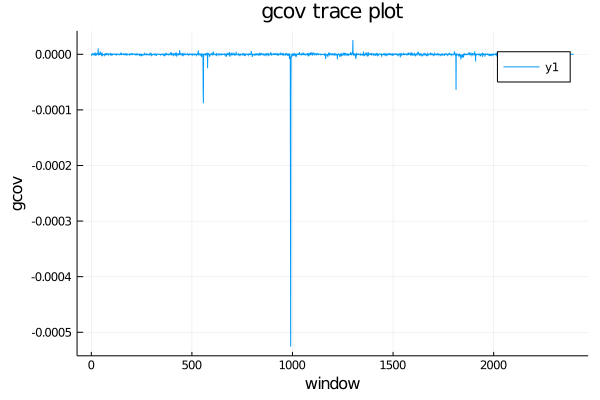

In [4]:
using Plots
x = rg[!,2]; y = rg[!,9]; # These are the plotting data
plot(x,y, title = "gcov trace plot",
        xlabel = "window", ylabel = "gcov")

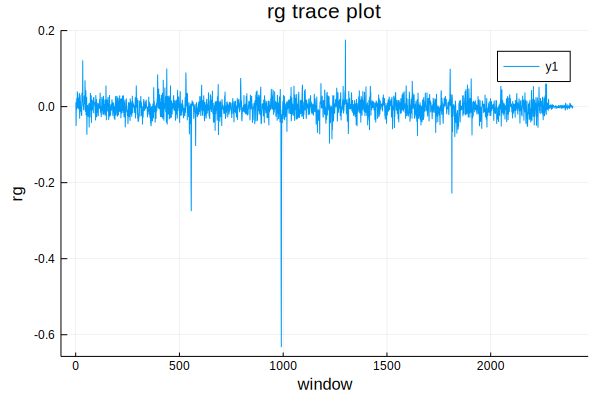

In [7]:
using Plots
x = rg[!,2]; y = rg[!,11]; # These are the plotting data
plot(x,y, title = "rg trace plot",
        xlabel = "window", ylabel = "rg")

In [11]:
# Find the window that explanied most gcov
findmin(rg[!,9])

(-0.0005257698818151635, 991)

## For ADG and MOR

## Genetic correlation for overlaping sliding window

In [ ]:
@time rg, out = GWAS(M,"/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt", 
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/NurADG_AllMOR/MCMC_BayesB_marker_effects_Nur2ADG.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/NurADG_AllMOR/MCMC_BayesB_marker_effects_Died_Adj.txt",
    window_size="1 Mb", GWAS=false,sliding_window=false,genetic_correlation=true)

calculating genomic correlation...100%|█████████████████| Time: 0:25:53


In [ ]:
using CSV
CSV.write("MCMC_BayesB_1Mb_window_rg_Nur2ADG_AllMOR.txt", rg)

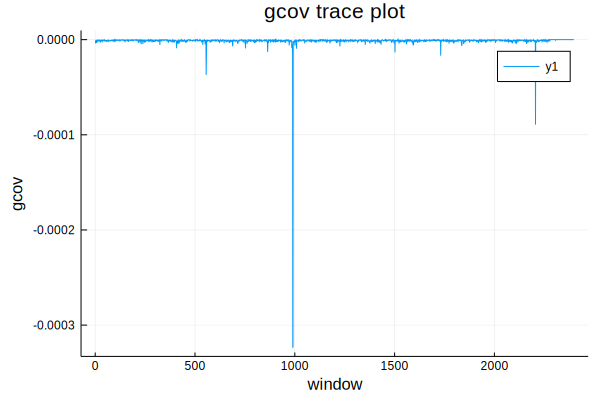

In [21]:
using Plots
x = rg[!,2]; y = rg[!,9]; # These are the plotting data
plot(x,y, title = "gcov trace plot",
        xlabel = "window", ylabel = "gcov")

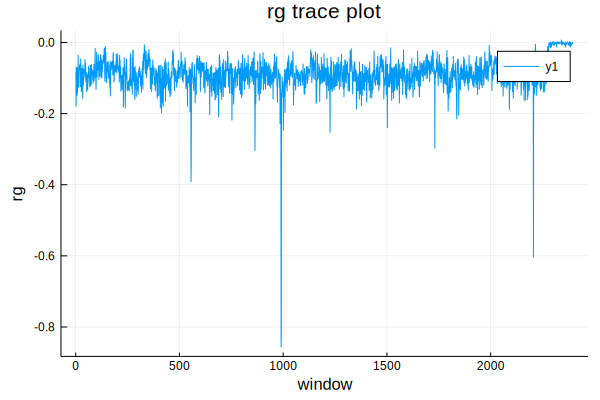

In [26]:
using Plots
x = rg[!,2]; y = rg[!,11]; # These are the plotting data
plot(x,y, title = "rg trace plot",
        xlabel = "window", ylabel = "rg")

In [27]:
# Find the window that explanied most gcov
findmin(rg[!,9])

(-0.0003231860013468383, 990)

In [ ]:
@time rg, out = GWAS(M,"/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt", 
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/TRT_MOR/MCMC_BayesB_marker_effects_Nur2ADG.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/TRT_MOR/MCMC_BayesB_marker_effects_Died_Adj.txt",
    window_size="1 Mb", GWAS=false,sliding_window=false,genetic_correlation=true)

In [ ]:
using CSV
CSV.write("MCMC_BayesB_1Mb_window_rg_AllTRT_AllMOR.txt", rg)

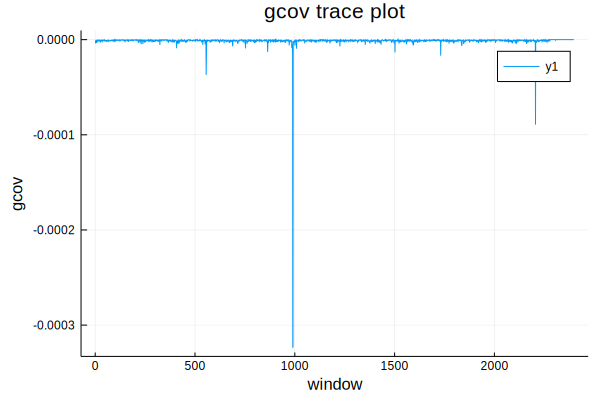

In [21]:
using Plots
x = rg[!,2]; y = rg[!,9]; # These are the plotting data
plot(x,y, title = "gcov trace plot",
        xlabel = "window", ylabel = "gcov")